In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv(r'/Users/miguel/Desktop/DataScience_Flatiron/DataScience_Cohort_5/module 2/mod2_project/SpotifyFeatures.csv')


In [5]:
df.sort_values('popularity', ascending = False)

genre          artist_name  \
12710          Pop        Ariana Grande   
159005       Dance        Ariana Grande   
12709          Pop          Post Malone   
12708          Pop        Ariana Grande   
159004       Dance        Ariana Grande   
68784          Rap          Post Malone   
12815          Pop         Daddy Yankee   
129244   Reggaeton         Daddy Yankee   
106070     Hip-Hop         Daddy Yankee   
141602       Indie               Halsey   
12735          Pop              Ava Max   
12716          Pop            Sam Smith   
12714          Pop               Halsey   
68786          Rap          Post Malone   
12712          Pop          Post Malone   
12718          Pop           Marshmello   
159006       Dance               Halsey   
159015       Dance              Ava Max   
12781          Pop           Pedro Capó   
12736          Pop            Lady Gaga   
106034     Hip-Hop              J. Cole   
18722   Electronic             DJ Snake   
129242   Reggaeton             Anuel Aa   
12757          Pop             DJ Snake   
159026       Dance             DJ Snake   
12711          Pop              J. Cole   
68785          Rap              J. Cole   
165223        Rock  Panic! At The Disco   
68788          Rap            Meek Mill   
12744          Pop  Panic! At The Disco   
...            ...                  ...   
209837       Movie         Pearl Bailey   
209839       Movie         Mike Douglas   
209840       Movie      Charlton Heston   
209843       Movie    Leopold Stokowski   
209845       Movie      Charlton Heston   
209847       Movie         Mike Douglas   
209849       Movie        Cliff Edwards   
209817       Movie      Charlton Heston   
209815       Movie         Pearl Bailey   
209792       Movie        Sally Dworsky   
209802       Movie         Mike Douglas   
209793       Movie         Mike Douglas   
209795       Movie      Charlton Heston   
209796       Movie           Mel Gibson   
209797       Movie      Charlton Heston   
209798       Movie      Charlton Heston   
209799       Movie         Mike Douglas   
209800       Movie      Charlton Heston   
209801       Movie      Charlton Heston   
209803       Movie         Mike Douglas   
209814       Movie      Charlton Heston   
209804       Movie         Verna Felton   
209805       Movie        Cliff Edwards   
209806       Movie      Charlton Heston   
209807       Movie      Charlton Heston   
209808       Movie      Charlton Heston   
209809       Movie      Charlton Heston   
209810       Movie        Howard Ashman   
209811       Movie     Scatman Crothers   
210387       Movie               Chorus   

                                               track_name  \
12710                                             7 rings   
159005                                            7 rings   
12709                                                Wow.   
12708            break up with your girlfriend, i'm bored   
159004           break up with your girlfriend, i'm bored   
68784                                                Wow.   
12815                                           Con Calma   
129244                                          Con Calma   
106070                                          Con Calma   
141602                                         Without Me   
12735                                    Sweet but Psycho   
12716              Dancing With A Stranger (with Normani)   
12714                                          Without Me   
68786       Sunflower - Spider-Man: Into the Spider-Verse   
12712       Sunflower - Spider-Man: Into the Spider-Verse   
12718                                             Happier   
159006                                         Without Me   
159015                                   Sweet but Psycho   
12781                                       Calma - Remix   
12736                                             Shallow   
106034                                       MIDDLE CHILD   
1872

In [6]:
#create a new dataframe without any song duplicates
df_dd=df.drop_duplicates(subset='track_id', keep="last")
df_dd.sort_values('track_id').head

<bound method NDFrame.head of                    genre              artist_name  \
211196             Movie           Henri Salvador   
136611            Reggae                Mike Love   
182757              Jazz             Don Philippe   
30928                Pop                     ZAYN   
125519            Comedy             Chad Daniels   
203670             World                 C3 Music   
194473        Soundtrack            Ramin Djawadi   
172310               Ska              Soda Stereo   
132031         Reggaeton            Justin Quiles   
226180             Opera           Richard Wagner   
215915              Rock              Young Tribe   
177840             Indie           Alabama Shakes   
195789        Soundtrack              Lorne Balfe   
205754             Movie              Alan Menken   
113219           Hip-Hop              Young Dolph   
9033               Opera    Engelbert Humperdinck   
36373                Pop             Why Don't We   
136413          

In [7]:
#dropped the genre column
df_dd = df_dd.drop(columns=['genre'])

In [8]:
#checking the length of DF and drop-duplicates DF
print(len(df))
print(len(df_dd))

228159
153685


In [9]:
#created empty genre dataframe
genre_list= ['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie']

genre_df = pd.DataFrame(columns=genre_list, index=range(153685))
genre_df= genre_df.fillna(int(0))


In [10]:
df_concat = pd.concat([df_dd, genre_df], axis=1)
df_concat


artist_name  \
0                      Giuseppe Verdi   
1                     Giacomo Puccini   
2                     Giacomo Puccini   
3                      Giuseppe Verdi   
4                      Giuseppe Verdi   
5                      Giuseppe Verdi   
6                       Georges Bizet   
7                      Giuseppe Verdi   
8                    Vincenzo Bellini   
9                         Léo Delibes   
10                     Richard Wagner   
11                      Georges Bizet   
12                     Giuseppe Verdi   
13                    Giacomo Puccini   
14                     Giuseppe Verdi   
15                      Georges Bizet   
16                     Richard Wagner   
17                      Georges Bizet   
18                    Giacomo Puccini   
19                    Giacomo Puccini   
20                     Giuseppe Verdi   
21                      Georges Bizet   
22                     Richard Wagner   
23                     Richard Wagner   
24                    Giacomo Puccini   
25                      Georges Bizet   
26                    Tomaso Albinoni   
27                    Tomaso Albinoni   
28                    Teresa Berganza   
29                Jean-Baptiste Lully   
...                               ...   
228129              Dustin O'Halloran   
228130                  Patrick Doyle   
228131               Daniel Pemberton   
228132        Rupert Gregson-Williams   
228133        Rupert Gregson-Williams   
228134               Johan Söderqvist   
228135                  Thomas Newman   
228136              Dustin O'Halloran   
228137                     John Barry   
228138                 John Carpenter   
228139                  John Williams   
228140  Trent Reznor and Atticus Ross   
228141                    Max Richter   
228142              Dustin O'Halloran   
228143                    Max Richter   
228144                 Alan Silvestri   
228145               Ryuichi Sakamoto   
228146                Ennio Morricone   
228147                    Max Richter   
228148                   Joe Hisaishi   
228149                    Lorne Balfe   
228150                   Philip Glass   
228151               Daniel Pemberton   
228152              Dustin O'Halloran   
228153                    Max Richter   
228154                    Max Richter   
228155              Michael Giacchino   
228156                   Trevor Jones   
228157                  Randy Edelman   
228158                 Rachel Portman   

                                               track_name  \
0       Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1       Madama Butterfly / Act 1: ... E soffitto e pareti   
2           Turandot / Act 2: Gloria, gloria, o vincitore   
3            Rigoletto, Act IV: Venti scudi hai tu detto?   
4                Don Carlo / Act 4: "Ella giammai m'amò!"   
5                                   D'amor sull'ali rosee   
6                                Waxman : Carmen Fantasie   
7                           4 Pezzi sacri: No. 4. Te Deum   
8       I puritani: Ah! per sempre io ti perdei - Bel ...   
9       Lakmé, Act I, No. 2: Viens, Mallika... Sous le...   
10      Tristan und Isolde, WWV. 90, Act III: Mild und...   
11      Carmen: Act I: 'Carmen! sur tes pas nous nous ...   
12        Falstaff, Act I Scene 2: "Alice. Meg. Nannetta"   
13         Turandot / Act 1: Perché tarda la luna? (Coro)   
14                "O terra, addio; addio valle di pianti"   
15       Bizet: Carmen: Non! Tu ne m'aimes pas! - Act Two   
16                    Lohengrin, WWV 75: Prelude to Act I   
17      Bizet: Carmen: Hola! Carmen! Hola! Hola! - Act...   
18            Madama Butterfly, Act II: Un bel di vedremo   
19      Puccini : La rondine : Act 3 "Dimmi che vuoi s...   
20      Requiem: XVI. Libera Me, Dies Irae, Requiem Ae...   
21      Carmen, Act I: No.3 bis Récit: C'est bien là, ...   
22      Tristan und Isolde, WWV 90 / Act 3: "Mild und ...   
23      Das Rheingo

In [23]:
df.head()

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1       176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2       266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3       288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4       629760  0.05800          0.146000   D    0.0969   -23.625  Major   

   speechiness    tempo time_signature  valence  
0       0.0547   86.001            4/4   0.0886  
1       0.0581  131.798            4/4   0.3690  
2       0.0383   75.126            3/4   0.0696  
3       0.0480   76.493            4/4   0.0380  
4       0.0493  172.935            4/4   0.0382

In [24]:
df_dd.head()

artist_name                                         track_name  \
0   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1       176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2       266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3       288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4       629760  0.05800          0.146000   D    0.0969   -23.625  Major   

   speechiness    tempo time_signature  valence  
0       0.0547   86.001            4/4   0.0886  
1       0.0581  131.798            4/4   0.3690  
2       0.0383   75.126            3/4   0.0696  
3       0.0480   76.493            4/4   0.0380  
4       0.0493  172.935            4/4   0.0382

-Create a new data frame without duplicate genres
-Create a data frame of genre columns. 26x(however many rows the de-dup column has)
-combine dataframes
-create a function that looks up track from original df by track id


In [25]:
track_ids=list(df_dd['track_id'])

len(track_ids)

153685

In [100]:
#DO NOT RUN IT TAKES FOR EVER
def genre_list(track_id):
    df1 = df[(df['track_id']==track_id)]
    return list(df1['genre'])

In [101]:
genre_list('02mvYZX5aKNzdqEo6jF20m')

['Opera']

In [ ]:
genre_lists_list=[]    
for track_id in track_ids:
    genre_lists_list.append(genre_list(track_id))
    print(track_id)
    
genre_lists_list

7EsKYeHtTc4H4xWiTqSVZA
7MfmRBvqaW0I6UTxXnad8p
7pBo1GDhIysyUMFXiDVoON
02mvYZX5aKNzdqEo6jF20m
03TW0jwGMGhUabAjOpB1T9
0G75cCcf6vBSnMFFkVW9pq
10gPtjlpTS9Uq6EUQuGljt
1iayQ9XmNJL2F0S0zjdNST
297JkKwa74ayxAz38hXMeb
3Eu8Qqq7vv0UsNWf0mWTmZ
3QwZLLBxuUlDgRhNqEQW9z
3W2KxQd1u8v1UOCsWn1qyV
3ZuEvBlO6F8iArGPdnkD8x
46GsTkeUgN1nYhv4NPBx6F
4Fx2s0qn4s4KEPiNTDXKRL
4Mb2XoVuyQK6yAbcbUKOk0
4mOuVk8A69BS1D8FBLOyt8
4v4nQkmWVvHdJCOltOET4T
5ngGqPApX9w5vTNIOZmHEZ
5q5bTF4FwndETJuaprz8GE
6ExvIqyqDDtxtCsXbRpr7i
6V6ZwnhvlFPRkTzmuPWkcu
6aeoyoYjAptLrWzJkJpCgi
75XnflzyreWomyyY7xTTvZ
7Eq2Jr9SNLoGHxwoouJ2rp
7sXR2q4FuSKOAPYvmmBjh3
3OVRK6RqHozP7g0lKf2zYk
5cWDNT7ErG3Bf7QkdAsiO5
0oJqy24a8mylnrvMLH6a3h
3X9bhmsGK5FmDbjl4Reylz
238W4SRnP0hKcNv80X3gOl
2qE1t7sWiTDmLvGNQe57xc
4FsQwrARZW4QFj3wwxRdWb
6jnm0rXkGlaDTR7T6wNPZi
7MXD7LWhcgXXLgZXxmwzVO
3HriuKEnu0tBnmdxGcd3e4
3hdaiDeFLgdGFoWnBtpbpm
7aU88CeEVXqVmzz2XpnCzB
1EucK98ZgRz5VJ1n2L1DFP
1RSUMUdAQCi0pKm0isjoGz
3tJq9Wg5Uf76lN8b4gEfVs
6w8eTjCWYbXODykmI3SM2t
1mprqOk9miI3Ohznbk6S3W
7yrUqkN8xPb

3NVA3fh78TwOHICi6Jz23g
3WsX3honfOHuLTlYHLm4RW
4HYHjnDuVf39M9WOzT96pI
4uVUpABNQnYUPfQFMwgWXM
4vv40Y2NRDnT6RBi1hONUP
56O40T6zEfw6jjTqquHMB0
59wtYFJYY9S5d8gmEEaRRb
5DtzXJIxvTQAiegg1a6s5v
5Jtqn2UfllfzuYSexG94Ra
5e3mb3Jk7eL5Qrh83osB5C
5je2MAbGT7nZ6ucK487jIi
5rH1ZG1KOQuJqse9DyyEwh
6PnlBBeVP6hfaYtIw8Hb6z
730V464pEDNDnDLAhNcyJe
760dcsxezwfFF8Kmra5JGh
7mys8Rqf4hiWDz96r9ooF6
0GiDL6rOyifDtUIepitoYb
1JOWVe2VZUMdG2WNemjc0X
1nmfmhNUSDoad0GyJ41vhu
1yssSDsFQmaFkkdZdpVzkY
25XNr42a37oCAUNzQD5ULb
2YWM7FYspCbkM6xfo1v6gO
2qA6TLMPXzkUNlWwgQ7dp7
2wZdirATsQbF2z27Ej0WZo
3F3gvGl71oQLp37NUiRb8Z
3LdrBbLqxasAdJQCvWkHU7
3WOlK8f5bzMqMwxyFm44K2
3lf6npOF1YoqC7iIhlpA4e
3tmIA6To4TOsK7KR3eHSzG
4Nt8QeRj8qw2ULq6PILAQ5
4Nyx3CU5TW5WSH6vP8HCQb
4Riejsg5W4jnTlWBIepYpj
4XG6P1pnjB8epm9O0MKaWG
525tshFF8OZh75lYNWUt48
54YVTXOyZqsLYtfRpHw9uA
57M9HafGQW14w9UEuuyNjG
57lk3sPbVCggGfsyrN4fXS
5REoZMGjldl943tkgVPLjP
5kWK7atS38wbMeNlytoqA4
5ln34nbMRVWoIZzqO75Ukg
61KZlnNStD1iV2HLXa8vxM
68IQDbZhCzIh6LVpNJZtNn
6AzhJquhCBuaxioHUqRkKq
6cjSe2m7ogK

05qdp13lrv6Pr2vo5uFejA
067yqrGrmrw5XgSHb4hoQs
0QEFHt8kAUYKspSDzmZcMZ
0ct4oo3yaYWUbnT1OgvBlc
0gSOygIglCeRGoXk6qhgfy
0mwxDGOr6aS8vbTvyP8biA
0sD7bkoctnrIaY9VxxbqVl
1G1JYMiOdAJ0L8zjHBu3hI
1oGcs5OLbO7zfQOSZQENKQ
2DdMEKqReWeZgHR3Fc07xX
2IBlkBB1FgJfQLf3CGAheY
3G3pCnKS3sOtcfTbRUNH1r
3HJy58QIRVco9uYEK9q5ER
3Y1LlUkUyGaz89NMSjkeCN
3lHCI43f0bHN6YnVkQRlCl
3qO8tgZ1j1eWl4RLDVjVq0
3sgPg4kk9qvJXuyLoUTNTm
3unGrUCaSVv0S4H4SAnpME
4BdO3vKnaRIIdUSfnb5PDG
4Qk8IxN5QrVTZ0Y5wSHucI
4WnnfqHr6h4viZoyvKaIiM
4gqKXU4S7dTH1DCfHwkb6i
4u8EdMY3ZCSLqBNZ9PMsUW
50pqcEWEMMeNxO3MU9X9Yy
5Mc7b1zDPNJurXOGciuyL6
5PqPGBHb3cjLzugMAY9cs0
5Ry7XJspWYFgLlsBlEY7vV
5Z4xDZIkJbIrMVDWi6zRNe
5ckqu4wQl4PYy1h7vIIvUv
5ggfMt16bTDqNs7wX7fj5d
69KlhIyDxIVcc9ZBO9CBSz
6O3srQUADwy0oIv0YjE5Cq
6PMlToQYlFUmXyMO97SgGJ
6TZQllJUfq6xZ2lcdgQzjv
6obcE51jAJ3SwwyjIJLt36
704Jiay7OIWM9tuQU0jODq
7Ct2k2BrZExIIlheFcDs9f
7GjhJyPFeYGQnnTcmXMMO8
7IwF9C3AOzeAyTX66ZWbEb
7MCA96OI2kPzmDM4Bmz0lo
7mhHuuqPP8fvcAWbODyuiw
0Bnvlp5o7CYwjMzJwhhHm3
0PihaTQMFOnoabsxq3KMRI
0djPEnudddx

2HVK7LYiEG91GN709KqdeG
2g3biQxQjV0UjQIe2RHEwJ
2iLuaeRJZ5BDe6O82syC2b
2oSHmpR6jxeEI8DE5eWgFR
2wpUlsIdVO6R92KkknkM0p
5EdkeAIc3XYzJ4HDSu35tL
5FkJPrfIzCUp55uQR7MQj9
5x0y8nLAs0EPp25XZ9lrhe
7luHmvWVwKilfsxMqtD3ml
7r4Zfx1vXcNwRkNwIM3aod
0Xe9mqXpAHD95aCsCVjloG
0bMBofJRTfeyfBbzlVDjuh
1I7e71xCEFN2O8Ls3kkv0K
2OYHPXurGwvUxleARlgIKP
2S6xQlcNIXDKb5gBLmbJbQ
4PSdh30GOlG0JEScLwUnWZ
4cB8Z9NQ1bgoYp0j0X8j6h
4jy4fbtdSpC5Hr4uXLEQCV
68EZi05pXeD8alj7B7Of52
7rKV1DnicXfvqIOEweA35R
2AR8KyLHF3NQUJUIx2BG19
3cFkcJ7b4rhTpg527T14Bg
3tyVaUyQJeukAdBgHs9dXB
4P9Ax0xoEWnmVotloeDneG
5t8FqvfkbKlFFfDGi9XPhT
6hs1EFaaQTyhr551tUUVAu
7gzEKIDJXYQvu0RsP3cpsF
1JvM8XnR49HoFaepR2wWUn
1hQjcsSNhpEF2oxp1z2v3N
39D1TugKIHEEtySx2rtHBN
3Fzj8f5SpM8xlBhKJHjwIt
3emyZb7ksrJk5EFLMmLLYX
4Stnuy9urhToBMtSUSnxWz
5EYJKgID5A4gJrSoR5aVmU
1QzI3ZKfx5XhZrUhoqHF1i
5ythQiyjJphD6AlorUuUEY
3zopywAL8Nwp50PyVeUowg
6UuYCgnT2pckQJW3ErhqKU
3JyF4jT2AFdxPuQeGKTdkx
047KrF14ll6KXgDQMawV9F
0pQHuO7pxg3HQsLTxDGBus
15mI5cszQZnchaSBFJ6T2Q
1DuFZ4lIw552hQcM8MHM1X
1zXzJHzjlHB

7v4nmM0iz2oVKC41hvFV7g
7xX7xwqOD0S1G6TeV1f4QV
0IaVTkFmkSdREkee0Idg61
0JU60ZzG0Od0PGNXs0f79I
0jvPnkb7i8Tsb0xYps2EZ5
0kevVKi2xp761qc6lsSxe4
16aRE7FRrjcqgqf7VIwPgn
1BkuRsv1DBv3sYtoJLs0ka
1C1piyIxKi9mOXjcvGlplD
1L5KOQOU4jOBzJTGh5zu0e
1O6g7uy9BfDPHJoWRAraLi
1VmJoQSPCUWeyQjjEdxk5x
1cMJc33SvSueWEnrARtgBc
1q6d29hcZizG37UPMVIS1U
1zgcRkY6WURJtlZmfQbJFe
2Fl2j3zbTVzli3nLUTsK4m
2JRF29KyhA5EZXzVCyDBwa
2M9KRiK372aVJKgVakV4J1
2SSfIknJ9v7H4b1FGRDGj9
35Z64HqPJ3XoI6N56jOQZz
3EoFcn5qgkZfS1x0Gc9NwR
3Nzc0i81Luy12AC0uqgJKG
3XPjiyqkYw9vcAGo2iQcLN
3lpWw9C0xsKKNgeQ5cexjw
41XQUEi8IEMpwrW6hrXkhL
4N0Iroj6JPPOuPkTDWF6SX
4YdLxrzcg1nGpoW85Ot6LE
4kNLuCLNMSjVnfotdej9rj
4pivMwRp284OEA07qYWldj
4sG51xs9NEHlCKq4MVOb79
4svlzpzTip93WPXpEaZCDc
51RWz7vkdasoW8bKmHFfOn
5GaR3VgdjGJoyefskYcMwO
5JLT0RvRKUAlmOaHVBaG6r
5KoQnU6K7lU2sSnYdKIzRa
5iAmqELdyAjyYjNwlBtmtu
5iUJeFgRqMP3ZS5RWf7gXT
5klBtea1QPwtmnlE3eZkuj
5zeIfdzmtwIduBAkysqpCN
663ihReQzlMPsdVuRnkbA5
6JastWzd94KifxPwPVw3Tj
6gyMBPCUIunNQ6m6Ki4Zub
6lPBYQkOd9a1L9Pk85yiWO
6lnnTG06HhC

3htd2QCsgoWpB1tDfNujaF
3qRVzMemyQtgA1qTVYDVdc
45KOMDnNW01iGOY2mByrgm
46ZGkRGUmBEm2boUDIZKEa
4Kp1EVJlNiAK4PuUimkCwj
4NzUIluuSaPjhDaYUhagc2
4VhO97F5eOHw7Dzxri6bUr
4XVZFynTiGEzadGuiZXCQp
4ep6HEXqCeUVlAu9cRXOfg
4jlmPzCQW11347UDfysRRy
4tAJDsPNU02Q9i2kM7DbxV
4txKXbFcxK2mqalaO7NzPZ
4vT0fcZoeQVEhRhROCXsgl
4zyBwAxQqKRQmOGAELMTBD
5SaqkLi2BENZlgv4yjx9Kj
5sunK0FgUUtOinCOZA9rmd
5v9kcZLGgjdDbkh73cMquI
5xBWkowWP2mtDpec3sSJoP
5zTT6mTLkkv5lL3iiT6h8n
6Beu4sfxwYyPZpD6irdZLz
6IaGl9a4fbbGvOJMV7DFFB
6UkmMCICkh5WoGa5dczOpn
6bgK2EoeyDoVIS7QJSncip
6mcNCDKt1X4QDY2i0Xy4Um
6n1wEMgKBCExBqojuWv32Q
70hRclSgmmx8WQjt7V0sKq
74sY3iGXh8XDexGITRWHfo
7CvdISfahGhnkISJcvqjck
7Es5jkLrhOIaPNVFxl3bxS
7ieOmLRc6HWflPrE0H4DFY
0q35TOq4hwjKU6NEOWyZLE
3QqzB4LOiQDART0vkbNKuw
0fj4NLrgeDUM50xvo4QU8v
4NhVac1m9NvqQkiN54QgN2
5CZZfnZewPcYXEem4egGfa
6DPnfQ9JsezE0cyONrDsEn
0tHFzLgNBx2SMJJeQO7cL3
4Bhh6pDflxkgRQSCIsLuuZ
5m05H6lzTOj7bwuhLlBYBJ
3h5bLveJTRUPSzvNqAy2hS
14LBQwh1faJ2OZkG8365q6
4F4CIh5Vy7ra55iaQEXcNS
5vvPXmh2JxkibaOc4VlWr6
5vCnBm0dCiu

1RGcxEKlVL5TSMHqV13etr
6UO755OcSvOPVVZOaJVH7v
5TMjhlh25Oitlh3LBKdfMi
3GJjiToqnCxTm5rOaqoxdi
322E3pHVE4THhniKjNLTY9
4k4qvQSDrWHeKGtAPbJPYL
4fAvxYyU2u4fAJ0dmUsKfw
6RbNpKsmlVgQPVlQeZKlk1
0K1MHDfgPizbebJZkfS47S
5tjpOTsbVVbqWRQuymGnuy
2wtHlpYSgC7xEdD3DrSHNL
7pMCNNB9wYprg892vwySYC
1a0PcmEJAOEp4ZT3YtSLkM
2i2zYdN4KCkTCDscdMYr87
1A5yplwEk6cJbAL63L6bkp
2DRNRBJr2L3kw9Lj0zTLC7
7c86ULTZD9eNdAbJDQLRaC
7oQSevUCbYs4QawXTHQVV1
0ofMkI3jzmGCElAOgOLeo3
3MpdgSxThlICp5LSsZejGf
4aa8abhrII2D2REphtZlaq
2GISbjz3wIJX7S4iv1XXAy
2YO0cEL5FcsE2MfZgG5mVZ
6R4fwYApPpBROATC6gLl10
5QKhg4r4Ibt0LVTmWEXTEg
4WWa4Po5YCEN23DbFzML6M
1euVAbcwOwn6N7z11ZWzXX
2tCPIp83mRXvVTytTAf1W4
4L0rxWhjyX0VhNbK4U9oK6
1Mg8vLBYwizu7AuhYQO64V
7jkdoZDrltDoxiCzWiv4bx
0IYbYGGVKQGlcaIu9Bs1Iz
6ecG7zlvn65piigZIjEgFc
1y6Y28gA3mNHSs7RDLrDKs
3ghkB0gTGyes7AljfVfNBd
1xCqIXCApBgcjwRLostpKl
0TC3wZupelwzKhuueGSGZu
11UaQaEp2LvdspTyyuE3ur
06EgH8BdWW9QRrlI6ZVQhW
22W4OIT7GXSUtZH3jOvFJb
79ep1XDpYKg0goDd3g5uPT
0GD0y1mFuOOnFFoHnImoMM
5BCwU5Bdcr3g0GqrqJ3FWg
0dtMnnWhm2A

5SWfocxhAkjf3eg4lrv8vZ
7G6tqGG8Z8Sv7OJ3u33VJd
60OoXX4BYOM6AqPkyK4RE3
26haJjtanhamtf25RXH0MO
3RDcUlLGp3SLp2AmUbUbls
59yxjfkqhOPacjiolBHQDC
05bUAkDRK3xzvVkZlGU6ee
2YyVBV0klw0T6EvSVkCpuW
15iosIuxC3C53BgsM5Uggs
2SHnUyZq0zwmvRIl4WY77G
7EGA4D5eRMEgoFZZRUMowW
0OcAPWLoSQU6sYOWnYfQ1x
6u5flhVFxKZrl9AApvf2SL
2j219ocVSxgt7eZ3KNw9a6
1zZIGnXIcDKU8QIUkR20nK
7vjtAU3Ns1AT4dRa0voHBJ
7mLc9790N1V1HKUvKJAY1C
7KCXA4Y1gIGDSm388m9bW1
5hdAQegqnitMjNacfLOHQd
3Whyr0c7Iji5UhZOn8OMBz
6waHiq6DtId8t1RODPVSgP
3vx3J3TSgqR6BW4JBXf4Ui
089XJfZCapAEf3dkVoGQtq
3Ij7tqW9jVJ41dG06MZkFU
3WvtMbFO1O1Nv4UbG7AnoW
0evnUdYzW18jCOTPNXZTzH
2OJ4ICFObsG4qQ1yICrCUZ
1Cq23W4ZxHTY8QbP40qjEc
5KHzV8Gf3aweIMImliFAOs
6Y0mJNAcx8CDBOhSy6icFP
4CWZOyb9YHIH06yfsvY6k1
4XRUKxDIn28c7uHEzbGFgj
67zT3NI4tTOj8GreXetF6s
6LCbPOnvjxSaRnNBKH1JII
4nTjkWK590oBDcnIxTr1mI
4JNmKxqZaTwwYoruiZTQMm
5EHVz4AZDoQwf2zX3kXE6o
5mAxA6Q1SIym6dPNiFLUyd
0KC7nffWHaoe469YBAwo3L
6fKEplI9iN0JMHsRGQESaT
2zlgwqw8BLX2JGB76LIFeF
0JfAMd3xTqm7ZYhBmQjYzt
2pFEbA6GdNxBOMn9Egvowm
2CnRqrYggWp

1itvnD8IB5iK6Iahucm3Da
1wh8GDJmQwLGGen6CV7baA
20b8P7xQW5B6tSIbmzvf0p
239qQ5BAklTVTJPGYmrgPn
26KaN1U0u2v77takvLaGGv
2IPf9ccpJ4HhGGxzOx7WiO
2MAlTfMXQbJviI2wmF9z7L
39f3rz3lR2b6uiuGVHR0my
3QAE30xXMORG6xsumKWX2F
3cMVkJ8wkrIlByfhCUpJdR
3hppasPQKEgiSbZEPKnpkk
4FvT7QUqWzz7loM73NQM3b
4Z4dmrRQ6Rc4UNJpSOBV3r
4bfvxc9rHwMsMKXKW4U2kN
4k1TFimuGqIL0Fcr4q8iu4
4mP0dD7aSK9fL6uaTWH9QZ
4umQxibqdUwVAVUF8rmJSv
5BgCTI0lF7wwuIUpLDjhEt
5NfkEb3wQOv51DM0oyZPg8
6cfGFvAxHMxBnbIrQKLwfQ
6h8a5trtEjlYOSNlotXV6p
7e0mnMKUBeJb678HTBKDuc
1vNnMF3SDnMCF0VTzdekPx
2rCo8eEEBfovCj0P8KuC51
2sVAuoZCIGwg1j6JtsmmBC
3jLITMJAI08k1wHZhXQurF
3kUajoEuxgPlywCDoegY8G
4XxDzK2GNlxYCz4MU9ngwz
6ScIh6XfH1VH3YMp5Bsel1
6jfLn2XHFksXeUeRalsyD8
70vIUpQWkXn8M0Aa3MTjYz
7KqkOTrif3SsadJyDgjWTK
7MQqMdpb3FVUZRrRgIsgy0
7MXj5abgiqr7FjH5Dzkw7Z
7oWIbxhQvIOfqnjFPjT387
7vbqBAYrbO8rltRb8pUNii
1r3iXnD04rX2MA7jC4YFyT
0tfitLOGSXTOXl13uaRRJA
1BJyy0JQMW0Dq5htaUGxZC
1JgD6PKuwTJAazTE119sUc
1uAx64bE9kZ6dD8o60M3oZ
22ENujtajNADfaiJfrj2Cd
2mQmCIsElj0ZcSziVCbuN8
34rPC7asb03

5Gpo7gxWywKBGpgI6kpoDa
5I0NTrSXW3F4ordRzJ4nSu
5Iudqwfp1Q7wkgjaGkieKT
5QY2HqgCX0VsRNvKyMMxbh
5iLzOmE2Gicni7cdBtM09n
5juYWaptZ1YaS2oVVVj4Bp
5l3mtBuljR9vxQbRbsDIVN
5m6dR0Y5qSn4x4gmH1T4Dk
5oqTTjg6LNxXsFROUdL4iI
5qKY5bKOPUy5XhM6k2dNsJ
5tSXYdpADbjeeMnvBUmDXx
5ttPMbUloylIbAELvllDkb
5xUGerAy39q91zcTTrEDV3
5y8u2NHOFAGjz2o032y6w8
64iUSUmygQnLvwMgV7Hems
6D2ajFyKgwUtiaSp8L6ZRd
6DOPbMWKXemkccrXQarfhg
6ER01O03nu0vMsXRUXe13H
6KcVNFG61wnsdoJnK2crrJ
6NBMUhOiRAzDWcSCqRPDtY
6Q3Bnofxw20VqE61Vh7gmm
6TIMIzx26I12UHfe2yeFLI
6bjXKurbXPdLdt6Lmt60qI
6dAzRWN4UDczt6cJO6Jv9p
6nHM9pk7vXUfUnabi8FvE6
6pKC2Bt0CJEPiJLawx7qy0
6w8K2o7JAHqTBUlAHnFXII
70rBuxJQAXaZZCNg19z8b6
75t5fUnfIHaa8zqX4gbH9V
76dKGMKmRDoxfZrBUoJo4M
76ydW7caGY9ln1WJhhktYn
7A2VJ7aqoZo9g6LkITQvxb
7GEKo0XbM03CLsgspis30b
7GqbKpLULLfUlQoLC1o6Tm
7IQB6esNDs0dCucHramUeB
7Ie8iaBBfYMop9p9YAewAA
7J1PVjeBgaiPrttaBXArMg
7Js9A5WCl8HxuVXzB3vJOX
7K30bH8cSiBhIRtH1lt5WR
7jBv7mhcEIzp7NuqhiYPp4
7kzVjkbth7T2oeCm27BFca
7tgMowmdIPntV0F1m8vD7V
7utnLskyE8DOmphHlOHR0I
7xG1GjxK2wu

08QmWFDENVxb2Lrjaxvcpm
0FGP9HUOIRlW3mtD9qxo0G
0GdCSCWkxI26oPnWwXND7H
0QnhX05ThmVdTr4dBBSeDl
0UGwyAGbFRUNaODKWTD6uT
0UiGIhVMMU52aUZQsEFAbD
0ZE7vUoL3x3Sng64914jhB
0ZdmzuDmjmNFMjNFad9dJ5
0Zyzik4gSIq2PtbSYiKmPB
0bBWSNExTZEZBLU3owBq6q
0bwcpWRtpDm4Lt3hC2dj9R
0cjuxxHrxS5aB1arkGgBaO
0d9xR7qyJi2sw53rz2QHVc
0gVnH0zTnmj6HCOohVpRg1
0kwczo6kVNnu8fLbkgmEYm
0wciosqywmCzqNfg6jdUHC
12GvITaegxUGeZE0HIjErn
14j7fs4TXFpNx3ikXW84bt
15Trls1z3R2x5PPCojHvbj
1Dmvtb2zGWTalyULNUqWur
1GSvLdECw4IOnIlY0lpZeh
1GrN4FkH7kSWTL2VDwXpQH
1Itdltqx9Uee68WPqEPKDT
1JxT9rvdLNsaF8hrryZTHw
1RF30dXo5IoJUneHHu3sZV
1RnRoxTtAjQzf2rLFcWsbT
1WzMeM9fIYHwRAUKtck0PJ
1YtB3aGSx9IMcK908Awd85
1ZVMdaiL2dobUzpovHH2Cu
1cqcGUop7zplWD653cjqLk
1fd3DPRCrDGU73uqz8lnN2
1k9RH6F1RuWSeP5Nw4PMJN
1q8b2qxDi6VRuzmLUaAMyO
1zReTTvjLMhlsxx5UuQ4mR
20UXWmEsvrpI1z0lwcZBcB
2Ds474qqtyqLLchiomhcqn
2J0t1yew3K5ar2HAtCLjWw
2L9aW4MZWDTBI8MQhCymqm
2NTCGqCjFMQaq5cEXhfoVI
2Qk2wlzCxidefFFJ2cFdS4
2UYFxWQVzdfefuvCSU9Ywp
2YFomPv1DgFTdcx4fQZOxp
2Z49Z0yRgns18ipE5IIBGd
2lkyeMZHeJM

3mUYBltQzGt1uqwgddYcPr
3mnwE0dzRr7p9EFfcB1A80
3qdpStl2AaLkuTB5eis9yw
3vcmTEyVvXvQCpgrMPTnA8
3ww3XKeFV1QtzMWLSJxLdS
42ub24G9TxFgsvnhg7XfRm
4Et8Ugm2idQwaIlFhzmyy9
4OdfdGARFZjG1qXWrt1hIO
4Qety4Ds1RtlKK0Wy0kJwz
4Ym5NbI83Ij8Qs9XwG0riI
4aF0PPxFBKdK6AG72CP0qZ
4l9NRPbv87Ib5z349CMg9u
4qj9ycZpGZcx0MizG9vtbD
4sCHDP9MeXvQp1jrYMykd2
4sdAAzNjk5AxovKezihNqJ
4sgssOLGDaI9IB2fFx9Bsk
4y8YzX5JUzW5cBbnB9Aixi
4yUAQZKNyv1FPKSB0aQCkd
50EW75lxFxzH3Coe1Iftk5
50ctBxtj0yZu7ozuDTBega
58CJ49n4qFRf4axqyNpllU
5At5yLByyzyylVctmoejzj
5AzL0P4MfJpHMfeCNDQky0
5CTsYyQsgKdBMMv232mCpL
5FfLGIABTWjEt5MHZiTo2L
5H9nuMQJfk98b1JNbgkuSP
5N6IqMnULic3ox2vDucgQ9
5TjuqxHjX4Q6MDMCgpb4sF
5TzljglQS7ypagnLeQ2Hhx
5YZVYprU6jX0WTjRvW3cKC
5gMqbkFDG4RKZWGBybonRU
62Vp8S6jS8J5TgFFVkd9aG
6HuMHi813I6SuYHyS47b8l
6K8O0ulirehHVMC8aJrslr
6LC9jA6vQkg7E0WTbovX61
6MultJaXqnDNBUylAnwBiZ
6NCsot9pVunlXBMsT4QNqx
6QZ37Xq3a5azJtqNNo8gjD
6RADQZIMHfD2vQ0YhJLex7
6V5MV7gCiQz4wqeCbVecSi
6ZtSWTqhTLHCG1H97333SW
6mQN8SPHJQ2zWL37EFvKIC
6vtQYx4GEUlyuWvCgiNIke
6zV0doYRFEH

4GCrxw5njHp4820mlsTxow
4IUxLU8yBQa7MrOw2goIGT
4ilzvPZMn0qsUgfjjfampE
4ruBKcZPhBQCGTkF3XqKSo
55S0cTW8MjdbQQtUAmnfuL
5PZWl27FesKvB1I49GGoDh
5QTWDvkwv0KR3u5ZM09T2r
5bT5rCaR1foeoUAQX97oxd
6DPSn7Ej2bXf4jTeG1nmdl
6LiEKbFgEGtKm2NBTQz2sn
6dEjZp32lgt3CCvH398YJG
70flqJRasCrqYoglb3jYOY
7rmhQKDhTAHVC4XuKFcmPe
11MANxl1Lx99laFUoETdpW
12MXALTiP2UpvSQrinjshV
1S2bsQvVajzO0h58YYX02o
1fIOfaAz1R8vyuD2goBN0N
3EAE8yJAJPBNNVg7Uxg1o1
3s9zbwx59cUM94IiaTYrui
4uOe0vn8uxWQ45NZWAl0zB
5AiiW8x0fjiu5er2hScqoz
6qZQr76RbVns4slPphvOZv
7F13ZSIMFt484hXscjCmKA
7aMD3CyGs4785BUL3MgLwT
14d4lTzs3O1C8OzgfTtS7U
0Sa9fcHPrPk9EkTKBu5alU
0jijTmxYz5e62eB7UW8oVN
1CCiSPSgv3ET3ooz1uVJmP
3O0bdDYsoAGX4prqsjdXZz
4I9AEldosjvyRebHzyRTLW
4SypNhqXMGbLdNddr4W4Wq
4USx3HULPPSDgGcqVNAmXx
5zD7SPGnOSHMLVFbiTkrjT
6PU7hyXW72dZBWWONR3kmj
7LsS78P5y5gQny3KOMX9XJ
7bzyQ5ooExTjCZhc6TiMJn
1eRYJCZsA6Pv8PUb0ot2Y4
3De9D68SdR2Lm2Ez8Zsxw3
3GLbv2ULF7zB2yimGeuslJ
3bdNtFOvQMZlwYYA5evUhu
3pgUIjVhnGyztB090mMWvy
3zWvbDIfk4jXvRxAbl0vVD
4N6sILsAGktIkkFP2qRz2W
4fY6fI8SJfR

66KyupamjW7FMJrr6GWkn1
6NbZm28bZJPzvzjhq3XKi4
6QtdNoTQq2Uj1CagvwcGbK
6YMTBP0kZdUsqK0Dc0bdXn
6bcbEfNC0QzFEyfPXMwOaW
6pt8QIZZ5ASX2tKs3wTLxS
6wQ9ukeSi5nVMl7Dk8u2nW
6y56rPAgr77OkoUJ7WCFBz
74fhc06JRcJQnJNY4mdRKi
7BwaTMEYFgzTTG1AlkuznA
0HG163fSZfmy5F5PtoIg2N
0Vou5Lt0mRNVrUHmwgOj30
0XSdaRrYLnrl7NyYsfuAvj
0w5InkKbqgHe400vnd7Y8g
1By9a9Q7ndynualUGLxff8
1WIL6SViC0W7KH4C6weQtg
1d558xM9yKGA0plGC2U7Mj
1jV1rvnNwctLXKG1tbzHJW
1vXsYMJ3ZkbXH32Ka59kzB
2C9lQMJlJZ6NjBvRnKliA7
2HNsRPZfeI2adFu6BeVaAa
2YEQhcQ5NKikp3FATOOWJJ
2sLNEuwB0here7vF2A2r86
2wD6tJYPgGyI4gIBhM8qfh
3M4Fl1j7WpcoBGncQqosb2
3QxBGbXuq28zqHwogtncdn
3TsmBRpXdWcnzqPm9W0tVx
3d3afFny4qhGxK7NnXyf8s
3qUiL8xvp5Rhyo837qmqcT
3sCjJbazYXgUKjy5QPLCSl
4A04juDs1REz9YxLHaT5ix
4AOVFUgSBJpRv53wM6XFAX
4ELGDrvhbI9aQnq7ZeMZzW
4ZV870zYVgzDXTyAPDFH0b
4qN9Ng5xUzWU3s5F8tQQ98
4umXPKipTqE2wdEMvV2iV8
55sbw0CXIPA3f5TUKCrIgR
5GUR54cJVlHUMMeFFbh0Xm
5LmRWUUXi09zH5yl5Ii3Ge
5TyfVzoUnFa34zHUcsJ3LQ
5W7IiH2jDV6q6EQwBkq8ld
60CVTbdQhRgAhUE8WPOKCg
67hMSEb3LyrmgEo9fPNrDU
6UopYZDa7gw

1pQwp1QtnSoqpLyrKxYxNJ
1prXh7l3Yd9p692izqJR7l
1t8pPiDc6OsSGhqCdqdChh
21Lvyo6hYpGqfe5iJvZ4RO
2MY5srqrmZHz5P9CAqHWkf
2ZbTlHJnCdumjfFneA566O
2qTfynaPImOl7p7tRq8IK1
37DvOV9F9He0ALfkiuAHqZ
3HtYg45kW0h8VsdhHD7WRz
3PtGempT05fe3HkDdy7pQM
3SlE1QpNf2v8YF0nmGjnsV
3TRubc5xsYBnIfdytn29TN
3d4C1NN0kAzavIpf8EeZGi
3ijU1xPXDToiw2EEV226n3
4BZoj8K4Ow7XIemriqhhmx
4Bywwa0nncyrKkOmoRr70x
4Dd9GHouRbV3ZvuYdbBrba
4GMua3fVJs84WWnFH2WRXs
4aJCWaHj2xhoTCZKo5WEHx
4mZ3RuCFfgUvfAXgkpG65T
5YnB1qsnmUknkHKDXEFkRx
5bUELUNVbN3iYE41oyjpEE
5tyHfgELZQTBxVTIOsJeaD
5uF3QWgvSI4OBIFTRjCVYS
6FE0Vxa8SWbNsuzpwchokb
6GsOGwHPqZRWCWml8i9IIa
6GwNRsc9DpH555fGjEBcTG
6OoU9pWPWEIGh5l5VlGhec
6aMUFSOVfMOsHfCuuId3KO
6pK4nXBFx8xlSnMwHqQr1R
6xaM4WpUmBUYPXLqzpsCka
74QThQc7WJoMYDIhfQlaWr
77zlWX2ajxZS25k39Iycm3
79uyNgfqSJa8iwOAjcltee
7HTDpbjtRXebiPTEdRrVV3
0jiKLgliWOdw8mTGfuN1T1
3ae45rUeaIQPhG7LWdICnR
5jd9OifSlbY8NG6823EAVz
66ADZ1lsr2OzrOtuhnp0rB
6koTErYvzyp3LfhsQVf9BJ
0BZ4ZL4y0kLoDRyicxabvB
0Uww4UzmWjApqjLMQAU8nH
0uf4EWfEYc0PfPd8J6FeAf
17012eJYinA

0m5G6kf8rE3Kx9i3lLu51n
0rK7xEOdn6pQc7IMScGfnO
1DFvpcRapyz2NMIgWCIq9n
1cQgPpu30FIbf00jRxdPGB
1pmz5I74e5aczvRVuw6Tjg
1xXPOlVpbxTMHUzvmxaKCF
246PcpjTTD5mIo2aeonbxt
27TlqmpZGv1vnkY0XiKzrw
27gAM58Tj2swSll4hDT7dr
2AVAOQ0erm4edi9OTMgjsj
2N74zBA0CibjOrIExIFQLp
2NchZyhtVVGqXN6w0KAMwp
2R9M5Nzotmw6ZaggF1FdW2
2hzU0oeoQCDzSQgm5WtATJ
2rAjgJDLDPVkcvRweF6hZs
2zsuyS0ugm5WtpTkdUU2j5
33fGwIJ7uvjsS1MXwAzH8V
3JIuNlQjf0btvMkQub3sx0
3JlaYQovuRN7OrZ5tWH3eX
3VMmJP9qN8GvcGKavkh4zd
3mWlzrWoGSekYrQwAgf82e
4DSjEbf6WmbwwGgFal5D9A
4HIHkapChUgPAabWa4dI1L
4Q75Y3tDdEsjyVLaAAURWX
4VubM5tqSuFFUkRogIp2eF
4xSgNSXU0rxb7ZlHeDvS3B
58J3Xvu14zPCEx4yw0R9zH
5DltbDOwIZ8stXNquVjmM8
5QOIhxEWWWPSDk78JR3afE
5Tw22EcKEKloVHuCPgaJLe
5bRbStdRJekooqmrsu1zDz
5h0EiG11t4qzvNINsGAjVA
5pxer8J2PWH239oyGzDsjK
5tPgvlWr7RAzu0yOnHXH22
5wB73XODrS4hBM23khgphP
66G0ok1IC4q2UTkuST2n9o
6D6e2yGHtCebU8EP8w18Zl
6EMapiMaVDsstk1U6EH08j
6F7LRlHEerdrEQXwMhw7kc
6SNO5Vt7R4llEX8lGm8ZaO
6XnIncq0x4qI2pOIm6Tdoa
6YLWHltlx8zOif4cFgf8rA
6YtQldnKeKTKdtX2mQBXFg
6jWtyOvKMN2

77BUqbwPmSbMB5rL3Nb5PY
7BipBrEGtdOrGSSMtCoaMq
7BjxndZQUjjo8v4tT29ONT
7C4ug0VkD6HrfGRU3zCl1v
7CutY2mf7ERdInX9kD6vBU
7EFMWUAAOpMIvg8yYh8Iyd
7EH8os68uvIQk3xUtsKmqf
7EUMpsbTjBMg6oqBYc1xXk
7FcHOTvYcJZFjcHvcYy1F7
7KvO1KoiiyvofDAD6PwgAN
7LoM44ezJ160XcruN6T26T
7aNZ4phJ0tbzLS7o6HHZal
7ax73gHrdAurOBnR563Xyc
7b1UNum0iZ94PyK9c5Q2kI
7bVvaHLC4xHkyBrw9Kw21n
7cKk98L0sPEd4nLXos4861
7dlow62ErSrXccb8vEF437
7f77ndOWsl8JeS54dPg5Mf
7fHJG9tNylZ5o6JQPA36F5
7gw45sN8bTyVb6PeCwHHQ7
7rgK70awSHTEHR4FJU9VAU
7tkb0tBEOCEazHbgxQCIEn
7u4uPEGIYeRG2T4TaReX7g
7uozJ56TjQKOrbk3hV4Ydq
7ux5LpCG4tmEsotJjh8YxS
7zf9Gi7GdWhV3ZR8GpbVAs
00SqLB126P6z9iOOdzmHKS
025y3NVVkLn1mTg2jABu7f
02N0nonPjfIh9blWAFRWPu
02gA4UKty6mdjWcI7qjOib
03KEDHfzsAwFGPjeFUzQtl
05JUL1VBH8EQ9UZm9TCeSN
05VWstESICjge0BbZUelFS
076HZfjgSYnQHFIqm9aIWy
0BCklXiq6WZmq34qnwFDKL
0CUizuJLJwQj5ZLPAFvP8s
0DFAVBUKWROvSFGaP2Inxf
0Gm2LMwehqcrjH6Hns7jAc
0HJp9UI9Pjba1AI9oXBX8E
0HhJONgN8RqKXDcUkrd09C
0LrJt4pNFgNK9JCT9cNLc9
0M4kn64RliQWAba9Yerh2L
0Nhsc4ALkJrhzsA8nfZruH
0Pmi8jZToGZ

0lHesGOQcftcQc20gWEVkT
0ly9fljxMY0zqtnsaUhDUL
0rmXV3WasOHG4lOvNpZ7y9
0sOB8wr8KppsM4zvZU0ern
0sfpZeCcWBuIPwEKYRTpe1
0tgeJ50M7W9pkIeeZfIRgh
0ztKAKScyoYoMrSxtuTieG
10LkWlCBOc54FWnoDA1NnA
12BuhUuZwlgQEO9BUF5qf6
12mJyxBz1mHT9DxC90Fl7Q
15hjFjLqC0RJhRUmSAHuTs
16Q7xwbycWM632l4mp37zp
18jUzoF5l4fUxHgkso6HmO
1CrQQeoM0jShFywsVmeWXe
1DLaY9CcLmSJHm5lYtPv9h
1FYtxbWK3EenbbIdVBTwrT
1Ga1cKVqjtrcTy03hoOHHA
1H7eTg3kadMitTtIhwDrmR
1KqwozwHNMcS7jTPl9495Z
1OyfrgpWTOQ5k65vo0dm9o
1QX6fXUHkLxdMJht56s7fN
1RBKIc0CG9pzgfEVlqn8Vu
1TBhbHmtyYzBIXT7csclac
1TPGN2JqSDIavhHUg86ZII
1VUtRbRTwV2JZzCjvPZmQg
1W0P9uUu3ZdmK1FRBl1Rnt
1XOjcQKlCaxaDYM9Rmm80x
1Z3tU691NPHFtyqvJPVhSM
1bWsHWpYjfNSOSuFcO7iEM
1bywY09aQZ61pz8bTBBl2F
1eDiWSaAQntLPCk8U2Dh7V
1kyrGp5YIb20zzicXhrRAT
1rJAVrMgZIIvEys38rs4vQ
1rjIyaGKavNefGHTnEpzsw
1tYopbFoEoOO53A1mOsbUB
1u76QuiZijwI5hClsGUYx5
1upsbNs7Yws4m0qLpGFCU6
1vUZ5gDEplrlyw0La3Lzsa
1xNIZrVfqXL3r0SnbmRPo2
21nJUJPYnmwcZgkKirs3ln
23p3opZaDR7rH3YhW46GRm
24chCEmRisHW0lpHDcVhKE
25uSHrCcxRvDH0uX43ax7Y
2BRUGRvKDs6

31rnOUBC4jvHGN0x0Ef4va
34JRUZIuDLn2cL8sOqrFtK
35NEYfWKnn7fPSBePljnVE
3COTeQHgfTacvpLGDMRP6y
3CfMD4T49tc5w6fy4xz3kH
3DDMywfjGj3z6Y0GryNXGl
3DT0NLpOseDB8YIuAXoDg5
3ERQCYzTXSYLn6jBsiEZc0
3EUjJmrfhUyDKC6PxAoXcT
3GVIgA4y7N9eaIbj29tEaU
3Gc2CEpEicEsbw90SuGyC2
3IgHhgIqr7ABCVezbJuthg
3Ku7sTyNOcbETESGpcoH2H
3Labg5qugOEkspfY00Yaac
3N05genNA4hS6S6BRZfFvZ
3NQ6OD7oQEx0L5WdVxBxuI
3QPEFxhT0CJp4TMuCTNLYR
3QoejE33hR5dHq3tHh0XmH
3QtYULFXE24YsOOjlcihnH
3RpkbhyhlVHCN1PP1zmPfL
3SsQmbt0CVZfqdhld0aGhS
3TPwLX9fYkZM3evrbG1Vah
3TVMoZ1FIXvVVbGxL8fUJ7
3TfFE3IWfaVsUxPRSQgWmd
3TnQz0lQMy61rmE3DOTc9f
3UaHrUUKe8egcMfnoaDeeS
3ZDMQJZnurMr0oPvpWGAgP
3ZNalQapVUoFKQ3Hj6OGaW
3chBGoA1o2AemsNcsJZUb8
3dot3MNVX8qnALEn61HW8n
3eUAk5qLbeJFEuOUef6eBh
3ex7ZnIAVVT7NeFMXebFDQ
3gNorM8GtrnBlcMZumBDpN
3glBuXuZQOFqOnDwOXGLJ4
3jS4IotcgWUaf8LPjRIavV
3jsKNtsJS5TgVnq4GtK5ou
3l0jQXWSfXgOB881mcOuit
3nMPYtxuPYFSF8LMFP34W9
3qJjY0C0HkyhMNHoPEcL0u
3sGM0TJggVTKOG405hcPQs
3vOiGZ4cwzOMHjDv5Up2ux
3xPuyr5do0ZGiC0WfVdbia
3xaMiZMyN6GyfnwvnJYPGE
3y6d4CdWd9c

4rMNgxEwGWoPHIUcvB5BrB
70yhaHLp9STtzI2Kzba6Tr
1yjY7rpaAQvKwpdUliHx0d
7Ed6BkggCS2KaKY5YlINaF
5y0ET06ZzyxDzR4lB4JGhP
4tERsdVCLtLtrGdFBf9DGC
0oagwWkGlBoACUuKvTmqZV
6kjKRa91zikS6ZOL2Rt1QF
65wnZsZLKJimfK1cTFOfa1
1H47LILEj9nGb74EPcZKWw
2soCr3tI1sJ6lFrxBPQVzQ
1JCCdiru7fhstOIF4N7WJC
0y60itmpH0aPKsFiGxmtnh
6qYGUxPjQt5PJtWdiNppZx
4V3VshJLUTCIWa77YiAkvM
40hjNYfeyudUJU3QHGW0t1
3ZpajXo0KgjHw5WSMMIDfy
2hl6q70unbviGo3g1R7uFx
0HZhYMZOcUzZKSFwPOti6m
1ZY1PqizIl78geGM4xWlEA
66U2Ud0RBGfQ0ZQrI2m8FC
7F9vK8hNFMml4GtHsaXui6
1v24T2ug4TlssYZvI3aL4O
4G4gtvlaFaI6v6wWD8UvqL
7ArrTJ1LwcGAlEO65LUQ7i
4vlL7HTI5eVGBYOb1w7Goi
1LoriJC05IrHIDwj3q0KC1
2qxaR31Te4xDR2yO6LqM8z
0Eqg0CQ7bK3RQIMPw1A7pl
455AfCsOhhLPRc68sE01D8
0WNGsQ1oAuHzNTk8jivBKW
0SuG9kyzGRpDqrCWtgD6Lq
7gwLQ4tZ5UdZ7qNcDyJ8wr
4rwqrKdwlFWJ6LvPYaOtgn
4RoArPM0AsuW3h8hW8xtnr
7lRlq939cDG4SzWOF4VAnd
7iNIg7XDEaYECfWD5dJ9Va
0DC7Zs2qvAbNK1owWQ4mlL
4XNrMwGx1SqP01sqkGTDmo
4RXpgGM7A4Hg7cFBoH5KyF
2xB64x7pRS8Qa9uuZktOnA
4ZJPwET9Jrgpkqi4Vo3Yg8
1xy4apMFecGGkgBeaHFZ2M
2lBqyCeue1b

0cNH1IsjBVRdeDcpwHAfve
5XGJoutF0GGQaEzljx7fq9
0KmJ45CPuHMQpNMY42xDUl
5OOd01o2YS1QFwdpVLds3r
0375PEO6HIwCHx5Y2sowQm
5XeSiH1cHcz1Lqzxj4qk5P
0mRWl4amZn1FtRx2cE5jf3
7mgszK6XFiihnQ7kfrie8N
00IH8ZjI9ZGB51WRX1Oesj
62rlxI6g2PNaWsHoiRryto
0IjQeHaDwRljTnROP955YG
6k8uthjEbttfWXcGaNTQGD
31tjImR06JCJswXViIvFuk
11BKm0j4eYoCPPpCONAVwA
3Phjn4zJ34ZiEVUngyccY5
2AZnaJ9MLerdNPS1BmmzZD
5WlVx0a6VedSJ60JFYpRBp
2AVDEZJKknfUOIEipw63D6
4QcDkuGQx9824a6X9BZF4e
38w2rQkGxiH3eiLU8pXdSi
0kS6GezxkbM5YXffQFnID6
7uyUXNyOEJUkYV3LbcHeow
7Jh9XDqXe3yvxovXsLYOO2
4GdYM1hIvRfK8keBF2eQ1a
4QPDhJZOme7hpreUuOSLWE
3FeMpPPhGRKieT8zmlJDQz
3OIZOhmpuj63IjZNCQmkVz
7JyZzz4rMPMWMsb27vArSN
1CGFyZ5fSRo0DhIJOLdHVM
1hxX3AawrUVgl9gkQFtQvm
1jqLJBQwo7yBCqYQWukLkq
5gZEhPrN1VLqTG1nIAXeNK
6oNRhdGxT0CiypPQHyDiKW
5mpibPxO6AWUhl2RiHpOGe
2FTcOYcsSglWsS1zThQRh9
7nm8w9dMwTjlWDosdnxBSn
4D9QMZ3n8OupOPdxU0MMBS
7jR5gaq7wgmZU4DguTeeOc
66bVLKIOwOHbHcnO7nLKpL
2jrAfG6qBg3hrjXo23jSFH
0zzdXBwYgPZR88QZr86hWF
4wNQAG2BzbVkLhdajjxGpR
6PhKWFnRyyWYE5kme0x4XS
7Cj2tT0m2SB

2V73TUbn12fdxAWYPIo0be
04F1slSLfciNXAPZgdXtmW
5WwaKGBmg0TpG8mRQpksl2
775bVahdq4tPhYQoY4oNkf
5t1bfbRFnYPnQ0SQxF0uUy
3fg1UERgNjYfHETakq27Hs
0WlyAqDjzGdxVtwRTQkm5q
6CBLS6BxGCsbzKdSiKSxHC
742YV8T9ZyczCNdrTIAhaw
3p7KP0WUSpQf5r2xtkws1F
2mycbyJ4xTqySpNZz0t1ux
4nE17X9sHIOYw7Dt7sRQHo
61s24wRVyG7NP9m7EjdDKL
6iNAGeWO2S9nODRiWOjqiD
05sp2EySV6DXsKLeBnjaK0
0dEQaNYfp5G7Sflek2Qnde
6ae0TVkpnFvn0dz4zIVlyd
4dWjQ3wEfW6KPaaxCoaPH4
5aEuhJHFc192ULFYwMo4H4
41MOCUNOgWtaYBFUsGnpZ5
6vQ0VbsRRFOYVmjAMM8c2a
3uU6dqBjVKRTPis0RrTaT4
2lE6CIzmQvcF7Mo3z4k9cr
3sl4dcqSwxHVnLfqwF2jly
4bb7gcLAolByq85tCkbQg0
0dE9ro91KUtV5Xi7bDPy6b
0mwD7yFzUPWPlQsfBB9Zws
4AMlNIOfExpjVbuHufpqgb
62McdrVJELUVywVeDk59r0
5JGdpqo9wrRtOZtui5GShI
5Pnny78GESkBSLnxFmhRYZ
5NdwMwDT64WOqpi6XbOtqP
2ImrmJfhihNvj2QeVZOHJq
7z38bideBRvGAgjXe2SECm
2OKMeLj46lATfrVOP1enqg
7CJEFjKOk5CEAN9C248DaM
2QA3IixpRcKyOdG7XDzRgv
6F4QQuvB0MEVf6JUJIQaZy
0WtWPFuyFQmejiSlo9wlqR
3NRrvr3ctGwpV1wLRjgSSs
3zg0RVk6GcXFvJG6BWVFre
6ZUITkPPMScmzjW4jFkBn6
3ljr9ATeLs2BY9gNp7vm62
0mwPE0lPOgn

0vLlEo1D4VRiGzMLxLbsh2
7kyMLaXepcGHIrsLqoiTB8
4b210M5i8sladu7e0FkNOj
3fxvczs7NWmchicbR348EB
2HcDTbtxYUhFVp3DLRmMu9
4mljNnZ2eaXKSbEAOzLlLE
2quTytCTP9kKLvpveyO1mt
2J4Alm5zUad4hB5bY2HhtV
7zebYDpYfiQkFiyGvkfXhb
2lJOKBuPgR9vcD4PLxTakY
44IViv0bVWrEmScLcFssav
7fbVvLIqJrtDamxpivLqGr
6rx4jBTSagd1W4ZkQI63oK
5KpBYmEiClvljtwbjEhIJq
1KcnJTiXJXAqW5bB7zpkBC
00iCRJ7pk3onHablkLyVH1
2QN3pPQYoKsh5dIgEVnsYG
412CkPtLh68KLPg0pLrC53
2ENBaEOC0Jgi2au9Jt7y7d
3Tg4U3oXOQqMzD9vPIdQKn
1Q1lQKlgXBXWF1Bb8eRvhq
03f2Q9Z8eaF8lPfNL6x3x7
2v3lTI7njU96d5diTeaYXy
2X8GwyuNBiOJKLCLNaefOT
2f2NroKTKRzanmFhjFbGLV
52lFClZTgHPAhG8B7VXtFZ
3UIXmHdXWroLttiNWNeDlz
3rGdqpn43JMpALFlC01OCE
4WgM2becr135oJ7DfVNaCd
6fufW0yhOYcNHvAaUwgpS1
55rJgg2bBWvumXthnQC4ym
65xj2tRI9FUdK5cKdUI0Ct
6MdsMUihzXs34YqYjXy01a
70VukjWPu4TR2xQSRaEwlL
47NFxqBdiRUhihncUAAKvZ
2NrDhKpURQ2qAOfEC6i55S
2DrVfBmyN5B9T5SjNbQwGy
428Dl0NOBojmUS98R2pDHr
126u5zblQkpLfKoHBhOXIz
0TAUsvM5INMogGft54n2d1
50MQO0AAOizDBOErF0rqUN
3FTyr2M2y5D2jjOStBGutn
3nPs9fSYEZAd5rzf0mJG1y
1ZFu5Zz8XaS

66QK2ov3jneXmdquV0JpZ1
1N0rYVSziD8aPL1NRgsWz2
2zlOCBcS1CCIUkgpz78ahY
2XMowlnLznBQ6gyaPpeGVX
4Q4K8fikwOmZYmz82Wco4w
53SqGkNJAYLss9AgbduTqQ
3J0AoQhAufniMrznCRJASD
6Yis2VwVcABCNVEutLgAf7
7DOtIhTTpPZyjvbO509hSC
7oTYyw8gHjpyshvg7z2uSL
6SYwJcqaltK2WFRmD1unUV
3qkBZ5HegR5YzxGWor650h
3rcXcJT6Uwg1ojuCdPRjeJ
7b27wNygSZ8aTZyHHriYL8
1EjQRTG53jsinzk2xlVVJP
7uToQLjICwg3iPxFiCLBHB
37iFlmC2ZbLcRtyZYPLSYA
7Ak3h69T8UqQLFjo0qBKYK
15MTd64KUMG7CF6mOyovsQ
7L64OvJagBzCRfESrkVGZ1
3xNpzFSmAZwrh6qfjyNXRc
45PdLo6r1tME4Uhkg5h7ak
6reg46TnVrrHBEpV4H9yZN
3uPhKf7DgSPMCmDaLndgqm
5q3DifHhAygQEsXCf0qmjF
18eoNBn1L1li2TvPa2DupB
1Hi3Xq2CGIPNrxgEwc2DRv
4VargQf8dDrDxtffYH78Sk
6BnioVUjZdsTeYliZcnNW8
2Wu0QK3GMdYjr8WhAEpIXU
0aF9m87P8Tja3NUMv4DfHt
0V82wcNlunw76nvvmPL9tk
6tASfEUyB7lE2r6DLzURji
2kCw2mBWJEUqrU16t9aw2o
6fvJs3KsnlrDyCEqEdBsv0
6BRtWlr1VmsiPjIFnvg9Qv
0x7oCog91UWqiYJQEee3uK
0rZtdLa27w0q2GJkLBX5SA
6AczxDV0grtXZZ7h8xI5cS
4NRQ1oDBx0aIIa2uRKv2hc
1gkK4NJ9YhxzXi0xodSaTX
207qLd1ovrqfYVBBDrNMUM
1Jajkjm81BVqptjRBoJcAn
2TCRt7szzTn

7n1QCxOHj8w3LP1i59qFtb
1y5V5qja332UyMeUurFhDS
18eGfsSjnEFAq4wim0kOCL
0BAVZv9yFpfHWWZY7XeWxx
1iebvc2gYV8wni1jana3Uk
5QmolkpuE6IfPdr7j2MGn5
5KEB0dYNuoIUc5iFt1j6uQ
3rvEwBi1mFFHqCnkrGmnWp
2E01JGJGMa5gW1PmqAWYXG
1XRTXNP8eLpWXfso8Q4dC5
5qiWQq9tPjMDNpd1knSoZ0
1L0EA6BegmM4KMwTHmSHux
3EEJiZZ8b3Ke2bK0ylgvlh
79Dduf9L3DBCsmqgv5feXO
2HI1I94dCrcEpRamm2W8IK
5v26uKaXYsWRwWF21WVB3S
3Oovjs1GW9tF5vF295AKp0
7eQk3R68f3Xgr51KaK6iBl
3dE0LmLCkCUyMa51GCwAOv
3RrJTOClOgMAc9FQ7QDwv7
6IDHh3FcwLVcG5NsmpQgg2
2ndJQ968H7uRS2rrYdEaQ3
3DERgYjztCL6oME2fvRl6z
7qDkY9Y9v9eFV53AalBcSd
04jxTszAFsdgYAJeN5S2wm
4XGqzhzg4PDmdPEMWmi7r8
7Mcbk8CghT5wE6j4WfG2uQ
54y46KeXHc2a9KLEDALKQ2
35WDTZhAwkoBF65jGTzF2O
2XzWZtjk9OjfVRYLy52OMv
4WKdgb3xzbTSU7WT3kK3na
3D3B7vahQasg8rdAYrEbNT
3YrbgstdJOEDBUVMc1GZYn
1YcOjtjiwwiwlrzmeueQ45
79dQwpXjJ4t3pILysdqFyB
17cExzx2rqRpfcWdLMTkLL
2SzCxX6M6vDwdEwnHDiTaY
1XMH0iJVL75w59aeEMrWbf
33NeF2YDygWGk30EOEYxj0
6hN21g0h9jft8bZZipsVu2
5gFRycirBfOimkCnBEs6Vb
21vp1orbqySVyww9ngW44w
1kGMxiOni0S03K9hlFpdCe
6kxmBja0pKh

5PdSf5KRK8CQB4Plq81BYI
0fmgOwkb9AwgzXhYVSZRDs
797fEwjPjyNhkoQCHDkzne
7ioRT9xpD2XZG54p0vxj8y
4JUI9kNX80cAr9Taa7YAAD
6Q1WzAnZynrwF3qYzuiQsA
1SKApv6ZfJ9bkUxeRObJEF
5GjSpnToDJhBx76Vy2tnJT
0ATPjYkUFmhEv8es3XNFIm
3XNhUO3VysNZUGq3Z16SWZ
5TapreC5We2qtAAS2KdU9y
7vHaJcM2waTboirtvWocGf
3q4v47PWadUEcGb53Sbd3u
3s3tKXk03JehxZFaou3wgU
3kn0veEq8RJkvFQ9POTvJn
7tzxJBTk35iJREdh8LkWOm
3LtAiExLTfvO0foK2KH7xa
06Qha323s06okpZ4LmMX7P
5EGVCUlZ4ympyqdQVm6ttR
01sroow2RIpbhxocUB94US
6DibQfKyUW9juWk0OipUcL
4wAk81VzGDzsQAWMLbQ99b
2dE5PeX0GBLTRyrDVnFnS3
2cLXI67NxGWvNzTaSAComY
41bV7zvmTbAPinmY1pG4xN
6SwqPZs0XuSnyqkbnkkAjQ
3NZLl9HoaWC5fAbJUH5kl0
5828oiHxe6DSSAuIrPSeVT
2kQK6NK0VfURrxkj7gxST7
1AaN8oIJlgTUFSZ2tYndWe
0FleCid5zJl78Gc4NSpg3s
3DlRZM6zKSlAZigHbJQ3cp
63WWeKBfOuoijGLgCD03Ws
0VRxqpFICUHJKuWx9sQrm6
3OaunNUlXXs5e2PXtNAzzG
1RSy7B2vfPi84N80QJ6frX
0DiWol3AO6WpXZgp0goxAV
2Foc5Q5nqNiosCNqttzHof
6jq6rcOikCZAmjliAgAmfT
2cGxRwrMyEAp8dEbuZaVv6
57kR5SniQIbsbVoIjjOUDa
69kOkLUCkxIZYexIgSG8rq
6GAhe3wXCDJP1RK5lZLyjX
5W3cjX2J3tj

6LVysSJyr2YChIQJTzGh93
1YcX2kZjIwWlB8X8CdEodI
4lzWrA1IKsa8Opjy79aZlM
1JJ46YsWSVdpYus2PcRuB7
4rntZMI526VCgIA76HEoew
2h3ZhGioLmCHWgXDQhZX0L
569BGSWQapYD8Niuy67Cal
66CZET7xIKKqfb0gkB8Gy7
5uWXtwnfK4xvLWSqvzT8Af
27TnXfGXAuosd2zxIYI3TM
3E1tT3qkd1wXEUtFLf6Nqd
5PfVzDU0u2ozK5si1gr0hq
3PvhJcV5xv7E1ImIfbRYeM
098ttCNmncrO4YvqWUNMvn
0fMMtO0pOYIGWfbJmrqfVJ
4Y2glvLjQGOb4dXnwm1hQf
3THbCOOsUboMu83Ubd3sSR
4E9VP2K0XOeLH80Ba2xZg4
5aSCCMFdPVgq9u0d2SD8T9
4lteJuSjb9Jt9W1W7PIU2U
1BI8ckLveSxwNNtIDoZycR
1hI1WeMd3Y8lPjSrtHPvt0
2nhlwA7WJYlx8wYa5NM5fH
0vSVDF2fHaxL2L9eEmRdAK
22UlKuHDa7r3Pyg47CJNI6
71qyOCH1CFv1aJtQOlSlFP
7vQuwH2hWeesslZ3WtTmB7
0Kd7GHTM4093wuWwWCs3e7
4TBkWyEx4FCuyxLtMm5r3b
30Ek6vDZ77PWTQS9HiV3xB
3kG0GouWtUHNJJfEOgSwUn
1CpCIb8zybdjskLQRL6rEC
4WxCuK3Jle0OSqWvwbET3g
30s5OjpoMvdx6Ss7ZkGoy4
7oY2906MviwUEFIF3DskB2
5guWImRfbFiL6huf2CE3N5
3zjx24dKimAUvpxBLucXRq
5Mf84BbHYdrewDABZOH5H6
2e6he0ydsChPv44oTVC7CO
0REjKfUHrcTUJUXHPYQ8zu
2GZRWUJStKnmg7ApolaicZ
4yudcsfUzMEr7xcCXkE0TW
3C3SThMJbzAvvyMScaEZ1h
3X5yGDzloO1

62N2JSA0jHmSH7Va9t7hIf
0zXXqCxifU2u8jfW2r4POb
3zIG0WuI5RoJsFYnErkFDU
6VZg3YsN5kKBwz39fPcIM1
1nZzRJbFvCEct3uzu04ZoL
6qiivlwgnkjFnWbY9fbFOW
4aSfgWmRa9KsISD4Jmx7QB
5fsQSDifYpjfbCqvZKPVBj
594M0rqYMOo8BhMGEdoi5C
47No93LxERvV6MtOAmQzHS
7dhyhMtWWJNYWmE4N5XiEA
18vVJsD68uh386vlZWwO3d
6pbhkfdG5RvTJaC3VKPaJn
5mpLcXEsk3jjzLFGuNKk5I
6k7o3KrLtM6xfcszKVVNrZ
7xapw9Oy21WpfEcib2ErSA
6XiSceaDaO2vaYF2B2A70t
3Ga6eKrUFf12ouh9Yw3v2D
6iGWH4PRPDwtN9NydaHK8b
0qC5rRbTIOOjL5mejUkjHf
2vvdTrdryjsl8DmPIMDWZU
0tgbSxoFjZ20MjfoKwWevV
0n0XAmYCMWlzj3W9VdMejw
000xQL6tZNLJzIrtIgxqSl
5PxFv9yJEg9dxvbZggykro
6aHCXTCkPiB4zgXKpB7BHS
6YZdkObH88npeKrrkb8Ggf
7ARveOiD31w2Nq0n5FsSf8
2lFTzUnuGaWlWHJQokjRyb
2RJfK2pOvGpnxC255YOy5k
75TlwJ8oBgdq8P9kO7uVML
0Ph6L4l8dYUuXFmb71Ajnd
1byScELwcJffsdL5QWa6Yk
116kG9vvdUtoprjYtToONt
3PMsgFdVtCeTgjzE8X9TTs
0Gx4VrHzS7pZOEAGrmXXBH
7gr57cYekMWriyJYbT7oZ4
5TyCTVsBsHeeutZcU2uP5s
0ErzcmZ2gIwX7X0xSMQPix
0BPPXRTLzEySdF5DZm0Hmg
1Ym6aMuT5bliaZMC67AmPp
6TIU9Ehmi6dMzZK73Ym4yj
2mAy8zQhZJICLFUEVGQzbE
7HWmJ1wBecO

4ACeAntCpOxVeIcivmqG4S
1ZWLWVqeEMWMKTlteS0yLH
1NZs6n6hl8UuMaX0UC0YTz
7JEUg9KqmpdIE5Nbb9ss66
59D6pNWyn8UXPpos5fbAqm
5iQ0Va8Dt5Yky4TXuqO5TF
1oLSje4Ot5qRUq8FqYeXOl
7FLQuyyCaIrBRqNt5l83U4
0gsDBm94QELEJAcGS59f1b
0kThmY7A0ynir2qLWFFhrY
0u2DOByL0CghKtcvSkQAiQ
0fonaf88IEDQM309zmU80L
3NxuezMdSLgt4OwHzBoUhL
6RioKpKPuG1vuyU0wnlAZx
17q1nFo1UQvXiQ8TD7aI8H
1yTQ39my3MoNROlFw3RDNy
17IiqbqbVVWMlq6j7xrQaD
55Md5fnLfCpXzUATASy6Rk
1rMSja8j1k8VRXXztemdLb
7uSZPbd8DxdkmSauCKnITY
15s1GfJ55mO4HBXTFa1DmB
3G2O60rq5a77GEIwK1mVmh
6PtR1Kkf2pTUeoyCW395dg
7nx8I6plsWFLKAZzyOI5Qv
3X0J4QzAMCoyMZUSMCoVDw
2Y115i0IhELJhyyftvoSFt
5aHfGUxRec6c41luxkDqhX
03hqMhmCZiNKMSPmVabPLP
1De8FIr9KBPm5owb0tmRKv
3UI9I3e1g1y5T3SMfdgfGO
0o9Vr0BGIQPh32staLHcuU
3HhaSocKwTptze7PySNZlW
4KykoaJQ5UxjCpp3lYkvTE
0WOvSEVpUGkNufX0w0M06F
3AaiEsiqHO2ylnnOdWninE
4nI8e3fy1hHvhCvJURv5JI
2u1hMwcB9TwziV6P7jdyxX
1RvQQGwaPipiNgz8RXAKA8
72SJOOWEKvpEubRZpxxfiv
4hRz7rOTUet8jJpXgWvoXh
4ZtnkM504iN0eeCLfGew2W
2sLS4tVaEoMYrNS67PVz0V
6AzCBeiDuUXGXjznBufswB
33XISWpHJRb

6SUxrwVN19Kmd9JfIbjJUj
6oZee3RwM7GHykYHZeb7GT
2nMghZvtLx6DDgTEHEsb4w
5Z3zRrMIJk7CVpfcLsM9wD
6EkQmHBoux7iqK4vjfHq4V
4ejTiGZJNOkc3RM6RUITJi
5ezKhlg0ZwDPgOtMCoQt1S
4d9GVZP50tSxTfBvHEHUPx
0EftP1nY8Mklt77hAMMMug
5brMyscUnQg14hMriS91ks
5mE2RcGPPbE4gNoLB6FYPf
6gorwqDJ7bsdCHcVs5uS9u
1yM7GIEJ2QniupkEHOyp0a
0W8ClrRmKyMEnW34Zadtdq
3IPJg1sdqLj12kFIndaonN
23cj0rlc0UtTBaCg60VCkm
2OsH4MtKPVeI8w9sFBLEvZ
22bk8cz4FrIpxR166zmXFk
23UV8pJEvRnAZd6ZAXBC0H
7jKdgYPDj6AxVU2wk9muN1
3wG4INTm390F03HTVGHTC3
7B5OjrUhDBJao8CrIlnXBI
33trZRsRCHDPemnACBcLJJ
6JhJ3Qiw7sWE74MmSTbwkK
5KFceiKcXDIXfGwv33fjWc
32UJH1F38AMSjZilQyBzOE
6vHyPhg8fgclBiY8QN68wp
7rGMKCgeYXpBecQ1FPb3oc
0XbAySkD2xUPUudQ1a0kGc
47IAJLkYhZag79yvXmT6Lt
0M6ubxqeWNNB6RgeobpaV2
45IavwCzlcFrTnzTfVCGX2
0wfbD5rAksdXUzRvMfM3x5
6m3ZWIXhjoV76syT1j2oE9
3vVXzKIlFLYERxMaVFukyr
70XP39KE8vTgxtRXcwfxJA
4nxMHRNNfrOZWg8NAKXnV8
6FCtVFA2m7j60qnlN1Sxko
63PjUXm7NNcqm5OCyRMbr5
6H0zRPEV1ezBHOidNXSt1D
7nRmfGNhHKEEu5o8yFXLXt
5wjmqUGN7vrAqFqDWrywlZ
2pmO8V5TEDZqsrcaxSucpj
4Xx4oojaE3M

6DoYk3QIvkDs60S1d01vbx
2BVUOGciUUUqOPSLtHwLGp
5iPnsVuITetx7KctVo7RW9
1pWYnQIlqxTh5bxuPmTG4E
26AuyrZGzWWiYZPSd3XBIg
5GQIxPkd4OaLECpw8ZPZFm
0RCpze7hmowZIGUJs9Dm7w
7inSg6yb8RzQ4ADeSEWDgD
5AezhHjX3R1bmxcAEgrFpS
3FZEv9JddkjHNFiMVxJYpS
6n72bDAxbWOkWaJnlfQfIZ
5PBsmRHLRDBjcRyvb78icW
6Q8mqjuz8xqdoUjhZQDfY7
5hHlmrSV6d9LFMsDA1lamE
621yo2vtUSnmTfmENTKoNm
0FhBANnxcQBgD3tQ75WFAn
5eTNdkstwKaNahHf41fJ9u
1CnMonW2jPjo4OvGEw6esf
0iSWAT0EL8TwmzcgBjKMh6
6twW4ma6w0mOeejejPK0nY
7GHqPV9RCRofSXh68htAkg
465CNemByQDps6aOI24859
41r0BLWVIdo7CaKowcUDgM
7py16W5fWYLFFS6BElKAjn
4mJDfMcT7odIUjWlb2WO4L
7HNpXPaTcX5CoNBjTAEWBr
5KGTKwOePys7aH4o6EzXEP
0M0FvSNRZmDz0Z769rewlI
6NfZsnrGYkMSZhDBZfovNN
5ASYKV7L20Xz5Cub2t4FeA
1ssmjAYSU5PbmsjLq5yrNH
5FA9XC36IlV9bnhMqqzNc9
42k1KeBehAd83lrGt1okiC
6BaCraQ9xeLYg4Sb9TBT2X
3haxUceS8i97BLoB7WH3Mj
6dtWKqqdveI3YvdYJQKWWn
5UgsZiYk1lkEobuPHmRtWm
7sdG8n2Q9s8tCM8Wc2Vg1a
5L2l7mI8J1USMzhsmdjat9
6iC7vapdKp0XlKhxOkp8QJ
0inMKhbKWOTDA9UBUAKoU6
2D6VbgcGFSBhhZJHbVAN1Q
1HykUKaVU0CEUvv1vLKkXj
5k6ioThKIxe

5QLAHKawoQwVRNf1waaVW7
7vvIpJZye5cRR6De1LKM0m
7zILPDxYcUt7AFslua0mc5
2BYIjKvzWZTdHjPFhGCt0j
2IqNbflEkshezwf3F814H8
5wUBONclIQRIFrsPzW5TiY
0Ocvo09rsHyNK286wczzYk
1pJQAHpD51J7GYaFrrFO9S
5YNf9s8WE3iF33YaFNrgpa
4OQV9f6vEm51aOYkxZ4rDk
7woW97CfcWaKtuC6W5BP2K
6PnluwP0fjGnpIBsqTdUTq
2iK6RzhARWY8A6YlYPYksZ
6n2eIfLj0wOOUkUfNmYzlh
35kahykNu00FPysz3C2euR
4MjJlPgUYMQjvHOQq0uvOv
0vRFKF7dGdL5XxZMXzpCpF
2MnKininlD8bY9ggRNSJ37
4btKuUUEjPNVD6yOKGlY9j
0dcuGoAIPAT7OrP5CGSVBA
3EfugazgSddQvzZpkof5I4
4lerOTNr2tFWJCAmmhymhi
1e8PAfcKUYoKkxPhrHqw4x
0M4tj5zmIrL4JpJUcE8D1F
5ELdbwb6UyYPLLqUyacwyJ
0lqcnnclUdVbPPboOldEPp
4doAczw4VqEa9qJu1M8Ou5
43JyIDsNx4pUOOUDcIV2Cr
5GayeBzzXIEl6fY0cP42Z1
6KylmDpjgD9Y64u7z9k3us
5szZfF0bCbJnsuKsroaVXu
7fLOFRCRe1c4kyoLJkNW1w
6YjAKDg1M1RSkX7ssL0dOO
4lq4yY0y3XqDQZsx03ITaH
76c4KOymiPUkWEeIIc0DQr
62FOsBpnZXEoPc1Qo9hcap
3cn6cFQYrUBkKOX8kQ6oiN
7j2Bmzpnf6RwEWEQ2sv8Ho
6NaRzSvVxqv2DC2eg039gB
5IYnriBBJz1iz1ki3bJnWo
7HCnuwV7xCMfqljSUcgGci
7g3395T0bDfwHjLcD1onvp
0ma7lbs8BsVIv2kSaqOsDI
0rT9f5BSZrZ

2oOCYaGkOpOB5HPo15cEGl
6YoYLN155MLavQcl3bHmvY
6QOU3FhUkPeA2RtaXcvgi7
0VoQCaHK0kzgQ6fVtcLChy
4PKZmIXiIt54OQo1E51aTd
5tPgPDoDPWIf50JeSThnIK
7dEztoOcmsafZLM2GSPbna
5d2Kn9oAAh9S2EbyCo1i52
6ZjvObA6zPCLnKvI0XYdcf
1Agu4u8a8Qm28zq5JtwaVv
4jreMpU6moUyUhAea1YNVq
31L9yLXSj6LpCFupyMV6CR
6aHTqCC2qHHs5H0rjgJVbc
3KV9J5y3HDHKTOtjJtHwqi
0w75KG0DuLDi6tdHmEMovD
6QG58K0SWbWvg293WiVjfH
6CTWathupIiDs7U4InHnDA
4DyBx5MYoq8RsU33cEAIxT
4XiGKQqbmnMVxDzUj6j3f2
0At2qAoaVjIwWNAqrscXli
1RMJOxR6GRPsBHL8qeC2ux
7zFXmv6vqI4qOt4yGf3jYZ
4lFfMRH0YH4pW5gczTDbNC
23c9gmiiv7RCu7twft0Mym
15Nn5EEGQqlptGwiB2NVYV
2GlATHCDbLW7xq5BE0Bz5g
0STK94RxUulYqWzwFlyAb5
5QTdOvIF2ehBMZpSIIGzIo
01JPQ87UHeGysPVwTqMJHK
1ArLnG0bHaHPXqf08sEKM0
3qmm9AdG0TnShv0drgXNIQ
1boXOL0ua7N2iCOUVI1p9F
78TTtXnFQPzwqlbtbwqN0y
4k6hX9RKD096K1NCjjJZLc
0SbOpoBzBBCqWIcvo94JeD
4A58lXGBRCg2cumRXTRxHO
1YLfaRr3QIW1fF3nvDO0gX
180WImKPbvdUrboKUov5f4
1TPLsNVlofwX1txcE9gZZF
7Cu2COdH93MnuireuKNiS3
3U3J5v3rkx89WnFEQvAJD5
1dxy88oPzmIN9QAyCNfXmW
1dEy9Pl81QopSxNsPxXQxv
0V6imIPZVXJ

617KSbx52ACbnQBxSsG26X
68vMDFui7uTbw9OQcyB0gD
55O7xlBqJH3FO8WdBNbs74
0zor3Hre5d5bgHGpbZHNw4
6Bh16kDql5jGWA8WhinbdR
1kMOJBmpfWD9fir6st9uqS
4EfN6bixdOOgoLYR5C4cWo
1daTjuil7WUM1kyHpQQJhN
0fMhhdMdbC94rHHK63jwWu
2eLxEzMVfiQih0cJIWIowm
6IFpwncCkKrXHyP0RuG9r6
3pAodxg6pppHSGadyQcf4M
5ecQ5IpXRvNgnsAuw40dOq
0755vnFQZLSgHHWbR1qCjY
1WA7xpYin8w1cAWPYDhppE
4awRNvd5iC7QGVQOwSCffw
31acMiV67UgKn1ScFChFxo
7AVF7kutqdQyamkw6q4d7x
0ufEVwujjfht29nMSWWefR
2ElHSLzO8sQTb4hrTHvXDP
0byab45cmZntz74RxcASrf
1lx8ddGT5wCD6W2xmLeRKG
7J8e4j9B3CeKSrO55sKwov
7IOuCLt770D8v0u3SVaDeI
3IyPnNX142pvWx6D5CiimD
45eZSR0jA15KPI2HXVSifw
481yYUbtfs67PaKYKxJOeF
1jCsCYgzQQHk3bDJDuFbNi
2DOzJWZCslTQFQPQf6hhhj
1mnQEp3ySFIn18UpKUiQCw
0YGQ3hZcRLC5YX7o0hdmHg
6QpqGSRmUnH81iYd1bfYL9
5leOhwmC0JYwAPxo6zGUHP
5bPZPEsUACrQXER6FcMs7F
160hN2OsDXnmgExwtG7cvD
0GpaZjcvRnIqVrtLqrzRdp
6rvjjyTCbuoIucuI9TvTfX
1JEqAHKRK5jJuK5I10bj6n
4RgmfIWPyM3ue2JwQHD3Mk
4Lj8paMFwyKTGfILLELVxt
2ia7iiEtpiOL2ZVuWxBZGB
7iAQj0IxTJ5Zw6Ar9oP2fV
3rMsX63C0IZVnOT5LGYoTH
4He7bzKBaiu

3kUIeYSUz7K5dvYoKbWGk4
4VvTumh88DI240WO9ej6OV
78SBi12aMO6e3qujNq3usC
6Ytdv9pEdBWdVfo1my1Ud8
0SbKWYPENsANEIIgnCK45e
3D5s1UjD45fcnsPsYLFmZ8
7KtbZxJU9ZdIyJJ4QMzx66
2A06rT77OyXLwFW8dz94oT
4KMtBO5l4pnpQKpvmxXYhy
2t3XgH1hIlea5ugx2mcfXQ
5XzGyYZemDuCG3OdbhVFvh
4SJrFfeVaEWXdB5qUa6h1G
4JLLnjcRyPn67pRcBJSu19
6wXkFa3k8WL7pdwkfnLrVk
3507Teuh1vj1L5eMAJj80O
0USj9HRTlVVvi8pCspwSRE
6m97Mu089F0rYcvggzwS2W
0WU4dgElEBK9cOf2cwNfaw
43F49A8ReVXhH7l0jGMViS
52dJ5c77kGmuvuG9U09UgX
1vHsacexmDZi57QaCnJCHC
21AHQlJa5Q0s1Jx2PeulUD
1PggRvduLlN7mrkWz3KEKS
4SCt2d0kZk8VsbVa78otYR
2FbqjF37EfOmf4QCvs2Q0x
5W4FC1KKnnDJB6L7HlkcS6
0luALYlvY9yt0T8YmevkcL
6reMZLKGViMsTo4GKSieII
55bhPIIzV7CEeIxcISF8A8
1CXoUJWnopHSuPUFHjwFyJ
0ZDDzzxry7vf3rrg2xYOo6
2yoz8mJVNg43BEtAN3YDkj
4MLS3xVoEtru6VQM8Fp2Z4
6E1OJ2yc8uxlwDDNHC1LVx
4L5FRe68MeXk40tnlgFAH0
05JoM14sa6tnksLBDB472L
238vPTkV2cKupWDnAietb6
2AIRjuG5CsnyfmLU0LhjgT
2LPFJwyO8s8FvwnNXKac54
7wC9cG5EgruIiQe6Xt6SFm
1UOWNaUMhOxXxSZHGhVDVj
6up28kSwDtXNk4uxk2JD6F
1xnSRAnAOVjjpT2OOd1qBd
4UciArpih1U

6gTQubOSdry0ievEXvhzxd
1ziqaVZYjiBQDtVJtIFI7m
59I57WowQqLc9ELssnw3kQ
5DXWZrcBTwOEg9oPuUzABZ
0hfYCAW93ZiE2DOKoRDIr5
3lTYIZWnZpN5TMw3zlOPSf
0cWT4o91YadpT18wXOTYfz
4ZX7QjwBqZTelll7to0d5S
682vrW6IbyVRpVZ1XWhrlp
76gYk9g0bZj47NyIKzjLF6
2U5rN7uL5771qyOwErJCY8
3G3CXKXrfACcOfoxhW9Zbx
4nmrLqwDB7qxSLgwvu5GuA
3geVgfR9vQFIBOg5CwhoVp
3ItxfrDWn5XBVAD47u47r4
6wYzMSPeRNBZfjg6PzpCZY
10hFslvFmtAfmEUhcCHyE3
2sFbhFBeMUqz95SEXbmSOT
2wPFy7SAFnt9Nj2TipWcqb
4OrROv5eRuW78l1B0wyhsB
5F5O2xncvRsGXt8DulAgk9
52HGmwMFZUQEKo1FLD7Xfx
1yAldIvjyQQ6gU5TMNTJNo
73TV5BENmsEnvspM8Odp3N
2GwbUDsnwgb2BO9LUr5osZ
27Fihrnc4vP9Q3N3fxzdNk
2dcAhmbVvnPDj0uB66S09K
3A5y9pEKtVlRUbliLGg1VX
3p23SEF1mvTwh4IW1dIX1p
0qcwOt7wqxXQm5Lg1bgu5y
3zWl2geqiUbSlB4647rcww
71OeleUvvObLd3jnN8DhwU
7FIy6N0Q90ID7u1Gh9oGfe
6YeARf12na5XqbBmD2Ksjd
22fOsxYglRTjZcTOG8859P
54txLD5WxfSvC6H4xXWPIb
2EyK6JBWqftJlxAuqd0Dsq
1QPgLwBmY4P7m67glYA8RN
4TWDnMqB5zBJRybxTPOtul
7nQPyDVuMHwOZRgjDhQkar
33iAhGPV1ipJzUZHZEJ9sR
24OUTJgZif1CA1nemnDgXn
75q0EUV88J6BFVDJ5fybko
19MbwSLaYgA

2qQieiApQ1TkvkZGLkbCH0
6xi63rgWgcKkod0nXVnMMT
50c22wF4aBJq9UnPmVGQJj
6Yn6uVh4WEeguTFuGb9cC4
0z9XPPcA8CC9vnEn4F83If
4gH4mI0C3MVmuFdffAA8Mk
0D1ocx9WWiQLemSM1OXfNR
0E4pLxl20IInkBNnN1x0te
6qOBFuoFiay0tRAs5en6nB
5t5A0wgM4uot37SOFcksJM
4hfq0230ZbxIATyNHFFCKX
0X4qq0H9KW3RxHudQp3p5u
3SxnzhAFIgFXolPWeOiRI5
7K0PcGvMUi3KF7El8U6GKZ
1MaXdTc3ThfletHE68R74O
1nR4kethd99LmFn0x6xvzi
1UMIGVqIyG48hy6IkJ1g3I
4nGq1bZ0CPEmPsLnd3fTdZ
5RSfIVvNUsgd0GyV492s2Q
2HHC3GxRY2SxqRn6v6TvXX
7mY2gmBPnmt4SJqkhPTLnf
6TqvZrSnjkGKLSVo6plkl5
0DD2BVM9NkDoC5Bb3mi2g2
79TrSHaZmOqJ8hein3Zbs6
2z1osTeSqdOOdfDZy025yY
5m7X444grok9sQ9QC8ylzg
1EJYrx1Laku6mkXUqPfYSH
1YdbiBOWvFUi6Zko3HXyEG
2u6rw330cQ7irvuwmnxGqk
29DpBWFwXBnJDxXBxrdTZD
6gCMCZ20905OGr86s2sNjt
5sBElUXaf5CtlFeUSQrGuY
5iFVlhZ0EcDhgejM2iLUjI
1FliFhbctN5UNIMNbGLlvx
6wTwM9Tqtg2b1al9V4LBYD
0lMwsRjgzmEhiv3anRRl7q
675G83RhHWss7zKTF8feva
5ig7Zg3ULxQam70XgvYaJp
7rlw9jAPts9QieLIxLrA75
1zD79arraI1KcWoTaakhML
38hAkKvchfzhPIYrAUkJW7
6guXQ9rHmOofkqp8uHYO8r
3sEWf3y5aFfcmrsnIfqvyb
5UzLjnzRsir

3WS55DSi8gdVZbKXoynSIa
30EaKbkhCzCAxVccAaYzGA
3aiycOKS6P30BnR7dUfrnA
7IctzNEJucIBzkAWYg6np2
41k842LqcfBv2kpPUlE6rU
7dpUe9tkRfD9FMBAY9pS8W
3ywXDgh1H0xDiGbEqPoidF
042vge6apfznZWHPOLIMZ9
2yNCbJx1DaYc8KvCSbMnS1
7JIa42NScxNLiuLIDAdV5r
3iBvt1v6CbsNL0FMhDOkzk
6vysuRr9w2PEmRoJFOKmQE
7vFQliBjsAIfpteEzYOCOS
1geTyDeRWcon8BbDAXZfFR
27SIyhcBaxRrgG3TmIFYG8
3UX4FTjldyCckphCMgPJGN
7FUwSWFtgYOE6GbExvOKlc
1yYzqYzzXtAKxtUIIXmYgp
3o8EW5nZYcna5KGHNMSx68
4Ix5oU7ADDR4YbGdvaIxF5
6xK8IduLzbk1IQ9ROQ96Sn
4V8b7tPgybKIIbASmLPDFU
3JXLLE8mDMNoapN7wr9xEb
7vUbnU8XibkKccpuoyWqIm
7AM3ibUEkMXgS0P2DDN6tt
3VIMS1p3sNifH0RQnmDf7s
6s421MSi0Y4rSuU5imKptL
52SvNU7gqbqG1Vo56kd4Ui
1Zyf8B3ChljGWYFJG6vfNW
4Jmz0YFDDHtPkgmnL4mrAH
1ljBBK6uIhjuxmL7etHP39
5ikdUUm6JbnEVnp35c7dvy
2RI5Stw86NuyADOEmGLw2P
34dXgQesbvLS0SzbcEy5mn
3xDVrKRRHqkJCsUzDxmLS6
4iVbMHv3CYSF3zVKKoUA18
7q88QfUpZr9nJNE0iDQgRT
7FujnTZphK15mC6eLYEaAV
6MVXdWtPSNMlpn7BuGtCWD
1HZeh6MmUfE7131KWrr0ym
6Ft4oJI4vNPPzfJLjomZo3
7FJOfe35vaoRTyEkmyS5IP
3q0LKCFZ10aMJ7MGd6Btev
0qe9SYZsYpO

5HZrnSHCqaazNzr5w1enKG
3a8HcEOLz7oyw8hUILEQtn
4BjK6hwNF7KZuT5sNTplbX
7CsWq5nEGsf3MKiL4vPIyu
0YxYgMCDfkshRehdupnoaH
3rKCyhZEFRstr6dKKlO5GM
4oYDq2s8D3HXU4Z9hMAhxr
4qGK21F2n8zYRNsllinNaS
2iHUfdAEPK86jMLN2jFEqT
1pUFYb9peWkK8m1WCKNRjp
4XmPIbXOayY7tz92tyIxUc
5sPQZv8GaaGrRFLa5dDzRK
0yPYOUNiHQbJGIrPOeqz3t
6HhFgEBHu25b8gy8Bl4eG0
5sK6OQOckdCY2Q1tgBQz11
1zpQKoqjVjEZjP7dEWWtwJ
7lVRyNg6jKsvgrbGkyyBj3
2PAn8J9dbmSnR4fLjpgehC
5uHxjMaNx4woK6u5JjZoYl
0ZgZ00M93AZxr2vlZtDQ6r
11fEJnYg66OiKzN4XPtooK
0QPANNFhh1LG4qmN1ZXkIG
4M71qEcBw2pRVhobefP901
282ZjYfTQuNAxOi4hxQ4Og
4iVbJevT9JbstqPIRDSlgp
5S4raUxhcgcELXtWh3G5yQ
7nIsxHK8t1p215mXLpZgbh
1my6z2vx9QcjKYj6TRXCjH
52YOe0MUTK6tyoUrzqDhMM
2iGq5cH3OOMOkuxcbDQhW8
5nDndZX9lrYjAS4d1aWFxM
6EA8BFyLMHVUzNb1IMkutS
7Edbz6bVNsVkrHBIXSfgX2
2HuWC2OLujMmdm1Mut8rjM
5FRiawD1neBjKVFZWODYqR
6aLP3HgzENkeBtSDiKc6Dp
0sn3ls0Phj3oJPQXWrYpxT
74r7IqnGVxv0bBbIbCcUIW
23A2fVIHaq2xj5WXidEH6o
10pYSaT5jAtG1U6sC1lC4S
46Bm6UhQt1G2ttVSh9daAr
6hDHlDucFiVK5OHrZ8bJBJ
1l2eQn01P3AsH7DtmBquY6
1T3PD2mjj9y

6nS5Vfs6Kv75ZFUa2MKvaz
1mAVJMb2nREYO0Kt34263f
4jnkL7nlkofeQh79owdtMl
2ZODjHVq1JxCBqWFeBPmAo
0Ji2XruoSpoBuwtpk4zFct
37YRoUFDB4AC86jeuG3e8I
0rrYTqRuvyQYxroWdtNzSX
63oJmFdZj7izG6JiqrHooJ
3Pm4jgrXCu0W7gTqyrlR4F
7lLfUDJ3m9AWp1WzSvf88Y
5vJdTlWFP8R9NKVq1AW2hl
2hzSD95xl20PugHk60y5tp
6kmib8hwOcr6cOiBFjfq0B
3IDxECslyQnrA8IFZOgk79
1XEy5hPMYzpjpQ6Ib5GEnM
5k8mQGBfXrTvERb058FbVV
5Mec3JZZldBlWORup9vhgK
45Q6bqrNqPB63sKLnVQqMS
2mqB7fvAVhz2aFB0c5ra2S
5vtKvxqhJg1FeecDPPrpOC
1viZxeZ8VGndv574m0f4QD
4orPBWfQNUxs3RObirJwZR
1SxkYuCQOVyzJaQYqIvVjZ
1on5H8UlUZX5m0XIzAFO9l
21Jpy1RBGoKeHWnv8gOEQb
77u5roni7RXL2A73HJR1HO
4ZKZcRKlWxRtQlocxtWVQu
7bok9MdtJTjkUEDu1yvoof
6i0SVo9pcvYnEZg2vR3e07
23HiOySFOnPUXTJWnc5tAb
1LW5BwY4nUGJdS0z4UcjuJ
6VouvfyygVMuODigWmheJT
0qm7FPB3H1uOUsgwzLcUgv
6bbQrnUSNylr37nggppd7O
7HQd7SvK9Q2Jk5TVIF4hkI
3PMThw08Ewm1kRncvqmE8K
5a128ObsJGQKhrc91VbtUD
31mS610yEwAL4kmNOwkIKe
2O4bAzoW3U2GPIzpsEVGO9
4WBjMn8nYTq5JCExCJtSUB
7jrqdNlJSQ59NqdCXSWVQq
5UC6HF9VVgYMHQ7PcwcZNZ
7jlsHi44y1BX7jmJOOMlH5
2tudkJv0Asg

5HDMUSRDtl07pUVlXq99U0
36EhrtwDKVp6tt3QmSS0Wo
0eqMS6Iwr6W93Pl5PVRIaA
47lj2roMYHbiZkn0rupSfk
3ihJMgAI2o2UT1INo8haC1
6Ok3Ak6IZG4KZ9d6QqLXtC
4Zpp5GYLiULsr6aKG2C8x3
0fmvjiB4UV8npsSF1Nsrng
4NW3kyj0ulvYxApRsrX2I4
3osioLnmXtFrKZLrQRsprL
63grpdfs3XAgbsTiYAGOI8
3OhzlR8zXr0zLvQT90Gp9M
4mFDB35IaTzrzqMn4spMqo
6dmVihM3kpadnkfdFGVgAc
3P4pVY3MSsWOzq286bmvgr
0pAWc1N5PQdQhkyj73uJut
0WWBeDKdXmGbZD1XVOVqot
12zBR77pwfHSuErOuov7e1
3GCcZQQdYLa99zfcsJWYHl
5Ni187gYCgJG90rGfMX7CY
7eFDGp8iE3e3UTjEoNBHxA
3VPxyapkNmB1mBVOVN8hiY
2IuTy7vo4l4nLt46Ja7R3S
3m4whDGDxMpsqVzyfrgodr
6EnBcUZMs1CZz3gkLLHAjg
3D3NGKCfd1OyWbMi7z7LLU
0WtuZDgaXkYy2gpqsr6gd0
60wtM0UQpcxkYKfwgPPBXc
1dX5seQ8Ygt3uEce7BreHH
54LudOFNvcyebhiiixhuKh
6fafespfwzeaySxK9lJCYf
2HtyBpz9up4qwQR6G057AE
239eeXgUObJJUhWUR0aadK
6snTSfKns0v5V8euTy8uhQ
2S2ZdU83WyrAAU9Hwzo66I
7hqvt75IyyGRWrSA5OslRe
2sNGaLOMBIkyVFPsQqPQdW
7tZiig7Jdj5bnTc13zzeZR
0VDVE8cHzTCy9EFKPVbAAR
2ir9cmvZIpFYxaeMTa76DS
0l1eE11aDKxc8ZOYUSXWP9
7xG0XZhUxTu6Axewwq0jfN
76ovB1o23o87WCV2wQqOfq
2RoZb4lBaWU

5j8auhLFOrk8bu56TPStTH
77hm9ckDV52Gjq6OGCyMip
1sIjHFM7vlC4GLERZMRAxh
5WHxyBH6ThvCfsHo4O7rxA
0fP3213sYnnGjFFeEWmKv8
6cuys3PKi1syAnhefirTVZ
6EcG2MguWR0xgAr5DAn9J9
2B07bmkkRQsrVkrjsj6tRK
60cGDxDszGrXoWwRZSCKk8
02OJzHDMZjZGMclUi7uQat
4lL35nfQSgSvDsVFQtJ4Wp
0I5ia3Ts4AP2cpASjzG1xA
07GtCbLC95o1aHeKs8hN9t
5XRvR1zo13uSSLxFFuVBsr
3Bp478Itxv8gxqqEcf8HRL
6uTrWLUYd7hM9ppnEywzQE
5xDY5DvKRexw0JunxefI5U
2HhChnQKK2v3YVEULXK0wa
2y9egVr5ED9XNCV0Etym4F
2WCBuujtDmnV6LbsZ5tUrx
0vQuHh4gOBnDJROteTrk3s
5yVMpHkMH1Xgu5VTzWOWDj
5eLKAkWq2TwfkKx8OTj35S
48e68ihQAuudm1NPzta4lN
1X1KOTZ4mClfwbHjZ5VaUj
7Aaig6TQeCjY6vjy9TlsCw
5wGTlXU5x8ZWt390FRLtwu
5YNl3xK5utLEyrTka5yvqu
7aMFgxGAKBCrYdyrY6SMek
7LUo3H3NYUjKhTRgYnd7fC
14W38eqkOQHXbNrloGQChR
2Wz7eJTCxl2zwF4p4tnbPx
4qyOadjjCJBfjJ9ObMegDT
0CjBORMsmiQNe3vPDcNIvk
3XePqWC5AJbCjqJ98XnIzF
7hw73pIVgY2pJI32io4WpW
5nBBzZTXiIlWBvBeJfFdOn
39vsjFm9kU2FNubcqGMzED
3MGmjBii3af8Akt01RjEIw
5LwuYetop8ym6rbX86DGs3
3JcqQUjOAx8A5e9gqTITF9
2nEMZAY2Hoa4eZwmvvt8vP
1wlRpsDjCIgfgKYEdoTOMt
3yDX7YQnxb3

0vPnplrQLHXiX8S8ib0rpU
2VTYRbNF8vt1dLR1jGZDAD
2r2po2XXRmk9zgiFYHcHNZ
7pKniAyPbmgkuLvAI5idqk
36HVv4WIZ1d2yqsMUKaLJQ
3k083DRMgRqSkIpTvvPZ2e
3zQvG2eI6Ct1OFIodP35cc
41B9qrMIvr1hkJiRw7781R
6EVm5j0CxSAgu9yv11EnbM
0DtL5KL8hwNdCYwaA3lXuP
2VYLZO3LakAgSWK9DTLWE3
3bKnlzafLmi4h1u0gc2lw5
4zZmgNnvNPKlL69r45iu5e
5VEhw2IqWsoiYtbPqBZILj
3PGs6DJ2Q7vZKuRttg30Ww
7KFbugizAtnK8nyWdTJsuY
4fAkpCEzM55iAgZbsd4fv7
72M5IT8QTBnqMXI2pe6BMx
7BedC2HyWO3PxgzxTpToqN
6bzaGboeFL0oQpVicMuvJT
15crUni1hZCKTlJbeWwe6s
356fWfOPJxJ6ffowduEn19
19plwOsYLdF68361d17aAb
1wAvaUHRV7ThdmEgBT3W2A
2FXjdR7wEPcD5u4Ylqfd5i
026ltHJFIkssDPbXbfgOcS
3LFrDVeCo589RxTN6z4dW0
2HOMVMnOukowkziBJZyf7o
708l50kDkKVCcAdWULHSDe
5dp4FPZF9KzSXhC6Y2duGG
2tt41Yn4icqEdBfApUQonN
15xhe0T3KUh61k25Kb51JR
5hiahDO0bTihbz9h2FhI5m
73GhZu2dr1h6RdpiWFJx1j
5eah4zXt7K5Usj0Mq2b5Eo
6DxLVjJCvoTs4d4depyob1
2qRoHg8HqE1Fs9vI39AMWf
72HfkCjY6XUGhqrA6zw0Pp
4rcLiY1MjSrjc76oWykuxP
0YE10DPIJh0Z6SxpCHW2eU
5I2glcNoyvDewAgZF0fXuJ
0Oe69MP68M7LGterrfaz0t
0iyHlZgjpzoheDk6u4y6ug
3SsTRBhTHIA

0OMLOChNVAGT6UlzgzLxnb
31QgwVXJEbJxoWo18C2Rjt
4gPdRNHy9pdF3wme0RYL0A
4U6rRCpHOV7aJOufUbjnt2
2dHP9EkRq46gBdMjbgcRLj
2TzrEjP0Lan8BdansqbAPr
6qm8oiSOfaPRDLmcoKfpmW
10YFj2pOqUUjsqAPX5ZMeh
7jN6iYiYycnfVEHJvDBlh5
2QsgqAZ4SwuipP30znNeof
12ixzXDcuq74M44v0sUqH0
0RTf3wv05HUOcnd7D0jgKl
0qnbEa8n8l39pGCxbCEym9
2b9knIEU8i2rFHNUC6QWMp
7qvTEOKnwUq8OfYqUNZPwB
1ENAzA89W0Cln8dlzdgECJ
5gEexMOceQFJe1QuakCUBe
1NQX54VPCU1G6nq7FySAI3
62RHWsSdkQqU389pDtL0Bp
3lKV7yovr1fYknpKaaIDFm
44XKAOF4qb4Rs4pvO6FxuK
5TY4PBzVbclyBmSnRjDolV
7cY5B7UVLQjKoygggH7Iqo
2pw0P04KK7QHInJZR3J9fr
7LW250BbpDG0HezcifrBfx
0TFx77l5vCjK2NwPHISWZB
0S9RMRw06cKmeKtYcPxg1x
6zIkiZqUnSMsuRJ6acyJuD
4rbt9xJMIYwjTyMUYSvEL2
6hsiYCY4i07p38RvkhQLeQ
2q1sZ1iZNLQUxXciDkn44s
3862X25Bh4ix0WkKO61xRy
7FD0CKDpCLiyt91NZqEhhf
3ewYj5SYZRWBmgf7Ppckfo
1aBAd5di3z96thuHmgwpe8
64pJLTowXAwQCsyTBl1UpU
70JHWZwBMfsm0ukYzhaX57
2mj0Vf7UepRY8x2YzqtOME
30FFkkZgGmXeTXjCUxERPM
4EOxjNZtlZEUPO62UolMoK
6H8tEitY5FbP5lEOepM7q8
1Qo0MyVP93AUycF9gYMm7T
4HPK8OaryA7tDOTmtKqUkQ
5FcS1tAErxi

1oyRhrmdRoJj0rUe7b22FS
2o2636It7Or7x075FYC4cZ
1QHDfFelCHIALXy07mGwVv
4SCWff64jKT33cGgnpvSBb
0BjOgTLP0kLC88XqMoyrv8
2rnuVald2hwPzshNIeBKrq
0lWu1wRAegvbC6Wb0jYKfA
5Ycl8auxbVjTU5wBZx80Wf
5DM4MUqlW9Xwz7I1w4SEOh
74KiYjpcbnGZifbMq0f8Lk
4qpt5Y9RZNp91HxXg23K4R
5o5t1rV00ZI74OUpaYCDUL
59zl7kjvcIAgybjBfOBPM4
6DjTCDmAu1b9hMWj8YL4Cw
40Pq8xmzshZXTgLDV4Stlt
1hoWZs6L4kAI9CZmibua21
0lZMfm6nKE6UXUXbUT7Nmr
5NLAsTyuHv8wGq4U7Nq2z9
3XEEKal4SZalmHKHf7fCMJ
3cxZapxAEwhIQCQNvaFW3M
24OgkHsaEPpeQJtNFbdgj4
6PFJjQ3kZ66MY8sRMeyra7
7qAcqzTxrDA7eFOPmRbLsi
68PD93zd4LzpxMWDxs5ugh
6DjwAzVHiZjZSPg2fETX6B
0fmufSfcTo9eH7fIgymOIW
1BQlFMbF8D0V0gutMmeSaA
64Ei3OCnT9OosQfjNz6enh
6zhP5zfkUZrgxiUzz6JCmn
4lJa2Zgl6QZsjn4R1hWK9B
5GEQpZioFznfPvFN84RGR4
6jn7sMz7CP8y0EHjn79n2o
2NphJ0mVP7y3qtLt5H5URY
2ADxspcn6mMU0ALUe6PCGe
7N3IN2DYzGPJR8HubTrEHB
7gsXyvT8YQ9pa9jjXnilCn
3OchAGG67R1Uowtd3CnP2B
6yzqdl5qv6BGu6BlRNWIDa
5EFDXorJyUp61D2ZGpmsJz
2btBPYjJJSsi7xUipnb1is
7if1J4msUOFd002q41NGAv
68wDwfXRvvUTCG0KDG6LZn
6byVrruF9GkqCbe00BJsZM
212lQc7XRGO

3o0Qg2s3XFfypvCk6nBDUu
3VdsARWP6yQuq07D9m5fBl
745Fbp3nK7cC4sSbvVa7Ez
1wPYycdkn40DUOdwft2O8n
65lXKIwtMPW2HCr4CvLPiZ
35Qf9mP6LoopjOVwgPAKoY
3RjtoLl66MHWOOlV0w0g9s
2IIVBh0RLdYuifeSFibExE
0KS0UD7DUNOTrPEu0fe0bh
4skpeVhWIh1TYqbX7ZG1JC
07ekvzDWXVlEAltPY1jwFJ
5940zw2DDPDTdmcZLHhmed
23ekqA205lswbljhT5XxwH
704D4dPfn1ubgJ1UHXwg3Q
0q15cL3SNntskcVuTbYNNm
2LZkfbnLzUxyOyDluDlQ9v
71T5GNuG8wusIahq7d9QXE
49lT22BBNRDGH5ewAcZCgm
2WRdpU45vUl2s6rXmkckye
6r3YVMZzQD216WRAlCbbcz
6axv9gKBbjnXtfHaj2toHm
4MEfr1QFXuQ6hqpB4UJR1u
3jdK70D7eFB4ibkc8otEbL
6HR6SLGaTtY3IOTTx9IE9t
3ISShKOgDYVUfs7E92SfV9
3DPboWghTFzc2zHW3MLYst
2TVwHEPrGo4nmcEje4c2Za
3Mt3L75pk83KGc0c4VJzLM
6GsbYUc0iLxOP5LtH5Kvg6
5LGoaQDfzHGFCW74aYEl0v
3u2Vp4XlMzq8DxN3fFaImD
5OQdIcgjpzw4XsmGnDaxU0
5k38WtFHMp0SsKNumphnOT
3xl9OVaiWZG5W839kVBieq
1VkrXMY0KdqyPhAdfbC4bG
0C8HYnqsmiYxsKUaCBGZlf
63EDlgrEwdhmVvathYPJfy
5uWL9hm02b0Wt3wDh0SvDv
1U4REyuCZuuUDTBuzbZ88B
6uo8VFsqMd3cStrB4CGUNA
0hMX0WnzLZrFOxcAzb0GdW
0z0Cducv7mI6FFgvMElgut
7hKu6c78UXftJ8jbzR7S6F
4TM4Sehge3R

2T1vvRMOzAgEmLlsFbHrdu
2KZl2IIb1HUFyWZZMCxlIa
0m8iYTZfw3czwXRagQGfyh
0v06XYnzlhIgI9WGiTUawb
2TEnmke5Pn6r0KYjYwC36G
0WRBqQcmnZbnLTiFG3Ohqj
7i3w3MVpQGMrrV07yziXeO
3ikwXw561IEOzPikYP1j0y
2JhEXmr3ncmiQkQZW74Wza
3T0lidaphHkLk1bblRFJRe
6Dy4F2BcVwKLz0tvJ4d9YN
7CjHVBO2kxsRKvKU5rF6XX
3XcxE6ucIAQeyZnMP2SmiC
5G2mnfE63rkpNjyz4otpGI
56iim6aAwvUrUAVBJ9OqOt
4V6639TYiQaD16DDEr9vnH
5W8QAtz47QMm5ZNgaXJfBb
5WAYu9wmQ12rZdjhozxBe1
13XMyAd5osjFWDXQNfQDhk
2FXyHAkNkIym2sZVRuJuTd
1hQ1B4a3GjyqAdexJnpq5T
33KvuePYdzsx7ZqoTj3rHU
3lrQyrRmWH3T5j3QeTFrud
5seCA04duN0iz8KWFyVpNO
3LgIR6H0HUXu0HiTLSF1zj
3lgoL2TFgzvhRl8dy89qQB
6z0p4ow8qmx2hEp2glxoYB
6fxq63aKjMmi1WMI9iKX5w
1ywMblwTVaMexGnwsA1J7k
31HMn1efM2W0vlgnKFnAZ4
6VwFN63Z1by3vkTdDcvfPG
1A9BIvVNWY8ShBC4AkamO6
4d9LscecWjNIkll4aY52Fi
0ALyLffxztZiTBOCZS6uzh
0nAoh8FlMSaRVB9riTlKeZ
7zu6LbSoTIP9XeGAeOm6UM
12cZUiexVRUXtBqqhn3qoj
3Gz1zvUjWT4h9tQJlOgbn2
3qo7s9T2ZVhNMlOjWLUe7J
7dWpHdUAQUKnsWqemrMeqI
6VeoKMRGmsWWQcG03R2NRC
5auJid3318lKJOVzKfAGdW
6Hjb7jYjIQGQNOTtq7K8Wb
0zGklGijGos

613lByoIWTGjEYQUhC1LJI
4DSQeyzWCLvX97bFwS9lvs
3bhmKlm6ufO3txz4HzzjSp
28LB8LFCPtAJY4ysfqI2JE
5WvgJumtj0xeTgchWCLTWj
6eCOTRVOS5YeFdFPWk3vPh
4hMxcz0DSUuUK0IbkZJYEa
5pNgnQa5Qn9EpL0GxuP6LB
07G9Dbpg14PlUFstgf32id
1XMvmOyw3Rxu76Rr1BXYR7
173QxtKJu2p6v7EsyG88f2
2Fq2dEThtMghzvaKF3rUEI
6nE26UACGb5GDoz5wDsFPS
788yNT3dzsM0EtLpLtkFbf
1tbYhc1Zrmnqk99PnzFKKT
7FYXvZO8Gqp8m8EKnhdhqC
5Ppb83P1ONlZVMhl7S3xPU
6P2Ftfx4BOYq9eo4jdmLxS
7cHhpJV9fC2AqgdiLvq1AO
0AjDQLywGn0kPPsUCxdnty
2FP2YI3Khte57Oqqc3TrLz
3kGk98OggWD18ZBo8UQjWd
5S1UdMDFScfvOm3e5LJEDY
6d12y1WO1Qr0iuAnAwVRKL
35Dznxpk4j0A6hGayXWy6Z
5u67VJ8GAhnkFA1FolVhD0
3weozmeDqXb38A10rKnVWt
679Ocn59ZmSiAV8yNe43BX
1m3AVS2PNbMDew4rT1idA0
4l1uGYJkqlNhQ2XF41oe7b
4ukrh2CB3lWr45EHRTHEbA
57HieM7d3ao5R3kNvDgRq2
6m62mMzZw4QExS42SOJCFF
0ri4ig97AC5LKMrQrvPrR2
2lMY10i2g3yWFOWIBG7fWG
56MUSniHTKjOsMHwVCe33I
70CH8sGweaBpfp8NWEMaUG
5D5fVNyt3p66WElV3wjLGg
0ZtugxRpjH7B2by2pgQwrE
5lajD1K7SqlKf3JiKDDmZQ
4LFW2NJj1rjAYXN724MiOb
7gSpsrLnoHWOIWo15zwZIu
7qXN5Q20wmZakkfDuGVPjI
6z3QqKGilkq

70gbrRRt9ioHv8b5OCudWK
7a9n2k3fKXioC7qeqUhUkv
0adu8vRjVtB8k6VCuKFDIw
2hU9S9x1uciKpOS5BqWqeq
03nwLA0atJGEznz6GplFmr
3kHx2A9P7GBLiMq3as872U
4BVpazLjBjjLSszUABDORS
5LYcZg8EVODyb3wg03SexM
4P2qCJb7sxBIEmqMYxdrp3
25L371GlKBBBnIJhtlYRVI
6Su2BxZUaC1suS5S2G0VjG
4KqunuQGZ25YDDSoZUnMR9
5O66DFOkyxRFXOUNqssovJ
45Q4bttxtciSjuWkPFxCxO
4IJckqIZNVl7my07sFloXT
5F1CJoky0Knsf8SF9Xm8r2
55bwPRlXvvQ8HFWgXwqAsK
7AXnNYH9ZPtJmvcsGBZpoX
0EHki2Fk4h9EbjHekqwNl2
2kYiMFZZhzx1kICBN39hEp
2c9MExSrwlUyFbhH8Bwu2d
2yVyBp91pt3dmsaZ8nz7S3
672L9gKBAxNbelQK66lfnR
3MKBmW2Ez1jEKY3QHkqyGl
3090AasJ3gZ1QmvBqKlscD
2J29SdJDNI2thBHV9ecrkT
1VWUqCmgEiAl7AEPPwMZLU
64M0qMGaryxUZFjRhYJ2xy
0kRMhYNaO5KkJIF32e427l
1jIAADD43VB7YXyFb8ZHXu
2jylrc2hTWkGOqjhg36nWl
4VIuvuAFWOfHr6WVhb75vm
5JIRfXFuMCOVEALueIUeXp
4DVuWdOUu1a63EagOlfMrT
6JeLDcXnYLTr9ygceSv5KQ
7waLzMVo3K77csRG6pKmbx
4z7Np6aAyIkGDQVQcX7o53
5EcKoBFl1rcB7Z0YrNQyaq
2MEn8xdODa3xPtmItInY4w
7AnnVM4oKQQTzPmO6zT372
4OOT2V1bFPr9i3NqvOx0ef
6xVFqILYBf6hyubOwHXXqA
62TFSnIRu1F9Ryshll4jFO
0RKTuuMsapZ

7ItVcu1iV3wra9gYEDmvn2
7pBA3huwP032WBos2CX3QD
4IzaMnhyuC2QJccbG0eYDp
0SD5mDMg02aZHQKg3wM9Ak
06F37MOdRJ3Qz2Uz33QXu6
0qH0Q38xFkAqJ2iiHkA2Yc
37EWw5zt3V5CcxDQqncHYc
1KTTgpncFSUCKmPXpfcayO
4v9rHzCDgQXbDdB7t4Nwcz
3RX3ZL8oWVPHA29OZYABve
5rPF0gs7A5pe9fk69cewLT
2CfxwrI7cuNvLhNIxPnGS0
5R33ojMB46I2uYCV7xVUkl
74Ar2jTvatbSNVpBpP7xOo
1wAP8mzhxm3P3Kd8Uieyxl
5JwaKuFciGErKq01IHfC9u
5CwpQExnCUlLhKwLhBeTAc
5PRM1a5qRJpsFzkz8VyRUY
6M3LHYcp7txBqorhl7xmLI
0XVlp2oAeLlu2RWi4A2oqL
61h1BAORhKBdYX9gtMHalX
1RzPCk6qavB9wxg5YZVF8n
4W1QkVjgqV26Kj9L72zxib
4XHXSqd2AbcnhnJh8PPWvA
5x2pxNsOxmAopJ6DTwW5dm
41EPxvNnhHX1TgiW8BmqtW
0oCcNpc7ZwFlRrvHPBungL
1Pv5j7BtAEDnuvdHNyuOtC
0gigDzykvM4fOmCmSqVpGo
15j4iuXi1OZfSBKmaVTeN7
1PQWxqftRkJizgA74EjBaH
3f3LIPVIMkRi5G11KtRvpl
5fHTFglZ8qwLDQ6zSUQGy6
66nxZrH9j7tMff1IcQDJlP
53BEZgc3IgyFmT6B1CNdRw
5xMTv8XQPUqWxp9xBzlWJM
6igGki8HRnfmVqBb0Tpiqo
5spLpuV83PJDZC6TE8itAz
0YS1uv9IciNcEjnjRQWLAc
13Taz2Xbr0pDxVYyZcN48p
3ivGYotNFCYrBb6hq4BMJZ
4XORHslmnzSxFOdEFoYrJB
2uMgJzJjDPl6DAMlbOOlIX
2dPLp2HTjbF

2X7JdX6iqM4v41cEOZIQkD
4nTbVA7pIu4wrmYKFyNzNz
0XjwGvdaCmnqNBLNxAtMTJ
40pAHKPNbLTeWZrKME6WFh
0ODzmLDk8UNWNtNrJKpGzh
3MsrVK5xUE4Z805Usd0KZc
4LsPaLYowjlZ70iyt26AGP
2i7TQtznJD0OpGPG2JTR9a
3k3DZvTCSD4HKvj26dQDk8
1nMOSZQ7M3UCPbwguK1ZKz
5JZAoD2Btaa1k2TtZc8nrZ
34AI7581UAotYFA01xwlWQ
3IuvmmNshZg4PpZvAMW1yG
3tmlLZDRREeDiSZDqg3eHF
17jDZ1t8t10QzqBiTH7HPO
3aLq4SKMTf8fBf4juizxMG
6CFkhpo42GauFdBmhkSf4x
4AUi2jbuJXGZ7qOXUVA1Ho
4ZR6y1PEQW0AtFiKJszYlF
5jTyx5CpkFsnGIDQoZzgfV
0fxDC1nNMzVMvI8k9IoEBo
3owCCHIBwQkbMZhwW7OHDm
4kS2PFgTKRd5lnh4QY0GIc
7eVPFzJyc7TFRnu7WXeaDs
44LJnpmmHiU9doSA9izkVc
138sDJ68JsnMsf0rbwCCMj
4W3wevEQjCxOFKkWjSgsNr
6C8s1ftL1nCyMX03qBRGP7
3OnDOXFkpJPzzRZNNqEsR9
40nZjz5ZiwMTKvZdhcDBir
75qw2U3ElLtNEHFYKB5qkh
4Mn8pKcW9WPAQ28Gc2QRZp
08Y0h6Mh8r7SSNcCL0Y7K3
5lfXMjOaaaiegr7AI8vM6L
67Vcd7JeCtLDcsZUsy6eTc
7DsyA66skbmDNFtMbzD0zz
75eW26Op1lBB4aqHLMC2gs
07ITGTLtX6jXTVT2O9e3CN
4D41idYLHmXYGaHZeRWtPT
4qh30JgQkrwfNdl5TjQOIW
0zYc90mIed5Uoos3vufMgg
2v69EHdp1U69GecvyqL5l2
1AvPyVBTxrzTopmlPX7Mrr
5noKjzpyhSR

00dBPNbvFCu5tP2nOqDRYE
3UpozL35R7KF20c8hZTehd
413adkV8KrZQUPvU0iD9Dj
4tgcc9uBFn13yA7SSE3uym
77vqjLRTsqOGGHtVbD34IM
7gmX4qFZ8tIxLlipHatQOo
3Gt8moxYUBZPgWytnHB39T
5KZlXf92qoNAYYShKmZH4p
2O3DU3oI4jF1NOzr2uhQ8S
2grY5hhsCpDuJYW36tUrZK
2Im6kfbo4lsFFKDuhdnvK9
4RpFqcy3dww98uBRWYdLQ5
4toFPuRtzKdEdtNEPt1ref
4YGP1RpDIq2B8tY1NyT49T
3QfbxqIUoNcQRltNkzzH29
2lfyWVOrZQqXjAabQYP7HL
3XVNsAgALmBJ6aVU2jkEfi
3K6HXNtxo1A2eCthCzrwaS
1yzYMYBEy7f9Zdx4IzOivr
6wM6yjwIrCWCszultuQppG
6xCpM1W0ZPuHiWoHaPqAqx
0EFF6axVqGN0jUxDqkHJlF
4TsiRfvDFy3jQ0qtXoix5p
6VDYBQBR3i2LqikXIS7XXm
1gjayq0IqQJxlGPsbYEkiz
4Sa8llWHaKJlr0ltxpdfyP
2iOVzavcJ8SHmJf4ZTKOtS
5K0wFZ89FiiiXJPhhD77Nb
1jkv1Y9tknciARNuS8eVDX
2nkGRe7GEPjtmMuvIheOP8
61CpxUycLbOgiuZWTK8KFV
5YJewo0Dw17hPKBbSQB0tg
5u4la3Fx7IAYr1EgZX1g3e
6M3xCdMzl6Xk6lQzvrDOqd
1kvhbU3mhTsnMPuVbNtPQB
4pwmlJKjNJLw2C5uhTR5ic
3faTgRwp9LxGVlMclSAgjV
5R2PpzvDRncJJCvtew7Kqj
1719TFr3ZZAWihrxeprWx5
2Xff4PBeZhW42JEIRezK3G
7wdgLgBYYC6AXIExi2UuP7
06lMqmNdP9izDuA03kjuQl
3xunD9hmENcJXNwefl8ydI
5BRxDgfgxYN

4Z6sZmCuRTSq2KgYEsoqTH
13o6vo2DYB7WP6UMO8MMG3
1imJVrrK1oCsdoJyijtLUv
56MSJhM3C02SSawrklXiMe
6MkHlJ86lOuISt7EodhyMQ
7eheBh59CYIVEsB1ZfJW8m
7sFNT0jmLClakrktW63y1n
7hMrFw11EkGF2lYxRvVQOx
3F9bkKEBUYiMhX22OjGQWM
51ZhJkDX6orna8nESQYhoy
6ILhYeLYqVpIKHNnSwnzhe
70Jqw0CraqvQQk7HOCXb15
10Fde0XWmbq2G2chdFVfLa
35RnMOsCCAySWKGdl2IcjC
0OnUVIhHgmLn3VK3FdW8DQ
1n4JLruaM0AVaojVh1HMtU
2Vdjrnm97BX0awpvNNJ3qj
12d5pfSuD3X6JsX7fqm2YJ
2jknEB3TLUX5vEaLI4gttE
3iLvqipjt33nZDV9KBS7Gq
5omLyAh2r85tWTgAGcgvtp
6g1uviDfdVYNgOyhDEm2Wa
30X75268mPnytjz568fH2S
3xBnebkZPirAFyMOYoaGGg
3Se4qtGcv7ix09o25BGOAT
6Ieq1lb4yor4UanB635ksT
0sDZVE9c6R8R6KPh5GVh3Z
1SSTLf07TZWao5Xe0f59K6
7CcLV9CdY6T4RskN073pej
5BGTfgBLQAhfFXIGSFsFz5
416oYM4vj129L8BP7B0qlO
7dToLS9z87VvKkVVwMJ4cv
3wgXcLEiut4wHohfdrR0Xa
3mEAtR6LFoCNsjg84gZF9L
0BlGTqfeWoSOd0LId5imGt
6Fk0j3RIpi8YUhrTGfcLPA
1FxF09nqDzYgvsB5UcmTtY
7AKonCuSi35fHQ313x11PN
2PYEPB1ylC057D2RQ8PVLC
6AkMh9O8V0ZGR2nux3SsSy
31GtSikU3Xpt8QBVdaJbgj
1YmTmnESZ5coh66UtbIHQi
6sRwKAE9wBr8Iuoxo7JcWf
115pmGKtyxh

0LCZhAp3a1E9B768SYfYXS
1GcG4HfiXynIyFOVJmrUaf
1iQhRdg6H6HlSA6FCmSNlE
2Frt6KHbPxb8f7ZQfsgQri
6cTY0xqkerOK5gKWFy5h6G
3xMZGjm7NdYrgr3RxfOZjA
58xdj4xqubVVTufPjXxUGU
1X82c14ZLMF7FMSHsoZ7F5
2t3yXG8F01ZtIqGXojkZD9
3O0otUVZY5yuvzZjpgIrY2
7cF07Na4n3r2RP7NAvgdVR
6REBsBuDp9ZQRyYvYFuT5Q
2eyPtyuJl4UPzwd67wdyK8
5wXh35KIq49zqMHcNByCSI
78ohm6v0jOtLrOriwS4u2x
6UiEseuVkHbP3CRtBiTRdH
4eaZOajG16H8Mo0drO4BuN
5vVeRtyZAbMcc76MAqDOxo
3C3ZfMwFPTsa3tIPKzQHmo
05AP6Ff9m0tGcTNFdRQxpf
34xyCMoAQnGFiSQNVrr3Cf
4lPHdMXICqdl6RguxO2jBK
3FLjzYLNfAyrtA6BTE8HtJ
686jhnDs1je8nrDoZzodH3
4xpyrk3tDITr12pGUFAJ7w
1Z5gc7syKwpI9HzIDsLac0
2hZjFnlYDUbRCtnpHrqIhv
7mxIudRco3BPdk8cVI34ID
04xZ7fnFb9izhoI4PHdwE4
6CmXO6AvAm4yeOtH6Au8eG
2k4LoBHBXrnBG4b8NuWxqj
4hou7UGxWn6JZ6nKhncBcJ
6f4mwv2OOuTcTdBTDiRXBS
2jAajxF4bdG4cezLAlDv3r
4YAYS7lTewfmrwJTISYoe5
0ZNtitrllFztWUKqysG7rM
2R5HI7UfSG6fA2lbfsge8n
2rAgV3ny29pOCJSxtQPw7b
6QqtrujZQLMtsHiyk9rKyA
1LJEXklh7ltCBRr16W7XBi
1aATQ8bmEBb0wzABUHR6V8
4i3JEpLw2pC4xfiTF30hUG
7CZBN6FOTHgov589VF4hnG
0jyAHEUHO5T

75yRHbCeR5tY00X9vLNRuj
0A63hg223QWRUX4VXWif3h
0i5JQKWnD86IhbAVydSG9x
1z3R7XvZt5kO4lfDEYGiwl
3JoEudxv4MYugQXrxMSUVs
27436uRSOQR5Y7gKieorHp
1iTC2wd7STLjsWacG78Jjb
5GDGdQiQWZ0oj187el6Cpd
1gci2QBGH5nzPWePv6ATom
6BnnCdCRKtEtdsrUj1ckOM
3V1oeP60i7Er7QbwzQTYdO
3UbisBzBnyPemyHwCljjFB
4Rurt1GAhFXxlgN2gKqlzl
7dUg3n3BZIJFUDyTEYi6dC
39aUndmEXLVPPyme6y2ivJ
5bN3CLjy2aPkAXxcWVKlQU
7j73dJlMnhoKjXnHD8ddix
19PbsNjVPH0gZu0SgWiqsV
2KqNrWyPkplGPkPmqRcqWK
2rFJ7yhiS6ChZVOvX5HJk5
4u8So3HYhhqoHlRvp1HWr5
0ZEQcLlNxQI1McXdTX3QQZ
4RkbcFk1dfnvSOYw4jdur5
0LEnINkLJ3rIWgXncz4ZOP
2EfNo32cwCgIqBTpI8zJ4E
1rvNDIfm1nDdMG8CLMotRA
37EuwBNIMh88S44S9J4JC8
7gmd7PL81duT7LTSyO3yN0
6EfyRlY2PWjM7qVhvtlcxo
5D43wkn8b8qOzWnr3uMFIi
7cplQmtIVbM8l76OcJ1ypw
7eVsVhmeO41LqrZNNs9FTa
390Q0QFBIRNts4vBykK9jF
3wGuQoPvb1Py5wolE0N6R7
11rOwWuMAoucTDo6PQA9ny
4In9Z3dsyGohgYNAEnelPn
6lOEEpBAdm7oUspbWRig5z
6LobABjvi02xQbhkr95d5V
7qor9yosNRwBH4OJUeaEjs
04r52LhUIFarbdflYZQ0Mk
3C5KIBAY5sADnl7rXsB2za
4Rt4Fiv7KiMqYDH8ilULnU
1KTKbimjSBylWFLq6L0Blx
2zGJmvnswf8

6hPG9EjJ2NwmWvIzndbPzK
5axBwqXk8lLdtdc1tLCNPn
2H1G5ubtYJiPGbUJG5ve13
64Tp4KN5U5rtqrasP5a7FH
62LLmWqVMwTypawUCk88WT
0Sc9UwBpChiRKRF8DKvWKZ
51LmI5GE3tHKISLNZMjDPC
33RJ3P6wc0B0FIyDalhNTv
0ZtqPL0UZSIvUymY0kDaev
0BRbyY49EmxVrC9HSdAgHG
5rX9fqEGsHnQeEEsc1Cc3J
6GcuA4J9ruyClBizBd4m5E
6Z2jgMpqSzKsZkyBWqYkv8
0flZtKtmkZMNqFF7V7Yfmu
5TBvzAlyJ3CHlq7wMqpLhW
1nIfDGW6LmzWwrx1cAX5ts
57mKcbEq7nMqtJ4gqJvWcp
695LqKvNNH1pJLKQsJg9ef
38HMdlq9k1srDrQavwIFvY
66QtMlymqBC5O1F3fh5wTZ
4Fxj5bX8ZlTGw42BIkFwng
0JHwHqPlca9zCnGnQenAEW
7td13K8PfRT9j2MI6WGwMA
01BrGoe3LImmgQO75WoPC8
6HpgdL4zUpuyXCzvAhgR5a
2f4FDuRjuV1yXfpoG49ABM
69n5plRIWxMH7diq0UYFPg
2n1EiZnyW9wMkaf3vBP1Cl
3ZCDG0nujwGfxrEmZlZoEt
5Vr9WTLcbpKRkQGvVen13W
1ntkA3HrUnRQRQBYztMUxK
6wwrYruEgWlowPDZMq5116
0AZAsdBtlGiY3BbYQCkBYt
7lqsmY0ifoZsqBU6DpbCIq
18MC2XdOQYheFq5HAyK7rJ
44q2DhInsQYJ8X1q2H1RNj
6qVwzCWDC6Kiatl7v2it7D
2v1eE7NJy08YJ9jsMhI47v
4sFRAkllCBqIa08boTHX5A
3CwY9duCa29ye9TDno8mXT
6M6VhzTJLT9loondGYVzR0
7qrMWXNwE1aD1o1sBnyIAh
5xNGCr7cvnSAGpUh838UD5
2RWxrpsFshO

78vPJF6kln3JuYt9bblblB
1ry2SRTPT0w0FvdRtvr64K
3DXhdfi3qt6Mn8OAojIezA
5p0KCAuu5nrHpTuAIhHdLw
7qD9s25DI5px610dUj3lsg
3nGeNKkCE0paGz1nT6Qd4m
4kEzhHU6Umg3OTd031L7pa
1B2ga6ZAthSmAjKy75B0C5
5ppjtLheLgMk3jtZXnNjC4
7uRznL3LcuazKpwCTpDltz
7EOGIqRUHjsnDFoerUgBWY
7G7YIFDaeXHDrtVad2YWCC
6fdSTJlEDnjzNMQaCAVxUd
2LNtO7n7cgMZisZ8ASy8Ax
6fmeXejj4CNkAQ78yao7oE
7jRpxhoKACP51O3uNszK4H
78c3IFOZdqCvelTH65zA0g
2QnE0PBovkTW5PpCgvgiu8
6hiOsUU7XRzmIdS4FzGCCi
2sUvFNGJPLvzKE5kUjJgoZ
68kQTrt5oN53rmrBiPlihW
1PCkbjg2mFmrGAqdP8LB8F
1B3jkf6CyuiF8CQcKlUx9y
5xMzazov0IHYllrc8U2K6F
0nJnzVlIJV3vqckZ06PeaM
1sBiJZixyXiVBkZCXYvTdf
5h4Uqkh9RpRZwm5ADLh5uj
3HuLn6B17cpqjwMFRN3kHA
27zrFrtUtWl2urlvjOn5xc
1cYYbRz56ilNeoaVdqmgDH
5rnLFnHktBdmpxwYXJXyQI
2LidjA0hYpXu0T7XlKChpg
58ZvuqZgeuZMCbpCsH9E76
45CiDBvF0HNtAHXQFfnSzD
6xpLFTs20DFNWUFhgSPScI
3hDnFYwpnY0wONZDkYxUsj
33rgV3HDjI3RzWnnlGLxb1
6BkyJqDabRTLenbveSyGGF
2IeDFjsfbyiLSJlWndGBIT
3gxdoRpSolg2dPRLtNaQTf
3W1mdCYUHWewrVXnRsPntM
3YB3dT8zhaBxDTXlggRqh6
5VXKsCXcKdPepV7oVNEzUT
0RqkVlxlB4r

3qI2n6X2F5OHZ4FDjpaLs2
64ZUFfGyxeHvfQ1EHJf3Pp
2e1N4FhuB08W4iKmYpEftE
6lV37klDnvkpXKk2mOUgvb
4l1MNtoCiTxBwf6yxD7kFd
1FUvlMZcTd1C8qNY4awhWP
2ekNI98UsF0t2NtUjRzp3j
4FyIkrQ6RuLmu3QIZ9qNsg
2CVMTJWBqbtaCWNWbcBZae
44M8gY48QHhvc6vn5be10N
4v5kAh2wWyCSuKuhMJK8u6
74ShSWUO9MyQ12K5b9ToCf
5EW2czprA3Pf7ctNFkoOdZ
6ve3l7KcRkbMApk96Tr2G3
0VI3YNoksmAn0LMnTVhBkq
5NyPXHkeZuPbLJp2LnMLwq
4AKob6UC87vcDKj6ScSbR3
3wF9ChtgbfWhkS7m2HDy9d
5qtdQvpD4Hv8j6FZITo7Us
5zmumkp3vu82lQKtUyI4We
1fB11nbbXZqzqpbYsECX7b
4HqxTpbXpLO1jgKJppk8Gl
0pHH4mmhGZT2W41lUQZUar
7ktfd78UGbiVqqiWMz9gPE
4Do68W4FWO2hRAJCzG1lus
5K209mgnrnMPLNIluT9m77
4fZYGHiRcKxwVSnF498uaE
2SItJHNsf37kaAi3IXjyft
2PUbVZRtKQWwxm6yRBu15O
0mvtBgpiAg6fPg7ec7lxE9
1nf7M40B5prEOjj9sOn5Oa
1R1xwAarIlfIanX27mqQPC
6tFeZgmfkspHPH33MWe3m0
2c5D6B8oXAwc6easamdgVA
3FQwBgaxDrfEnKjfyyF2B0
4hid0ddybBmvpzqafPCVob
5qV1MBLtWgf33uO8zR4e7u
2QDO9sZ1qQn0NGMWPecYyo
3z1ypZ259cH7d68PMBlpLx
0MrD47wtvAu6igsy8vqUzN
6jiXERBcnfGK8nCM24Jjm3
1f2lkuLldqRzvaFjJdjGXX
7rXfgg6jbK89XINlgcB8cu
7MG5A5HdsYj

3cDqalqQ92W0H8ZJEjlgcZ
0DOgMeHlNponAEqczZoxX0
36ixxkyvm58ULz4kRJ5mY0
2jRRs8X0ripfTWR5ftPXSV
65OzTXP2Atva3eOmfKpKOP
4W5hsFM6d64KMYtRawfgIS
6SghBI1kud4USU9UAJkWR9
18G8d0owF10KpH1XJ1FyNO
4MGm27Q0S7wyLITVueTGbB
0m5UGpHzwWRlgky0dmhogh
4XbG4UA0ydTkUiEERakFuZ
0qQZwFfOKpVgT8e8jqvHEd
6nIMEvZUmWXKp008VsZKDL
3mrvebxoRoQmQz7XOYS2Yl
51dvVs0wPh9wJ3HgFkBaRZ
2Sh3g3NaqkD23mZ6Ugfrsq
5bxRZTJbd2vApE4ZyakL0h
2X42KFgnOSaxOHMG0nDOdj
41lw42I7uyqwPEQOPZwcOG
0PGxTaUcMggyJxTyLy0uOx
5epx5YtoMbV0GrL9qx9kVY
1gxrzphu3xwlZAQhtvNBMK
5vNxetP6HQ6PBFY0GOwyMY
7cwu0oTrhXX6JG1kcIZo0M
5w4Hocwc7JXeJhtoMPJtTZ
2mLIgsVerKCUjzzdgUJLop
7I5iWxgkVGe4M9msr9BMp9
1AwRGa0nhZ0nxciVPOhhcm
0XEBKZHp8imfvf9NYjV8Kg
2V2yYYE2baDjvJ2frifLkg
56cQwIA14AQRdyWsu2Abdb
1JyJl8Owr9tN7MbIaMlbmq
7mtr6pX2CLxcr10PtdE9WU
2GhqFR4Yw3GLpBNpnelfLi
4tOmFSoQA9ji8lTxAbbvq1
3Al3nRVkc3cUuLa6aMz4hI
7ioYK1RkzkBiDhmokkp1X9
1R6hlXECMJgMvgHwNpW9XX
5rwV5yAoPLfIjCZ64jvC2A
1RDNZc1WEubOcEs6opPIAc
0YJpztCNLQR6eoEiSIxQ1H
4cakdyTV2GRb9ktqBNMChH
7E6EkKfuPd5Zsx5sq6UU5m
0V98mMRcKnY

6GfEDFqhdtEO1RQSvSqgA8
3rw6Ng5lBXqVsz0MdgloP2
3mUGTZQ7SctWdmDMukT6tJ
3dfW4YCs9Wvm83csZRpmbA
0vBUsN3rew8OjgowVwykOn
4CsVY9yb2jXJVJiIgkjjxg
0ghMMDAQchfy2C2NQk5InC
00aQGaqM6SFzGfbgKOite0
5NKqJF7iUaaMIdYOGWkXa2
3NtpVr3x66NzgBwbiU0vIx
23f64MNn1F6wknx8OxQbkb
5s7REbEOo8rf3qeC0A7vVS
0RpQ58KMaFQshvN7f0YU0m
3hh7o609txYZUs8K6Kpeca
38eXybknveyZKLQVA9vMps
7mFgCoFVHVzgtlFnlTcTtU
0GkkiqqRdjqmRDrWfTdemH
7ByTw8T1d3q3X2EMSu1WjQ
6NHWP1FmqHgbHQap4Fyp2G
35g7hIs8Jf8tvXPRMSkNPC
63SE4vLPd5kA4ojXvzHIko
0ShK7xijAYk3YCgbJJ3HsK
1sFqfjMzxrwyvhL8785yUL
7cSi7K9B4swi7814BG58jE
7i6mSKE1DhabHVoz6RFVYc
0CPWIY1etGeJLg12CAuP4n
3an1aoJKoBXJKoIfdDbVwf
2YKcA5ZkWQfVHd7bMIv4iw
79gqfa8TgRc6F3z5QrEiN8
2scOpCkXHdjx5Pba0T1S68
6BRKGwrcTvu7mFj5zJxyUI
0KkedDWTjsqE6F0NydY7Vq
66Aow5bwWqa9ND3rFilJ6I
1VLClsuRsjWbATpKRD0W2j
4paVp0CkWgOT2iutXtnADG
3dhpEvVaZ81gUdmQjdNuK8
0BP6YX9D5n0gtM0zTYpQ6L
7aw8KwSxneW6JQxCrOCag8
6InGPWRJ7z5WbKiOMp5T7a
5jxTOazeu2ZGuXtQdPbzvH
3gevHqNgAIl0dqFenYqkiM
5LN7nWlZCbZTBnskfFKY9z
6iNTWPV13ojl85PjfaU9WD
1u9lqfetOqk

5rUZeNNC4R65U6UeElMoss
1VDpvB9tlSzWqJROC817lg
5i6lY64509lTzLZF0MIn2J
3RsHenyrxpP8eZzH360Mwb
67xIb2FoEZtCiMqxE5xajK
5u3Msv0M45bNlsvOGYMMvO
3oYTZa4MFZLQQMEjDqveWR
192FMB0B5V6ydpKBS6Bm0e
4LPraPfByX8L6YuqmJ4DJX
5jFiyUs5R6kHuKbAs0ZU2s
3A179YsfMyX5PKvLJx9tV6
1opUrXqkqw5j0LnEkG1Uua
4MhP2sEfmrsxZnQEob1NdT
06m6HXeXyugJUOrcJHnH73
47h8BqH3Xv84TJxgZgdFWC
5oJsOnT92zgk7o0uZFf1B2
7FGFtUdUGrwQxFKVtQASS2
1SVKuNOU5SKaPosEhckjoI
4AFGAXKRA8XpLnWJBlDCkC
3NIGNOy2IYovypzQl6QxJZ
7hgarGQjSCzqDvLM7qofy4
167SnokOWUPXatlXlb7VZJ
4rU2eED2YPnmmrVmLlaYVI
40w54lV96ebjEfTAHKujAb
00FROhC5g4iJdax5US8jRr
09JkIMWSVYi143LoWnY1fa
3sWI3gCQz8ql8cUN7xRXyn
74EIDs3yEsMR1gcUmFD4FB
6AOcDjTt4jfe9ostQ6eAs7
6nTcn8CybBcx0t7IaXEJ6O
6Pft6qUxswOUoZ4fSLDMaw
5cAokEuetqzaLMxhtQl4h2
7FE5kIgUX01HdQQyg1M26n
4qov4NauMMEyqZGLzK4ezu
6K3VfYpY58uXYuvS5NQLIJ
3GOQHQWnDQdssRB8SRmGJT
7MGcZk7PyT7zRzAOAw9NaW
7fn5QlCuTwAblUgB53FBeL
4HF6gIWAAmdDjzU59Ohd1I
6d9vjIEw72udfGxAYAokKF
4g1yf8b1PQdBsKz5OphVgU
0atlzOheGQinatffOCwaJn
6qxCfekkwKMv97syUYhUOd
1AjtmWU3ym5

49htRlG7UuyMdeRh6MY3Ll
7Kt7c9Q2B7hSyiTZvGQ37D
6NNEFEJpri1AZWHhqupwTq
7DnTD79C5egpuKEjGAvDaT
12XQvojKovA6WbKzu6eSMT
5cRAelX8WhQm5hJnuGnGx6
2vO0OvKjPttG2KiXyIu5RN
29VphGf9Vgmvj9OBFOHZWh
063IdJMX78fSgSJnaYwSKh
0geNERhyAP47qUaTaRz2o0
18TUdLKHDNhJ9UO3EBtleB
4AwbwpzKCSevYnnnCusSz8
0xIUsG9UrBgOOMtnRhpbG3
4hSle8C11FkvOCBMbtmjxV
2vPwzseohUUANWMGdQhkb3
28WtQCjpSgp0CSV1pDCqQg
2lqwVbqsxJcqcj64chc1px
36CiolPtgBE25HQAyGyxp8
2MIeCVwGGNj92InDRtJQrV
27LpSctlVJRmUff45NPl6Y
5V3CinWTBUD3goeV816B3g
487Dyzs7Xbbk4hIWYyYT80
1zi38GzmpovisMBKoHud87
1Zw727E587tth1osO6Z7eX
1sfWg3nmFuKU8q3q9QKw1N
3MMJ5f31RdtYq6uGoO1wD3
0R1arAVPcRjP0saas4HAJK
5DiRcqIW1nLBzcDYKkFKId
0curitsjKtp1N7Il0sNWmL
7gs2duQMGhBFCKuL5CWNHy
2OiYcZpEquJpvx14ovX4si
5umJVEAPT2SocCoB99ZoaH
6NQZP3VSj2XjfzX3qPOrfz
7hjkQeSg7KmBSHgnbtlaXE
0C20JT2rIWqwg1LC0W4jgT
29mkvZQbLnBNJD7wQRYLPj
5n3mNCdiOg3Bk4J1MbK4qt
4hGgCTqSVpn7ByHYvx3zFH
44r3hRXVBDA3ZeKxdFvm8l
5nMWOR0iuCl0OJnHAtnj2T
2ZSp1BC7agz2TkgSATdi9U
7n4V3coGLROMnCLNXz8JJe
30KHnbcEGIHAuXlatjOO7R
40ckFj7of1Q

0HSHXx2vutKkk7t4jfm5Ez
6gmZ4A63Pgazs8GKFCYMBx
620twFCviXNUdFFPj15f1R
3xPTxWTEkTqUsyv954O377
7Av3vXv9nv2pVT29QZX4B6
6GshchjC3sPsUkoxoq7phi
3VXdEVTbT6SLTrOLEX7MCr
2aY7OHO2jWD83bPa0qKw3n
4BWmDmQqRgKzUdZQYjGOvI
6mbnq9iXo8n6rIlCQzyDaj
32jNxnHEdW0R152i2MFLIC
0iQTYM2f0ZO6nAPIWq0olW
1IWupVnYlAog7qWDLJvmfO
5P16LUPtZ1I5t3EqwELD53
0ENnynLqv4Ku8BNAXXZzBm
1q61CgKSbNYxkKbkOYKblr
5yHk0TCVFH65aIY5stUUb3
1037SLWJPTVYBiZAt9TPbg
493ZpVleSN7MnPyWc8mzUQ
4b1PzI3GX8H6gLy6cFnfIG
2w7qp71I0tSJw97COqp9NS
14Q6eg1ZGOw1NcDVLUUl2f
75FDTJCpumjOWFXTCCrKtW
1iuTUbNDiKq7x2d6zqJhJM
6rjkazekHfk8Kf9ZL7vicc
5ZoOWnKOxm77heTeIQrlDq
35wGuOS7f10WZ3yfmbAzjD
1U0lhmmaGvuWPNqyJiVu2z
5465JGwE8tGGapkqANPe3p
0q2rsdNc3FiahPJjvzLQAG
1NCbmRMuQEf1i1tQHqqY9P
5Y3d8TTZXRfhrGGVoKAeNP
35x3bQ8tjBYpboRMMoCVed
5IQBHT3Qwx6m9nb0Ui0o8R
3RpNsrSqHf3QOGz6SRLh3p
53wOz83HJpPO9okzp0IsLa
5gLqjUtSr9QSgwTqIEcBVu
1Q3wEerSkR2rGkHWb3jt8X
06XH0gRvRNp2FXCfHMie8l
7o4HtESXicUqk3oRqngIsS
0Wjj4wmUPn34PU9rOGCBj7
1V31vnItJF1yCU5eqDGTHl
3G2Cf80OTzYTUuy0TDlv4R
15Wb8YSplqs

6RiTkSaOOmFeafQMXeMkVr
3NtUxWLzLbb06kaiJc7MV6
47WsRr0VaC44GSSCVgqDVQ
5SRkGLIybGJRSijqH4EhL0
0hvMM1GPZZZHtNuMl8sU8a
3TeNkdbYRK8mGfvTMZtXBM
2albzwEMSQ8CofY0cQblSt
7oFD7mk0nwHgDrMQGcmS0h
7iFsuwv8eY5Ydec6joifyQ
1FS7pg5dCoddJlk5iZpjZJ
2cvrqWPrVUampcQP46MMdV
6ZpYO78uVWjZ6AoxSxnAri
6SrbZ8Mx1qySNJIFs2ohJl
5JfzG6442R2JvJXBDfUXZW
6stxKQ2M28z3YYHxVnyTVv
6ySNlGhstrI7kXAucqxqf0
4ptonNXwbPtpiPX062ruaM
44zdtyYr2RaUZuAX5eG7go
1wsLx9XqN0bwma0UvlUrEK
5tpH1UoEnZ7VNDLHlsM4ip
0j0n5CUS1g3QSwDWg8r5qq
2xRZZn6H6Hl8I3x4SinztH
2h1YtpQht32x2twXIdoROL
6ID4VVuz93AUrv5LhkHac5
6lPOKSjkqsClatLCxOO4Uk
1rL0CJe38sZ9fQCe6n4xUq
3WhMn81j8ZK0dcNE1PnaRu
49JWypESjNBsaCABgZCul9
5OZ6cfL0hyTOA92P6opV3o
64VZPobu6ccwoZUkyZq7Gq
1XREfGfPZGBoGP6KIKy8QR
6s8uBC9oil1lRT31fbbLW9
3TsRqBTufb4Q699WyhanVC
4o3RtSukEmNuFEGRYXyuBQ
0LBMWkQr0EeOyx1JN8xegE
32XhdlskjZh4ps3XzHznub
2ILdxOP60PLLDduQ3kUtt8
1Ot5gEQ6WPQt9FL0kuFMGu
33uDroYGg4ns0kwoPNi12M
4oNtIwz41jQysN4P7wGi69
2EhZdDMJBk529B7I57vJb8
6k3WSp6MIic0wBk9uVjIXk
0yYkIN91WB0XFZdk03JFyt
20m3aiJZdxy

1h86CHk3Oqjt99XgDeVwsS
2JjQNEYozHM41eQPFgOV6j
7hJUhHTzaM50omGYAqviLj
2hXegKLRXyDUQGJBNj4zUY
44eKr5YDjYuIW4pzCn07Ga
4vExWH4YRwpynGpIoKEfUU
3sdrOYIsRyuIBtzzLxueMd
40YkgUfMvXowQd8WuwCqJG
3q4rBy9mG0EGWAnRoXSoes
4BDV1qGzUFYyrVoSlI50cC
5kGPWL4R52GJMs9awAGCmz
4TqAoRSW8kOKfO4y5R0GLy
2zDpwmvl0Y3nl3tOx02Lt7
3rTwy60uyYG60J1AKWt6wP
1gNYgcUv09qq8sXcCiRmFj
6QEzb2zeTafbr6ErDmIzJa
6Xxzo80NVZRMNIy3AyWtKC
60X27YpD3MIatR2K28zi3c
4DLZpekzmIm1fSO0IPEk3R
4VeIf4ZyGkipbaJYXjPGUn
6QccBAqcybdAtdsu9wqUPm
2nHEEkXLHeyyfwVdBmikfF
2uqXLHlfFt4xZAFqE3SnI3
1qpXGULUmImqY574SWmql3
5BVjsCcDlYgJG2bB2jsOeI
1SOagNXlOsDVUELU4TqFme
1yWdMYNQVSTXG5KES3TxOB
2XkQMx4UGc7Anq2kkPK9dM
1Bwq4TKxWqvSgyHZN06wId
52qBQIZ4MboQT0wXBh0H3g
28thluaUBYmLipXRdaV7La
18K3144Ugca0LSMqEi9KTw
1Cquu1h2Ge1qcv3VMnQHJY
4GRj9yqsrahYEoQMwSN1C3
598UYsme1D5MkXHDXf4j6h
3knblvtjbcTtEk0HCiJHZK
7c4Os5dZ24wAxlK5PW3wEr
44GGlBDU6eJwglGCvWZOrb
6T3ATVSvXHI2VvxA4fhNgW
5ZF1hqbpo3tCEA462BU5Un
6rQcdNLCcHbIM8H46ugCSI
3Z7PrpGgfe7Iwz9qPVdHq0
6ThtpgMQj1HyvXthComHeo
4xYZSV9X6dZ

0MrLK6NEPoMbcb8R6q6itd
6Poyf51k7W3NKnsGwAI90B
7EKTo6rVJ3XSS7QTd6ep2j
0k6DnZMLoEUH8NGD5zh2SE
6naxalmIoLFWR0siv8dnQQ
27eO3EGKIUU7yug1eOxUZu
42GcjriRK6srwHkfbkBqVl
1QgTBfRN5m81a5K01qens6
0OAyZn9pGuuL2FJih1PM58
1Wsbr1d2BouNGk2q92mIj7
1FBuBhNZ8dmjUBWR58UOQv
4YkwUfWSIxdKNLDXw0caFO
2rKmNEYrQxaOPZrOWKZpOc
5xbrhx2tMMcN68IT3cJbhS
0tYHqwTW4s6VuPWDSD7n7K
23SZWX2IaDnxmhFsSLvkG2
2rMFawCg4BW65jzbwztXAV
6bKUUSlzDua0gt0g13OKqw
6bXOlIfGIWh7Tyn4oyvLQW
3UWkbO4emEOu9YUeOGq3vU
4apiNNK0jp9uqn3JDG9My1
3keUgTGEoZJt0QkzTB6kHg
3AMnOVxEHUgVrythGgqPhI
0VYhxVxH9ijmdHUKsON9Bk
5HnxL39pSgVVQMLP7WnSfv
4FUDWkguOUVpLRAVn5C20z
0m3Ze0cy8qBHSsV2exAfCw
4rv1ww0dUwFZcDVPqhcOcX
7MTIDmToGs0I5Oue9V0CHl
4F7A0DXBrmUAkp32uenhZt
5TlWkwZyx3L5Dh3yybmxHO
6j0teRL3WdExzqmy334sh5
6I9VzXrHxO9rA9A5euc8Ak
2FK1qmw8XNBqUe5CcgTVnE
3SEd8nPd8MpGwk6ZZ8tk2j
2M9ULmQwTaTGmAdXaXpfz5
3xby7fOyqmeON8jsnom0AT
1NIg3fX6x2A20W5vnuL0ED
25cUhiAod71TIQSNicOaW3
2dxjKgT0li4qBI3QwuN9Ih
0yhxBvedRdGxsPZHJNI4VA
37F0uwRSrdzkBiuj0D5UHI
7uJH0YdSZL6psjxI6Xy08b
5e90dsXJMBw

1c478uMN61yF2JOXXEtsdw
7raciFPVU5VuHmqVbw2c1h
5njv7WRM11r6Xlul5wAy2T
0jv5OcbvTUHgO8FgHhya8b
5V2tLRgrwtQjTrCxmYVLZ8
0KalsY81HsAAVUxZy9qUFz
6J56Td7qsOpP0YighOsWL6
3YZ4ccGSysav9mPqbni9JU
7GsLrzsAash4bp75SltRaN
1xNmF1Uep5OGutizZSbKvd
6MYDgkfu34kRRIdMfleVCV
23Uv9xqLumDqEBNIdHhCcO
1RCEGCnI5XTPGDLTSUy7IP
5zb7npjQqoJ7Kcpq4yD9qn
0gSEyG7pOFuHM05433EibX
0Q4UQHbuFFj95BZlV6ZXSa
1YekSxsAlGlYvm9zjLsKdh
35ycG8vBnHjAfw1Q5WDl76
2LzyUfJdRp3uqTrITBJXEY
4lGUA1a5NCgoRVrvPCrw9G
0NzsREF34BgxwKgy7tkRBb
0LDgn9rOEU8BHOxSAkzzIN
3FaEoHRnoDkK32rWTdkbyv
45RX9we2ExTAPtPmHRJT9C
4HsypsmwrhfF1hFj9xKh4o
7IsXXgpowAB48crGjV1oGb
1MKfplOg9xC8EIzL9nMBWi
69sJBJdGogAYV74hmB0ORK
3SIeDnfrXhYvsskASZXyaP
0oa6d6Nz5BmP7jquxEoyMm
5Yi6mwvMHnnh241uGjcJYy
4MuoE4t1lp2Nkg7b2218Dr
2Uu4AnnMTJpevC0IrwAuOW
3GS8qG28p2RF6M7S5rFdx5
0XgRWgcs0Pcr9PSIdFWD4N
5ZZtNu0ZMABs6Jwomk8isG
5uU7wxiO0xHunapJ4wXG2W
41JqWkBv5VC8bBP4I1uPDN
4pzMtZ2GNhPm3ukkeiHFZv
4jjvUXBBqQDFRGX4SR5OhS
3TEHaGREmft4lec2TrcR8C
4ZIaDMRsiohGcD4fCzzKFP
2k8582KxSLBMa2oUERY9Wi
39CGrUZUozj

2TpiXolj7PiZsXsHQsSQGA
3ikcPRWKVx5oSalVpLzQQu
3c06k9x6MHHdPQi3ix68yF
6SgDipB3aLBZ6Hi7GNXWBc
1Fmv83uTiON5klaC94cJxb
0WurtPU2UjvT1ZhWzolDFt
1VhXvJiBIo6zaVp856dzK6
20zcj4PSozTDNFGjML8fJS
0qmLutbPsSY41baTrDVIIL
5Hzto0vLxLb8GfkUtu6ZJK
7CNaYAdLyi86kofGafReiT
3QuzslMgjJGsw6wC1E9eRi
2xNCvvLwHconIojhe57JEv
6vyVxWBHLIqNdhy4IGz1LN
6qfg00bGlM1dQJwq08lZGi
5PGYWv9Xp4IraLSDs8h1bY
2AhbZP2oChiLpq5HHKg1xP
3qLntYODa6fXfUFFcCytbt
5NgdrtTRqLiT6G3CNvdr6T
0TRcc2XjMxg8SVKp903qz6
7dA7ZKo3Bo3XktF3bVdN5u
0bzxV2JAbfLhF7a1Vk8xQy
5Tnts6oIukiNQ1foqzJPdG
4vx0FK5GfHdFSSNMRMeuLa
44UqG68nsYIsJGQQXybDN8
7ngRS53kqxLcEt9Pythc5d
3xNO6JUk9ySYjxuqzcZYRB
5WnYyCWBbJyLChmd2sbZK9
4MdqeHuOO4RbtfYmBP9mD9
3rxIqFuKGYsWFx12ovYK8S
09EA4enOk1gBwSEgsxaGkn
4yWl0tnEanf3zmZzl9kbQn
59oaowtnqLKFs3vikS0Cn9
7DYaEBQbj6FQCsgPr0uc6p
08KqE9veXI1H9kQgVVEXDx
1UzofFX5AkfTDnwjcBkM4J
2sn6Gd1vgaw2sYFVdXhLcu
2yJBTToYK5LtQoFGzozCgM
4PPwq1IMeo4pgMv3C0jmys
6m26pOLrnBKqwhmTDPWS0Z
3JeSmJwvbQkIqcZ0LM46wm
3AH12fVi34vJVqriMpM6Bo
6xvHCxwiYCxT4MSb3b0cY5
5RtRphHta4a

0g8tuHKuNtpW27JArpkRTs
141XsxpUkbj7AkQKT8vySq
1oZmiKRWSmx0uXXF0AW5z3
7lsFHrBr9DyKiEwyZPgo6A
7KxlQrTePk82UyI1Daz2Cr
6kEG9Z53LEdIgkT3trjSpS
2x3QOPnAfn57SFG8EOafDm
7pz0HomuJsxkbrNQUHNYBE
4knHKWetkNFiYHbsGqHljq
2E8AVQcuYSlXm12g112Kef
4IFmWPR5GbgbCW1tys4rPk
5djwHZRQnx0v1Wsdvbrc0k
4PFhGZLzpWQk7CumiCyNH7
6zF5vmfMibtIcsOD6VbGzu
4uGdxPA40LxQzbFLv74Xy7
3haZcHm3HydDVxm3je3Zmg
4PzPvpE63ttEbKyMDRWB6q
3R2sknZVO963iQknjhDwru
4su3hxvmSxgAf8G02Cen1h
6u9yisxnaW5UwEOiHNrySt
2IOTVMVWfcLRdfRuYbMMnc
2Jf0PGy9NzR1PTXvRFfaoE
7diyVXlxBDBJ9LTxedGv0P
1FLQYGTaDYzGjpP9c82Q1G
4BcAcEbp6j6luowfAliUfW
7zoUIgt7MNXXaTVT52TN3M
228IDYsx1EAHiuh9xLktmj
5qX2ZJoLEyFCTAdaCqUo7s
6rKTaPwDGiDQjZfCUuFu2s
7KIXAzdiG2Pae7spgsklZo
6SU4bifjXJwueCHG8maEXz
6DbwE9PYkpqAlW3EOQe9PS
209sc2QwMDlbXQUyzPAU69
5CZJiCR6hh4yiJ5Qzui4W0
6DkzLTT71IfNfUxGsDhJ2K
4CH7CSlWOmA00PTPioJQtt
7rajXPiNVS6ECUGSzDKS5n
6qmOKf62WznF5LHWzFs9aa
7eYJp78OJD8RwXQDEJkB5l
04WIwudlhPrExXuOAx9n3d
5zVKisBri6JH1fooBhUaVq
2BX2njwutbKutDcLVFiqUU
6okQlv5v9VaJEzoxBUAx4S
5zkLEeNpJzy

3xTqO5pmcvcQ42RIYodPNO
7gDWgb5Xd7NIBtlS9TCFpq
1bdp1CY6vfKPESMCa2NI1M
2C6VccxGHyESHZMDeTYRRD
5GiygyFRSZ2jey4almSmrL
6os5B6xjuke9YfBKH3tu1e
0tK9c4PJjQXeZ1lHKEtcME
14UvqLsdqw2dsmVkmTYptE
7GOORtGLXelDKL9ohAbQAU
0edcIivBZdNI25kJ1ccjCr
6jI7y83WjuyBne9b3IvdSs
4Q27I5G3W14hnYVi45oi2h
5AZVHaXrPhAXzLzdWEYoWy
3d0KYOiY2tTQS5s7sqzdGF
7suXfwkW9Cg9fBS3San5T5
7eiNxeOC8dvYAJWgTOu6xn
0AuVVVJ4MTiP8SPyCiHQIt
5TS2UiB1IwqsjHt0BwCfzr
0izY0eQS0V4mu77CXnduGr
0sX4OzAtIubFc4s9y5KrB7
7BbAqle8lyB3S56Q9MPTZB
63XEl1dXbErfNDia83Ao3B
5gNchicUY2EvUvZOE2eBzg
5BtBxxK9ZlRvQcNaKPXUif
6PJlPWBFJs1Ihdw01PbHgB
0jHuggE1BEu6e278g8JxbL
2cYXE4uAXGLCXCVHVRFLmS
0Y3z7EqkndUbPcwmoP3hqU
3ftk2Q0mmCbqyomBrp9VgM
4uHNlL6ohghYuMKkM5UOlD
5FY6QpvB4NDI14MCx5T9xi
4wBi9ogKThsbFUvVJxjhK2
5NHUINKcKplm3RaM0doXKI
5EUIHvrj3CNWzhWp8wuHh1
53T2w0Gg3Q02rYyHh07m0A
2z5xSPIlMpVhqbBhYGTYht
5AvssCglyvhDJFOUYn4gOF
64uuKDv6dm6PuUOA3PBQaS
0huHTieLTlluurvasQLB74
3NHXj1DBuoxA7HL0xfQAZC
3Dls79P2lgOM92yBQDalMZ
5la2ozbor0IXdyxb1UlIdS
7paJpJ8pCQ1hJ7d0WJY4eb
44XOK4xd2ff

3s1ajekHdEht2t8thsmFJT
2U2EMuFyUk5LYMPlMUpOxM
45UwVg384kT7GOgAQixr43
7zC7Ib9pBRPMtJQUCyEbPJ
4pxW6L91xBeUrWygGcSHOe
6e7TwT8TUE3BHN7aokBKfq
7rFeZg0gEp7qtyuLnjIYQU
3L54LfHb0m68VVLp1pstB6
6d4GrOdKvKm4L2fvpmRWgW
1HjU64ypiWiQFlzuiFtxwb
732uqsu5j3zGRDCTXfZJI2
1DLVoGqzbKabLDABTAh5ye
1jKvrkkZxtQ7ZDiXdITOis
3d0c3CYVzCxFugAKfTq2Gy
6n1HCApXCafWSThDAdBaTf
4y7XoIZ76dBXCvHQaZaJOU
4d3pqEn7wgILCKDhUbv1wx
6AZyiAl6mr3Jcp6AlmiQwF
5qDmVCmLrz58AJLJyVfAT8
4lzNP52B3CfeVr2drfPh6X
5WSrFZDktb5vcAaIzA8yTM
0h06YSqzwbAU9ZDuIvw8pk
49t8OTCiR2zeV0VrDImdaM
3vuwQU2QLKueuzXFzknXm7
3zmDm22r3qPLX9K91sagh2
25bgfznyfaODJ2gsLIRgLm
1yUNP810gdYDu61k2izbLB
6i4T7CZeZKaBPor8EMCv8P
6JQD0aZgPRajrTbmsUn6sE
06vTCBJDDXX6hWaKxOSBz4
0RHCkpiQtUcC6aEhjhLL1D
1eTZQmiMtnoRrqwrjZE0Hy
1KvISdlPpqTaX8yEoZlUAz
4TXiPzOZanpYIUXuNwHzlZ
0bC2F8FCTw0nT1QVUMDTR3
7zuTa3BBkprZbH5upY48J8
0OrjRTPLw6tA90mLpst5ba
7H189Ut3Lf3fCs49ETxty9
089pj5YyhzANXVGt42iFZG
0sZfwxyHuEOsKJOiXcjHU7
0cT41FjcuUS4HFhq4IwnNY
1T83u9c36BtqxGjY1XGXBS
2mgn77UfgYfPvXSRpxpOeg
0zoOBcjjnW2

0IFbkkgKHUBQFzd6vnv69N
3twmBbZV0Oss0cjZoHsZa1
0eJiuxxTdhyOBC3ewtoLUN
6fz5HKd1WWoMPle0KMIEUx
0WfDZMpAmzyF8oLaCQcow2
3nitZCvnTwDu8uXbwvUxvV
6MBS3ARYYlI4FtYjaTinK5
28LXQAIwrL81nRx2g32BFl
7ywp9MWERblgkSMoMBugC0
0X7ZI8N6agO4VJREPgXlAY
20rSQWz7sHkt7F4LiUK5h0
3dr8xPneQCutILjSfFBHiN
2UayKZmrsYyjNj6T8frugJ
1JZwVD5Dp9RrRTzGq2gL46
5yGzJ9gphxtII2eoI1Qj9t
5JZNFSRX55GwSuo1S8qoFU
0UYIEnvYPaXKkFRmeHZWNF
1cd1M9W1HtJjqyo1tzu83G
76478Z6x3jH8SdSo18vP6k
3rbhipSZ0E0mUfyZjiRjXJ
74D87XkpPozTefTJaGs1oH
0fYQW1H1TSuB3xwwz2Wj2z
0axsMumJxKRTuYCMb9oeWl
5di2f9zz1LymDXUcuSopKe
70iOSauxRnN75tRClYXmuK
3P5aoR3zhCPJima7HpbssW
2Xvjhf7ZECR2hwaCAcsFgb
094lIQz1Bhk5FfFuHyuBAs
07WvoBV7oBTonCSw03UCud
2CgUaNGnbBYEIaKGzoLksn
1MAhhW31aMIknkD19pZmrP
1NvdM6ALKb20zMbnNKp9Pq
1V1Zit6cgKzpewBwMjm3zB
0auccbirOSgf38celsAEJA
0V4nGeuNKg3e1DqODJ6uft
7vCAPGfk46iIyikreugUay
3fCULruC32uHpryWa2yKRI
75XQqdIxyb2f2O1hXwjkRQ
6TS236PVi4r5hHAcPikfrk
4zxFmAlT6ovJIQKX21nIBF
5TgiGItRAb8n4jxneXhm3S
46ShsS3tyqJAJdxUjPezdI
7BT9NNN1mNFU3l3u8hX6MW
6oI7lWaQ1jf

7mTtcGsy8nasBYDjAWBI5t
66tg5bmqB6NzCs5QhACkdQ
3GWVkWWgn7su8Z06oBjiiX
3U8fZq4cuT7nJ1jwztBd94
3PWW2hb1V9z84dX9w6XkiN
52FF0XmKQcTkeRrPihou94
3ykCBUy37D9J4jHhQid7l1
0TBMx8wWJkwSEVSOJUn21e
761QedCA5199KP1aQjjqif
6ASqBCKJdpEHQzsOqQqBbr
2r5seNRSheLITyH4cevy2O
0wRCXAjEC4yr8ghGTqX6OB
0BmekH8EIjBuPjrUt4ANfJ
5mCpBoZKqoV9Vh5iS1LJ6L
127dZoLOYo7zA2bXXs8hav
3aihWQ8yGNc9ljRf5Xi0bz
0wn9pIh3R0BU0eDM7T12dK
1knEmRdtWiAwvpCSuPSXzn
0wLeCwA3SG4OGahS8CJNM6
6smArFEUA5f33AWQXmTQNH
4YNspzNaPiQAdS7ach8wv7
2Oe4CQUFzHy5KFiYqgdmSX
2Od0K6ZGlTjeFkD0qtWHWy
2r2XzhBMB4liDL9YW80Fqs
1m9uKIXsCb9nFFKNDPKuBP
4oGFnBbHUQV5syOzC40Fyp
7yGR8R1HgQJeW6s3KRuyGS
1oSyjLVbcDjXyagb5XJ35K
5u1GVHrK9N8mBuyGJNMHOO
4wACv3JAUdAzmRdGat6ZuK
0dFf2G2Q5SdYbvcLDK58EB
5SjBA3jRwT50rY72LyRDJV
0nNI8eyMjDGjPDuQq87aJb
6afpT3wW8NdIe7nimRNRd0
5kqyZy0WrBpSoLPy7ojjzx
6TG5ZHmSqMqLqLVXeg71cs
3vmOVIUDPW2sMlZDIlij6O
0DSob5ze3sstCI5FFpCRwj
03gKdAQAswBo7v4p8F1An4
4LpFCIk7FN7mL7xvNPdeJj
3sS5Mr9OJCJXyRuESUNIbM
0lqfBvf1Gqmmt3l5Qeirlm
6KTKT9ASv28vVNyKml71RV
370lrII2WM4

6c96Nkxc8clVSlWNyvgzdD
7yVCPF2RjQaQkPV0SylA5p
61LLFpdZSENbZZIUQhXPcr
0YjqNoSiPBzljs8ChlbHoI
7lvna493KcT7vC5V8K1yAz
7ejVezMnmqGT84etM4IEmH
4ZlDv7wSEWFbNQtVqAWdU0
57HwKH3pHLeelTkckr94qf
3n24nqVZquv143SHulULZ2
0M0bBnanRqRGKs8pz7ZWi0
54qVDnyXbaYeXSjF8cxFLs
5h4g4ev4Sy511nrRuEo6gF
2oC9WzlrT2wIrmUDbx33Ek
5iQUOCQuQ3mrPx1bjp9OSU
2CXP6T1s7btzDE2ftTJJ9g
1GJ8Dy2jP4k9YhlSwiilB6
71MBnl6YQe91yWUDhjQRpF
4C88mqIzURtA32ETEe8swK
5xsITcYA5G7y0tYRkeQoHt
65ZK2zk1YFTnaD7D4deD37
2gAy17REwCV6A0qgrfbiHz
1oDDLqtGfH8cDD0Fe0Y5Rr
1WfxsYHBi6qMQ36lmo4y11
52huwCjKltggJUzjvnR790
2oo3y8WpN2sNI3BXAznxMf
6VnZ1VD4i3RXsh1SP7dmEn
7FhKuFopFs9DZqocoHOvVs
5OfbFE6viiYrJKuzvo69Is
6eGOHPcCIUhrtlWgKfNiaY
6h75iloukRybGP8p7OzB2w
7sY4my7bMwktoF3RKUuTIq
5XzI6EqoMYmVaoSuq1jIKx
42asoM3aOwxRsivZEKFEeI
1c6Gl2V1HGYPprBmKJdiFj
2pFLsd3LCZAxhBzkbql331
1uKyFRejlTrO838RMVyYiV
3Y5w9W3bKuogWhRGe3TM5J
20hQFBI3Fvene9YT75JUNM
5s8lZd5TDM9P4sIKTF2W76
6k9L7kTBzjXY0GfazHYqCg
6LVBLqjO3uh7UmSfp0PNyI
0ARNaLiLcmdLapocncfVvY
6X0hjAJlVW9PiqQIaGsVzd
3QZcyZLiaiq

5lqCrOrrCTe0SpZD7Md549
3LPMYlsP130LOsmD1adPsY
3iDMNG7MD7uCPMxBOa66ZI
3J5HHk40hycpiaT0n3zCtm
1AI6AX6yWgvK7Eu0eKmBci
4YM7WVBYpm8WkQwiFjJR5Y
4e41Kd7WsZ0CfomJihS3GE
4gXwWfGICSNmWHwvtbZfby
2lqpdOAPuA3H0rSu6NuxVh
1YK3xueKx2pbrFz72Y45u6
32LNY0mQR8RmbukmyytSMT
14e5CAnrtgBFjPMoG3yFUy
6lPbvFOOpN4pltOqJp7ddN
5ATUmaVJWUTTagmPwQLck3
7xxqKDiaXCzbTRjrCBOpI3
5oi4ncC9yeW4dDY5oXzVTf
0D9QuOa5HkXEpgBBlFGksh
47a93grqpqRgqHzMiSEUb3
12sfHH8Fik3YMc7MELGqia
38LpfUrHP7jVXLTvj67AgP
5jZVO2BKMYigxIGVgfRvs3
6xaSil0YX911WIxyBfjsT8
3XcYPyuk0BwiB4w6tgKpOC
6tEPMf09FNTsrg2u2n7Xru
5yEpB2g3CbuVk4YmAkzkOK
3zWevIe2WHEkpiN6od55js
1aAfiBF8ftfkONfzc0GTWz
1awrgXeSM9rCjdZaVmWeU6
1e57DutOjV5KXlNjqWOC61
7Lv30zUbvlC5J2VMqpE7Ps
7gw8ZHPfWsr3lbKhMWqxBK
5NpiojbPGLVmxiszru8FcX
1ER1LD0u0mgQZV0QE7cyVY
4T3DAHq5eccHWLtIh2PLE1
1SOI3UtpbIQW8sZWTzWzDo
5jfTyVVni6I5FU7ti6Csap
65Z4dxKlWtNhrPghqWtevw
5Jo9dAhHEdBOsCbOPq0hti
5PsGfCv1s5iEwEy27e2poj
6jhvDPA1wPvyZgt4Sd0jV2
3IURvsSAiD5EmqZLjtyJsS
4lOSYfq20gkKbIy40FL4CQ
3GIP4nyFxezwCA42OIXdKO
7hyfYgXMS5B

61SdG3F3LncuuMLAS8oN6j
4riRq59QsmP74fLDUbyOug
5dcfP0DYH5SDeizgbHZop6
2rsswxxShjBqoEj7dbr4Sb
22kWVu7uDmXDWENT5fUKH3
65sVzFeXmrjE3Yc16M1ZPl
5ASiwbUlx1HcpX1tVMKgsg
5QIkWpgfZHlhUBI099FWnC
4CB4QNaSmtCNfWkhMvBRFm
6DuLN8tFW0DkH9wsbTHZsX
4H3K3jbAgNoDIbVcU6c6kg
5YFIbauvzRGfW7xktVjR0I
6Pxqd7tcXE0t4mfK7PGDra
7Ko8eQ58gmHF8m3drHGUZT
2JCBER0TK8Of3EZ4yB2Y3Q
1FxJySMe1BLNZYHShMemEo
14nbhvu25SzlHuGSijb6F8
0IZVC7E8Vk0bx76cRu6Ql4
0L0NaTRijLbQ2XzdveTwon
2pfEVSZdq5McocgAYWhgLu
6JOSdjiUA2uYfkBM0oRkPb
7fEJrjw0lex02IStYHgQ9U
32y1kRg6IF3f6jpkHxzFoK
0i5ay0DjoQlFUbFumgUUAx
7b2905bQNdxkXxkrzBSK3F
2ecGPldVM5eUVloJCNRf5w
0WRusLjr3XEIBu44E8dFT6
43rgBd2TpfkDH3LAIlq75t
10SCxBKIiQX4XYjSXCe92E
5kwYhmiWwssNMSlAsrz6k6
1h9JJkK1rEqMrkuuU4vRSP
1fHBkl9GcUZq0I5kFfrR2r
5XvHuAtSvCfKSIx6H6SYtx
4RoHcY1KKIAKJuyljZ95oC
2BlaUfBTbWG50DoZHBD1uV
4CYS95ya2r73ndgQPMo7PW
0wL0CREpVVAh90hlmmR7fX
3KRMHJSi1h2jdQOY4bb6Mp
055xQyAJgedjnG98vBnO88
5gjvf09deC1MWxW7zkjgfh
5cn5xzaVKSheUb4DvTwMBT
7jmaFgUJeORxNyGptPebSV
3vsomrT8DIqWe2ReQKxu6H
5Xsh0pkYiWA

2Qa5JUKMfzgHqEr6nX5y78
0JJmrRoNITYVgeJfk063n3
53Em0dYoacDflMEROypSlD
6ZoPWMoBjicXbWuXfMIWEi
2UQdfNN2yYtlF0daCpdzie
6lZadw4xVrq6bfYmPsNaUC
3dgyDSKfzaNBtlZuUxc8IW
4jabmILZCfqmA3iJAm6qPy
6UxZ8ZzBpqloz4lqP1uESu
77DGAHwSKz7qkTPTMCCumt
0qJFFs0l6yDUnwG7OiyuuF
5KtLPs8pkSRKsnOZOmIg8k
6fbgWiXF0bNlihr7s1eIrX
1iYCipRXNAaODzmZp4nOnS
24xqELXbmKDFLKkR3271jb
4NycjftFBqKHOmBmZcbxry
2OodFct5iDVN5cCm1eqidr
7uvtAVMRlerW6EVeGajwU6
2D5bUcNHDDMvXcd0jKWhtk
6oyYKWTbYt5Zb8tIiLZbmH
2dp8KmUY2BLOZXVypTkH0c
6IwalfJZt75zzF3ECETTCR
4p8qhuurSA5UOuMAFiyRSj
6idZRXQ1eaoZgjyt0swyvA
0OWiqRkLYqN9zYm9kkT2Z4
01Q8bAneKdVSjgTcRo9uCO
1kvqzClcahvD6aAht8VCjx
5neFHiejZX5OmTD5ZtJexC
13JToOBNkO00YLQ60ukhDY
4hq68i62IU4a99zDDh5Y6w
0RSdtRJa3QVadvqB6vneRj
03R98jsbedDpyZmB1tFfZm
3IokvkvziERLZnkZVIf4qj
2XEVxxTx47bCDeDm7vnXoi
2eKrn8PG4Qak6yoItRC4sL
3eLJLZn6bkE6il9x5pS07g
3PXTIwwI5dmlgrY0iYQq4J
47AcSD50nYxgg99swhR8uK
793HViC6b7Zt5FLNZjar25
0AwLsPPWgYkib7HCrayqwy
60Rvgly3lLXctiaiMOOZlx
5K1aYLWFU4FZlqldlYX8Yg
7uG8hVijt2vazyJrtbCdtZ
5cJukjG0TQD

5utJZq3fGo0l4S9GtEda89
0oUFhOyg2YUqlZtxoHw8gN
122NEAKQMTs9o19ghyz5L9
5ILHQlq88HWio0R7YdkLGZ
56DHRDxkxd5awBZBRlmTgV
4GV5wmFd0G5NW8lQK9aVvP
4RKtugI8uLJ8aF1BrLPVEl
38U9MNddSnOBKEhV6g94gw
5pwqFOPir9wq1QHrIEaXkw
4fJtDPJ2NiLfFfZfu8HyYc
2BeN7fKwllAFFHeDoaAMaV
5DqVENfosaYCEyO26x8hoa
56ZfDPbCCrJUyyxU2syt6c
5hPyDdVB7pCBdnsZwY3ZrB
6F95U6PqNOh7fUnyrHotQs
5EmYSWE2LpTd4hXxPYdbSf
5KBKqxYY263Tr0haAu3fMz
3MUHmdHaQSQ79hnmJRk5uk
0U00mgaUXkkDDBwYN1JE3q
3S3siqFECq9XTgLHSGF1no
322opisdoehIWWM52rzY8d
5AAoW30tLLLj1EziA439l4
7fefTiqWsSFWNVgYl4hiGY
3ZrKhwYHQeb9xOcEleBDck
7kHDmfmjPIT1GzUxylb2Es
4ZSBGLE9j9buk6DXVSryBI
7tRQdzGdJ5KDhow1kYe69B
244tOAcc98SEf4tNiYUSej
3Q13H08h7Oz99laDXhGbA2
1CGrelazpf6orzDTdGwIc5
1i07UnkcHERRNKdQuSfsB4
6nveVbZm9wXBoYey4Jpb3I
1hAiYJ5uctHWaDbM0kWQWb
3R2zCRTwqfD5DCX4XlAsoQ
4o9aWoai9UFblJYSiVmYuf
1sW8AxMW4vuoV5LCDZj7r7
3cfujPeRhmaEaQHFGPSwk9
6txGFpco4cfgG1sA1MxLCp
05qauoa1cfrL4MNesfgilA
6LiApWJBx80M8hCU0D0LtC
3K7cL64fXPqeG3p06QDTdZ
0DwwvtvH6SQLEi7pGOiypa
43N000HFpEvJN7F8UeBU9U
0Szig4psER1

2bMo3YQNoMPI4ywWTFkXlM
1KV5oVge9iqh92lxzyaznQ
5vmGZ4645Pyx1vHNBgFGDI
0JRoo5kkeboyTWVdMEU3pw
0rnnh0OQkZhH5W1FCuF0Cr
1oBFK7XcdoVuvD4B5cvXth
46wDtZkcoQdSelJ12emUIp
6TOQY40mnZWzhQhpGYI4WT
4K3jhGzgxlU9yYP72bHffX
2RV98pCAe2Ylu4ytXhx6pM
36ckFm0oicmvX8bWEErIHd
3q6EcrVQThvjznUOYyO2ON
1cVoEI9zKLytNGNGM1MVUT
6iJV1ICvxGYcn4VN1EqUbe
1sJvV2yJ6kgMeNNmIdp19A
4hi9OKSZA7jVKXoXvjjipG
5cEmrGyQcCjzC994LocIjs
4LYKCjf8Nwi1AgXycP1n0D
7kLg5Lqoz0rueYMD3SXFJx
1PX5pscejxT7eXAy35y1Ej
6RRx0mcTHHop6jC8PY6oaB
6MOrfW7O4zi1hZ5zfG7Qqj
2p5ieZMPXzUSec8yaiGTvY
4CffWSgPGSJXvBIJGP5O6a
799azdZNV34Z1w8CQ1z9ds
2kvihl61nu6Sw7r3GzncmE
1u8Dsi5W9BzPQsvHmFLxss
66x2diOBAKmQair5VISiCf
4wgfWJ3vrOiepwFEwaWuuj
4qBFhjcAsLFizQOccMOuzK
07rSntYmr9GLnCz6wFJoSS
6Tdf6ngDboRqCwsew2zqyT
6iQsa6hwVFlLUnNvSCFrql
6HWGLNbv50Sw8Jg5VHtoCf
4ZFNuJ9eD41EuqITQBYPWG
3omDcdGnhE6eqd6ZyMhHWZ
5lc8or13c2lgTWTOVIos6W
0rKtyWc8bvkriBthvHKY8d
4OBZT9EnhYIV17t4pGw7ig
1VGzxJnVQND7Cg5H5wGj14
6lzLjIOyWTyTJvk0jraYee
39oeKRgsLeynDIbWuXyA47
1DMEzmAoQIikcL52psptQL
1QC6VpD6q6T

7Hbvj74FO8gJSCSh4Ada8i
5lC7Yz4AUa7asHgUeZlHgR
5jiLa9w2kgJmmFns7rrozc
1L7ZB3CRmKJs98cV38PbtT
3jLmM43YKE2y2DamXDPYU0
7m754rgv1Z1JMORtVs5Hlr
4KjFfoEvRzWpEGfMH4oTmi
747syeVdGhNoErMbO832SJ
1drAwnCnSGQtD4pOfHEXzK
39QQrFZUT3fbrkRqIscR6H
7I2D5K06URW0DZZaFynbxo
01CDbOboPbqogVjVGyD38G
5J4YwL2ukzEzsLahVPytTl
5a7gz45InA1enX9SV2u09h
5iBS7KqwInGcIh4Xts50Qq
6Sg6f49m4opNGHOfMWyNbU
7ghIAJOnWpyZd02jKJaSWM
1w9hdclCfPMVFaIQ9titmQ
2d2qpZ7dmGwXvXBhfXBbl6
4q3dYeK4ufnJhqTIQsdIBB
5ZjoAwWPqsakb9GDa6Nv4X
11KrtSxZla19wpbP1f3a1u
2d7C38EFmRjhBoDVQlkBwq
1dqzEuxTxmMCB1Km3itrbd
5vcAqOGGWFecAnMLG4iSAL
4DyjI5PVYYCRk2bXSoIla7
71MpmxCJ1TW05c7Fvv1SfI
1Ef5gIUyQs9JcZNUoB4Pql
1nikL6kHvGrzGWhC5fJAsN
6Sv4kSsa6h0D8QsRXZUckn
7bv2JtIzSjeo8FjIio1V3M
3VEDyEAADJtwHplfqz4ysE
4Oc2rkatOHSG3clbVDZdia
5xYXl8FKVUzk0BKpuejt0l
7K8sbGSbnZ7YhSWT5lV8xB
2ZzRlzlcSwq9AogH7wkREj
3HkmkidrOKxUZSmxssIsv8
0Gq4qNJmjp0gMrpVQmfzO5
2Bn9nRWN9pXqBZCM4jWznJ
72Z9yKG5CmkAA7BadiFkUx
10SzxcRqXfcJIlKKZlg1CP
3sHiOvyxFO743hef7Y8kGT
2uoENKPdcFM928dBLGvQWR
7aqSD3cqGkE

3ci95cJaK7fYZN3o9YBTXf
3yqrsX1aDD5ZS0t4f5msxA
5dZvtyvvGVp2XUETmxtSLz
4n13dkcNu2nqQaUARjS1Dv
5nmywZVxuRHxekpXFHkgxi
3ey6H1M56MhYixU1MOplOy
0g08Zpu8Lp9ZjGEIufFCpj
0sy9gUv5KKXwB8ejZph2Qq
3foD7uASyvlyCwIq2y9zxB
704ZuU3zDQLSsudsguPo6m
0dVOO1yFYNeWjsrIdWi9u7
2Ga9RkuSJLc9EBKwtI5nBg
2NWVcNrMKSD0MIyND0DNas
0wpOZujJdBsXPMFG4G4DLw
37rWn2cIDL9IhaZO2lHymp
5ah58t3vDu5w2Efus0ebjx
0eRCKrLhtVmvanQEYwPHl1
7Jd6enZkEemRuMfzZQULMy
0L9KEIzTRYEIUxOdQC4ULX
2t5zNlWHMerQrzCthekDy3
4UwG2k8Oqm6cTLpy1Deug0
1giiPOORqZp19TpEL0JsH1
51O0fDCqsUoNtZPECFMqGt
3rj5CxAEFaxTjPsX6XU5dL
0eBr9W1GE5nou99gRdy02J
0a9mUPCyu1R2kxRqDoO9Q3
6TN2GpANsXgDrUPRcuzs1U
47r7pm0fWKmneTjjbVKlCW
004l4arKM76RhlwHkq6qR7
59KiZyOxkw4qc42zoejWWY
7DK4lDt7lJpgAe6FwpEJ2H
0SbK1TVuFVdSl6JaRiEkcK
0OO8byUPBWHkTQZXlErF85
1JbYvMEDnLEZ28iB5q4uHA
270E2Rz3se7zV8D4IP3w3k
3qTxIV00RQ6LImK8C0sarB
4MFHVdS8rsw1rSTZGWhCa8
4k9NBJg9JVBPdgO1y0Rgc0
4ccvbJzxfLzp1II9xS4QGK
5uvx7wwXFub09kU2AdplKy
4VT3bYJIxd9UPAkhsXifI1
0EX8bJgDV7frZVp75u0764
7lCfjAjCTNMCmV0CPXmntM
2a3AywJ9UUw

3Zc9sn6WDE1EYAe2HW0wij
1Nt4bZ2Mo3LasGs12l91gr
0COIj47ajICK5W2See8XSr
2GBJXny1vKBBxk7suQR2zh
6DimgukTnjDrTxaQ0NnZvM
2jzh9NUuslcCBtcjefAOK7
4vTh7YKgfAa9uaEFkRv5K6
1Gas3HGCmNODYQiMU13LqL
0NOMRVTi1UAeDXDEawejHx
7wcYcpYgWQ1JofuqTu7jhk
0aSV6lD1MoTtncciotsdaB
1OFbPrDAK8CgdME3XgIqxx
2UU4PWpsyRqcJettBzteSf
5DfNjMcCExZjSUmIa5Kfc7
5SXM7acNLUIaYnlVV3gGeR
150fORkYgd86AvvLp7jYcJ
0NFO85vWTMQK6gE9aH3s8C
6ZBI5ysrsHI8IOkhv8MLhy
6qIxj9o6AfC3nTHrDyoThe
3F94PaBLphMe0R69bnpW2c
0W4kuUA1ZoBrJ6ELXRgLE9
3zlb7mz635ltIeTR1Ok8i1
70sD5g3kfosobyow3cVTuY
0x77qH7TpzfsSNhl2PQYTu
7B9YjDeCZambtWm3M1vJzz
4luhG6Nv45GiJNJO0nTwss
1TCgc9iskd6hElNgimDN06
0TcETyrb6COigdtxrHp6Q2
3qFIwHZMt9EOhNjouKSstx
3H67LoSG5uN6dlShI8zTjz
64VLXre6epcYk27QZbQR1R
2326UbALyWJSMaP5RnJ2vZ
354XXO0Fg85YJYsUkyVrGl
4i3AfdygCIDJ5A1nb9mEPj
2gKIaMUAXrVgjJBpxbPrSM
6yvFEvuyXW7f3WDZezvNaF
3GgKVPxhu0rxYpBXlBwPqw
0oZI039wVNZr4lLrt6y6B4
3kbBSI7gPzKlMvJVnIaJEH
1Sl9uQgo8HacE4FCQiVL2G
07WtSHpg6COereu2uvcbgC
0rFJiz7ZSSaGQXwYk6nGyx
44SaGDaCzqo18Q4BMCUyNo
5064OdhCneh

1rFBXVZM6CK5ZJH67MsMgV
5KwqOPqGO04tDkpppNklad
3d2X5OW1sSYhtyt6oT9H9q
1OgGMsDFQreeYfljzXHJG8
009RCPaOaxgGhMFGXOIuYI
1aD429sLYbZQcA7qzaiaM9
1lSgBcJUBQyZVGjuTJu0dP
3f6KCfAEKkL43OvGty6NcC
7Ipi0EC8ue2rTvOZ7oCP9v
0X1y0M5ntIUTodTRiQL6LF
4MafcjCchkKwvkJjTpxrAn
2Sbb5o2R6zci4L0xEQhsvK
5voIoFpbuy0frbhBzqenqC
0CShxQaSFFKXY2PxrJIhrB
6kOO3EZawpjqbFCiXGWs47
4uswqnBI5LjRIcTr3LgFcF
55Vz4uotMyR5nIzgeqSroD
3etJfG58ulqDBqjih4kExx
7w1t3fHbDG3XCehlTST8mC
4lDTyldgMQGH4DN65UJJ9W
4GGXoQzP1jY4dpM8HRj3mG
0zwXHa7rZ5RhPJcF1QyX3o
6FPxdOh0pOLjxdrqUL5RAJ
30Lj5KKGd8IUEK0s5N3ccN
2afLG0IFjdm1AZ9Gavqcwk
08C1Bn5GsN8PF5SfxzuDK2
6yJWLGvhydE9b9Lpk68HYN
1gB7qtssuV9OCnlUnqhoYh
5vI5W0yl54AnlwKYmKXEWy
0R2qyLsZ2RGLTVuWYqaRWS
3dObajAARX9gtSsSxcd9Tc
7DTNppXH1FmXdSos20cwqP
7Bdop7N4EKLMk4riEXQMix
1PQfUb3v6nW4qPRexKakTX
1Ef6KfsIBJpZe2OwvHHrpe
4BG2tiyGdAY8PWbvXd3587
1GSKdr9KifUNGGLDfZ6hqh
3xwzH0BkmYglB4Hpp1D9DM
69aKH3pr9ovKI1Xs0sJCwU
6BebarNIdE5FfxXDlPpZ5y
5eXFSawsN5wQOUDJ8Uvn3D
139HfsOsxB4rTiSyogems1
5EkbgoNhM0lhIxweM8QwNq
4kCEwi5MVQe

4CLAsRgt6pUh7dkq8MVi8S
3D5Nik2e17Ex7Ag1U5a43S
0axAZiBUsxntBzCbi59MKJ
3QSxUH6HIIiNN8q0NcNqqj
3QXNMhBkV84NDYKP1xEN7w
3Ob9SHzzYG0F2gFgdKvRbx
065Fb3ElR2BYXTZmMuk14Z
7F0TGSmNn87tqm4tB81m4U
3XNHwClBzSICELVZmIHAkB
7Hn9C68R48KK9pj07ys2ak
5cPVhFK74azCkTfFhVhr2q
0DGNdncZnWqDsLjCz2NCmY
3xACxI8xJOhJ7rHkeDqUS8
53hzDAws6V4cRsEU0OAEAX
08KwdVtOEa8JNR3Dpt0c7N
1Yi6DdY28WPcYbhYGKQvdj
1uHCQeTgLg612F5y5iaDwE
5hVQBGGwTzB6ePIF8RZ0FG
0eCnjPvlYe4uLX8VWbVmce
172J2JqVRzR74ILc2eBvta
7sAegd8lRXAYEW4utawKtf
1KmYBtkUr7uQXDG6ymdbRj
6ov6Q3CotwF0UJ3Fv0bmz5
43r4aDB3w2xjeo1fY4YAU7
5XSGmGkujWByM0VkAOWMhg
6wLuJFRBcnlEeJdnjKqco4
7Jw3wNnlcOM8ytorbxK73o
55ZAZQhpDVTHTJVOeZQsM7
438QOmsz9tyVQzmE3cH8wG
7ybFGfa3y4JUBNWgaMEzHa
5m6Kp9H4geRMUgdksQZ3FG
3CTQulLCiB3F4MHPJAzr6G
5t8o8IQkhSuXdK5lz8Ubew
2gfmxIRmuzafLQDCFFEAKT
1Yo7X5HowJgPOnisWCexqI
5sCSp4UYcMVB6TVM0RZCaL
7qLq9x0er8eP04MIaxwK0Y
0Wv9Hk4ypspcZ4zMQw2wpA
13fTWOqHCCHsurUzkYUMDg
1oks1vf6t6qPSLPFrD16L9
1rkR2Pwz6zdh3L3p4CTZjg
5auxPiQ8ouJWE1Pe3SWhOc
7zKMj9gjxniJrT2bkNKwzH
1TyqjeDva0G

0p7FhPVtsK3FMLI6EscLle
5ZAoo9g2m76hZNXmtPvD6b
1mSUuApLYqohwefANxjN6t
2QOGCWFN4rzSQE2LRhnEos
45IQgRWLrBWFi3ouBGtsun
2qDvJmvkY7BwIdZpBoMbYp
780jjHwChQfMDSMDtnnRDR
1ux3tUN5QnfnFlyDTCxELH
1FW04cwL7BBecHX5jcgMdX
4xCDDi47C0AHFjzkeSySzB
507S4BQfi8K7dwpX0lxRuZ
6EHOxvDXAdvWQ0dmgnr22Y
4QiKWX8ua5ujamDeQCyUYv
42p5zdbrHaeoiUTf4olTRH
1yFiKzu24QwyvIWwYnrlFR
4p3ilGFElXPYzCYpvGl5fS
3MoFrDMTOoT77AtKXuVfVN
3t81JVRsoQiVfl7VbDvmab
58LJG1CfdUTDT0llaW9Qjd
7Br8VQqZs2KJESjzCTfezZ
64PNVcIgD6Odx70aR5T2Yb
3PfzRykge8UaWMIEli7H8P
6zyRNdOZbIX9U2LszJf8mq
75BkpCs9prWJXIUN8tsXBj
4tQTDGZWUlSdYNwMDTK3sV
2fDUg6GKAJyHSrkLV9BDvi
4eTOyWkfoZP2vHT6jCfOcS
4JFnH3kPigZYfBxSVhfeh2
0MgAsGo3OMzRaR7oZ0rbJS
6uW1vGBgYAHqWum4tiU3qj
4cba3vziVf2auKMhivGPZs
3rZK9LQ3YxLgGOfc35D3Xn
6VtQPQcSZ7SBEb1H4hXya2
0gtSc7oNBB0NpdbBNBIYN6
7fDPn9jdahj5Stsf9a6RDl
1xWJ4aZZZvI4Dpc4hzW0Zh
1YcK1A1oCoHFTf4jgVQE50
3hefnflOBYE10kN1bDhhHv
5HB4WvWNSafQ5ZfgZgIOHR
2hiBQK6N9qyfXEC4vwFdSh
4lutz28Q3WzedfFftGKAOu
4m0RBxhxWiBj7e0Hv1Ea8r
1Q2oT5h7wJxEw1Jmq6PBJO
1P0E20dEiQO

5O4u23blisTmJlFFRlPYcc
5eXuYIItrgzdWRWzhMD9kP
2SQzscSBsOuyMoX7jFm0Nd
7bPfZ6VVhZASf5Aljm6NMn
3tR0iLQgHU6Uucyx9eEck1
0FmeQTW65Ow1hNYO3Lcr41
4Z7NE6CDJ2Rk2UP7VJ7vCS
62jmbS986H1odMFA97vOjN
63yF5hM1iT4FNT5pRYeWm3
0ZkkO456qIrAH9cr9DcPlW
0tw8xyxRkm2CBnakylI8km
1UvaZaHkh3D9AkmBrrnbFg
3qKER5EFMXjjidU30QROCr
4yzZhD5t7imXg9rYdEr6Vh
2tVfsOZZyCeJYk4KRnWxVX
1ZFy55vuXAiG2VcPgl5fNP
63RYoY070aZ8ceRMEiprBU
2U2XQkRhz0vpXOxbUkTMoV
6iPts9xlqad89veX2qCYlx
1Wd1jUWwJ1qdvAODZy1D9g
0S33pXMVFrcff3DX0uAwom
54kVIidMIul8FPiYmG0003
2feW3HQR89ptD3iKEhk1SN
5h9B9tx4SK5QREVm5cJCpj
0CJWuOG4Js88Y8WibedSkG
6SuD3HJxDoeCRC7VopAFS0
1jUqIz1pKixLcPFN2hoWoF
14hnp2dsZxhoy005MWWmK7
2cMmUd8ByrW7TDtfVxSlpc
4io96Ll34g4nKzf645Rbwq
0WtJOgAr8n6d1fIk3vdhkM
4NRm9G74hT0UHKYw8NjZXs
2XWzum8n57OlvdzGcrbdGT
6jJVzNBZyO5KXwLVFn1w28
030ATJdHStkvaRYAG7owAi
3ysKnEXHlKQxYNm1euNnZZ
5KHL0NB8Xv8LbCnIrCTHo5
2HksvANMKyaLSbA8u4KCwW
236NZLaOO3AqLaF2XjNjRv
4ge8z5gvrSWWb3hSMmW80i
0W2RrFNBM5dzH9B6osR5Gd
5XfmcJMAaifjRrIdLaXVLm
69dgeqLgJa2ynDlOGhXKBu
0YY00xxg8bo

3rjBROIs1VgeUPcAq6ALn2
6HEE4zecAoY7zoXrv8xhjr
0rPwYD35H9BEg8BDATRLLL
0WzYbgTd2JsdBFZNjqGGQs
0Z3f4rO9zM4VnwBhH1ezjy
63KQJFafHi8HR5txhpDBVX
0e1JpzuDwEzJ09VLg6NPkq
3DDpq3m8imwNinAGHdTust
453wdyxY7o5r844xs8Q81O
609tJEa8kSgcuVJUnr7jRL
5QMIjpful8MzZJn6kVISZQ
3gMGh7JnNJQi0hhQAAcyia
084kx8B6VJ2lTbO9h5S1OA
0HQbjyJ2XQUcMzV71wU12R
4p0LgrBK4LZdQzdiufjuqr
6CsKnwlpLtTM7g4xtwvcqG
1Eh3BoWK8tvh184NSAz3Jv
7cKcyIwYfbT2ycfrYghHD2
09udKwXpCiyuyheOZjNnjL
7BbcucmXLtagUd44T6YNQX
21aOLjTFH10qpcgy6vvvXP
2ABnaf0FAZmsQdpnxtNKeb
7n01gdETd55z6ArS6OVEkC
6yOhU3jq4WrW5grIlRYOId
7ojkji0OYCOpl3UMy92gEf
5D0DW5ulXw8pDjLkus1wvq
07yNsVMq3mNsIl5iFbh33X
4mSXobBfj6GhBgPLvVWgNy
1LJXwE4VkSmYjnmEfIhA1g
2pyM8lGWBJrxdElC2DlYU9
61EIXgw6PGXYHorrPbXaIg
1eMb5OtmbhRJ4xXDmrJnd0
0FyfkPedOZsi0O0dy9y397
0yT8CqDlUHsNPGTyg2IjVp
2IRMCtPrxmJwpyfCF8WcJA
7hQz2t0LNgfoWHLRviDwrv
7aZO2xRCIKcAU0OvCOEZQV
0mkoOsSP7BsaBI65XwBncK
31tkwOGZ8LyHiRScVWtLa3
3s8WLTlj8Jr7dhBAYemGnE
7hLxTkJ1Yc1NiZijaX4loF
5R9KFv2PcYeBUqmACeKCkJ
3E8asD4Rpit3Ogkc0XyCdE
1o164cZ0Ody

0aNSYSAx74qEUu9RpQmSFk
14WjblUmCMjojNBGlvTUKX
3rWlLTvSn1n72UsmBnrqSC
6bE3d3zx0u1ZCdhe2jhXB4
0Ki3VDGuQinEgTydwrhml7
2Qp0oDVXXhalbdC5nPVbtl
77LIpy5loqY6u6E8kXd8Kk
76mNq1Fz3Kt3nVo9DWn9bc
6HldKUd7Kyc72rHnFxo9zZ
0i0fx54nRuQLlsY9RViedV
66Tgf0sitfvrRk7XHb9yhI
4bIjbUtQR6d278R96dFbMK
4sowXQ4eDqO3VA7dSGsEFe
1BkwcGrADnHY06DwpeQifw
3sSJjfkGzAuIDXNWtvlt46
1RpiptI36V8HwVv4GZQfg9
0C2VBTRjLyFAOdAmgXNBIu
3txTmJ7Hu8DSOy6RTzSKnV
3RfDM69M1y1D9bkO84GzPl
7DImCiSP81XDAkKyHg4YSr
6rMcn0FYxvIdzB8uQOULEz
1x0Z881VDwoi1rvkc8n3Rb
2IelzQCLKetKXGmnXxP3S1
0ylA6Q6qDtLXgosYme9YAo
3MqU4oOhOcJvvnAuwtJLFP
2mS8DvqbEJBUlaD1ErDeXz
49kvaxWkvLCNHka049HuVF
73i8HclsPcSmyXwwLmVTFp
3fn0fTmsVSVFnTxhNiIuBn
6HMoqlnGJJHEAQCc9fPW7f
3DM6fo2gOUjeTWwfPhsoXc
7lZEh9QEW3dDG7wRCibfRL
2OfsKUtqjPSh2AoJNjOdHY
5HahfYWv6TjFecwPJp0aps
6xRFAi9rtJweHVD1hKw6Bl
0nrvW1YaJAwk7CCiiMGgcy
6LiHbWmbsI0QIA3nhc5Phr
3HpzpYdqaJix7A7XizcU3e
0Qz9Gp4qJo71smwks2SYdd
3fCtC7Wu8oh6qBKABMN2Eu
40mO9o0Xtb2RELrJbeH0Km
19Dh1ajM2AAN1X7QwC0WOL
3ut6fjzbQNmWpydOibO6B9
6fTkzxzPwY8

2wpw8IiLDlPvn76YTdvktK
4Oqmt8XL7Tf084cU6byMdY
2WLKJKmPMowsRUXnjECNmS
5yYC86EAt9TstZYD50UNck
3XZ1Ecm9MdIVSFtnqAZefc
4PCNrrTgcW5lBnUSGGCkhe
5zogxOXSQsQTyY5p49BG6D
7dd8XhxwjmpHRa1AzMF3fS
2g4F4HqCu2oPo0wl7Etmrf
43ZBSjkAHYip0kB0YozTfi
0LtPwWDn4ATL5YhE8m9N19
1G0q58h4zzIwCuQtxmSHke
4mgLcAlGVuDgWkioFpZdx4
5nhYalsgoBo576i80YGzng
0QlZY0HcpofkMGvewP3tS1
7gB1vbmv4udSD0G9MVFIos
2xDthBRPkFZRUpznBfyOn3
699zSHEW8U92H3WAdzlHlm
1QaIrWYD8GxsDiWpgFB1gY
3b8YKBjiy4l9HKGIeS6YZU
1IKtDfWF6yNQ7x73fASMPY
2aeSvvy3eXvvF2Tod7eOQt
3mJjhRKV3rcIatqx2MGDzW
6RYfumCvLqDklZ61fnQtVx
0Jp0PfRf77urCvUZPmIEgq
7LwhUE4aMO3A5dsHaBmeCQ
4b0FIUj9X6cOzM8XipgYQZ
5B937jMqOfDpv6kI2s281N
6NluHnwih3pQ0WJdAF25TC
1hfMUrUohxkzO5fKxwkPBr
2KrOvQ4sAGRpl4lC5IlHNI
6YNuTK9hBETobblsqRCYRU
1PINN6x0Riouab3wPSglpp
1xF5NWsaYFaJtkyEtfAqCS
5cYeR0Cqna4CLBJJHh0MAt
7hEmaEBReUuhaskdorVGRq
2Jn6Gz8Ms6rNk4xcwqdX9P
4LOYVBlRSjda6mxoLiqAoG
2L40jemCD4wPi0CWx7iAxg
4eLYF18bfQcmjPTpLW4Fic
1WNfxZqH5wsRNh8xEqeATB
5n4l32Zzl54lVrvOhougkL
7tNpZXPAmduL9nFQ1JJGAF
6P0glY43Rdy

09xypO3qE3b1wSTOlsIXSh
5GVgn7pnvGKTzzBDElsrqQ
0EuNCiKeaTDbfPYzuFPemF
0Kk5H158UStUGCnsq4Y3m6
7knc9CEqC5fcZOqQYCiBKj
4PqxreSDNarhhmP6KxyXYd
7fbFkEzBcpz5hFTztRuaXe
4PwWDk8TDBRKqEPUrWZD4y
7jfsQ3cEt0a4zb5uiZCFlh
1J7Ynyk1k5c4wkDkE1lfYg
1ubHa2FvcQ8bTUTA6oXCOs
2hSGkmyQeu41jw9ROqDQB4
2klWn6Wy847u8KPJRyPwqe
7LSoycg0X55XZswlHOxnN1
6875lKAPLpZnlo85P9kq3J
6EWsTCovqdsf4z1n2PXkjZ
01RhUoq3tNDQBuYpdwltw2
5vokQRUDF1G85dIAyRbuLq
6zGInES5yD8NYiXVgS3sQh
2PcCPORPPN7t3pvsljD1Ih
1SI0dYd5pM1Nf1tfP59s4M
2Mv4138F54urFNEQURgPKN
4H0qBtxlLC8omF7m6YiH4f
5q07KCCxDIr3j1DdKI7cZd
7LLO9cKCKnAy4DKCwOrUVg
7aqiC0t7p7rUZAt2ljuAPx
0aF6XIMZkChrAdM2iVj0dJ
6CtnSIgHPJpsSN86V3lIrk
1UIqnbZvha4S72134sZGSr
4vCvEYRtR7VFP1qBwRO2WP
527nIaZBx0Dw7G5oCkfpG4
2b50sMoW40HfDi5tSBCVKw
4pu4WpOls0SydXSbiGr63v
6LJQ3O5j2WSSFlyX8T0iDa
6gcZUos6Q5znTDUHV36I77
1f79SJTGqZqnhjq9auDgIa
2sZ8mDYwKZS0mrYJMqbLJk
5rwEJLDMR5P6ZF6VVvb6rs
0vGqX02b3BNZrb63CcyEUC
5tU0ROmdWfT0BNLicsOEaP
6i4PH2ZHAKdik154BbiQh7
2VRDHdOZlmbuOm1WGMshv7
0o7oHomgrBqRZwDDGIv6TS
0vqksqakPur

5Gad2CfMEtyZHVlvjAzQzY
50BSlZ4EQUeOdDLXuSbuBX
57vBFZUw4Qk3X9JJMuseph
5VQbDAuUedKiVBUk4tQMtH
6h7xw64YHdnsVvpsMpciGd
3qOMmeJ163fV0WHHN4toPj
2W3UlVWuERtvArPNnVqVdx
12mFUKl9hAlevkNtdxTlnv
6ApUut34c3s54Y7VMrBXKY
2sX3erNaOIEun0G7HGqK94
0WpZey4J0Sh3FLGPRA5QP4
6oTH64SMRqslkRLmF8jaOQ
7ll164SPhSfe6ndfgOYgnz
0mDpLdogtJ9GFdrtuaxUcT
6kWzCCAghrDeVFZSKgYVGL
17g6KGiqeEOD25M3exmmD7
7B9QniFqpvE9Q5Zg1kvwVE
61tHBAdP2eze7h1KTpCeJe
5DV47u77IGLOy3Nyia4DvA
0It5dQTtfxHlgH3YsjFsCC
14MEImMAE5ktYuig6ooIhh
52wo4pwy3eEHLgJrNNKxcg
2RKLl1HU7Zrjru4UcIxYj5
2q5dQbEc67v9PVkhj8HZnj
4zjF8niMAaHEOUqV9TKV2C
3bqfxlWo2xj3G40PDeenYW
3ccv5Oo7c7oEls8lrKyOML
6riJkO48V6J7C9nXNPCF2F
0pjXdwyuikh2m6Sw8eUA2m
1OPjqkbD2W7sBNcZU5skdc
4UAqj7DbjGrfmURBvKvGEK
3raQQB9vy20zQtWPMRQskj
4LafCyI5UnVIgiLyePzQ72
1zguzg2ykk9btrGllnGdAG
7B0oj8inOFOqbRobzpVQns
2HSvKAIraq1VxCCWKg6cPU
5tINQeP1nS5DPE8zlra6il
1MsTKPLMqrJrSBgV3Rvfs0
3ELgtgCcgucSsQfWqjF6tO
5qCpemUzS3059yYGs94LHX
6LBUVuRwUYgiU66FcL95Qb
5jx1MVH1lTw6WFF4GjiDem
4mhxkP52uwHPrFHf9ApKwO
5T3eVvvaORy

2mLJvfmbp7Kj2AbPkR8JTD
7IcXDcKHDUQ7cIlC4eJXKv
6THOpxY44BxfAOwPimraGx
6SERLw6dPDkIzqM62Xk9Fo
5P9jgVFqzjTBRCgjibVYbp
4sFdfl2HNzgKRSKFPbAsav
5hMZpf0DJZyCdBrnjlGclD
0i23t6dpDhDED1kkmqOzs6
5owlEvNBCJTFGuyZKBauF8
0HTQtARn5UftPeRb68SLiR
2s1ZLxJZMyidMN68wswdXB
7KS2kgUSXyt3mSKOUd9Fyd
1FSA2rg9j9219nGJFTX9Zi
3BsT7xB5kUsCDrmkBvkYVF
78jNod5TslajVwhjDKZkig
22VoZBZGb33JyIH5TZwAI5
3DsQZKycCle3aiZf6Tax3P
5GG2WTUsFEE5dV1uvOCr2L
4ZvbOC9RbjTmjbWzLeY7Qm
5a3F5lI4t0cx7kkKft8kUx
5kcwMqKq6q10H32HmQxF1M
2SVXsYua32E4x2kRYlaLkp
2ipiygj9oKaafZd7sdTXpR
1vPp4jArCFyV06oeiQfDPW
77QGc7xlUmx8qTjDx8BDJW
4SUF8oHJu89TYdonEpB9IP
3TUPSOp6svzhVs3Dm2OBks
3tHYFmrAlrY4WEhlxh4WcW
0UCY09Mr9HnfjGouaEC1cC
4fqKw6KL5XAVi4U72WWEcj
4qejWinjkcd6JcXo0fWB6O
3wsyj2XW4DmpVoyT0qRfNf
4ntTqD4BMEGfoIt1a6Avf1
6fcJCdlx1AOBFCD1lIJcrf
1aSaMeVqmoo42mqVIjTLYh
1QrN8I5jLpB0MbWh1NEfhI
4x1tVO3GS6HJokFvJ3PNf6
6nLA5rMI1aeRHgIs492ftF
7cRZwXu31XvzfPWoR75qkJ
17zgDzEjXZD8jeS61s1l99
29aSs1SRhtvuvKfXx9QfVq
5NOQ0S9kFSQI971qdZHp0L
72M1QxJ62X7eCpt5v6uSZb
09XeN8amQAT

0ZpBPavoID3eDbaXKSWpAD
5erTWXdADowSkh825UUOho
39qqM3fnJid5WUpXPKBC5R
4wkKpuC990DwNJBsbVIAPJ
3ggvoFaWTbh3ZfOg05vrh0
4I58RPHVzDldHfK3t5HiZA
1DriOnyA5tFc2bUdM6nglI
35U4PXL3W3XIkAjEUdhr36
64lv0Ii6e5W7ArFBbCEdvq
61rbMkg8GnST1k9MRXkfpS
634k3ShUjnP4vap7gJnnNN
4zgHvI6vsJAK8kigxhkgks
0tWEB6BxbI48XN79QE1JbT
5ZrrXIYTvjXPKVQMjqaumR
4ze4eAFojKY9e3QT6xNRNZ
4sYcmuZfnI1dOXDYLMirXO
6GrrkiCRO3HYdgRpO4eKEL
3aLMgdQGyb5Dd7rMbKSynB
12C6ufD5zOWsQGHQY7aXRM
60fUDmIWuKhngaeBIVhqIV
2QcHIZFd5Meeroa1HB1L90
0IY0susCRiZKWwua9xlL74
7dAmlsROJEg0db3dYGuSvL
5RcuACCOhgoc4ZH57AVCLA
74sfJjVq74bYkxMQoOhH3r
0UtBjb4YUMbbtIKNXUeCLx
4jdmvZ64AR3IR9G59IFTKq
1hrfvLgEC9lci0kB89QEQ0
1X34xjRBPeBVm2UNqL4KXO
4ZiAnGIZFFUybp0NZXIYEG
1VnEQ3LdQlARfow87U9BLn
3X8gOyVXP93Tslnz9Bxw24
1OfUOufSXTjhUm5gK33uVN
7HKRWMTErKh56EIBeFcmdf
3P4gLPPOHIRQ5j6PC1hNa5
4bPrKGqQKiBmf49XB4F4H5
2PsjiKghYKF3k13NOIiFFW
2MhppPQbaj2EqJUjIWZurg
4IkCvLPQfBEclen1NuIDIL
11gXs1fmRhR5Q6PxD3Lhr4
4r8BzCnB6mDdPcJuSmSovv
7avvBGQq0tH4nY95guF7fP
0PYmO55JPwEWgtyJbkN6mq
3RNHSxHnAId

3ownGU6V3mpPXZ4di7p68i
7HVsj2KyxZV5Suo79k6nO6
7IfzcGc0HEhekfooi3z3jV
1MWaSUHDZBjPrsyaVxruqx
0E2UdlzNQP9I70MYumYlFo
0D0G8watmsl7du6uoYwDMI
3DRZp9kykKCfnaU1Kd2AWY
1jfBIylYmLMklQOpbWT5s0
01CYr3t0hedD915PmI5l4D
4Dq75eGDLZGM9EGP0XHbo2
7LAZoVMv0qo20VpimTOBsi
65bcYKY0QzlXILxVuWspdT
0a96MZrTDKwvl1MTYvDP3o
6Nabz5Gsy80XL0MJoOmgF8
3cMliO9emUSa4d1Ap2MbfW
4DveRhd1VBtZyPodE3sbLj
2cCWbBmadLbKvr9xddC79R
6bWn9qyWbEKLDtz9vKxz14
1lTygtixdz83w7yShSunIZ
4XYlN4f0yZRkyqPSauZNdv
17eu2pSgSUpIG1GFWBnODv
4JtUz0ZcInSokkKBalijhd
3f2UI7LqYNLqQwwNUN4bqC
3vQYmVKygsJbFXbbzO6bRm
2S4CfxZG29GZWwDeMtBq2R
0wHNrrefyaeVewm4NxjxrX
0HbjDc4BM2kXEuiOGf8nPl
5U9qCuVeVJBWfW7dktnCDe
4SPi5Pl7aAtauFsH9Lk5LB
6i8ipO7mcVtmuNCa1uCGk9
6FhB5ZyT4JsIJ0ozDlXCIp
0MzlTRg1eC1PIZlbxMP9aG
6xLlFIY9nuri5BR0Cp84ea
5p4zKlTbgdb5uvx8gXvbTl
71RPveF6c3dgG4tiljQw9K
1ZWEsoqJSrtZA1qjlG02Hp
3nWDxOpJm7nRzMXDyWWW1D
0MoIhMceeITe8Wqz1ZOONj
2vkvNXE7VWDuXGqJs7CCt2
07dtD7iciEL7vHqATMXg3V
09BmPe5qBi8kGh217ZVdm5
2y1ENs38RfJfMvFrBOBJn0
0b1kU7KgZSnH7n7TBy921o
7lYrz70DntW

4gMnvtp0lXJY9GkgPGcELg
0P0rnpupoEnxJojWHGtn0a
1Hg2egRryMkCdXqXmXki3A
4wn0yAuwAiEtcFB9mSQmPV
4lhqal0Hq63U2wETCeBdG1
4jxBBmAL8rDPjf0siaMhUk
5pNRCnwwQZmluol3V1pR6e
6XRtVyYvR3kpos8niR3nm8
1XjZsyQ9WGP80C6nOWXVGr
7jeI6EdY0elPSNz80mAKS8
3KAS4vmuvRGP2BUQcxmu5i
0cSNN4fgW1RFDQV58eVRKK
0xk2pGhKtVFY8bTdozH3bv
624TiVPFYskSkdSqBq5I6e
2SNtwYtk9a4THKlERP0bMN
5co5YWoe8lgEDdMyIdadNS
7inCfDM4S3xsVzgOUqSJOH
3DzACnzaSuuMseZqqTFfNy
0TkFpOjGJCjmXJyDHC56Sh
4DenxoUslmyLJB5vzurCBD
561spezvXFVnAOYoSv4Bxy
2nbXgSw0D7llrE4N06FZcQ
3ItCQd3vvharrdNrBzZuIY
6LkimGaq63NPvSokpdOoPU
7dD947TDPVuMUHo0WTfAPy
76gvSn83c2iOIxV9GQkpZS
4wvj3LqF8EqGxoNc1FIbHr
6VsHL5AduvsJMNfT2bpl3O
5A1nsCaCGGPA1SjQLIYqSd
0gwR22fn1mk9XLm6mpJnk8
4PWxt9Fy949kUtkEi2GI5V
79XKPlY5fagGd2iXhDPrEs
3LEdpYi7Qd2vYKvlooIZO0
7lgf8Dcf43igOrAdoYHRih
47HJ7biEuVZxoPkauczu2R
09JoZQfNueviYXW4wQdljL
4u9UZQxoVkabuLZldQGHi6
1B9HXM3nYKGOrkpWTAOS8n
7Dgt0TvvmEnKMRBoU8GF3C
4fXuiFVbcZV5TDcPszBeip
7LnJh1u1XWdCPT3kuZN19d
5tYosD9TicWDYO3kAE4ADp
500XjFuAZEBODSL6boVKbx
7q6CybWAg3u

0ld7U3AoaiDBJAjkNBJOsB
6ox3xc5CNTDQiAINfzP8Zw
063P9fza0DJ5V4odLnVUcv
3S9dosMKnGE6vv1ONBnUki
3Ww6kEWxLh4Ub4WPJ9hMtA
6F4qr7YFTEmUzAMbnMlxRB
5bgRVYqK2Bbenrg2gqtGWN
2QjkH9q5Mypj6m38u7Ni9o
66PgT7clBWAuQlMqoUL0YU
6tO1amT2NLvgsBzBhHOR1S
5aeoqa1q29KEoAmWZHBtVG
6U82eC2OHyiQM4Wr5Bejar
1QdijT3d4feqhc39m9Wm6a
66VabwkChd4umJbFUoRvWf
501CSzS4gwNOJnlWHuBt9r
2N1ySGeZxPjm0PqTiIkmjJ
3KlizfYIRTmPuvqbNs6VSA
5RIe5M5m6p0gNMNYju8edX
4djnw5Fd9KSs718VXHXfmL
0sxjKt8SWwl1svkyYxfszu
4XuLAfUqKheSZD918kvX2y
5KurnDXzOeIYOMQceYidu7
26hAGrZZ5h06kLMIokery1
0UAsTdeDE8UbXBOHQD1Hri
4jgyACD7IpzYzTtbUr7NAT
3RrdOaOnAsLiJuPfTmFH6h
4Z524Thpkxb5g8ZKHa7nWI
5wTY8n69TOmOIpab17P2Xi
4DZBk2qmeAvZtSmhSayaXh
0KZL4acx8yPfzMbZOweDts
3SO0vfryYv381w1ImgWONG
4Ynr1SPCeUI0W0YPeSFSIK
6vJPYK9flZPgFtLR4Iqa2r
478d70Vg2ljAG28eeDp2w5
6VUtGtohn02HzKuCFqu1yz
471eQ7hcJ7JdGY1NzMmUeg
431nfLBaoR2Iz2JXXfH8La
3i8TstjJck3vHAohHEfgCh
5ef3mAxAAjk93V6IpriOrz
3CVDronuSnhguSUguPoseM
2zrZL8mu6g2NVoKdH2jy8h
3tM778lBLL9SjnN0OHWgHH
2eIHJlNKRNcg3PwrUsk1VV
1mTymOohmNm

5xIEuJaUD6DEazs4Fu63vZ
7EySX8ldJHoeWjJhJyZ8Tq
5URJEznfi3XiVHQCyC3sII
54sEj5GIx2EW78nRDyC58R
4RcHWKuRLtEm1OnxFA2r3E
40UlFC0dIxv7lAEJaPZLnm
45YjbmNrNU5JIUqDeVpVkR
4nehxVflg443IcjhsqpfEG
7mnJgJhtuBEMRNoERn1OOa
6Xmf2Rn6AvBeZSNkZx5z0C
7pQPvZc47B3ztdOCWNnYiY
7hgtn706RqLE5q1mWe8aQx
2ZvVKaRZzeEdmTrpTrhEvR
6YP6bn1Id1DgGkX5IB7zuh
3wuJOi4N0Dd0QtBW0wZUwJ
5773KSWFzg9kCc8yazjbSt
5RPgCCt3yss6ObolXJIx9F
0JCBZrD9qhsQvjUobpflXz
6tk0VDkOrEZVVjbs0ihFCQ
2SsW24ygeFByOE4YJvGPDe
1VOLGrdWmZnZNgc2E0eghv
098lPAWl2OmsCx64TXH5OQ
730AR8R0KvjxVeHmrYy4OR
5rAIqtGPZNiCojmpRjuZW5
3wLCckFOrzdtH0azPbvuny
1US5HsLPV7riBx9RSCf4yO
4y7rZ7vzfEqsgd591u8qXm
4TyL53zUFb1nJDVyU2sBHc
4Vf9v7ohVz5i8PeZBliwb5
1wkysG5Hk1Qdh0hpNCqNR0
3OAXPmUOtHR6RIUnI2xwfs
3q6k8IXUDsZiCKGoPG8qmP
27WReIpBz5x9DPiCoVus4T
5jS1YDipyHQzxYRcfizhPS
4dTFQU2LVSqy3OOFW2lnWV
6yIaRcvzhIrukxS4VVhil0
0OK2cjonTMoF8PLRup3MAM
5hdFn6cVv6cbl2XEUzSNpP
2UfKuGYONPAuopJtpGfZyA
6LtIW2Y5NbZnMlUJbiviQ6
4Ut80ggQbyiJN2pGCs7VfB
2wacARzd32BJTMdltdUSKc
6YuBA0OqrYdgRGNuYSlb3R
39yvhCgBmNr

042Y7INHELtUGh8LRtl3X5
288ogAZr7aL3UIrd9CgZVy
1nDhL6yVejczIo4SwzUyvO
0mDMySNeFk7O6DDslIcfPO
1WcWPZsclEIjU4w9y2nO4w
1qYnUcEXUrnqByOoywA8u8
62iiW240grczdYb6IodxOC
1w7CYRHXbGOkpjnjuMcqRh
3C0aAffNHdoN68Of2Vwpkq
0MasamrXsb0AijqCKJvq27
5HNJ2SltHTcRhNvLLiP8L1
3VgFcUGnIykIeCZ67X2mNk
428dyogxbsqj9U5leQ9why
5SLDICTLPlgaebtGUZtr7J
0xer3oYz7xQO8t0Qx6sSMK
6UuGRkwfLwBAfmHktU9GNA
3SgU5aELTWfmywzpLtrPh2
79pY2Z5eFvXMt9bSdHLrnA
6sayXgNAqCmfUAqGAxP4xA
61UHu6xJqZDuoSXgBIh8DK
3OMR15G2gi9PWqRmNNRF1I
3ktmYgw3pNDx9p7mmV4irV
1NwhbtrKc7EINu48bACmVm
7esYLvFrtQ2G2wQHROffga
7bhfCl1a1InaSy8NOWVswk
5ZvDZdNRRJwSc8X6nNs5q1
3f9t3zPswqwvzuc9BZsebP
4dXBG3zz9SzaPBtm4Fv91x
1qmgCnDLFJfhU4wCBSTpKe
0FXSU5PXzvKl3CpA5h3Hqx
5omgFpiMt1CGHjQGfkwzvz
3nsxMrnYlfBNotHRevTRgM
3loBqxydMDDtwRnJWIDrRV
4XxcAWtC975wrjgy5mkNmc
3qHlBxD3acw5nrl7Padt0v
4BodkdQk2Ouo6BFbLqoWtG
6VUjI7ZOZXsoaUL25FV5PL
1kuNRcIImZO3vGTBAwSN06
1vramk1NYKhPTs8Am8glJ8
5en63QU81VfRQIsoqBcfde
6Hr4vhhv2yYqvK96xKY9eI
0XfNjyJcb7d2ZAscVM4K7J
23sOzJDUM8pWioTt1K4mX1
3kqiWz1UAgo

1ILnhyARReabVz7U2oDQMm
6bVB2MGR7LcotAIB1vfpw6
24q6bzBY4GzhSzy60l7wdr
1fcyfC1KLSWVCIvALR5AxS
4wkebzi80euZ2TcSfxEjpc
5EnYdTx0BWhWM5YDcPkGAa
4Ks7P4FZpBbwgrUUfnoU1d
5R76x5BVkmewkvu1vBtARa
3htNWAURTQyS8qe6MFbEzt
5kCWUfblMC2xdBruW7PeuC
1jH0OiLvqyyhUOEUu61XPI
1ZaxUokPjgc4Po18K7t7LW
54C4TfHY00UYEnhMaYgfqZ
0eaioDQLdGKlYMmj73I89R
5LkSZHRBt0kfr3wnauwUhn
3a9KZagWgkTU2YSsCtlMRl
2SesWUNxh3idu7A2y2iY0H
0MuaRi77N4gPEfVkuooxqS
2UoHjfejHhemj0KSWCOV2A
0Z4pLlygCvkTHmeQtYAbNH
2r1yo1u0PHegpetacdrHh2
3yMFBuIdPBdJkkzaPBDjKY
7eyshS7nRaFtN8oMjHZSnp
2wfoDeRJjWY2QwCp1p0VDo
2dnncNWW2qbUiFRcc9an9p
4HE4lZRuRhIU07dcSzxWQR
6qxQLXOAboXpXHcHTMYC1K
7kAEVkGn5HM5cEYBAooRIZ
68aNm1vMglmMicHwdf2krv
3Y4rNagSf2IukhcOTWYJuV
6rVwpAvl0bpJjfKdieL20r
5mSBlKMqrIueWBg42uADgR
23ZfYXdy2deoaf4u1XObHZ
2T3RkQi9wn8JsRrMxoqeRl
4dJMoLxnO93Ys7SqZNIxlg
1P0Gn1NMTJ7gUYnB9vsMwm
5Md4gGCtM6HV8eR2lQv8F2
2CnH4xbQYq0RmCzf4HjlQZ
56ZNyOHknU78LEwq4IWMJ7
7j8QEq3Mb8Ulg3qvRRcfNK
7fT97iUO2mul3BIAAut70b
7th29u6DX01vM4KJlIBr1T
7t3lmyErFX2ICo96dE7U4P
2szGzI6hn9E

44ZL6bxmBTIpWY6EwNsbng
7iiQFhRpOiCFPrbExwR5yw
5GxsnE0kOjKMrFha8AJrTU
3TBloc9IQiHGWkzOSPoUA2
6V1hifeDLaVLiwq27bRXF0
53wyUzJyVHXAQEgjAs8aFi
03h0HCkZ4LLwDJtnBuRBOk
1SqLoYzBgvedDf8AlWbHCC
25TQBBKOrtTfnH6QBM9He1
18EOxOTvtENMjgaigtbFLS
2KMDfsg8GNxW5Y6CJ4KLBL
01uhrXb8QsuIs1HizoqxdJ
1XLDwj2XXXNPOJvpvjHOas
6LkqGnjNuFOJ50B5k3b1hS
3bcVlSWtjktTZAczUbfzlG
6T10buITypvNM3WXMVDT7p
3fdQz6ZcZZfKo9JAmcCeMw
7LqZSxNiPig0lgX2XFwseJ
7x7QlOg9xTzRHkSW5mf1HY
3HUHIjnMOD22APRvYFlc6f
3HMYsT5mnqQ57tVjvqlETb
4SXMRJugy8ifYJdoS9cXGg
7gWKGNeHjIDUkNreiYYNdm
2YGwSRjcY4Hjz6fktW9619
0lDsHE5uSVeLy63gl0enkq
1TgE1eqQuXPdZ9N2WEGdnr
6rJRxNAq8lkSVyhZmhOS2I
2XTBkwMs3lR5KXu8Ijq26o
5MpPLjNyTO4AcTCqSkCj90
1l5AqNHJ3foihftOJ1R7Sh
01qepvQsz0gMKfeQXvXlq4
6IGmJY5zrTC4HF31CP2Dhj
72ZarLfZuVXLa2VN1jzAWk
2yqnWMIgaXNE0zePXxN8js
2vAzDrgJkEYvhejkWD59uc
05jMuaOV7rzHPuGyrX6Alc
310CmUstbdDdogxSO340qU
44Ct3hm0XrOVa32oE7yTj7
6WGBENIKpyM18xgCd0mYiK
1KZ4oyeOzh1WDrU3vxk6Hh
1JC4niMbshPlor1BPagn2L
6X9pjRqAzfuY2FM575kCPh
1PfstIZqhC77Xpctr80Urv
7wmK6pcmjsR

4Mpm64J9yqluKaOssgVQ9P
7yGhfjsppOXSLcoSwcJ1yT
6IsnrcSZvmmd5db8QpQb91
13JYCuiRw2DwUYK4DwtVPw
0CdbUHOAfMAvvtkSg22AM8
1IMtCtSqlw3VJv3IvCxkaz
6a5IF0ku62UdRTIxcNY2gW
2XCFlSBeoeMmP1L5jBqnqb
47E5PZDMp6Wsg4S8wakGQZ
3OJ4A6IZnYH9yUoFjVfkhW
0IFWHDGPDJCFrPaxCA4Dn1
0XvFwux1NYJrKmCYJ7DOjE
4wIAgnLFHgdLo3Kt1e51W2
5Rqvufd0WgZaqpIu3IMJsk
7nobjDCjkn6Y8UDQFt2mga
7cKs1U32CF8kKPkT2R4WQD
6gPUI1OD1FqEbekgCyR5YD
65XGxz1AqCgM6BBC98hb6C
4SDPTQRh2WvydrhBTAmdt1
4zAjQDduJhIRFSpfrIN68Z
6Oyn3Rj6ZxTcvW1DaLnI3S
6aDYL0klsShJ1NDScruk2G
4z1fNs2B7KndCsvyPgrhq5
5HjviQMuDBIvcyNXJtka23
06k5ZWQoJ44zNYlb49zBjc
2ZQJd2h0hBeawQhsLlYCNM
6u84UiQ3TRczfYTDVYrz7S
0txUcRWdMoUCKFOInOIobS
2Et49kpeirx87RIqwJ9Hdj
3lXdXH4dA48L0zDq5yYvji
0JhCW4VTQDMu8VGwhrpYQP
3Njt8yBfLMJqcsX9KtfOL3
34J7dnmKC0AQ4YSPF9XxCu
6sH3bAoqJZEOqGsp6Uch3u
1qYcHo4wiesUC2VIRch45G
09JxX9P3dqSl0I3lDGrTie
6niRBdiIWLB8znJrsNvxOV
2KUL1Ix9grxAWvIAft9EWL
1nbK54b5KkCw3CoJxFWxEg
5tm6PaYvkJdlWkVC5b1Am5
6QS8PaLUVZTx1qXRi1iurL
1dBg8x2rNbbOiabBqV9MXk
1klrDyGRsCBPofZdqdaZp6
5wkXQG7N7di

6xPJLPVOJxNE8gYFs0CLca
066hlspYzf8X1YvPjDWS9o
3sPdY2XmoaWBIi7yMHtk6U
1M8GOSEhGV3DOBS42pTmUE
29bBbQJPXjoQRAIwVkGrYy
3tXesESEMw2eJZVqLgq2Wf
5i02RO2Ha58ry5SYXqnLlO
7LzN8FihYXSQXWIbF7pZUP
5X2Jrt3JNIaAF2gfijzoPZ
6tPk2dd5yFKCaFu3WvWduu
7ndQHzaUtvzbvbhAmEUeDq
7eqIlvZlMTQgoDJdpyOZOp
7gRc34ApzVfvDgjQgRWEeD
7zK11F08Ksu1bkZxuo8V1R
0fJxVhvlaIEchtN8fPFpoR
1Ck2ZCX2Am5elultMgYx5u
1p7HnO1lFJjUR7WoWAzhEE
2WWqgMjPdFVeYGOnHY8Unu
3zSQhe1OlxlhccRfhuNTim
41CwZNCx22YtAaGWza9Y7j
4aY1bFAo9Le5Mz1Fi7MlNl
5JMPJlD20qGczQW9VTqW7d
64FQ3US1wqTpVMT2ysiNlH
6Bz5mKFw6gbIJaz9WLWdGE
6Ul3DxkscK9wDM0KbnFPuh
7EHmWcfVC8XTe7GumVEVhB
7d8lZkIEmLRDHFyH9QSwhT
7owfvAowqgmNycvWDed9zk
10nfLB5sRNoHEpPWyOpRWh
3Ls5c2XnFCv1E8OXZ0A6sV
55LFj58Xs9czqpdrFG5cWc
0B3cjAuxgNDIuQru3uH3AC
0bU9uzu4X2zi0Y34wXQmCn
5Hzc15Zfk9loOi73jHB1n8
04SkJGh4wkaNeiT5CKbySy
5OyC90r6bVRbFesyeG8sIf
0XB0oQffWvBum9xU0Qhro3
4SWb6o1RWf68gWbZCvvV6F
6YGbFo1A8e3vKAKJ7OSPtM
3wxxuSed7Lx1ad2Ooe1nGb
33k5FEdOZtvP1XFCI9h4dX
0Hl7hRfZg87z374ftljXY4
1Wt1L97Vv4XmQtr6TLMPPs
6VgYUtZtgr9

36YCdzT57us0LhDmCYtrNE
1kJtfldK9F7XmsSiSNlbth
4KhMkiipzCiiP0CbO5aAQg
4EndPA8b6FDWYp1RgsnLEB
3DEBzWeKiotejoASmaaMZV
4cA6e3U7mtJfAOq3dWNAUZ
4rr19p6NPfg8oUazZQnkS8
75KdMdPqZGO3FGNtpByM1p
2s4fNa1Rqam7rGCSn9Gj1j
0ObPdjFZ3cBr61rUusvkto
5OiLJ8tjUPFiPX2gVM8fxJ
2hiuiI3ac0I5kJWtkeGHEL
15k2nBQJ0teDmPZHrOXL2N
3R00HpLCChVRGJ7RoMqi7d
7jk7gqyEonmVVYahZN5zhW
6TrNRd98WksT9Kkmx9uj6R
3kgQ1kJC1WkuYVJuNJHPGA
2986J0T5CGwJGY3aqgANtE
3KliPMvk1EvFZu9cvkj8p1
1i9ItiMY9JrFTnqkTlm0n0
5utrtANUaATItHm4Twgp6Z
45sDIKapDyxPl307QpEAwl
5mwQ8wQElaMO1joDd5vtwd
6j8gTlbhj9KJSeypNcNAS9
0DzUwvANSN6lW8TnkjGOyT
4sQmCQUZcnBPaVm4dEUKv7
6XlSyYFTU1nodeWwwzVgTV
7GQqj9jRtDkMp8zByehXQI
3rCNmRonlHN1TXQLcG3dSk
57nQyFocXZrKvWg5ZPYSoG
22mQXNE0nCuWq4yOwcadIn
2JUs4EVimq0ShpPeIgeokl
2wz3OO7ndJQj15z3drwKkf
5aJU3H46Gn1EvaF3iMWWXN
1d648Lemp74K5lEf7pbwJE
3JA9Jsuxr4xgHXEawAdCp4
2UzQdfooGVIeGjqcUMOBWY
74tQaH4CxM5Rs9BzerEbHr
14RRHdmfjGPhuWBhkl4Ne4
0aj2QKJvz6CePykmlTApiD
2QKBvCMHdokPoy2b44dK2m
6vc2Jq2vaGu8z326kSrw92
1wsZ0cp5He4Wm4yohNjwIs
20s34XSPIiY

1Sg6Rju24GFZl4NEZAKucp
4iA68YcMVqcbLSdWW0TBmw
10QngEY3ml2yPt54ZyyP7z
5nPOM0nFRAJ3XI8xCxNAzO
50EJsLlXQjNj29MaC2E01B
7n2Dqgp4iXd8Zorfj9XSYo
3Yxmpx64AdWAzG3qAD4Dty
6ajyEEzWZbw8ycDcJAN099
0RuJD7YfBO2gvj6smWkAgR
4OK9L5YHE3pVQWJjNqK56k
46X8c9qJzpBLYcos3OX0CE
3oHLvTIiiJMQ1Hx9EPKYol
77e0K7vWuBunVj16g7rClf
101TaHCVkpOMmlQNjPKRQ5
6aK32p0U2BzJLHkJrwXt9S
5SlU0Yhi51jobhEiGE4xDv
6YZQx90VEuzf0lRY9TYh7j
3fMKnwiByu9yfeD5ISn9Et
0gRczqVHrEQQDyizJUtgRc
5264rU21ndum3CYYaSGUUm
4imKIkVUzP2Qmf4QeMGrPQ
54zRmxMXR0OE0qkMuIm9Ve
18z6OV5lknJmKnZi7aA1zH
6ZGqVXaJmhbYAK2DF8mWRR
3bfqkspKABT4pPicm6wC9F
3y9cCbnBn0zjkJa2YkOj70
2X1Tygc4uVunRgzNkFb1mG
5dqWIDaD75Odn61M0p9B2v
23n7KwXOXC9giXTz5Q71NH
54cWVWqgyFukgDKQYmaKM3
5NLT6uux4omoMlIFlBxRSI
2NsFNwKJds9vQTxufMIWWZ
2DynJ2cNsW35sTJCaRcb70
6bzwoiUt0s1KDOedyy4OtQ
0FsGUPoOMHzHnViGBKbBLX
3VZQshi4COChhXaz7cLP02
4Azuz4REHZN5bwgGcWGXnE
4THgRPmLvhNmM9Lzj8qrvH
0Z1ozhbWc9XPczRSrFYqBb
3zbnvxvqV5lL4Vq0FznWsX
5W8U3zV3xjeZL0gjKapWxZ
3HBZIY3FVzXu6YjhExNqWe
59ZTxQo8rBycIXPLUIKvE2
6luhvKibJJN

30zBTIDHRh2Bx5gSOP1HJh
4pADXqX5x76fDS8RmyvgwO
3KIPN9BE8rh6ueIFYZHrIZ
3doVAxeH3SgWtlRMqR4eLi
3Da4fn16Z1pocubl9G9LEv
1a6LRSRHWS4zKvBjQNaF0S
4Zz7qwjSgxs9sRnOP2KjHb
6Z6quH5WcwOkmgGPGrGUPL
5ckTJjixtCTKplfweKhtSb
5Gypm2nM5RjrfpzvIcn96I
3dJj6o9o1fRgrojWjailuz
2yAaWyAs1w5MIZc7njKPEJ
3osQ5lSSqZb8HWRozdbVPw
3v10vlZlZPApvDz3kE4aNe
5uuXtfqM7Wp3idCxyHeOll
2O9KgUsmuon6Gycdmagc6t
2CXF3c5KrBsXZygtyQJtq9
4S4j4aVQHUZG208Wj4TToe
1dw5lLHKMCT6FeQtqXGRIy
1KnLtypE8i6HuWMOx7ZmOP
1jKBiK0Yk6VCcBfJOgBUbs
4MtDnnAJ1AtWit10FRmZdW
6buKmjgqX7MruMP8nruBbJ
51Bpjq1BdQlS3V852vJCw7
5N0jIaYartDLhYOIIv5P4S
0LE3yUCHKGyCgerBblZQWp
1mFHMzbaECWFaPfoePoEYl
0dbQ4h3cs8QE5fOPMYdDrX
23wuZgeX1oyJ43QYOTo9s7
5JMhQAOm6JfOA1OElj8jug
1liMtgSjJsxY3s53p2vpfM
7fhpENRbDVORBKuejXpLae
0eJOr5krUsBTTgeytfXekh
5rBBZJp2CExaprED0x7Jsr
3sHClt8nhqPcLRnAnLmvEm
2IuiwVQPn4r3g2FR5mfv1R
5mIqtDBiw3rqMxsJc4UVM6
4TEW1Ft6bXJlvJDmfnRX90
13VDHbpoKlRhtgUaWTE2Ld
473PO5Wd7WulY5VnZpK5O4
1caGvAIxILBEHnnlJ6jp4M
0TzIHqhAbvYR6qJKrMMFlk
7lOtRlPHsSVSwoKi1U0BpX
3k6MbOQzRnY

7dQvzryAP8DrGuhG5KFF5h
2yhpa4tgc5SeM6ErBm26fK
3zb1zBmkrPF6VW8RhlSYA1
0AHJTnZiaOO4FhTJZxNQ9j
24z528iI9kZu5LbkLainjI
7Iakqk79FFzVMseSZIOSpT
2OcB9WDgUvuiHDEi7hZNcg
4oqJfELaUGTTAhpYP2HQGM
1TlmI45ZPGB2HlNIN5aKtZ
20HB3FzjaKennmHRcpDvtz
4cIsvxRTGz1s2jzul0q3Uo
6gDI79paXF1ngrTpDJoWAR
4hG3zajjOz0zcNsr6opupa
19NEYj0nF2FHMr9X2HYxQd
0wynJcvxABifMtXWmVAzHE
0FJIu5hx2gl0etJfz24al8
5XkeTGKcCkGF8l6fA9YpsS
3mSkzP4ud5KG26OIVIAL3s
6O8Fqxnk5OlOivJHklfkPZ
5RhxBpoCwX2vLBcSJzYa5j
4Zf351SuPuXo8w6IIMsxev
3gqBMSwiu2QMjl3a63g7bV
1i0lSglyW6FKjGcGyyp8Cj
2RP8Svo0pMwZXnVcmOffDw
5lHahTxTKxsQbE4YJlJDWB
5ZY9x3X2CujeJc59pJ9EUV
0QlzIkKGEroFzw8sqNIid6
2fNkxgImVNczSgpF7OVdIS
5pmL3RzOy3IvGFaSDi4hZL
3OYZWMm5m2DEwq2Tc1ukTh
4d2hD63oUGU3s7L66JD0BE
5tTUkSNCIJyPXxGoH2jljg
5JFYMLgh9XKCZMDI3fUp8w
0p3sSUXDohjddeKlnvGbCD
0dYDmow4l5hbPs5E6QLMSC
07hQtUvt7MRvezEf0BBXnR
7AMFseNoVRiGuF9K86WPk0
3KmUrUs6pqJaPqpswIKN6C
7z0JDE4w67HXt5lEWsU2Hj
6vVFqMUDG316z5EXYHs7fE
42KfGn9GJLpupZMBONCrAi
0Q8XWMdBphq473mCRGTODl
2RPRHTcZoWLtFY3xJ00CYQ
4aIDnZGWVjz

0lqKrmXUgswg8JarLKs89l
6oCZE1hdCEac5NnqMUotjh
5gikplVdSoYfG0YKCRuicp
3vzXTUbDCk4GaGiQnDpISv
0cAHXlLhQjSKDN6vjc4LD6
2tHImX6L0zzQKyle2E99O4
3BuwxIMcFvxFOiGfXyN3I7
17uivGWu6kfAvH6UgR7j4x
5YhAAlelWek228jZzxgEfr
4qYLeFxZa6AY42pLuKgR6u
4mnVTZqDC2fy2Sh1ooKEse
6D0QtayzCNVKoIZ8IX2npw
4Q1w4Ryyi8KNxxaFlOQClK
52K4Nl7eVNqUpUeJeWJlwT
1wGRSG94dLt8fIZWhR3rGG
3wQ8RcbLwNRH53FelAVCkX
6ZCsp2zQsSTCilvGVefGVN
6W3c6pmDgT04I0Nk87JFyK
3NugDA074sLMRn3svo6ewO
1OBWQFd7hcTo18GWxS1bnZ
1Wj9ZhqrnbLal0Iyqk6QH1
78ZzF9pK3foniEnK64XzX5
0AcLrSfAEBQcUnHOTm5pXg
357vSB9jKl4zoth6jEKwx4
3AqRgkDhWXDcAJ9BMCtrLy
5EHHMikaYxhe7N6h0gBvkn
5ZtcOgyQbGVOvoElNR3cYr
676TbC5cnwS8oRIKdfCkP9
3JFV1YYz0OMtmC6G5xmVYo
28hgx2bWXcaBJeC9zVwrBq
4urLwY2ig5F7ubyacRK67x
7doS0IWIZGJHW9VseGWbGU
0fddJI7TUlS8x5hawNPkqp
2ihQjFmFpiBLGAvs4YT5IK
5NrQjJX3SfWlK6bXGVSTHt
7M5Yz0c1NcxvZFRYooWjhE
5ckqSWKDShh83bg8fx9tTM
4t5oLATCoedh5N7gHOBtcz
7I7EnQnVJH1uSJ0cSQKPuu
0jY829pCMnstlNtaE72vSB
0JShmrdJR870UDVIKaqZps
3LAd9nyZljVp9e3If62daC
5fst2COuMGJQ7PzSRYGVj5
788cfo3XJLh

6VNQN9FH6wafglq5xSKu92
1bBcdCkrVtmyvQeCeiVai5
5nQSg6EQO1ncmFnYLsKq8X
4TsG2Nnm5D2Mz8SsnjHCl3
7opCUSDFROHkDRlGlC6cUy
3YAZcRDWKRSFT5NpIsESYr
1UOhKnE2fZJuGdB7ssn9nf
1u8fjvKyDliY5IXuJxDccK
7vS3tAJn4ysUsoSCWJtG3t
4UZmQ42GmxNSrQS74wunHl
6IBtc1I5rFQ6mz6CwzC1fI
4vCT1aTwCF2OAPrRSPurQz
4MTfykrKyuMaMp8aTadkvR
680kMGV6szhTiZbHRr3vLi
0t0F3Qyt3kKFU7rGxKa02t
1SaWPyAV8qQ0JddFYw0bCW
7I1KIUEEHAxIpIN5p5Nhib
1zP24NzIhfkxc83jmW8cVl
2apcvV1wmzHJYRKiQuMk3K
2Ezmm08Oy4772SkEoC18Kt
4omMntP9OU2sZtuSALeXIL
371wHShA5ERqTuwuRj8xgG
1Bh3GMDtYN2FB4jWp7VlrZ
2TXFiWdsgl4dw7q4Le3YZW
6NbRbdmVcNOCUeGOWw6408
3KDk6mLLHSd1YiaLtnAQdt
1pRz5RCujRMiPU2fHzlqgz
1U0zDBEsf5LMkHwMO3snR3
2912tl0K1TjPyuXsMHlOG2
5qlcQM9xWIIQ46b7daFDlb
4aBIDFfB9zPUO4WGIkW4BX
4PKri4OX2AB2RXj95Y9ZgB
4Pn2Jzqi7dH8EPLPJMiisz
79tvx0aszVr5QPEWZt4agN
2xItKnyMXT5FTrNWAFeurh
3XDAF8W3lnKfjwFITAsjCj
0dmYihdEAM4MvsBC6gXGBl
2crnqQhtFllR3fGNtcvZWV
2SE11vmjbi7j5QKJ885ib6
5QUqdph9FFOUBBXhIynXwK
2lmCr96Mhghs0KUVABx4RP
6D4eMFcg3DquhNOQsNanQk
38kPL6TNtdNp871jAsVW1r
5V3fw7a3vub

4OCBvfPCJPfv5mEw7HWZtc
2DUtKhtOFm53mrE3x8HYO3
47HsXFJ6I8tSwq24J5X5CQ
1FFwPJxL60iQPSmXK81t6q
2KLB5uj7uMk8xYUb4PGHf4
2sgiNX2CQg1VWzGYIpLg2E
09aLLGz6xaH8C86a6Fs4CO
3c8Faihf7EvX1MdqCFPzYR
4GwouFyGPGgcUAXewtYLRo
6bSKzhzy9SZfjt5iNdIbxt
43EjaqGOqxK31OekckLhdE
2nWA9rqF2fDM0lZx78f2YI
1Se858cFyzqNuGhGcOF9qy
46DS4wRMmmmBRyS1WixJLY
3EPl5VRaylURY23fkN18VO
5WrR7WvDf3Z7TFvOD34qgz
2Uqayp7267V5SJYOf7fLmV
3Vs5Ez1aRlNVorMwGuaPL1
5bO5xc5BHe1aTsaqyRZLNU
7wDzRP2j4rrVCV9irRcXXL
3OFl93huukhhRNAdxI1IWX
2bdiq8svse1A9qPN06WecS
15m42QWOpBtVSWKL4nRgMS
7iRKabmbdgp3N8eTXM1VZr
7mptueK99zxqmgIdT3SaWF
6SbWkpn12CJNQgZEQekEcH
07yxLt4cNc3bJSk1KrIw2w
0XErQq4BbJTH3c9BRWQ78F
1oN1DxFeUwOMrKSRbXn68O
6TBPxr791DaqexWWDNfGmg
3dUai4vhT20EoqvSZRpxY6
096NOkEq0Z1Vnqq6GNq9FH
0be2eJI8vEjGnEKia2sZvr
4cy12aLwUnDsuA1JSD23vO
3xjAzw6zWtxKS4t36cOQKN
1SxBQXEw1twMId3WZgHvGG
7tOAN6w4a1LD0iqkRnIrhZ
4Mxv1tOYFoqkL73qKZ5gyP
1jcvsesiumAvcBCGyeKDbI
2Br7QGrggaXtaTzbmoAgs7
5T45lmz64b4W184v23tYvd
4m8UmRu9HqKblDthvSNh0z
2C7ybdAVLKrxVmfOXfGhVb
237piFp0P5j

0nTlrK9vC7Ti3o7vOKy4mS
7e7kLujXF3G5IcHoskemSI
44ruleJq2aWLr2hAGNDQlX
2Vwx10t3ywlvUp2arq8AYF
4hvhYBWFbNfBHk5OGAFqmw
0sivr32QuzlYshjWBdJ6mi
7oLDmUyhc7037T0VxcWmUP
4pBAxbmWVqWl0HJnOSJjvH
7f5QxL6CBzK5Zmm7Bqwd0g
3bl8T5xzo3Rq5brncCI0WV
3uhKQbg84oXSr6l3N4Iauk
0AY6TX64OBleorKPtRzEd9
4lWMlm9reesPWjUD5zRB45
0hebjXwdDFHS1kHDQ82HZr
1yBRYW5mvJUhzPgvmBICUD
12YgraSMOtLaJVXPHhPlPI
4JO7F5eBrsf2Hr2kPqaXVi
38C9VXEVTJax8uyJz0txpy
4PAm0u3rGMWkjPdIwb0noC
4DZGm0GEZ2Aed6GiMoF7NK
4Z0jIxjrbbcyuFT76cd5pz
3QhU6WcZYm9nl3Z0ARzdlu
3RtabRG0H7ZIQjjiBbJAQV
7FDRuCNyLts7hg1UiaPpUR
4W4610kxj5kCiKLreRS86u
0bGSQq20wewOPicYf9BUFl
5nhG4qG96ejTLXnmrSZkTO
1eOiIHpHvkwLK8LzNkORt9
1xnvovjMT34J9hv63TobRV
7nqRCsp9eBgzCyGnme4fLz
7KrAiHN2sPEUdOpTGWIqtU
5NWfIAnmWkLFGoYjBU5lVm
1cFF3zVz1LGahOWA13WH8M
6uUUJZMyIdDTmuNZSj9QkB
2WpTJCv2LrNGhVTvmEBiSS
03KDCs3jKHvrJEUIoJvGSE
1UExVMn2Abw8UNXWNMo0dZ
4lMxl939nzkgcQHyHneewx
4AQDB17oOiUWa5eGk57BtB
22N2TY52l6LixCcVZF4CFE
1STNR045JyEAJPXZsdQTfC
2UW48HwoVstEpKDlhAML7f
1qZWdNRwYsRRvaRbeuZ2b2
05A2aOYSxeR

5CmVhISMdLQbe2tjUx9Jvr
5TwcrQXpsj2UQRv3jujJZi
3ecs1IdD6ODR0RbtD0vQ9H
1jOAsLdDbhRMQZSf27GoOH
2hN0pUbpUiY28DGOOJYSRd
6sxpNvsSeTdc4hZWXiVcFP
6wInf3flEuSeXggEJYoQkg
4LicS1v4LkqYvWkEzVmVrW
2ENWi9dhKyuclKul6QaeLl
7AETj0MRhFoR1dCAEisUL8
4GzL5YMlLcSpN0aBkwWCi6
0fnHDKm53b6sWPACfWVdTo
2taU9obeNJpV0sDiiu3oNt
4dh7BIZ2SkAZOuJaGygOwl
3iFYAlDnFLEkfjLE16UBtI
0EBPvg8a0AkmzcK3S83rBF
4A2EuH7CRXeUpLh84TLsav
5y1RIfruRZUqbr9qIYgGu9
1bYynmgkifuEq9VgpAZt4y
3IpOX5XvLmUbEGEBFqO8Jw
02cW3CN4DC1QV6D4XRH9UV
1r4rZXclWutGGesULZ8SE3
2glQQps2SfltkzBZ3JW26X
5eROEyEjyDkgExBkaEOZLY
3JhOXYcRttGQmFHawh4N8a
0COid4yuRhbLqTkgzhu9k9
7CrhKoliIvFxTMSEUfohgP
3GBBcMvoWKdql2vZw1iMDk
614IKVUB9BTIvVx6VzErMe
5h1Y5ZU60rke2qJbQYGgBN
1vzYemRK4AHuJwAOSgD7gi
1OecMhoSyjWPQHkGwNR5Vv
1rep0kqH9prPGc3WtPh5ua
5fWMggC68Y3Gl6Z0ajwdZJ
5JhL8fHTdeYPocej7ae95s
2TCKl1kAIFJYFT3N4jef6k
14zzScJo3RAL8abaPBqSnT
0Qx5vFgoZenyfne9uTqX8G
1zJCUqbJBEy1CFRmD7k3ck
4nCz1YGWAfKJgBiNTED0D8
1XFYzAiix3a5Juidefe76i
4ERzcLXB4YCILKugtJ90iu
2S9ZmIVutKE7BL2OZxdxGx
1BnIAYjpKyA

0tNBMimtTO0eMXUwt1k6TI
7wLvR8mW9yBPOPVeMaXJ20
5ZKrkM0YMYPfTvs2STP76I
1dszGd1QdD0LWb4GiZMMBX
65zXh3vb4HOm9HbPDTnCKk
7BiS5iuDWLOeAl9gxQ9gJ3
0vhCcrN8ULryq1KuEEYlm2
2VGWhx56ZfAD2DJePVy2jO
1239baQ1b9cD0RRv5Jy9Sb
0VN8JMZmJQ9iCSlKS8TSmW
6N1zYHTCMC5fcwAudFH6We
0u90YKag3q9NwH4rNfXo7I
14FcnjzhhpjLBg8UnjbtGp
6b4mWoXrscyajbLOB2qwfG
0TXCRTsqBgwlWnEOG2nijQ
0VzpTkgJLOZRjasjG5xLWl
0dpuzK0KWOcmJpMSwA0bZY
0h1n5hX20r9IrNKTUSV5s4
4qSj6Q3c03kfb4eiL5njZQ
1qRqgmMlMHxxHMLPJCTn4V
1Nh6fir02LnNOnfTQY3uzU
5eStu4K63j7t3ZWGGUKR7X
5HovHXMPddlREWp4U59EOh
51X7mOWIB4XE4DNimvwVOe
7FWAqXsbffSN3k5Z00TzEu
77wzCen7UY0pxXAzUcAC6B
2zjJ36a6rB7MI7jiHnaAJx
55uGxZHcFDgWXI6F58lZNo
5LfEdPw4jxAOTo0KBZWYRK
2NvCmPAM16TeQzlmWPx3oL
71QRhIccCmaxuDInqIO5xq
09IaAg89NGaWLRvqlYoBPM
4AwKv5yOIoB04ZU9hPB3Uj
6BxSYusynx39QDdHE0ISpc
6A1Z9boU1zGmvHAWL8rYwv
5cNR4VZQ7jvLal3WNaI5u1
5id7Tj9xQit6M6LdLOaPIl
3M9yVArbLWa5IwrWlj6Axq
7eHT7KoLNQeNyWcSnUorMu
2G0E1m61qSPiRQlriyxrKb
2QqDNk4meN58jBmUn0EBUi
4Qw41GUmS4rF7GR3am9Rt6
4qku0LL7dN67zppzvxkBha
6UCLWz7yZsD

6fujklziTHa8uoM5OQSfIo
2PpruBYCo4H7WOBJ7Q2EwM
14Rcq31SafFBHNEwXrtR2B
7pBsquIkbED6W6uSQJGbkn
22WV03i2lBbwNVCE1g671p
4Q3N4Ct4zCuIHuZ65E3BD4
6NWl2m8asvH83xjuXVNsuG
5iSEsR6NKjlC9SrIJkyL3k
32xx0fAv3CIeGmNaWTHvEF
2JzZzZUQj3Qff7wapcbKjc
1GxHeBvQ9935Dd3cSfsfBa
2iicKPnvOKfbJZJZtuQnjy
15Y949TGjUppdT78h0S49P
0TCnOEVeLQMXOUrpPlM7uY
6irE4Fbjbry3czv7mTxVSB
2tnlNVAhuQGgoFJxALVeXx
4S7YHmlWwfwArgd8LfSPud
45XhKYRRkyeqoW3teSOkCM
2gsNpSn7VvvJuSrIDfRoYy
7cGFbx7MP0H23iHZTZpqMM
68449VKGwYShObwI2UFdFt
1IAzD1muglOxOcPbUHs70R
50a8bKqlwDEqeiEknrzkTO
1RagpNpkD3KcjXMLGMe99V
6fwdbPMwP1zVStm8FybmkO
7xVLFuuYdAvcTfcP3IG3dS
4j3GWI86JvSaF0BLdmgcfF
5BQrp63SHCVf4bzCzJePne
2d8JP84HNLKhmd6IYOoupQ
34I0nBvoE0ZXmqbKiJ5BWS
7KVPsVMOK3NL7subwJ0dZj
6gU9OKjOE7ghfEd55oRO57
0bhnUFDQFCEHCBlsQfHnj5
1nX9KhK3Fff27SnrIor2Yb
5de7ci7TFqbQ1PFgKAD7MR
7hf89cT5FEmLV5E9fjrjG7
1lL7Sj9AitQT7YWXs6obEq
658I1uDnmLSiltFCf98AWE
42zd6DYQ4o4SECmTITrM1U
4c2xt1trwYZpMqPWY35Xi9
7lL3MvFWFFSD25pBz72Agj
66XXCMX3Na7KNfm5e0tOVZ
4gkl7QbQvBd3TM9PhlWFkI
20dP2DaMHIA

6uP0XLqjRqFx8HAfesdcAg
06S7iIXT8ZVAcVK6l1iXvx
39RWYLt6hgk9BbhkDgaHW9
7EB2UpfRbS4QVjZQlKLi3Z
4P7VFiaZb3xrXoqGwZXC3J
2Lg4kvhOrPhpGEZmSe7VAN
4woTEX1wYOTGDqNXuavlRC
2MYl0er3UZ1RlKwRb5LODh
2VKf0WEOpq06JE5PTNr9wa
2qfWkO1ZRcSdeHb1Cb3xIi
6Nq5lE0CeOAAAqN4qhkbZU
4kUZvXB3LC3an3HX6h0s17
0srwKuJPH8yBzzFUJMBQM2
6bMIExEulvwM2X6zsuiYwr
6qcuRcbz8DCLG6nG4or8Uo
4Kdu9AlfQyu0o6r2ozCMTc
3QLvGx3PNgsyIjJOyIcuGh
3pjUyVbFmM96tYhSaKJwTt
1t4pPnbkOjzoA5RvsDjvUU
4yORBk6ZyYsJpnJchyZevc
0zqy3ss4CwD6u4QPksS0nI
5irqvOUbWsUefjZ8KPSQ66
1taKClbaJhl9FXdtM4hNBe
2nOrEg4ZHuR0cFQHeV8RnI
1dYovbTTxX5lGJVEdEStm3
6SIR9Zx1I9VaFDPj99z9JW
36xxq7VDZZsGwARsn6Clo7
23wfXwnsPZYe5A1xXRHb3J
1WlU4jsJ8AoTB96dgd8LJA
4FDSPGncHRpr6yB8DD4CtI
2yJ9GVCLMmzBBfQAnfzlwr
3woRy7uxzl1lO2XO99oHsN
4bdJHQp90ymjEIkkYhcENB
384Oc8MQzITdL2DGyCeivN
2iclfHORMqpR3TxuhwVRhD
05u5qeM36BBjaF9lsOyar2
6vkczNPCftHsMJpjYYiXDp
0qy1xNhQvnRhEpvKxdXYUR
0qtK3XwbuG153dmwB8iepL
5KSJ9k1FYjFLnIRlJT2wF8
5Y77SQxEr1eiofPeUTPHxM
799f6Ih1Pu4AUApMyXhxUc
7cW1wHpSLYgKWzoWlOCPFJ
79Dpa6xXRNs

69WMdZSqdQwFgLVpbMsZ2J
2vfvGlqCB7oertO5VLE0sz
2Vc6NJ9PW9gD9q343XFRKx
7uFXJVcaCdYczD7mghv0bJ
0odHj0qIf86vHBsXB30IkZ
45CCe4gu08OYG1I4MH8TU6
2KFg8kjYy0rYjWsXGhEQHN
2wGSgTmgSF3xjRrHkTc25R
712uvW1Vezq8WpQi38v2L9
2I9foKseoFQh07p6sD2voE
79MSEdtXuudhGhC5AtG07g
5DTOk0tCrmicVQP4mc6hkr
37BrNa9rvTl75uW7nL00ic
4rd0Bdyo4PIN5KYef0m9uD
595Sl1FDWMXRUktv5LO2gD
5FWyHjKMW85oZoqgG1zD9b
55xNjVrGJxgqcEFqCyejTM
55SBnUF28p7VolE0P2PiYb
4y4KG66qCAN2TTevOAEjHy
7rq7HvZrCie7MmiGm8pUVC
5uqphUYsR45kPYplrYSAQh
7EHAXZenBzmGCpccWCyg8z
6tFWMs2FJMi4loy4XlR8bz
5o7ZDvfOry1MNhNLBOJulo
2e0PQjgRNMDKeaMH49tHnC
7w8SYlPLA9bqj7vRHvYNDz
4Kd0FzFpOgIGxlBl4HXuFn
2gwkD6igEhQbDQegRCcdoB
7DTlsMOQjGysXHpwwpHuPl
4sULmO0taLzXZFs6zyf6Yn
3XQY8kDjI8LARMIC9xkxQk
0kCfKToIFZFQQAaSQHcjRL
3NGT0Td7H4Is1qrlDQJxma
1u0CD4fcBUB1xrG9fNgejh
5MUxrNd7Gr2HksLcAlB0IO
6Rtug7pmJtXarD0fTtRlt0
1kMuU3TNQvHbqvXCWBodmP
608a1wIsSd5KzMEqm1O7w3
27PmvZoffODNFW2p7ehZTQ
5wTVNpi5WDByxBgKgUE6MU
3hQCHzkE5oSA3F1xM8bpcM
3JWh19WsndEFg0UFRFeTiU
7bUcBztfGqO7cSI2gMZeCI
0lZk8fjx0u7

2MfcvcvWSUkstTDZXYIakq
6rcKz2VYbcaHJ0qSXucR56
593W4qZOwwdqF6YnimJjL6
5mPSyjLatqB00IkPqRlbTE
4qRjfovbhI4EwP7VQNfxVW
2tbvAGoLMQgjvfgW7naBiE
53AiGAa0Qi2VbX7eUpur1U
6fxewok2R0FC59iIuXe42w
00I0pcNkN3IOX3fsYbaB4N
6WlxcZKpEV6Bwe9InoVhMp
3QHONiXGMGU3z68mQInncF
5v7kaZNsnyByrSJOfO8gKq
4FaXLZJb30p63Z49wuOB83
3A3hHhvB7PlwyTnesoLk8d
5mB1bWU8VueYVxuvcLPn2B
2xKTOaIAh0IJ92jXP4BX1P
6fxWseQSRKOF2nfkGbaJWO
01A7PEPSnmtixFPfB2UTal
33FbG4v2uBW9u4FnvHA6y2
5ExHDzOoOhC4xZGPh9zyQZ
5uLZ3YIQGC0mOk6q3lJ6Ng
0JR7iZZ6Ql79sXW3rbiS3F
388jD8ko9cvFM9cd9TYDrl
4WfjYOo0JxommRm1PyObJl
7lgvU7WnwcNZ8dbGUz8yhP
6XeZ32B9HbV6ZrU6NTR2iM
65H6t1WQBim6q93yM8fEwn
0syXbGoFZbTMXm8hGCEvW0
0oXIvlG6j5mCeViCB1E6Lv
0trHOzAhNpGCsGBEu7dOJo
6cX1iTffMIAU8lEWSOYIIO
6elNeXUhiuHPD9hH5rocQi
3uHg0XdV0H1cMMHSXFbnJS
1jk9c0gZI0wbn5GvAj7PBV
1wb7Mqon4o1ViLjaLV9f8U
14oQGWPqh5BriU78hT19CE
7oGZAicScQt96OAW4AruYy
6MlGqWzDiLkZ0vmAEsisEk
1zDwQIp3BgbH9dSmYtPBDH
6lEIjrQNwJPecJ7mMXjhjo
0I1gjYB0yjwYXBn9SVOh3n
4LwOrnuxJwR7C5Sw4liY4Z
1B87ZDrD3Pno9hS4stamWO
6u8hSdYZxbK

3ASAYRguYpPkXZD8ntc4Pg
13e6f8t7RKXuxZ0JdaaJRG
2MEvYNn2tRvFDAucAtAKVq
5PbFD3AIyunz5HxocduA9e
41s5QL5ZxXJ1RSwhW7DBcp
2jTujnt0y344ai1rNOywgr
6umpNjuFvLRMievwEzmKih
4OnWIMfSOXvAdbBCRosqhS
68lOQPb5tX8U2cQRuas0L2
1aX3DSUsDgNmP8hOkGiEty
61mnlyQlnPuq1GEX0LxIWh
3hDp5jRxvtD31giFGUaE1x
3BgL0IcxKAd0sukooPIVhA
5SH1T719ICzdSV29y8GtoM
6oBL8TdQHEO7jeEdqECg37
2aMVyJSuDFFL1sTjJnvk7X
0QLuexVmR2wgNsekPKbv6c
2hLhiONy3FcndFJc2CiC2e
7Gs3otHnZDq514kFHf0nx7
7AtBtwrKhz94hYXgGYyG58
2mmUoyPxzbxehpfm1TpTRK
6Wt5QBzHp9vdSLAFlvdnDQ
2vE25qwuW7TFg1xiILHfPi
7kAFSrTIOiVZ0gnHBuAH3l
6j9iyrrmqWlQZ5SD1hSTaq
7LAhKXDNWwq3CmnFP3UIOP
13K3BqdOYYMepkNQPWL1DZ
5XHcYoIcFY7GgV6OHUB00Q
4A7IwGhXmUCyrjPRZtOGcW
7bDqSfQ7Sj0mA4hiswGr3t
2KrHM3YwVwewEAxss7iuj7
7L3YDa0Fd8pmzpAyu6EKOS
68bgMIOi3HuL3m8iBtyX2R
01VGA34ATxwp0Xo1ldduo2
2NjeQLvFsfeKdZoA7dbfL1
2BuBXn15gj4MNYZydyWgrk
3thLnNvO9IctWoccbsZyJV
3nVDOYBJpdCkRR6r1DbZum
6y4pOReFqH2wzo4CV91cZC
7zBQRGpYImAdIZc97FNj3V
2OTTKUvqbRobIEUtadIQQf
2DnH4XlEkghUdE8ymdVom5
3LklW07tvdx2AHsgfi1Mng
4iq3zHwgHSx

2KmYPKHvwG77NAcDpFlLBm
2gAGWaK4wvt2xrFUlR4mK8
4AE7Lj39VnSZNOmGH2iZaq
3NV4DUVDd2qubFtp4CgQ3p
5PG3h38oiQLEJlOuOvIs80
46MFlm7p0Vqd0eXmLtDlN4
3VmrLy4WZLHDgTXENCIz2p
0uFvvXbmGIXlf5ZgtHyYpf
0aAk9KMmPChiS2EG9Fg7IX
0Xq0JbzlxLGNfdyR9gM5y2
0bgCMcpNvjH92GTQfZMvp4
4bJX21zvsGJELwVNf902qk
653FhwnB8YXSwqbuPn8eB4
3KiEydhjn7yf58h9jBD5Sa
79VMlcpvgHkxz0xwsTfc9d
3q2v8QaTnHLveAQzR6gvYm
5PfTI3zrQbZEWcQdycMqJM
7l0WDHafkQS5hZQTFcoQlG
1A8r8fxWqHbK56gvBy3fTQ
1najvSkBet3BaXv8gW0j0o
4PA16FAl8LPmFmOhARawdV
7IwURvEfVcdxUCjLKUu6sv
5xE8cBcKRjKEDdJwmh1ixN
6l8McJSn8BgCTTewysSusR
5POEFQCKtD0QxYLfZ2kqEx
1zuGHW5axtzu3NNrEr4vvY
3zCbbePDsZQJ0iHkqGXSjG
0VXfZi7XhfJnuBvF6XiypU
5wG7d4cNogw0ETKaICPEYA
5R0b6aGJH9J6BW4eNUgYDd
2BAmF6QyK5IYEOp1TFmt0u
6ODTw5ivAheWBql4tCiNkl
2ZN1EnypRwsD38EoFRwmu9
0rFZaQ4crlGAzuCjWCQ2xu
0fDGqIKOL8mX5sl67hYv5D
26zo23frbrONsEJs6m2drZ
7kNlRLC9PEH8nXMVawssMx
6RoPJGbiHC01IkfsfgCwpC
27ze5t5tIDPlVits0KRbxT
0FRKALsvZ01GkcTPgORiwZ
0rRboI6IRuGx56Dq3UdYY4
12bXacZZxwe6qkKwlm43a7
2rfswp5Qafssih52TfVeUl
40jxatV29fk

4AlrLQ2RMxOwz1gTTkb4vQ
77MhMKDCBu2XNs1Dzu2AK6
029QP3fFtLaW9B9RKr8DAg
3JnbauRAM5tvB042wbuorJ
5rXkgeY6rpcHcsolCpXZHR
1PQAocUDoT1Q90Sabu1MTu
6WYLTRkDw5PZj9vzI6Vnjq
3OORhRpIhCk21HaJwMAp5t
0lc70Jh2s1iOMuv9XIEhFy
4BZEJCAEAso8QHGYbeviY8
0fK60qLRIpyT05TXzoSBY0
3qQ6WFhcAx6LOH1UHz1c0U
79PaeaCZXyeu2C5XeSBzIv
2IvRTipyjerdv79tW9NVRx
0Ed7MeXx64f6OcIuoTRCg1
5KWV7S3osWbeOMPHCeWVyK
1vGgH0JBvC7d25JBO7oo6c
0FmCLEHfINGqwlyzvklNqy
68knGuzTOVTBPlRZJfOHHS
4EbULzyWMuFx94aoIY1MlJ
3etxMncvnemdyJlDVBuIat
6ytzUb0K6dNScM4qksa7Fy
7dHui7yOhsoj7HdWSuJTW7
6pVVLXvKIzcOBj7uvoqU9g
4Q3HHwkLVwHrSVad0RUz3V
0jrz4ZQKCsC6h2vzqgHiEp
7rdyAfIm1t6h6I1gyLtD17
34yAAS72vZUXvsQPHGZexE
03MWa1FMygR3RrQoQytsjS
52C7YvqXdiIHD9qLK5SHrr
3dFwpxh2yH7C7p9BGEKLVB
5GHb5qmXRlQcqc3bLBh3XK
1so8ZgQIoaFVAytjD1kkp5
3u9HxfcMCFYwJ2R0nkpDWV
684nFcq9jOLIcCxovCtveu
0XoDcV08iB5T3XFbXfAghf
2PsZsnqSMXt4oKi0xHVvgF
1xhXtjqbFiNgLfqHMGo9lW
0QV83q2vzzOM4uODVyXf7i
6JI5wNWYdBw68GZjOMmgK5
7H0NHzIEzCoIENLC2o8Obj
6GmjF0MtrK8UHQlIh6tzRt
599cYawsBthDvauPoXNr7U
1muLq1kBLWI

1qowUCis8gYY9KOMuy8fCi
53duuSwaLOZuIrELvZXqLH
55UZjOb4sWb287xWuuz7gb
7u65r2RJtAtjwS3A6myTnW
0B2ZuTLZnWQ6gz8RlNwBu1
0wxwXyrJYHyGUKlBaCIhgp
6MmtDonkpvSoRx9ACwrGDu
5u89YD9CJMFVfFqUoeGy2P
05l55Q5FpHrMs06JoYcmrR
0yHConG49418wPs8UfAt44
4TJduXYW1Pg96EDNnfiwxJ
7ujucw8kFBPIy9mz7DlmAq
0ZqWBTU1EkdVPAMwQgfKiv
0FWhGmPVxLI6jOVF0wjALa
0hcHVWcYDDWPwUkgQAacTc
4aRqS4w0qWT56NU75UeLYp
0tJ5UMwDJGP5lOjLhICWmr
0NFCFdJxEGCGO6EGkFCGgF
3ppVO2tyWRRznNmONvt7Se
74QQKW9sp5W60iQIugME8e
7GNlNNDvM7c9fsv3zsmVQX
0tMhVRGuPn1rmn3kzVIPLk
47H8NFQgMR0mAX6eiJSc5r
3vHS2lQ7R65BGK66VARwVA
2QUkDpFgjXHcilqVkjixEe
3F14hbIqy1JKKLTb1mzdYV
6W6I7L9RLiBCfdKsWGQ6kM
1dHJETCn2X1R1YwVlMvSza
57pOLYHz6mt5aMkOXa2Gis
6Rb0ptOEjBjPPQUlQtQGbL
6225vlQNgif1W5dE5KN6Y6
1632iucJ0H2wpzj0byUQau
275bZZtJfeT0w6loe9qUMb
5INhgLY5BQfXAr61XPAoSq
1CjgBZsDOXNUs9aZdzOqSu
4F55RCGuM477OjznpYGhYz
1gHC5zFCmKnjKDBtDBoUQZ
76T8y91xMLWJgfsEsmWGxW
0erWz20ZejKi8WRNoeNQjJ
51gbF0SxTmxgAguiWWUXPu
3dLiBBKbeUIhzGNeuo5JGS
18ohWhzbMCynq5QJ68ifkW
3m4khUCvqSz5Rv2QS14rUh
6dZ6qWl1e9G

6t2ubAB4iSYOuIpRAOGd4t
7vg47qMIEdLfNdTE3WLf0T
33omqR79fIXhaqdO4kQFAz
5kGsDi86P9pZux4x4wopHV
5cXtT63OTadsjqfRkm5Dwd
6YVbCxw3Yqyj4dRomrXPhl
5qfnQ0gOh7bL41HmMT2hJD
5fyRqeycMofUoGmDis5Gu6
4SfkdEVtC16VvjCyDvN60N
12bCgkFnyyTI8B1OmmRhbx
6CbcdeTQKj0qTaZTt0xkdk
6TLSA1Tmw8RQxvAioq6je6
5jc0Ksd56qSw6zZwVsvEtg
445YTBOjx9kYThBepGA9au
4PvVX27CitqLAamcc0PCRU
6bqIEcMHVQF0NQHnOnrvng
7HvtrRyRYqSOhllmbIW1Kh
56ArdfWEIJsSlcEe9tFF4T
6qqVvmMtIeEKR0ZWX5B6rW
6Xio661Y2iL7SDKFFOG9cv
2PSfFKZqZPCSPB0wKUxpsq
79ADanDPMKL9FdjJmdtNj5
4Nu07kdmj2GDenygAFmuT8
4iEWnkDewJ72copeODWuOw
3RPK9VQuTsiTySY48ldeqx
1cZfcbIJLHaJ0cXdsqAufP
4FU9xUJc2VtOkNaeD8U1LA
4AFgK4wP1iD5i8BYaLr9Vf
2b8QQqf8Vwb7bfz22ja8Fk
7sr74Bz3GBTNMQe1m4F5Ut
0q788echtkCMpQoQes4P6b
0vnzcGZKWdUPo7Kl3kgVYo
2fUazQuDcmHbKYfPoXWpZU
0x9gHwkimsncnhKWigwQhX
6CvTbrBxxc5jFwqsivhpxh
1PdHorDs2MY7Npj8VQynSn
5hF2LnbkpnXCkksMSeWcxZ
3gRlmtdCyNoKiyozn2pqc9
3ulkbaPwP2OFCaU5MR6s9l
0M2ZekrsEkru9Xp5rWnouQ
5KbwfZTcyt5REWi1ZSN4J8
4BP0An7SXctTY4kF41JxIQ
3GMR3hyv8BccozoebVMve3
19kxim9pNHL

7iLjGSnaBwoQBvMslCL4kF
4CVnmHGwDgZFXeWzYq6TfC
2lrIPpxDadBhgbwlkrFZc2
7BX5o4vNfDf2UmmAmwEzn8
6cbVp9abjjESjHgqjM1bWm
61Qah5aEk9024AEaXCgXtN
0Z6iHJRVx00MOwXGl5ku4i
6oyeeA0sHwHM1pPpZaIsrD
2QApWGconWQE8BjaNfh7ik
5lsrKf4mzIO4gA9U9eBYms
2CPturRUlpvirYr7VpkXCV
2WwvvEPtnf60Lh9selqWtv
7iJKCWYipXGcWJNGC7RrUS
3ojPFYU95S04C8Si9aX1oP
0G9rmRmQDFk9O2tzZLyRkc
5hqh0JUxRShhqdaxu7wlz5
2suNLhuM7H4QWpWAekOnG3
3X8Nrq4TvSd54ymTiXYcD6
0rGipWrGwAnZsaVkyiJpap
5pXU7vn66WDULZL4pQYGTl
6ycYqFnXnjMOwMvEMbEpUk
70QV2FCEWH7SZK6wZJtXLk
6NsheduXyWbGpCUIAPWr4a
0BYnII68HNa5VjeQru6Zrf
5bBUDJUfGcG7eFy3Bf4fXv
6fVCBBlHif6zfqXAEHKJy8
4QUUmoiuVPfRUrYHfnL5B5
2TLlFL6dpycifLqKtTE7UZ
1siDRjAa8MdxNoCHTiiQ7B
76kp9yG6NozfRIJMIxNSlI
1LbGorB0xOfpiXQJFKB2Nd
7GEidxhfGNteiW9n0kLyxH
2ovm5VZJ36s3HKF8nkcIZI
33OjMQub4EtjwxY4Pi0g3U
7kKwLwJJaxQXo2quoupbDh
7qfur8OfEOABgenV3Wf0JK
3XaNHbNa9Chz9plhRpcaof
4IdAIZRVkwuQQnHpi529cn
0DW5anNzTO7h0OlKqFsVQ6
79b0ZNhmXA4ktaPEO2L1rC
6g5exlGGjNqJwIK6OQoolD
0sr5LOMv4x0jmTYfe6oOvP
57B8NfcWjnbNy3fn5UBiOs
20oenBXlmwI

53LkLW4k4w7EOayzvx70O9
5zlSTZhZq6rXL4Xn2PBayO
6U1ueRYXTjFHuJ9Ld2LBIW
36wy8sKYBYQKdOBeqA5F0U
01oc1NWevpGhtCkiX5flPH
0l2c1Mkdi8BbcDFDuTpHjA
6jL1SnyXcXiKOmw4M2RnmT
3UQAKY0SUEonxneROvv4jy
4W5byotweS3Lb8TwthFjjW
3s7SAlA1NPlgddOxZEwmm6
7ssUSWeSEosoWPy4aac57x
05tCaHe9yHLjO2qnXScDNV
0rNfyVTVLk6kIjLSKQmwXl
3Bn0LhS6zBCenar7WO6yTX
0R6UBiz3fJk4lxhKR5799F
32nztUVOEvvlUtKBufJuzq
3bkcmsP2pcRAczoFtWqntt
4EBR01Mp4tjpKMYjKNpj2f
3tK9aXMLi2QSMvxAS7rpv5
48zajk3g8P3BMT7F9BbDoD
2UHwwSu0sNTru3XUmsQy05
1T6ExogT7pI6wmoRG7Wcqv
3b5YHReWhnrlfHS7nk7YeQ
3BG4lJPJhR3I7zZkxGhNRs
1W8vII5CLpMMzAGvGlAgCk
7jLbTp3qZzah9kMIdW8e5M
61VRPMDzGTCMD7lg1RlaBq
6kBCCK9E4CnzcSkpXhwcWb
2Ip78LSgtTPS123wRhh9Nz
2QNPREwRFBylkvcRgcf2eV
7rdjfrTBMNt3KaaGvSv3YG
1Qxj5nxpN2zXWYngetSiRi
5v0C3nNNDMhZ3nWzzP0W4T
376bXpxgSDqX4VBEwnwPTT
6cfk99ICcxQrT0s149uFcF
0DsXQUA2OJW70LFmC95C7S
39GC2X2hVKjShQ0GsbZfdo
430Bl42cdlGIWqagDm38sc
6Vur2D5ks3pdAZqqmLIeab
5LsTMta9l87n8Z4zpBV2xL
4rLltALU0JVawcOAA88bnQ
67ZJlVhmUeJI583DwI1oYw
7x6SuiiH3fcrsAgfkp2OwQ
1zZXXOfcYKJ

70nCo80jsbSeGtQWiUGajl
4UUFTQKwwId0n1P9t4ZQhx
3LEBulRQI5hHe2TUKKswUf
4pzQ8p0jnnB0HMcwWDWeeP
6ESJ3geFCgreZCZeSnaLOS
6QcJg8DQhJDVqUKSSh5rNJ
00NUqFMIpCsrYPbM9YpVHQ
0KQd3QY1Y8zC2rfO4ZBQRC
5MUWpxHzlG5M5N2C0T7qs9
61fT12l0R16DiB9dd4zkfy
0d8ONGx43ZprlHlmLZODpD
146EkdID2XSngct4gG8NQl
6bB5iGatJHiqnoxMZDsySr
4Kw3CztmD15X1QGDnnHmLD
5zdUc1JRCImBYcDWgvFNpE
37R4QzUNmA5mat4PKA2tHW
37naemAQrOuPBAOPt5u6Oy
1W4qc7UnAuRmT93W8Ad1t1
3AM2ihc5RFzbC47eCpTg2I
46HZ8l9wPo9JNsk7dZLamb
0O6tvorR62M48urcemPxxP
3W9rVhmcMHBZ9CJysUdQPs
2Vo3sVSCltAaYU1u0f9ASz
2idO0oVcOGNmjjduOc9ntN
6yMU8B5bngQpBBcYaFWqBC
1ige00SoW8ezSQztVHPYil
5fO4ybFbomoSWPB3n2d6pe
5I4ipBNoOOXF20YY0pOjCx
3xNLFPiiJGmwkjQAS7tVqu
5dD4Y4KoR2M3rye0dikr70
6ox6GMJt3WP2QghksDa6UO
0GOOWPWqR2N7h3NkDi7oez
7AQF5N3b0KpqcyvvtahQPW
5kGCh49aqeRMkEOhQ9mcrW
0Vg1lQpk2IHk2JU8UfAa5d
7AyHFcyARLaghvnRlf9cL5
5lFbGMt9ZYPvnWvWeimvkW
3aovO5W4cvJxV6MEUOYtnM
7vf7RssgxjORkZd8iJvRDY
6KlVxwMX2pepWM9RkIYQvu
67T0J1IDGgRwNMp3vWYaVb
7k9rcsOLrZBzxIL4cyAipZ
4lRdpZYTwaPpuKpquO6bo3
3MhauDni0So

32UIpKdyGzgTPTO8e5ge5c
27u3Rh4IWYPdwVST20ALrt
3vtoVqw8chHlWJLkLROfgV
3d0HFgnGbRKTc0WzkgvtSP
4pXiV088jJbJzQgU9XcZXQ
7vcepKD1pjulQvPOkiQmUe
1gUJxDCuVx3DFlADiZl4ry
4Z9npQ93MrnIkRcTBKwSa3
5JoUwqXt9IPLbiJ6pXwarL
4a0cpMIMSvhw5tsjBJFJeZ
6LotTSj4ATgXgke2ktLC1O
6lU7kJ6k1oUew36PbPl15E
62FOgkuJaSPZlHUB7Gb7dt
7B0Ws6HzpNf62iB7S3yNeC
72DuDVv06ZtKDceAlq40f2
41xUxmveSZGzWBIbinRapn
5OcQkWk3CDI4uXnhwbflqt
0ck8RC0JPINYw0YiiYWdHQ
2L9mXwt6vJ3FxVxf7jsGkd
6nBTVk1WEkzYbbdGJUqo2G
5yJ0kIxrrYra3QexH58UVj
3lwMGZ9M5Gq4usaZZLV4NK
2q95XoeFGixx8b5LNF6Ey1
2vVrjabuLyh5YEoZM412H9
5BtKT4YHCaV5CbCxelqhQs
3j3XiRDNkaUfINMB99hphS
1U8Ho1nOzKXYDvfigOuHG4
3JfXV0Cz7XhfydszEZrLvz
1BQpZVznpItCJI0FlHQPfo
7eTyfz4GA647lpSA3PCRyl
7n1y18wPhZv5YxpR6nFBck
3RJclnBV8g9mvHPtSzPf7c
1U56SWcLxXtqcVqRJ4JFLf
2AKWKzRCuyuMJzMzsJKr8G
2TJ5ei0GrErhEdAwWITbgd
76wJIkA63AgwA92hUhpE2V
39xaGZ9mbU8Coujwffsio6
4IAVIBh9jbYN30DwpHFMD4
5mSaZCT5XfCw9zm5JTfOJf
6GzPrIUIyvzccRVMVBK2Aa
3KDT7PaTecU9D4KmsfY44J
10rO9x8sf0DkRwm5ehkKeD
352gVtB5hVJFWzjLfRsAJy
1Scp8ar1dnJ

1fpfYMT2RTc5W3Zluq5xVA
31gYzvubZHQcrs4ANuCMAf
3ZWc3Bm8eUMRRJhSWKHHeV
6ytguNuHyIOozRmBOXPjns
2T8hXV9LUZMDBKR5RALGEa
32HzgWf70ShWzUgV9cAlQ7
47A458Oaet2rvNaBdyNSrc
7sVryAf2sqT0I9fBbp0LJB
3s3ZBjw8kKX5HXymkRIDVy
246SdvVYT3yrZPXU7NSWwy
2scw7MhKOy7sCXU54e9EJy
5qkAxtjTFSXDbfB37LWQNH
4UVi6KT98KVLL27z2buJlG
7y8cu5pr3tN6rqI75BwL22
5bDEA48Dxyxoc3K4Dt7yRE
0ujsBQIHVikzdQOekiu5gS
3WSRHoXYbNzUQA9vxQ3FlA
3kS3AOajZlXtoToQ1Y4rPL
21PYvZScoUng2OZNj21VTh
40CAbl6jnBFGoOs91k5Ut5
0Qr9Dl5b43RAZuXTSqzBzu
6B1d6DVcimUHrKwlqJj1pZ
1g0oI97rPdYuWDIpkbtQdv
2aLJLYZe3dkIvMM9wGb4Gw
2aIFp8ww0MSsLQokxhGCAz
5VlstKgCJPHDIMCQO4jHcQ
1Fyot4QTMXBOXZjVlZPnC0
4W598w0KcHVG5Nwqk0qMpj
1PTRu3TfK2qyHE5tiXopwg
3J2W7VUdHl8TCHRyNt3eEr
7hVK50eRE7TbREw92wVqtZ
3Y50039OrE23aLLh8tHHYZ
1ime6etaPuCWXlHI9FJBGy
6PnmrzPJXoDBj5NKUCnC8e
18NezaQ1GIzJkvZx9hG0bX
6mj0tbBmZtEiZkmJr25IiX
0RYyJZxgtwVrveWbRzcTAO
3nqnWEZnYoetfO2ksMZZVK
2nJNP7cOWnrAaFFcHDHElB
4TMYf4SaVCnW4bLwC9NtiX
4hHXhCRSnOKd6nMGaivmD0
0eS6qvc7o1yV7y5mWiDx0t
3ToO9EBuxj9gOgA5ZWbzJU
6lVO5cW3inL

4zpql89tpykmDxjjeG9rlA
0WgLpgUdThEpA5L5K0SKq7
5XROIRXwfs9NOHPgw3QSMw
5lq6hpsabgw22xRYPHVV5c
7BLFY8GsDyUkaARTv0uwKH
7MmhQMfjXPF2AnqrmbqvVB
3GyVThrXyXjyXKBPxC2MnF
3UMpcCyG1Dj0yDb377vu2K
6i4Gu9ogL4kClgBzj3NZ6g
1aj1Qg7QvZJ7GZuSY9ISea
0uMn8WKu3qtQLaUyal1bsz
4q3q8GiRSa1rKBCdwwsSHc
43OL0dGJqivn6EPGP3BnoI
2SIN2Xn0VSfhFPo5juyhnn
7zb1Sx2MUU4MJ7gAB3lnI6
0oyRSb3n2FV5WYBXN9xg2H
6fKVYjzMjhaFxCJ8FjzHNe
08M1S4uwtmPM0jIO1qNyhx
7M62jxrvr7UJdo6DchAFf3
0GIB8jpmcYzuVKKIArWKND
0OguxdspxLLTf97lkA0Hpr
7hdOchAKFm6FwzyevcQ56y
2OaPyH3JLuft6iuNFHFJl0
4ahl4meq4Y4L3bNa3fHQ1e
7qqtYJj2vaSiZcYq4AyIne
0xkWhXID4JvV36qh0ptR87
0FoBWs2Pl6huOH94UCF4hI
7sw49gd22TmoSW3sMGuHbn
1UIUkZtlgyrjPcH2agNomU
6MRuNaMaH65vGyek33fXMV
0FDjc7fIiK29BWH45Ka7Vp
4EHv5m2D0zDYYAu4xZoYwm
3MMwcrgTCJ7bOAIScTyXFk
5payZkOrTOvb49t9KXzj8R
3iyZRwIGmyXvdZMoxOlur7
1TMwllQmjdgDwaynZZMEsi
2oN4q66KUcOnWO86FVyctY
19yscu9T9f4LDE1L0f9pSb
0VAoDsKh7Or84V8xP7p1Fs
0aBKFfdyOD1Ttvgv0cfjjJ
1ITgSHlAabmT3UKJMHtF4w
4Dw7GdfvIaFMpFSuxezFG3
4suKfIeraYcHeREkyQUPAN
6fqmq4QmtyG

1ry9AyQVzzK2iDt6vMY2ku
5Tm9At0xeFb0MtlV8uI3eY
3IrcvqIf3ZiBhf3xdsctRX
4lLR5MdqQx2d2jS0VEScUW
4ev6N5UAGRE6A0bRk0o7YQ
3fNH4etsltJRU7NsgU9RVe
3f4MjCmGeEjuJ9EhswsRpe
5C1tQCTSaCa4hJw3eQu46g
7mmgaVKZlU6jtVsRvoXxKu
58MeeOMk6PMQxXWY9YCNPD
4RNC26Z9Y5VPTzK4VqQ2yO
4ZnZehVC0izVoLNQHbPakt
5rWia6d9DtaErAjnDLgZn8
5jz145Zwo1I3tZ3g018AEX
7sJ7zlySCbRw6OjlLhVQMt
1PkEb9CLghX0BnFKkyYQOG
5Mbz3t8k16WjlDkmXBxmlf
0xDnpKimvzfy8BdWBpcuyU
5GaI779eVPipV1XJsyNhpj
4OXHdpES50ygaA9nJItxtE
32vB9E8TE54zObotzAd5Je
2q8lHMMso6wx6pb5uwqzOs
6I6l5hEEVc7IQqMtRJWguT
6J5xWgSaABMxzyXC6K2NFp
13N31D8yFuN4JeYYR7veY6
3UYEIe5Tua73ouOCh852Ce
6ft8Ua2fHCpns3b3UoX691
7ID6XJvhkORUD8usrZeY3M
13mGtyocou6TimW9nydpsq
2INswC6ViHf65AF2bQOpIx
4heC6SnTBxTZZDef4AIBOk
4YzaSdhIOrq97aitami3Rv
3oy9CClx1zCGnhzse9AvDu
7kgsCXovBYFMmb9eBMbWvn
5oQcHjTtkSjN86G48voIO6
5jCRRHKQQFPBqM1hFta6Gp
7wRoZRPKShgKDI2368T7H7
4cNhx6OO1XpvwT6xZnb83B
0SwuCcwpFM6x4cu5zOvmi0
2XQY54Im8VrO4sd2tAmiv4
0WnJdw4Clln064oLmQtiWF
3hrOvNITonGR2U41YUfaPW
7cWNahjynBEP4wuXXhU0m6
13QgW9JCyps

4jVqbLx0MvlIaj3h2D872X
7yzwszgJUDrllWnG9cQkxQ
6sfdU1tGLpXhjjLjGJa0zA
3tNMHZZ0SA3UYv9upBHE6Y
3X414ZlCf5U7pcpIaIcUkT
3QOUNGdI8OPU9Y8O76xWAm
03oy2P9nPXzEKWfpfhDAyH
6uhOq4yyFKGXySbH1yv5j6
7z73ehYAn9O1XP9XlCqVtd
6FSZ54jCjFoPef9PMH1atR
52PgJoRz30sRQGOGqXYKdX
1WrDWytDtv59Q8lfhjOoOi
3FwjVGj09AuW9cplShwmFl
5anhqEGXtfyPKozqVEihig
44WG43lprS0ZO3zQEBBOEc
5243RHbTTd4oci9YjktHBW
4RKnVvExDjV7s86GxlAvjB
3bwhl6x6S42hMFrwigJaFw
5rSH2YlI18D4mmgP0tQbs9
2nrwYWM1eUguD5F07SMmow
3yqsrYme138DD5pwu7cn0R
4IgP2sTH5RYOpx9gbHQyMT
6abXrCXna2s2lOpi89ejdN
4wLJNd3zIfm68rMi36JtY4
459y3LP2W3xssNpUBNJjCa
6xXTOAoVOPg7hsHYBafgvf
2SuIYlZGiGiWNO1nnNKSaR
11DaWeXwYSNv38mSRkise8
2PxPDax9NcCwVqiwQTmOW0
5P1I3x1fbXcYdlm7NVu2Jx
3k8W4gDchU3eW6EAKkIhgw
6c4GHUYS2PiiZ02M2Qil2q
2ytb88Kj6veHUYFx9oe1T6
6xCZ5hulrqJwPb4CPK4e7G
5w7Nslyjv31kLlcONzKZG8
2IjgKCbrk8CtqmsOC5DhVd
3tlrEhHxcRAP6dM8vgm07C
2YXEUNdnNLtFuf5gi3LnWm
3p50PUgtBHM6rwUuD3RfFV
7jj6o3lW66ExL8O4bo4RIm
6UsXVsM4j5lG3F4QDf5cdj
3X5tOT7Aif4l4ZjRj217pa
3bwCMbwDZVtvJDnUTQIdCX
3EjmNhVqZ4F

5mff6Pbc4xGzsJojktF0Ua
7pSwlDVUcoOXYeYLjbkiF3
73boKLgPCW8QuSnNMg62zh
3znun9rP1VsPZfuHC8Ldc6
0fO4ot6eVsif2PABL4aP6C
6fsypiJHyWmeINsOLC1cos
7dDH4XYwzsyH0WA7bKQqEB
0KRKqIJPX6LT9v1ZQGbfn7
7Fu8J4ddQBl9zf1tUbXrMc
0eiRA0zYMV1et8R0C52WM2
2KJvz0dwdLAXcfW4ihqfLk
6J6FXmYrMxg93mBxkugUlI
3cFe9hcxMmjsl0kENZs9gD
3cFqaY74NyS6rcitujSx2g
0dKLHSqcu9vuFgnb0O8rff
6zY0Soa6KG1nYZZI2xcfeD
7u0XqjPS7VSDMyGi8dqZmU
2BpmA517SKE1RuNp2ePDU6
7oVPFyS6ieWhJvDRegLjWH
7Li7ff5lQ1gqvwbCdRXaQL
5iGBXzOoRo4sBTy8wdzMyK
0U0266U8qEvuhZnHIYZKwd
67nRofeeMvysUeO4FxB6tL
3BN86m6Dl6hYgOj2qo1gAg
3083fDw5aGcjzB5FMauzrH
5TvdhNXoHbeGeWtjCYhFuy
48ycXPczPjLoMP6tz463OS
7jVKBOFb76u3HzaJ2vaKPW
1iVdwLsbPsKnqUoZOWlEqv
0JkLImaybz8gfwyyPpslVW
6NvSxE4pfP7TcD1OhGgaZW
2KLECbl5YJPZUZVi33tuFf
1JM0j7n1B8VcwFGIBTe9AM
7bYKMJI4z6mApjLhv4hOBM
00X0ABCr4AZpT5GDfwjdcg
1fckqKAI9ug7U1DgQrrOop
6msTUCqIfVOWe7pzWGzh6F
0pGn1xGiK2KypQaTAbVYCC
4rcDP7pcJ9TN3LDeFSfUav
2VHG9dSgkbx9aodlAcdW6H
2GBRw0KGKoImCpiK6tDSD2
2mwBSO58y92EYmEFpDfmS7
5ZelMPn7vupvsTToUTvcbF
3FQCunuHk5y

5HjXHLruir1Av0gpuiwVmq
5aajOwnbxqJf5MKArXo5kY
3JJEnkIGX6Qp4jxTOs0sRO
0uCIPyaPjArUBR1dyGiRfs
0tLOX3QEuQJtz4FMLxHh10
66PlVvBwKgTseZ1vCU3e46
6dxU7Xf9j2yNI7aCcT8W1g
4f5kLqyOJ5ZPnalEVMQrB2
6Tob4FzO2Po4SCIWOnMznf
0x3nyM1lACgc77jQb51ILj
76ZOzwf0oSiS69NOw8r8Nx
5kj1BImL0hJ719KUc2CnAg
6CdkAjZAHPYkV6C9wjMi0L
5QyziaJzRpQ3p8tdw1dmdA
4GfhaqyXVJVRvwfC4NKlHB
4twFcxWUgcdvd6Irs4tamJ
4TUcevHtl39GI8qGqIDpGl
6ah7L6ijOMMlOabQzuJGUB
3Tt9CEnGYd69ZrUGpiTe2Z
646iHsrMsAeI48Z2qU8WKf
4DgImhJ5lY30bQdY6zVsb4
2DhJAY0SKuPpDhfFIdmlS4
4zKXrGjbbPzKtLHBih4r9b
356KMmsi4YQ10R3lEucLgm
3P3qf7uk5WoWCcNvaAfss0
7DfwPDwnkllMCFTf5cvxv0
0hjirizLUs9ryciUkqbZbo
4NliyvUPOF30ZtTzzf7h6f
0BMXB8USeC2zVufRWBcMuY
5vWfdw1ONe7QHvNYow9ACa
49aTv96mDjvlDb74XvVSc9
3mZFf3Ru4er3cBfzWq72Ol
3RXnkZzX2bDvDxFoCVV1xK
7jLflxtzRPpeifPi4yIcZv
36fwOQjsEFesQvfEybK2Ei
1A4sbcpfCNyGM88NtGkSqD
6CJXN9PytoaAHoig0Ho9If
4VOUXdkDN3USHfEtBjCUPS
0FpLfrOyHblbDlHUsrPN1N
28vtPkBDTqu0lP6iV0gIRh
7vXKZJy7buchKnncu1meOh
4Bt9yX2Gq7Q1biRF45EN1C
0FFp3spjvQYEpYGM2Bjnb7
0UAmPUdpTRq

5nlM4qasFqjKKLVYr9Pmcu
0VSXnJqQkwuH2ei1nOQ1nu
0KA5Cc68h9qitLwTadHBpa
3aoQt0ajul614u7KVgMgqG
2sFU5bR4Nsk0SWtZZIc36r
3pR9Qyt791pr6Hf0Cv63Rh
7MrDfa1uQGVXx0JMZ2u5tN
6U9jxxdQ6TNzjshIpwWMTf
4qEuVZCXLi9IFhkWzhj3GS
4UZzJnI07nFm07zWhqyDOm
1NcKKXrDTdCMaiVJkEknqr
4sDwmdAguqNds11dUWBFOy
3nOpBVYqpNdtrQZVwChhUq
3z9xNouuYUaVLizmZdVkpR
2uB9gUU1HLnHckvK2tylJM
4qyPiYOghuiMg6FioULepR
1mB1N8BVAN3BeyOes2uj1E
27szvF97Tu95GxN98N52fy
29LBSwKuw4sf60tcLyKdsh
56nYgaHYeDLGQoFdGPanYu
6NtUvEqIOgO1rRkQk6F0aE
3PdgjM8hJOelAOLZPbQCn5
2XLFuIUMIUjznzvdY9WNkN
6BDBM78KwbYnYSznrPvAO6
4PZ3jLUFMIOqDOPKYpA2BK
2fa6SJosRytOmG8bXFJzuL
6JimmzwlVw4ainr76Z01lJ
5Bm38kZRQd7dB7OKYYQ0Ct
0YKvEXArXE4GeGzqCsaifN
1r3myKmjWoOqRip99CmSj1
3V6J0liPAQPjqlyDOvDmKY
7brXjvggoqqbXX7W4hRPjZ
6NkkGoDnUWHZagdQFC0UW2
4gKCKczP2zGcRn5okrxLU7
6ivIvKF3Sl5WmqO8o2Fr5x
3zHHyqviTiRwPxOFgJSodt
4HMhDkyOObFngSAz2xeQhK
6QzOHhnkwzNuwtWMi0Urys
0k2zadj0ibcTAPXcGg6t7a
4qWFWexB8E8Bx0SMogNO9A
0p2HZtrsoJKgIYVAx0XDA5
22DTcztiOHGZ3X6RmlFLdC
6aSpOtfzxFZ7hy0Bom7c1k
4N0olzsMpr5

1xSRhbrcNp5Nhfq3wLbNVP
4CZQ5wy19DNsYvPhcM2d6r
135mXfeiu9oHIFS2B96t3U
19UZxlMzaW1c1yT47j7nxg
4TsDmh8jtTMdaa7UP3gxAR
6pVSAHKEKOWxDcfr8haIGe
0dVvy5f7LbyTEsXGCyaNfY
54DzzIghO0tYWPaceJnf62
2SrXt0JJEX9PfVSZuJ6dqg
74XfV75r38YCwpPW54lL00
5DfAKQmET7CEenXz4bpaN6
6Yrq88ZgV8XGdFDJ0RVoMM
6yFdWNSS4VV5vYf66mNCAj
0dMsMK6XLGiWmnO63yHZHw
4AGa4lQd1DLMfTFMwnvi68
3qVQZmK9iIXUYZknHG4EYQ
71O6lid2EMRo8GPx8Hkot6
5fV5CugXafBqYpAsv7v30X
1oIQtKXvyBCx7y53ivloRC
4fzt5vLSgNiI5vUdTQAMQ0
5W2ThZwFaNTLBOlGIclfOy
0Xfaw3CcpLphgkTLiCs2FP
3y453tuKxOyf96VLVb1ImQ
6E7mh5MHmrA3TR57Y3p1j1
2cv32iTZI8mZFxHDYu5W1f
48ZonDB5Bd2svbdRskiLkE
7acvvbvysxg0towd07JdnB
4Vhq6lkvT1f9mna51yFdoj
2oHxuNlj8cdpqxpum3DWkj
4w6qw0OdcMWiW3GEvHJcHJ
4NqPAGBUyGelCKnF0N60s2
1sFv3iuZdBeY1jzclqWawE
7bfHR7MgW9oAK4ZagZfViv
5ELeYitO5MSdzNQBTpAnRw
36JPhaE64VSjpVHta9p2EA
4fhF0iJffyUJReKSecg78m
48y9vlCgSvliuouRRGFlRG
5HjhvKBQz1HbqBudzm8f5w
3dRYvI5lRyCuJLbduvAec2
3eRu1vN9EBHm9DqzYpjCp3
23znB7WDG5MBUiGSsdvYRw
0H57lJQoHSzP4nE7EvTJPP
2INFYzwESGpGmGmMFm8hws
0IZCIfMLrCH

6Py8UmKWeGOqMCeYOLDArV
6U1Mi3EUc7g84JWR3ia7jH
7qH5szGsw3bb6hLSqVDPmH
3Fyo4qY1XKT7AAhA6sOgtC
7sGr2PaEdb4uhl7wMrwoVi
1VkFtVNjzveDk9o1xbrF8o
1T8aZYIAqQYTjaWvT7lyNZ
6HPYYQY9G1P57JpMzHUrNT
7HqoETWvSEzuRDjCGsYgW2
05TrkdD9PNon6qINiSppce
0acmRLDoTUkeSHLQL8ium3
1Occ7vsRlZiV5vfetYhtU9
1PtUv9IqwYkMCsUFhmn7xU
2DvFnzb6sxxW7ldO9wKs60
2ZKp4RwhJmwFPjFxDjOt55
2gJyIKjbtf3W6oC3SFpuFo
3mOIdBhAwIF42U3yPnWu8X
4Jpi07pI7AHusYQEKKXeel
5w7cjWLnBaphLkeI4g2JN3
6X8qL7p4xzuQomIpEEWgt1
6axI1LuZTI8mQ7DbsV0K8Z
7tMwL9j2b3SCWyunfwGAgi
1wSQCN9WUjgyVDyvVtKPxp
2ZGG6CkYG9gb9awZpTYABX
2nlivNJVWnEpHUNrn4oKyY
3BLaQEfl509BZfAK4GZNEw
3WzA6gRonMDLkXxAhRNf0B
3ggPeZFkcnWmlyOd33owMV
74O52gHOBAM7aGutc3cvJE
79hq5SgQl0w35f7etprMOJ
7GLlgipkeL0qoKuN5f4mu8
59cPOVxrn3Yjwydl1pullI
1JUkO4vVk4LcvwP9sWBBRM
5NGtFXVpXSvwunEIGeviY3
18QVbIw5S0MJHGWF2qLX75
6G1V1TM0TeHfQzIQSEKCsH
3imzvfn1FHeaQ8rMYSRtr0
1Bs1iBR5Wd8v1QCtS14VEo
0vF8nd5yJQU4bmurkIrV19
3je2Pw6vY94bRhqzC3gnDq
3fqR3ZwGKg4Ob1IzQPdU9L
0tKpLwPNU2BbPvcAv0DPIo
01GiKVjdIuNsuZqIVkBo83
6T9k64xWGxz

23ryVoyGTrfO3F0GblIfnz
0uZkUxHaoNSzs9NKQc4o4J
0aFCf29QYiBxfUAvnUKpVs
0q4XPi4qT3dFf4sO5QflQm
2ZrF3UfwS50CKE8jQQVjWj
3HlbK2hnHlnEZCqhiN4lva
5RqKo9P4DLA0bVyY70cWkr
2FRnxuLDZ4vSdvER2Xzrv2
4hbvrHgfZ8lqFrPx1Ztd6j
4GTycfPBRIIKqLuL8mCIuV
1Fye8VOMOlXxtBo02TpNWD
3XR7aCxF6dxpbnNmrFT27S
5VLpensRxuo90j2VXm9eDr
3In3D7AwpzWqK1TS2ZMzuV
1Cl0cJQF5tSpsPz2jA8cQJ
6HWjrGJU8UYqDU7FcNCIAx
6YFo5teEhgRA2Fy2ix3pio
4E1Rquqd8ZAnOy3BYK0K1Z
0xuHvnYAitOheuyeMjSKzJ
4V5mhbPvfKUbUFoipjmObp
36XWhADD7DpCYfe2EYwgWF
4QCewnAXjBDejsS8713Bt9
7CNtFT9Mhmw7OATu0GcD3H
00CXUMREit80f2McJsjcIz
6qUjY7JsuQYxn99qfOAQyB
4Weo3vMehKR84QR3gEgwm8
5J2pXuqqpBsISeFPjD5A5C
7tnbEAlS7WfWPZT8bqSZ2K
5uVTvL2iGw42HhdM2R8Nhk
0Jp7n6FKqGVxtXPMVYtMQr
1SHixA41Vy0TTlJJSX9Gbo
1CSaCKPIp2yCIDL3t7Fyau
0mcgXc8P5GyGtP9aY7zir6
0Pzp03HQh9ZKE6pdSj9E5O
5ZPbqdt0JiuUnxHUyEeKLg
2HDpJNPgsEtaWNK7477rOm
6X5Kg1OQEFcJCOd047jZI1
2uKKQHWwc0xMOfOSutojjn
3iXw5mPDOJk6NTfjZnf7pb
6XNxVEWV0NiBaJZpUjIVHa
0BotgqTUnqeDkd2QXskovG
4LidVHvh7ziYZ1ZOU5M1o5
3n3GryjyM0NXRYNPhb9RE7
3eYDfG8kgbA

50IFjBqVEE1f357vMSlAba
3VcJmIEfdLQeYaWHdXRSRc
6NsAyrxSzOSaluE3nruEGN
4UBJzKTnf8ATYnZtYONOWO
5a0AKxzDMk2uGgqtYbVJZt
1ZqzUiCQICQmjtpbFZYwnt
3Xb1RZj2KP4rADqKf2CWGw
2J9jt3JJXCt6SR7MxLcME7
0n8NH7c2B0VncLwqhDdzgS
7gTgUOZUgEi4rtlUO8pSzV
3p6MzX67qzgzgHlGaq62HM
4krXOLEQo5SiyylzNA6ISP
2Z4aQJh0kesRMookvtfR4y
3BlEwgmeqfEgz7yDbjtLeH
5Blt6wggkJxm0qQ6kzeLNt
05iURKvut2OWEzPHQUhDT5
5bUdtdODnRPeQpmMoqhvVY
1Bl4YFbrUFslvDZntbX0cs
6vqZIV4FnVvbSPHiYAgqrW
5BtkkUV6Mcb4kBPAKgs4Wh
3Frn5h8SfzbPrzhcWyKFJo
7yuzd6qmCKHuH39HZXjZ3k
0eeMlU4XrFiX9lxtSVNPOJ
64XBcc7uVlo2cun1BiSjpg
4Fpa6Gp6M8oksqaXB341Uv
3N7GpFlh7BkEftNaEmJjnU
2FW5VzhX1msMBlX8OUjX4e
5SZ47jchNPq4i4dhpcNPdA
1sh3CLfGBEX28rdnIi827U
0sgsJ5yquhqJoekSXZNpY2
2VObPAtBvS05HRHqSuEU0A
0Br0IJnNIBVCZ9TD3ukX8M
78RrvbRDI8Yuf7R8dFt74X
67PSa2ZYjTtS01UWrxkKAy
07EdLKSOX5Qwf48oc4RrzK
7vuj72WTNRJfNaOBU4dTh1
0zVg2BLFRqUW4azWflt0p7
2sBaDuSDcvYR2yVKhwvmVj
2K4p2YXt5JFTpKp5e8UXTK
3UD9IHSr9pOxrqjRhBHwNd
2MEvEbUUqquBH3GGoMXtQp
5SUeaLT2I8seIoTIMJ00SD
3Mb9IoWbfxU27yEdxAUEDp
2u9VGZmVz7R

6j4GXrPkyXD0OcuTkNBtyv
0YOA3IclK7ePxsWjo2PY9T
21uaoATkLRz8CWFUspPGl9
3ur9wn8x5nbXocAaVg8JgW
2Bpchlk5WIQlzY2HuPKxc6
5M6F5nOg0vPjUlSXK2QAQN
0By9nRQqzj8wzEBOtvCc9G
0TlpCAYnDE2cEp6KbzVCYM
5Y20ghFK0qtkdwV0vZXd5b
7DnKBY5GhFfk4KD5SzqWlf
7mMr7zLnecxxG6czedAxpd
3jh6OiAZMEeNjcb53QfLu2
4TsXTbhbx35MUR5uuqMRGD
0QnvX77Nt2O0C6hJIBC2a9
4Sf9xbAGXDo8ZcUN2bVR8x
6CoHYJ6IR5Tt97qIQZ6W5b
0QgKSCaOjfBkMLxNlI2VpB
0VQMAup2VdeQWLCvM14Uz2
0mT8vPg38s1IdNwZu85G06
0IYKo58vxk8KOPDHsp7Vcb
7rtHi9wgpYS4h25tUfhvQ5
7ob1hDIwInykgIGVspdTjk
7JMfliSVdzjguSULo2VPUD
69kaImM5F9bDdak957X5A2
72Qj5tYqqYCT303FQebTSl
3G98iZXs933j4EkqACWfka
4hB1M0RTIlrbC1DwA6XJ9Q
4mtxCJw3BUxz6p8CopGNRI
6ZgBPqiowNI40FaLezqG9H
2fMn5KBVhGlBQZTGrSBeZ7
2kj5f1eRhUFhW6K0qUwoD8
1jQUjKDjWsVPIYyLANEThG
7x7WWeEqIKIPPRCmcYexeV
2n0VDn73R5asDIfuIZ2tR4
7fcDQg8prLdJwim6Ey7neB
635v8YehVK0JeWHm6YmXK4
3kzfOc03nK88EPZHbjH3l9
5TppkulFjobLUuiqbaHwft
30W2WafJPDSBUxH64HQwin
0Mi079lXAtBolqJtSHLx7T
7svJiIbdSHQ1Q4gtBCqKgn
1RCOCHtcnVWoWNSarMlwyd
2fKTEZ30tzf6IPpI9azaYO
0VL9OrO99K3

6C74f7Nc8jhxYCKoS4aqQb
59o2or5a908WoPSxESOHjP
2vO5wNNXjXU28OWp5gyHEO
12jMBBcBJB6N37ga9gYk2i
2h195xu7f1RzuTDXMhdzGa
4jxFPxTcL1UF89OU9t8P58
3Oe81n7kGuSX6bTGkj20p9
138N4ovIFrPX2rEdesqTcA
5hK3zaowfiNxJBF5Du8LNY
2EM3z870MwvKASPO23MeUB
3UBjXTTv8n15trNU1rMvZM
3jLiXUDDYW2RA7HxffcGNM
2cq1Bvya0v5sC0FioZiiD3
3qtmteHNFbo5hp2XdsaXIy
6OzOONxQ7SFhVcKxMZngra
76oWPUkQO7R7CuuRRhUEtD
19vP4ZOsTZNkodbUPJpdb5
2idvFSH2im8mdSaMiE81vn
2GJFu2G9fhaYFrOoX9bejs
3FmBuybkGJ5Cbzvotz1ULT
1BpMzIbVYhLfXTQe7ob2sY
4Gb7QMlNFmq00JsoRYcNfl
6HiGR1CcGQcfnfMaaBFDD2
2NacT7zc2e5irqNTEqtslD
2s22y5MhEK8Vr8yQ8o3o3J
5ZrAb1hRGdXKV6sLImKpD1
2Qw1lSP3PiIIJX12sz745q
4VR2Km8m5uasAur3GD0n1C
1InI2kQccdGZlYysdAVthC
48x7KPjY5apjU369NrXDlQ
2ZyU8CQHDDiI8MPfJh9k6R
7G6WI7IijgtlVu8qPSpsvk
7tAC8WznLhmXmnOm5V0aPu
0aRiMAA8tDopLimDxIKTaB
1UUrDVDFaBdASYhKPOaPpf
6NYp4TpCo7spWlgGJg0Vsw
25YcFabsNxSngqK8XfNRPO
27GIVG5D7pGrLs7eDZiHJ8
363LVCWmC8oafSBJXsJgB7
217loXahtxnIupTBNCq00n
27cvNIRYgNqDGki4r49lxF
6PTWPhyKvVb3wG8deEHM9K
0KWvA5hHck0iqujXsQO8p2
7fGzLXnFAvc

4C6UY4IB4j2Oe8Fmdg7dXR
3M7FKsLgIGBDqsdnWVdKsF
7oTCu38AeZt4UovsUjQpoc
4NeSS03mMbmbpIP7EZmoV4
4nKkroDHWCUAQF0ZgdP3Oi
0m9m4AntGBQVd0B105Ua76
4mdiWSfpnMKmR7aBo8nLmS
5xYVHmVtojdvh3V9kNnybG
1E38bb0mCY4YJJD6Jj9ep6
4bI6whlANRIv9z7H76USwn
3O2RFTrcmj3flj2X2FCyLL
2Ran0ZJ57DVKtF8MZcwxFI
11xeuRYntBQwHMKlsOZ0ey
4XVWogi4CqggozNZOHRD2i
3KkPHbFi3Rf7BRcRpjLskE
3eVU95L56VReyjMOcLYYwr
5uTkGuNtweBM8i2fIDEQ4Z
1XJMRdFSgkrmw2cXLJOD0b
5So0GX5ouSM0ddpv9pPP5y
3K9tt7YsoIh4IA0JDWktdN
5nSUREFj5f5tCrHjOg3MLV
3zHGvY9L7Nt1dqSfJMmmv5
1QnlHWGQfBbX9q7smtCtSq
2im0FfbOmDWq4KdLirsdwd
6IOSF3p9byD5l3R9fZUcH9
0KPVOW1SAbaHZWaSzaJf5J
0AEvmLEzeE3iMQObyJnth7
71Ydb28gDTyTrmBB0wA5MN
5LvS4yHImAEEQ7ES2g2Ivb
3yeEHZQ3ubZ0hYjbq6VpW7
4tUma2etb9HVEHTeIdJjl3
6ZqqHKl3XdslENScCaUTbm
4GbgIiRopuz1lijMdav5Nv
1CFpxBiLtcnBVIbnmAJCBk
2vgt6nvm6u1g63fGKQgiN2
2dz4Rdp2hxzGbFoEuzfkzn
4awBeDOhZDpot2KC9hHmHm
3IniGQ3vqnC9VuApofhn8a
5UHFMQ7CD8Bvj3ZxMBT7DJ
4vi9pBR7yJhBzGaNu0k1gj
06HNCfXJcMnKHmRrkue97s
6gKtGkDTPjVMsWt02bGCHn
06xbnCwbZ6ccSij5v9ccOt
6VxAei2OWjQ

2ir4As5nncMrYxPtdQwX7f
7L5zrjSg42n4hPdbXIkHUG
4L9KpsmAbyhXOZZkSybfaU
5OZ77zEsBTyf7RpwgPMEs4
7mJwZB5Y3njumIABxU1djC
0T0J2yl3OsdwKcycXJE1Rw
2ePw9WuHnM4XMosq81MvVM
7ApkXfjSKLzw8GviMk5S4g
1Qdjdqme2V6sZ6rzrok43m
16WL3s4JszXh14ORSeGNAE
0CCkUavHL5awPWW4ylLQYf
0JDKusrkMhDKbosT2NY3PK
1uodd33NSBU09KQLOoXLle
3xvmY4MbzgVWNbObXOjrg3
4Lrd15RkBwvVzAkWJJC2PU
3B9UNAlEuVtzXkMk08o6Y9
3KOo9dHQNn4wMINKdgV9Wh
3Yu8j1nQhwNRqxy3z2JgnG
2IYuHvk00pAfVTgYczhs1t
2q5qE3euNtI4XROZC34lix
2xpZwWAfwE9RsvO3TCjDsg
4P1ZvaNP6qs57WYZLqE1ux
4Uh72il5ApK1wrFIfy8S0j
67h4j8xGVfH54Il7qOgSXG
0T2L5mEJKpsuahJtbMB8X3
0lUpiYIty4AKK9bzleWdXW
2HxAkVJPH3kozMCRCddys1
3CYTch0l1MPTsaP9JrQgEG
4tvRdkp4I1rIJDemBtZ90q
7gCrKRkB43UnSghhg4sxRm
3IG7z59zVrssBTkPaLhQJy
3L77rAuetmws6NsjOkGsUO
3w2e16oKTAEESCesPmzB1E
4Hr6aW6gxXsla81xE7BnqX
56ZPTylt0ityoN6GIwRbIH
5CZNoIMMnBcXPyT4EPx7tA
6PAfzYpXiF1stCGHynvhZh
6rmdBVKzOKPWm1tToXHeA8
71ynzTHC1M12C2G8VV90gB
5qKymwS7ymNUCRimGhiQkm
163BiXpbBTvSMzQU6sr0ru
3O1IzSXyg5qEu4wUCGumoA
4AZDiNh9PgwnegIScq5Jc3
4lPmGuSW40l

5abZNiwtTQAEE3QKsAq8be
70TcZhVOEBEBR5GbHVpGny
0OYMdnggrwGlM1DDSH0Yun
2IKVVe6AOYZe0UpvxYsCWN
4nx14a2sql3bLN2W4bGwnh
7wy72QuHIAsl1gl9azHSQJ
0zNVRmJYSRAIvAWTnWybDP
5eJc6WQGOKkYTOZDMlFTCh
6WxypMs7MO5QhyaVrOxPwk
1z9lpAvtypfE9VwgDtbNGg
30I4xIABs2mAQHznGlB9fz
71393H7yrK7SxE9JnUrT7I
3TaRGoeYH8Kc5EMK6zTCec
5HedvxN8yt6d9L86YpahvM
6RmWxcpEMHtlKzga85QlSy
52xJTKOoaDzISzI3FlRvne
1eBbR1P2LiQpmMtheLHynY
39esHIsooaecwq2adbgr8p
3NWYDqInhVq5bu8M593L9J
3hVjRku0yC5LKx7TP7LHyd
4SiGBbsTQWFOwzY3wX2YOb
573NmItvIhejqN9a5zv4fR
0VL8uRIv0DhgoM3z7Ib268
4IeaiQc8X9o3qbqphVz9dK
5vlcZ3LRubVSqhMDfWVVBC
2kDAInyce1d9b2dge68w2T
01pXZwj5QhF6aQGPTKkdRi
5bVx4s6eNdNPkyuC93Z3Bv
7Igjq6tnK04GDizaqxYaLA
24qG6H0zqW9zHpDCDeSwaN
5GgJIrJXOLGQ0Br1sKzxUg
3K9ucyq0xatSgJlNy5PcvN
5CRVQsCHoBUUTtvZbUDFgd
3J5mASJX4MqwxnMfU6Eah5
4ZtVYHqyshOTM9U4UgMRKK
6mxb8rtn5DeFqdxji1wJ6N
3JLsjVkdmrjrbvP1Uiu4IV
0HWsJUOQLurgSMmPCTaqbd
46O8TzN06xgjZNN6WE5J2s
6l0OMr5Of4SNqyeQQqOWQB
6nvngbQQsw7A4WXMB6MOup
4Z62F8dUXpvRHvxCSIFgiJ
1UJpv6zztMWnRt5T8A23H6
0QvmCXohMFt

22h6ZIAyb6IfUX1XS9WyhS
2u8Z4ECUaUZx0nmiiSZ77W
3N3Sqr0e1BQCSNQNn8SuvM
4SKCz3qGhYykt6wvtQMTJD
0HeLMcfDzA7bnzFk1JSYlz
258Q9lphkR8ObHXAs0D1vd
2hJ2H17JDmTmtzA8tzEWLL
4DRrceRpu1iNfF8NmAEqdO
5LTZMuhkHvT28Xf5WlMq5U
7EsA6SQYy3gFRwalb7p0b4
3Z7FSOd4uU8lFC8XHCrfei
3Zkqm7zhAhrIKZjYTLXmkk
5RVVZZtDyDowM1hwm0XRsh
3BmKiAMKcAVKfjsLD3F25T
6fhdDAxSCdEVFkpAKYc0qd
0EQdkgB7vo6Bn2F8GsTPNA
0xQ2HVKuefdXFbPMix5s36
2snP8CElyiXRCJN1v8nLkx
5Sb9slVokGhYuDFEDzwGvH
6oFXDtYcD5h36rkbbtVWeN
303breZNW3LqYEEPv8rQqE
08APJP98khvj8kR3LHVCCS
1J5fnCRtvX4jS9BLlmzfhG
2bo1Hy0M5AMeANIam8TJXX
6MR3rTGLbQeeC22rFI07hb
6pltr50Q5JDjXxj5TPjO7x
1hQnOidUA7n6EUXXmqXrdU
1hgKaBcBKPyEWS4XyRX0mN
1zHXYJTQmM1mJ0LkjGLEmA
2VEIMaKOk3OdQwm7y8t7bN
4WJMHwHckRZLtEfzYQR2MI
5FxyA3taR3mg9nVhjDh1sb
5WuWsqsDxWBD14xOlHYxMZ
72ZHXYYdwS7vOhoAs8e74e
7yYV4LfWh671QQKbm0TsFV
1XdEOzCXNAdjKwkOh9H28u
4TzepkpQAk3NtcD4I5wzMC
1cZBfcdf4tjcA32fkfj0L8
6vP8MXQVMdqWEB79ycRj1j
65bsTXTCsyOzv2IshvRRQx
6SYIXYei3RadgaMID04Vrb
4OcOQESJXRPRvCHf35xynN
2oirj7gIcBRE0RgPcQaqP9
6qfhRaaGkEh

6P7RZJgJAvDapFdgoyAGST
7wTMnfTS5JutmUEOjiNlRt
5S8dqEEFf2x0VjT4ZXIHpj
5wXIui4Z17v9gqoceLBAh9
0eKtBUYGprWtqa0TFZYy2H
1nM0RnbvUIvkWNysveMGwg
2zq0jrtLXgb9SILd9bvgmZ
5TZaHl0NbH8gIbrjvz4sd7
60TPuBKP3OC1r9nQXfLEgt
6ozjqXeuAEnTkPLX1YKtvI
7BxzqozXpHZ1QrZyXcfOYU
5dJHPB6p8k2gY9qwK9AMDl
7LX2NPEqONCNHkAsogFlci
2blZyBhv4lGeeYauBdTbSO
2g96lQooj5oyO7s7xaGhtq
36YLWCACEGQR3qpnjIX83M
3iStnpu63ZtH5uhLkODE6F
44ycQwEHU2ekAIniilJGby
0Pd72yoPtPLEiPd0oaNqyJ
2xiwqvqxsWLPxYyLY98Trg
38TQqbA5SFNvCIC67V9uGS
4haPXM3iyi1XOulUev2daX
6UEQjbd5Lx0iFMHKEyXHfP
6tJkbI5ZVMTtBAJB7oRQxM
75GMyKtne7XhgPg6bT6oAt
02f7lL6vjUVJbQLAzTt7fl
0MMNorlx3JR1D0q62u788b
6Wvu0yqiuTcGlRKy0GVaO6
70PR4QBJsUIcSgSWSNwmRY
1Myw4zybkx0f03AZ6dxyxE
7JeGElxJkzdKOI4Vx8pOg1
12jAC99L6EX1IDuv2UQhGc
2BukhPF4uezBDROAcSaNs0
5G1d06CGndQBc7RU5YeYfs
4AoLiCceMtJNum1ZdnmdNA
5pu0bGF8TNUZwOQv2WsmrY
3wPgbS23UZV4Ugl2hBR4Jg
6LBnzuOIgCQYo3y80C4XhM
6tUI7wapty8XAEzmybqAaa
2bt31bK7hZw4tUmzWaNZ49
7MQz0w53yTiHKL5ZbzVCrU
7efVamKaTVaVsktJ0nxn1F
5wuHTgt55uHcXZObygKiA5
0W7XOtx3j7Y

1QEcxAwFfWB8XBeqTL0Bhi
1yMyy6ZQteGloi3jnSD6E5
4YdwFTmheT0H76A769PFh7
4gUIBretnAgajU7QKu5Z2i
5ern2YnMiXzm11bptd1cjE
0ScpNbPpB7a1uzBK4QTJgt
1egp1MA4sTkzAKJVftVAgJ
5rMFJlMjeRqmO7bNtKfL9E
61bCqLgTW13DfpyJDs6sJw
1mYXfrxXyR40BP2pk1LtD2
2VDYIeBkbvqbPS0X7a4CkA
2z7i3Plf4qWmyoBNdhata0
7x0XFqTJ82YwSeMWhURRxC
19Enm8kHhFAfJ6zo8Wz4Vs
3waCasMAwCoJX0nzPR2ztd
6L5E3gJCs1BmnACNQ7KKb0
0Z5cQEXofF8XDXtqCu6oiy
42j3WAbo6u7tqFULLZosg4
6AWx3zECCOVf31RjurGXQ2
6nzYdDemZBC7Rp3jg9QlTk
4oDVorlRkryl7O2kpaJcN4
7kB6SAjPPcEg2EAjGN0aeo
0qE0pme45BKcCSSSvANwq7
1aZrxIp2YXNXxe8zJTMbJs
6PocufAv9NdUFIsqW30LMX
25HJ43FEt0PILJLXBMsbl6
4EXsdqR9lvBh7x8pPVB7MS
53a2NRtSLJ4rPtZviJM04h
5HyILNRoBncEyWOCtvfchJ
0F9XGdRIejgwJKqeVHT0sJ
2BYi0FlVDuB5MQijyoz0x6
4c7DfgllIBTpEfowNgHD54
5u0NTT3n2MWZe1UsbBCBNd
7BK7GRPbR8k30k1PsGd7nP
0t8nzEQoC5E9KycLoCZZbg
0xImdhrrze8L2UPj9r9KbA
24qt6r0rPuDU4W8PInnrGq
2nxKP5bkERG237FVXffFSp
3Vo67mumW8VtMThTOXk0UK
4NXzOK7Dmu86spDEeyXpGn
4OraLOb374p6IeEc1bQzaF
7pA3sfRi05pRZf70OOih0n
0qQkP0HFeihwclX15AZos1
1GWRe38ZTW1

4sKqId5IFr8A4CjmdtG01f
4tZh5ggqGswGi26gsO1ah7
5RcuQ6S2thR4oTsgHC4tIO
1BpkeSOEg6AsvtasR1Gssu
4klhZaM3ktNYZjWNB2f0QU
5bHGb4ddgPWmfePaif0W7M
6VviIXhWTWql4JmItUZ66n
748DSBlPUdkFNEdwRiohOY
7COkYuffh423k8rrR6uWX5
7r8dCDGsujdhbKh0JIuS55
1lvlSFGVfUzQQScz1tg3R8
1kseAsply6s3DW9yOPajfJ
0CuXY7oUZeuaRgaiicJMqT
0oFt5NSEiGCMPoHBnTEseI
1uJ3q5icJB4Cj8YyydmeEH
4IZYvkWZPy3qDWYZKV0s5Y
6MhNPIMzD4mJiXsSZTAq7v
03u7vo5sT9aUOvGdOiRxig
5Yp8j72AnnoMAPQs0Ie3UI
6i9voJfc7tsF252XI0Ippq
7jemtgpWj1QLBp3NPQR7Yu
124OGQsYjvvVOouycY9i9M
4jgvwbj4PERxSaZggwOEg9
2CyaxlHUxrQQbp5cHAfOt3
4hWDTwfVVmhojZF820h0Ha
23PA6wiJFpWEjwcEguF7lY
1x1j2X2ecf4h1O8SsJW68B
2AHBbWqaTE9Bbw3lAdJk86
49tAdP55LVGhWU1ARb8ecv
3lOV7T79HHcqicpkSorhUU
7DMHwvUILKZdnhxySAqlEP
2U9yzqPff364alQFpLcCYJ
3PpFclZ1P8mEsHpipNXc4a
6zN7wXEsBxul7ZGZPeiDjv
5lKjCr1ZJmfkyXYF8Xoq87
6E7QySDDYb0JGPIftcNe1G
51516Jfm20ELlfibEItWAa
7qDCixJnqTPyBB82k6tcyd
7omDZZD3H7ahBOnchWGioP
1Ua5oopC7cO8tP9383COoC
0OP3PWviFnaQqvH8o8Gyfj
240BuC6tJ2AWNJNXkdrj9X
5NXtW7yiV9BDE66bjdaS12
6Tsz5Ls3qN9

33AWWcCfVkQHEhtGdfhTsT
3ED6lBKBu7OIypmI1QX2v9
3Gswpig1uda7eakwvwMxUe
4Bp5BCjeE2aEBBGI81fNuN
5WH6NIslk7prXtr25gCs2r
6PcENkTthlULrPHaO3lHgw
09dgPhwAEherwZPdO9bZwH
5aPqxmKDITTTLcLxpD3bLb
1bQfYrMsGSLq1rFJaxIl51
3NcXwlSeFWAIkLlTiWg6Hs
6PO2TH73NUfurow3cWk2Li
0KwkJ212RXNC2BbgqUevKo
0OQOgNrmmwU6wzj8IJztun
0QXvpRCgkLbQi6guJYPqAy
1oYL75017NUYvfTiE7WuIE
2l7UwzCWESpuK2wTfD0RCK
2r50fUs5UyjFmceDtUq239
2zkuIY2w80cLy4ZRCPFLKT
4HhSHzK1a06cYg8ZRRCcmj
5JtCG9ndNjiIwjpVAhEQIQ
1CScDCIlaSKxIfusS4GjP6
1tGZ6dGzrCjCb7XnIzU69U
2ATuJT342ID3BIyIDH8yfx
2MuNkC3q6wgiokxecNf3qN
33YnN877XS1ETgatdUTJRA
41WcOuxLZZhyXZoESrpmys
52c2VPjXSmIOiOo8BxAxGI
63K5SeNM5h6kCiXoFptkJc
6LAtDdenfTtPEspF5zWAfj
6ROG90oDxnmK4caKqfwA6P
6xxlpEU87Lrlex1CfoAexX
3vhfPdWk40NKRtPfopGzri
0D1cmPujW4gUiyEmTWqGuO
0HMG1JrLlNQI7Enx89qV7j
2BIrqEqa15c2QXWAQMe9o7
3USp9kjexibbPCZEcw1J13
5W5E3Tk4CLoKXuvO8W7ePN
5rWwwIEPWUer1pTFsq4TKA
6cBkYHcNSlRDJpcFoUID4D
02SCvxeeygKavosPK01jx1
7gjvp1itLZ1DVcVp4k4Q3p
2WDFX5tZRRY8TRvfHwkHuI
2g8emPzdPoYqf3MYPicW3g
6bTntVSzJLJ

24Pk7vczTu4oNwnPXthIog
31sMlErRKkwFDK4a8ipb6U
3VaAd8kifrFqCtyf4sb0Q2
49UvTy5HINchi4NCluwrhC
4tgVUHcoUBzKUBDP6Dj9lK
0PLHMQAv3qH7uTnIXEONWS
0R7TNqtuGLP3hk96CQze0S
1h58wdjV3SrffCI1Bw6U4O
3GtRQdmibwLwGycyKOVk8r
3fh0FWqPqeBJ2FWfxsEARs
5vmoo4iJO2bGAt1ceG86nW
1NxtAchf2ru6OXEetdncwD
3uVeqCsG31h9JeLm2npQ3J
6CTnpiAx32sbJgWh1Z2scr
7GBJA0nh6o7klRsax4dnNl
1GmnURCxCbSZkFNGTYE2TX
1qFDoAGV3o8ztau66S76L8
24vdQkC2ogwfWrJs3yjj9G
25bKjy3PTLx1200yb9BxXT
2adHZTlefXdwA9nYV3yuaL
2bLIPhl913PA75cXATsij8
2qx36YmPtAuQLqatjUwUmL
39MubVQ9KEo7DdR1RzOCho
60jJQ8zEolFbnGb54Dldoj
6v2X2tVMJmbdcxc08z8mah
2BatImmKnW0b9pFjAWrvVu
3nxYExcfFgdza9gtcatmH1
5L3TDzJR03H31eci6Vb20A
6AY9wVAurovfVhJpS3xSFW
6sauVvIY5BNHLjxoyDoSju
7BgQ91ukLWmAjktAlle6Jy
3JQ951LmbMN4QwuZ0x6oLd
5FBn5LNvxWI5TirbGH4neA
5uDst9L6Bw3r7awPvHPS5j
6KZfKfZygAgBXvyWAIGVi7
2dAEg0xdThqTl3w0oBfELP
5PbNxOil4dlL1mBW6wUCto
69kuHGs0VAGld5T3T4oP4K
6CfcY4Lhrc882k9xeZ5uC0
6XmOdcKdTOTbiWssYhVff4
6tqpjaAli3YrFwfX9qhprY
26CbXpa5iny7LIBcCH42Yo
2jzB49PMeQHm41FLj7uFhJ
6uufpnc94UO

3yU9UEpPBmSN42Ov6UMuWR
5rF068gjdJ0FmcWOcdlvox
7Clh2cKo8jlf87nbHHuQuZ
65ccFtxYoo03SCXfiOadPf
7FwQapGMLMj99XCkeQAJFf
0ZW5cwilKRx4XkV1uN8dwO
17IE5vc6nOTM9fYvdv9fp2
1iutWf73sZnQJmExGnnZwU
2oRSSpKX8agMANua0DYrFJ
4J1msYsJsA1uMux0r0vIJH
5jHIn7W5iWOpqaPPs0Ro3T
4yNRZC5xf940i8YbbaxYUQ
6mnzfUmSbreGKi2FUbBbOe
7cODbpzMKydq9JWr2dnZTj
2XKcw2QUxWD8EYnE14AHHh
4haeX703rBH7O5aL1G6iEp
70K7jHRaP5tmpyZLYomTZt
5UnIxQN9hsy34hOQ6WT4wl
6GH0av2xT9kH0tl3JZogg0
6NpiJZZctbkzirjRBA62bm
0kcMGUcayQBHTAoO4SJBk5
5vAEH6h5Ng7eGjduGKWetQ
6yDJYKfosFDUpklixZwBfe
2hASzFTtppws1QdZQt3uYI
3gtkPx1mWqSKyVUqpVLTlZ
19VaeqGKmsjwAYp8Ad24Pg
2qpEaW6ui38wf8tUOH1Kif
6jMZbaNdfixZhpFsnx3IdW
1Pny2fuanbtIW3ao4Dh5kl
1VeQPCAkVfgSiP644SoqMR
1Zvhpc4kOZs4mUB0prhYrj
2moaLLiyZX8GXq8hHINKsN
32x8Eh9knjqPvDHheQULa2
3Jf9xENmHO6MTXxETEFreS
3KWBWnrbzXJAszlUcAIQxI
44yhXVusFzjQY22PmTMH5p
4b4OTVkj0SaALgUsh5UOuo
4hfrWtYCAXPZPX6jhGdtwa
5B2c1jNpUbTO1i2oRiPfiR
6PCdiRAlaWgF7DUvtairxn
7iifpeTW3lg9Dz6Xcr9bWy
0SdXQ18jAE8e9RjSi5p2sh
0XdR3cvNUXEwxk0mWv2jKz
0oTkJnSQwIF

3l5H0Jpj2ps3Od2zxl9lMJ
4eixEcD1SXJuxyGOVZxLI8
5ImFAiHSOHZ28Kd5mj4f81
5rAJ5NfNX6kRNRmpBCB8xB
6NgMqo9rVKEmw44KYx8SNu
7aj5CXMtHvXQM90SS8p9AJ
7egLaFFgrmqLGiXxyO5zPz
1NRZzCfS6ewjlh9doNRC2V
22TJi7BhOTGdOw7dcDGeYa
2ppi3hogNlyCQtu5Csl8oE
2zEiT4dCUuV5UIa1m5nTrv
3iRsBouBOTCxqMMGYYMSoN
6a4tzCwGfCJFPMOVN8s2o0
7dMZ1CDziDbx79Qlue7a1m
067sfrUPPaX2ZNwynOd61W
1CysoR11mZOImAqEY13fRb
6EHRhEMcVU6mx2MTqsUMeQ
7Gx9wbGljInVE6N6ZSNtCV
7jXP8whxgGADVKcCSxCqNR
3SRQBCZ3nUyOdWQfSvSA8i
3juz7GJW5q2SlD3ekspuKv
69F3ZVDBH6gPPCyeWV8FBJ
6tP33R6sgXvzpfEZqfPWaz
7iR0fHrdRnYhC1V9H00xQ2
0lg9bOgfCLZQ8o7Ax3yR1w
14ukqjiAgPt77mb2GkqhLi
1O35yRUZ9A3bi8pX90YIYs
1PGF0GFYLnBkfDOnHNgykT
2wM7O0pfw094QkSmiLg0b9
4E9w8tIupbnnTzcNaAYe1K
4zep0vf6U3yzAOUNF2dglX
5VPVC3hmRxSEyeTRAO4j5S
6J4khcnJzABVfHCsUZSYP4
7vpq2UKGA4mLVWxd2aCTaA
1vsMCtTuEdPjxjurFceGIQ
22kfCsDXv04t3y8Ng2d192
3OauPuRbSeuJChjx8ag1jp
44qdG9Ow8KnxdM8MMP8s5T
5nJiST9ezk1qk5v7egrsfP
6SJvgWt8zgPVpUPHXPZOmU
7tcoFCt585qfXINPt6O4aJ
1GW0razOZV04V7aJp0bm6X
1H0GlVddHYTlYZwyOAX2YC
2R6wO1xLfMV

42LP3PtVwzLRB4ug99Ckm9
5numCGF4TzTlcjwn4DFhzq
0XpiMAyrhDlTlHLl9SUyJE
0ZRdaLOjmT8zc0yRauHDsL
0txAZDoPNMekMD2ZqOOOWm
1L9B4dk3GHBgJPlkdeUqCz
1OWLI76CVORsEmyZrKBnuM
1SR8fOFVuW36CQAv8rxlQO
1Ya4u8GCCBqTpoSrISMckM
1uSL7ho7HA4bHyPCsYzMAG
2mpjomtIhwY8gyiOkSNm7e
4GfSoXwN5vu9KfH3G87qVv
4Q002oymajJkdIays6C5A8
4qYUfpSMfEeG3L7Lmq7kja
4uK636BppQe7YSDLh969Ca
508kzE8jZCH3lzv8Pg2ifJ
74uaniI1A4bcQGm3VZOJvm
7HynYPlv8yFJl7kSCKZMf1
0urlthERfkuTmtvESmgYUq
1YopEBWhFYJddYsTfzCmYq
39cP0M0iSsOE9woVdcInBX
655R9fk4etUmiIXP9oqo6B
0LUFRo8Pr9YuVysLWiK0Nz
4q776CqzVNixX6Al9pA8su
5zpYwzo4qYxWPSEqfvITp6
75BpcG4WTYAXtmzpWMh8KH
04S7cBuujE39DxdVTWqGPR
0LRlnu3RJ5q4RdwDuMgxFs
0zZHKzLabfGby7NltMRIfC
1BT6OWMyYJr8K6zgkfw9sN
3Eal8dEe1cU1AC9U9Cn8fZ
48hVRH9QEf9micOht9LOvv
7IGe7K2UvPhDZ0eswwO0Ok
7fQo2DCVyvPvI2IZq95K89
1LFZnNwc4MbzmO7XOPDyNy
2O8TmMZcgPtR8DoBnkMITB
3SYkHwpbU88f7bjB3x8aqy
3XflcbIEKm3tnLBWQ4gFDo
3cqqixBqU90D9OB0vhgVCp
3nnm6oYuEfg7isAPOfVacz
485jyJrCONJvzbjIxDizVT
4EqNeCDO4942Uoohrcz7nd
4Y07ukPkDNwcEyLMR3F6RB
4ogEptWyE9m

1nQKrgAIsnC8S9WZjZZmpg
24yf1oR21WXy2iWSbUApXk
2FZrxvYUS7d67E94o7RUZj
2FbJBkKVg0nkuGgZOe5v6W
2MH0PDlw0jEfpsACSGWdLV
2ccMjdZzRG4ZqDePqWnxI9
3GgsGllMX5HYKhQZee4ExS
3ZdfhWjboBsGke2QJBXJV9
4LLTGpaUwz1DpXdeWZDdVJ
5Flh5faI7VlfhLL127Po6U
5Y97pHCt6BKo8NEFfxvcHx
0uJw9bt7GOSYYLfzCNpQXa
0yej4wd0UXODo92uNnNjTT
1OtGlbojkXLNtEVaVZX4RX
1o9Dl1eeMXm7IpsGSak9IP
1qnfk905tSOs4amSEaRBAr
2D6UgIqhgmz3eKpvJbr4D2
3mmWSpEH6EEahRpY3zyzMR
4VMF9SxAk0haAuuIobN5CX
4X1LcF6yOEH6WVCyo98IpA
5RMckgZ0ZYcylrSMf8cybY
643pgRQ6gqCwwH14GrohgS
6THKG3DWHGGOWfcY9JgRZ3
0PxRBVTxDQU2OQXZ97WJ8m
11rq4kJUc4T0tAhzkfxZ7z
1jOJQzO5d3xMHBfU5HNUBd
1t7IAEJTcJzDBKul9NtHq5
245NetT8cGFRzNEcSuagld
39jSAbpd0Xm1gUy3SA64xX
46hBMeHz0KLgoq3CRDBOJl
4gKenwlEJKGqw5dafoyZ2o
55uXp3ZUVctCD2GIf9tkdF
5ZHiYfobOMT2N40WEGxLvT
5oD3nj5Rvb7I0pBwvtaQb7
6y7RVppORi3lwifN5yEkKf
7JzMQS7S1EVKtEFkPWYUaG
7qrsPksMQyZaiWpOTHjURm
06G3ysA5gnDle8CsflUoT9
1UJXrNLRbYoUu3cdpiT3xc
1adMOm8nIRLhCsppRku01n
27boj4suxCUn8lheZwwShI
2C6HscoaPJj3x1WSNgTwQ6
37iuQVWyfNctZgU6jFXWD4
3P5ZF1QhFeJ

1kPLeJQpuNfXVozxU6jtcD
2wIfp5rcbURVZGQfev3HZO
3E1aPKkJz7q5uMiGdNuNpT
3QTwiHoqAj8ytikCNlDjnf
4B2cFIOaAjjFXddwH2HPji
4Ci0j62wLVdb2kHeSd6WkA
4JiYxEK6gIlafgx9nrVkLu
4OOVYsHw8BnXWvNwMDkywJ
4VtukF9tmtIIoMBbqUb5p0
4g3ivrdoTZvWGPIcrhRajV
53vWcjqZ7cZsqTvZxau5z6
5UUln9019MfpToYgPTVRMM
6mcuG3nE5aVtgDQfo8hnbg
7sj4tvIYBBaeeBxObERlc1
04qtgJW0t71iVSLZAlUycb
0ZnYZqHc5VKchCRsT933v7
0hKPtUdEoX6V2CxIbCZHhh
1Ez1hEo3aJ7CFWEMihLLK2
1KG7IyK9WZb6lZI8jUSdfg
1l60mCKFvnOWE6Ex1ommtS
1wdVB9wZd9YQxh5FKXDCep
27mEXpEaLkQUdG6u6Y4gPi
2Jm0WQfP8GiVuuACmeaQ6C
33MsVOQVaMGgzC7DIrkeCz
3UyFDWhx2lHwu5GNWSR1SG
40W4jbxxf1VgeBTxQqli2g
43HACBL4qABrJuCzv5ZuGb
4U9dcV2yChCE5uaQj2UIvl
4o1fv1iAZ5wesZKXFQXjMZ
507kuDCplsHHrMEAYg3iwI
5BXOQgM6KPaag3EiLGMb5d
5FPoEVU713rXcocBAtLVPl
5LwqHuM6W4t3ZQPSP056PZ
6Fqj8xGKthWU8bm7gjusxF
6PKOIjshjkisjZGhKJ68cD
6a2PQn5UrXV24f4wcB84h4
7e5LGlFkROK7pHXh8W18ij
7mKK7m9zkTQaxp1wEBBvNG
7p2u6fiOBKfNkC5Nko8W6w
7tehuqaB2fOxvxcK03x5GO
7wjc6S6CWQe8WVaGiMi6qA
004KMx6ITFPK4svhQq75M3
0DZkWXagrdLdjHJPrx6BuE
0r5pi32ZQnf

0qh1RpmjXAnuflfFZeds4U
0wqekaErtw8DqHmgfyfCz2
29lRWyqYPrEeyRGtG8FIJ7
4hxs66KYKzewyMOIu1o0os
4qKobf5hQtI2hrQuJJRUIn
4zXCd6bBfkXhuzlIETTkNv
564FkqnGiWSonvEYXf1TYq
5eCAho9enTKBakHESVKfFg
6ZKLrVmTUsKLh45KhOPqeL
75jAypTFTDzoEoJqe0rGjL
7LyiOlqfeBIKhn80EM0c14
0DTf2T42HKjoLEEBSRB7ZB
0KG9i5DbtPLKxLHsnxNFlY
0z4wzzengrghOKQn4YLyQ5
1sW2oKqJEBvsQWjmynIZRX
2wYhsCSqB0OnsecVKxlwat
3Zl9GeOCX3rHAH1gZWY9rX
44LKwJhEHvoZSCYhwN33Jk
5EGYoDEge8D5bR1CzyF0YC
5yNMfbqaZFQDY3nzA7dibH
0UA3VkheJz5mcMgd6YQr3Z
0ijpr6AZwuL6p5RxZpWSRe
1GibUUYK3owOxON0LwPUm8
2u5Upf52NSxd8sb63PLYnx
312w1HSKHk23j54hPTAQju
3OFYyy4eAcJsjssIUHPzgd
3w0idmj8TolN32yGYdDqAR
4KQfDySuF468mInNdE79Mz
4YzeUun7TaklRLOMPam2Rw
53zE47ThZ6RMduevEHsaL6
5CfEcA70gYiWWWEo0hPKRN
6PY4GCswTmQK3V8sDdEM9C
1mIz19RpamXEgvbz6enumC
1LtnA6rz94Lxcsq1V46VsZ
1rhlQLZp43xeExSVva7ns7
43t845uNuv4PzgP9kI5ONS
4FpyW523S0cHsQmoCXrQrJ
4iwskrGVLNs20Y0HJzUt07
593RyXRDPh6IbQHq1fxOQK
6YtYDRmqrmIGHMWLl4nyj4
7p0uNhdURrwjxqvhjYvxV7
7uxD7dKb8E0W3oKhifMUYj
0giyRbdjBfIhJQWJdD5r6u
2x4sqE4hkI2

7wZv35SE0lEyrwtirCAZwd
1vBzF7c2kD1xULwM0CUcrT
2NFqocJxPbg03toX8DpVwd
2NwIN0PKgFEjpTZHy3UVZa
2QLAjTM0RhAiBYigpgIKDL
37bbiNDlhE5Vok9a1aHfaG
3DTl7SA96tjmPnuO2mwCZb
3iIWHRyk9GhOCUHtIlWQIz
3mj3iiDr7NjUdsQDuGv0Wp
4I1BZvVRrxOg7Fj7Nl1Xsv
4ofxmuyirx9Ftk3JCAoy8P
6CicZeppFNtlJNs7Nn1wAH
72P1vnJHb7e4hzaaur1her
75l7b8hSp6Gcc1FtNHHRXn
76V9jo8XYP4McIr0PCML6c
7Bbkzx2heOaSz0qTlo6cvy
2JZr79Fq7eiTb0m0ToP5Zq
2iiVKrjXeeHV16FJzLs76K
75ImZHuZMNR6ELnTqQHk73
2Rul2vuYxESrfHKA12qGBA
5EPECup5WB2JA3ePGg1mcW
1lC6BVuGdbO8ZQlyZNMzKc
2dlhmfKgbP1pzNFymyxmUb
6toU1YsiDESaCB4PAu8W8a
50hP7CKkNLqDBJ6Y2iPq3X
0a4lqrikZRONK8GFqRgRoi
5UN33sNfutQrrEX7yop1qI
3doVn4FNryNBnKjGFx2bMC
3hIDb2myBqlgHIEthihD85
5CkyRL20OWBip1ItFkfAVJ
3k4B6Y7lQVi20PDIjW9yaL
44ph90E0AIgaeOBXUxv7AJ
4ANjvlO0ycyTpQhi6SUZsF
4O9oPtMecgYy9IiOazsMuz
1TE8F10nDme7BnA4d6H4Q4
1vkDNK3EXjmowxHufhS4ck
55RLjFWB43lVnyqnCpclvF
54UZzojUsqRQTWElX8Y148
6ppExJ4gsrf4fi8G2lRXgG
09xFwTvf2UOq2veMFSrBpL
2UNpTMvv8V3C9DQ25XWKkG
3mHylms7SvgMAAW8745n9P
4PhPD28O45ZilPyWwHSvAu
5JjMArNelqe

37DtjmDerpJh8RQ0nV7Tun
4Xer3NHpNctdrTwGvaUZ3o
4iMtdDIBdBVfYcHsFv5u1g
54s4yRqKp8Ze1U8jXJdYei
5O8UCF0MiF31cyRr747M2K
5VfYhpiT2jkWKTtb9gqsTM
5ha2FJKVNZcnZJ0QZ4ea1g
63Sg2MF3FSzLuakL2Cr4Qc
664jDJ5sPoEN68KCHQ6BAR
6XkygUxhOcvfjfftDWSCU2
6creQSLQsMg1kaLjlIl4LM
76CNB7TfOCAmTZrqDC2pxc
7e6uhbuMCPJx4dhztewJct
7n8RwFecgbL77q4jVznVgW
7zEKeGklXxNbRCJbnA69ve
0Cxg0UH8dInYcBDF5QAPJa
0qwU8pAbt5u4x2Eca3Y8up
2cdft01EC2KpuFzcLosn2L
3aLuXb7qnrSKwIW5PRTLGU
3t0OSD69keXRbcIa4gAek0
41up2X6swBtP9KsCy04Og8
4ACq9LqQ0cyovzz5nKTDyT
5VB1mMZ4yK34XftjnNhtZ1
5xzKNpLtVqu0NENzvU5tHQ
6LBqo1UlJjK28xMplaTSJK
6bKfwTVCAXFvkNgpGCdpxI
6gYMsPvVZD6n5FOQe4dRHO
6uJUWL0HHP8nnKIfCsz93Q
7JD3fwnFkXkvmIzwtDNoLL
7MukPSKa50qfqXBtYzSGhh
7hOHNZtgipO72C6tEbD9Gq
7uQToeDx6C7wQ7rbTiRbpd
09o7yv95LzAsVasizyyfbo
0x1PKYLOUoekYGHFfiUSAV
1Ytg61OdGcWllxQ4Br1MbM
2A05I4jQW6QhcICTBFoElb
2cN5jRTNBuhxnaL1UXTNmb
2jU1iCodmfJGguiM5oUiBG
3Ctq55Ncinjo7y8KLy3TM3
3IRMXL1dYagqhJCQf0d1sc
3WI8Y2X3cdFjLIPJ2ao920
3mlWx7gFE38F1tzL5e2zOf
3r8cO0AfFZqr6upn0nW6WQ
4GfZNDJiILS

5yKGD43Lxo76R7hPUEKmvr
0zOPeSRMgANhpvIQoTp3xR
3Xzwv8OlCT65i73QpicPlO
58hPUN5lgQUp2Dglep9wOv
06pPi94dMVrgGhMQHDaaid
00XG5DVuj6MDUCMo5bFoIY
1JzmihgmpYEQkhY63xBcM5
0X8f9hvxJ7K6u64dNjPeb7
3ugVkft2adVKqPNezPaior
5KBZSIAK5y8HtqbbcPRwnN
7Km1JSyaMo7Uj6B9Xdf4Mp
289n6TbsUghHd45ezuS2Fd
2QwyfRiONW3O4Sp7O5XlEk
5eLNdG8dXLeNBWVkZtCcQo
605mQZLXgVwbYjDsr1uhGi
2LmdwzcdBeq4l51S3A3I31
2aiHeq0kaa0zlPbrrnSJzk
2KpwBrebcde7v16kEEAUlW
6gHeI68PYO3wzhKK7Xkgau
0muzbQrOPLdYMBC7eIz682
5Fr5VxNQQaI18RVcgMKHxh
77O2F9ZdkpizKvklbifmTU
7G0Y1iS00PtZbwvTM9Cs5j
7wlb5ql7qloOg9OjEN9PXg
7aP16xdUoUy4oHik3feCcT
5nk3Ub9y6ScSjQ2kcFfJhk
61MLjKkQRmm30HUHoxvenL
6sabZsBLfsXuo2haLXZLkW
6SEsqsbeiFuupYOqv4Bca4
4hfpMRkHOW3xGt8zE8ogFk
4H4VLLPVVsPvPb9H1gGR72
0lVUjZJRO1XFRahT75qYWD
5rKRUAU3u8kyTV7ljaPtp0
6KfMDiqq2DCZ4HzYxreQkt
7kgTylhcRHPATj9QCRRFZ0
3KZjDb37Cr99d7i8q4HZhh
0r4Ce47yTJipRYieqUDZHg
36kmEoKwDOZQsM3zgXHP63
3lv7eedSoxkh02mQuGFcYt
0aQgiksS3OjdTWtj6BaW9H
21Sg2zrfoSUYEEP9wYZtOj
6Ty8mktPOTNifOrh8ZY6Y3
6uX96BHE7Haq8nLAZ1R4Ei
7eU8mMKG5nO

05zXTMIFoeXBTLhQzpi2pO
0aHpK9IvRuY1vJ97T1SuKl
3WditdZyYTmW4rdHUM71Jx
5p8rD31NTKWuDhsvp7XrEs
2FtyLW6Jfx4I7WDMb5qPGG
1C8N3GCkEGIQgvRNuDxgkS
49PzqV9K80RSPjTwcT1cQm
5LCVOgaAfrshP8gD8gDQbM
6doSV1UQjyKxiNCnBnDTeG
0WfChEL3VnAmWDQHO2zpUw
6PvjNYQ0cWU5zOyb3HUm7U
2I0eY8mBAE0e5EInFxbCzT
7mWTbJsa7nBOh92ZbHyQuJ
4X5IZuSv0RpbXdJsbYSmh1
54AUicKnldS6FM1ZPdMGd3
0Bw1lOGls2XMMUGXlEH89G
4Z2uDO3EM6xHYvxslOddg6
02ZEs4TDxXgbhFT5zi4VkZ
2ULmjTNKicNAC0HAyYa47y
0WXOoYe9qmHeMlU3FdObDW
3dr4TbvGp3uUZKWyyXksWj
01PSonGpSXH6bMRv4P4B1W
0ShlUwoOy5eawr1GXYzIqp
4rFFN0ewvEbZwBYzBgD2iz
6NolyLLAFJJdCkSyQAeUTm
7pfXOUHTjdB8pLOdInNjZm
1pT7K98qV13GNmIUuwkpbF
68tWx3j6rBgMkmiSILwcZd
5HVUJkKFTLZAumcHUBxbiW
1xF3EVB6MbBHaCLpxNl35i
5rHaJRM8cGRneLx0JkWBNw
1tp4XAdHfIWAULVtceXdXv
4K6veUlCZHbXiMpuj4vjmx
5qmZgO7GX9DeUyFtV1RoGj
4Gudpd4kpAy4ztQjkgwNnm
0YYJgh8N6CyjigLVRTvOdq
6EHiD6u2N1WH2GmorUdrcE
0G4TPX13iuidthSRZUoJXr
4eyr98HAV2khpsnWc2EJLc
7r9RsaSyxdCSiB1TbZTrec
42mW8YfRXATwhNDBBv0UqH
7ERMoOq9btOum3LwAbnB88
6H0wgeBwzNSBsHMuc537Mu
5lRLsXHCazH

6XGTmjk1bQgxGc3wjwPCvH
2prAxvrpjWDQox4g3LHA7X
6DMI9EN9rQAGSqWQZuONb9
0bt7Brkb3zF6RBMcygpsHW
3f8c5jKjauG0MXTVYNuSjl
7gTCh67bDvTyo4J1F2ErfJ
0KJcasimVMu7nwDCytZnDc
0eZhRRDoqdY8rR0ec6vf1B
0rIDtmE1YaPQHmSeJtdSyi
1e8nh5M6yYAOM2KnpAgoAz
3hlnEn50CmL3r0gtowcxXl
1Xl8iAoby0VipO1s3uf0ks
2ZDyahFDUg5j4nUIDHGUAL
4dHaZ8dHmthxWM3FeD68gN
7wxSELeZmGpt0CZzJBXZYk
3MR03zDsCWqRrDdUEWkYZS
2aPg3C8PCJD09GknXEA4HO
0Nq7v4ZPxV19PrBbARPxep
5QOwAqKb1rGQzmy8fwfRY8
33eSQo1gqkCOYqA0jDGwsF
3n5Z65czgPVtpm3r0ufkpr
69YDk2cmXmAB5wUROGwQPv
4G4Z4ofbNaBzoQxPusRyX3
1EaGAEbOsbVg26qnJ35jZt
7p0IBBY2mTbGf9uWZc8gKM
7uJI0X8emqIsN8FosGkMtT
620qOAaqE75uOTohw3lLFb
6l4cDTbA7DFQgq4CGoLy5k
3C2ektLJkBXQJfl5BwXVGq
63DNBfajByaRzaNBYlDEjs
0lUMB1r9MSJcOn6q4ZAt3Z
1aq4RKH1PTH4rPYbZj4UHr
4gdPhS1UpIEXm3WzXMZsT3
3Ba8hLqfoeldTGn4tJbryW
5V3dAH4dZY0Oig2hAwgU3o
5ZiPiHa2TZS72ADZzOrO5J
3roVlQAELe3DGGTfCwcdvL
46pCZaycpgiXcqhE3LB7I6
3jj6oQ2Wrpe5AhK2NRQps3
43q9KyfChy44RFN98OyrwW
5ArLN2zGwVaZqw6gA052Tf
4AzyjCXvHKLnP98touaHkj
1sKpGz0RPYWPfZrES7xzeO
4szH28JsDRE

6mfxVDbfgkjfElfsUwszqi
73tCR5eVh8GfZJjcO28TcE
4FGHfwMHfsml5VJbrD2ARk
3aWuQlOGGpR1WxJYLqjvlJ
2NiRVgM1SIqilCMRdLea8l
5xbOygar8PMo7TXOUp2tQX
3OxKHn5Lg3cqO9Uarx06mY
4wrAQkDdJEe47gG0POLG1G
1H06EHs3xsJwjUqIS47843
2zC9YxLVlzlpY6vclTsHgk
0A53BO9i07MCGjb5vPCIi7
1UB4afliF6OCLzMvnJbP5e
7lsfpaxinq02jFoQq4Qg3X
1nDzGCkuSj6UJHaSJTgMUk
4HXLMJc7OaJxvTiIPbjNiX
7dpH9X1L0EeDCJr0jr1ZX0
5saYCFL8rHxMP69OiFhg1Z
2QwlMZqAsYqqS6g8demKDa
0Iljb71PDaPVVSKYzUmIXK
7cSfBBsQXDTqF4MRpwCxgR
1TBDPLgwy80HP8AjRiy08J
2UqCawhLpCVXKHYoxmSIVF
0PuwB4pDQ1rS32qaKgNtkz
7n0YNiZJp45YbhNXQXTQp2
1yNNREvbDQYXf7mzFMYYTw
4ksbJgt31GRS1LVhhuaMT2
2uRned7iTGOuHYMtG8ugUR
3HGWxV3rvVeejyIXRFpXTC
2l77q1GLkcjbR4ZF8T1n6e
52Ok0en1JYgCT4yglbY5Cj
7Acur2wTSDp7KqWodWG1Dd
01t8SVEV5Ti2aYBWdSA2tz
5aHid7yLgeicCGyDPCNMbH
7JsL5411N8uzsPmFQOo3JG
0JsQevYXUCOjjhekUUA96s
3rLl99SGyzRtFKYzbUVB7d
7ITw7IM9zMFmPNdQQ8KLk2
2ri9OfbE5T0FPDJKVET6Z8
5abYxuw6DUI6qgr18nSWlH
6MSwLBX41PAhzKsd8lbAcI
7An9RjFCMkUTH1Wa89HgPO
0l38XXXeNRm0rL9ylE3Wcr
0XE01r4G26r0KIHksQqmvh
5Arzl30TwtG

5bowwIOen8ujSDCFxVqBGU
3Kq0jrIU84XHGPIn4do0vO
2R7PoisVrvDRCborxl1kSc
2J0SPCNgs4Hs9oVTrzOOBW
2qOJ2ucNveZ8Di2GVWCBFr
6jOrv8VNeECfNC1e1HKC1V
61hYkiw2UuYoyhm3YS7W2H
4CzXPcO3bJrrDltLvQo0Dr
5Qrlrpw33t2B1RhlD7vIDO
12Dfltq7aeQshknvSPmJ8X
4epmuJf1svujQ7822uxXmK
2qMKlf1ZnbMUCiju8weGXV
42tvGqpStc0Z2gq7xJhVPU
6SSqbFXJUgMpWDL5KlmAEy
3rObKGqEtJpG7S3BydHbQ7
5bEqgpYCKJCEuudDksYAYF
0HOnrp9mr6EkkaRdm3CgQZ
2Jgb4O4J3KIpbsIV3dqayw
7IbrsUK8iXyTXv6KQPS9Gr
2YXoQSZoKf4npdzv4s5NLw
2rNKQh1ijVZmIdjXNHIjZA
6wwDU685Eu6d6SGQ3dGg9c
18yHxT4ZwGg6401pwwzAhJ
2gxYPPpK64MCutVwXvX8xc
6BsqeOxv7N2u5l6fRN10Pr
73j1SrvKglS6OeAFJlk8ff
7lzDHUGulhyR3ADvYZPfhh
03JGPAm7sgHJcw6F0pzo4U
2IgELt9nYoqWfdXLpWMxyn
4EqKCDO81vGNSsnuOosA0i
1vGTY3PnzNavOIaVwh5eiI
3SZpbMpmQ4hwsYI0PZo1ak
4TPxaYbB0UGbNYssh7PO8D
5XSbuyM8FEswpeXixrBSZ2
2gLWqur2zfv8IesBwU6Xj4
5iu8Q2ioUM0eq3IHXouTG9
6XlEXzMg0ewqu2JSyOc244
1abLpsN6KyXQC7HPy3cdZK
2ZwZQ4Sscy7hWOs7P4dC27
3NBDKUW8rvMtnpyZRCd2hO
4DPMSHbXyQknCPbDuZxjL3
64dcOKc0z7PVeH1jDtCGz5
5TrVhlxlANsNtGLHLfuQ6M
4Er0BSvAWcA

4s0fuLAtbW05TMXqGmWQCx
1kr12EaxuDZuqLisj3ap69
1LBlVhFxtxtkUYfL96BVw2
143Q1YXU8m2NZQi4KjbORU
417f7AmwOruHZoTEvfx8Bb
5Pu6uh6Zr0N4gqlDE49fgi
1s2f6f2LCzaj4gC9uiy8ZU
5DGr7WQiW89XQbEAqJNpqN
0bRAD0QydDOs8T0PQYhFyI
3wnhTV0BLJpPnUBoFzM5gq
6eSHQpJjOfljhS3cLNkcmN
0mSQnMdnCLwGcLemOHBOAL
1ImXYUuw6epKO9WreZ6dYP
3xw2op6YmIuy1yVxt3iZ4p
0raXAvHD6ylvOqWY9p05I2
3DOTklWwUt49A0gFfEtpTV
42D4UVpki8bn02cS01Ujcb
0AzJkV6gG4PwJEY2D9gC6a
0MGxVYhrX4F94A3bTJ87ph
10hjmwsswkBmLTR73XHWpX
24BsjY6d79Tgxt987WLcBA
3xJm0qkhTO2bwBoIHlxW1D
29sCigMfAXqbCpjySNN1yi
7C5Sjs0VfNXaYZwVV8w9bD
3XYlH6i8AKvr1kZPHKK68g
6It2Z4UkPS2sEMjj0tJWnp
3hn9tajf2W4Dsi54AJ2DZ3
4OJXc4S7KGhEMGpXPAhl71
37qPaVGxjDXNW6opJiWF31
0ivufYvFnV2cy2ZDvTO7Bm
00i7ax8aYWIIM6bfg84rww
2OCch5c90ErGO8Bof1HXF9
2YUccYhPpFaHVwuvjPsYYs
2aYvCeDyNTN6cIdqhAqOsN
4XrRolHRBayvqvqECVW3qU
5HV2faXHKomaz2v9wKaeac
1Oo2cDqNlnS2I2dVTHm6DN
6yWpbtrTYaXbMOtwrechgM
1qcpl0aK894bTZQclFBI7S
6caxnlz3eFskgAcGtR3mMo
0jsScojWrIXjp2wxXJEEzK
2DmclsX3DmIn9dtlWJOF5c
6lif8aZjd33I6KkGSoTuuW
5rBU8HuqFCz

0lzp0UM8QQ1IIxfwUSxbHa
3k6HazVDAvSipdPKrBM1X8
309qP8yj5q5c7ZEbDqd4nb
3XrfT9sCvOfy5V1rj2Yl68
5CtgLojr3iSiljoa4RA8vl
0BXHi3FZxK9hTWiI7rGsdl
5xCvQmn6ZsJuZmpRmdxBgF
70QLkrgMEUcCMShGQgrRfd
0NQRg92pybuSrj2LfmQ0Uq
4nw4ocDpaqCwAjfz7lgt3g
5FVqAnB4dsWhhJDlSRCFEb
7wdAOlZorWmeHImgf42dYN
2tN5bKBb8HAAxFzft5b910
6inCb8XrlXVcCbGxPk5zPV
17XuZNPviQrvOIgLdEeZsP
0ntziegUGHupIP5v5jSbAG
6eSxKZ2KN4nAL59b5Uuq84
4oW61ZJAmuRNodChCkXRVT
0QS9i6JdKMSqJQRN0RJjKn
5vkVWwXbNugJFcr1cwTDin
0o4IhnjiToGyycnloG6lZV
1e6JuhO8b4x1WZDMi59rvf
3ZJ0yhqnw2G7WExmRKwPCE
4XS5sHwO62ryCFpU2IQMNu
3wEAsCuabSGP9nZmdnXXny
4xZXzkpjZ2zKBusky2ZAM0
7IhqwTzcHfNkKHqG9YW0v3
16mjHjHvZkz5SRv1BM7GDG
4cYgHEMABcrfb9LTRQRRDl
5TRT0Hl5HzvRJeEGoQdaKf
0XfS8WdAasBQhSy4odLmGg
3WRehKRFhiy1XGxK5OQb2F
5G2CE3KVaGNn3SMadYoST2
6pV8NrwPcqizMthITivbhg
6hHLSmmi5zBvICXBbm7JK3
1s1DUBMX8MzwPeIKcP4LUU
0FKrkfPsioDxecmfxH3p9j
5Ovs5VdaiR2iNFJlOm9Xyz
1L7sfBeYDZlxKvldKjTkE9
2Gh0iWJulcLQ2Fr0Rzn21t
7jL9xLBfmpdJ2UWk5dzBCC
68ZbmwwDB9kWUFq6qGJmef
2JoeEtEeS3TFkVMMBRxJ7K
3Wcgdhhu13E

4TZU2soPZOqLLfmrkAOXPm
5FeLXUPPspRsa7cDKheHX5
7obBmF4kdqZ7XlXsxwU5M3
6xHWnnodVadR2yYNGRpBol
4ie0FyMZFXSMphigoF6mdD
2wZJ0Wh7d4cjcYAkIvHIxX
5QhJOGcMJySAIZUVarFKax
68JIhOeI9ktNMCcOWZ2K3Y
4ql9gguQtaHKwzvwuPmWXW
5qAqkTIUlCZTKyaoSZiK4I
2wNFojclKr1DotV0Hi7DwX
53sjZC2VCnuEWJ4L1VQV9y
0UVToI50pIWx5OV2gii1ou
06XkJ1YCYRFFJvLEHWDTD3
3uhAVKzPBNKJa9P5zz8bQG
34880xiqicSQ8EHcWuGphu
6VZCwfxnEW1sRdZoGEisi1
19DilSKr08RMXH9HOJ3eJg
6n6CUEdcpUlODSdMSIlOPW
312F7S75RwkIa8O4z0oN9e
5wT8BjVqjxm5POZnrwArDA
38llIUgD32NwWnTUShv16n
7Ip5H1aUcK6bWZ3GfAxVCd
1lDkGVd58jDU48AEzLXw5L
5fnqzxMt9PDRBbza0WwD51
5fN2bvw28uL5DiLIPASfjJ
4ZNNEpiC1OEM7gFi7T8VPk
2C5JXQNCy1ksh6vNlApMdF
05BirIAfD6F5JytPon1dun
5YrTPt2Zp8GHt3tAIXDpwv
3KN7amE0coJD79XyjuHbkn
6VW9JW8yapbKzZgCoZ0icy
4DqI3d64G9PgZtZBtUkgSL
3nsBQDt9q081DQLKsLTXoc
1J6wmAoPNQ8WLUFKh9ssnX
0lE28XWrzvVmMdNx6Go7I7
2qf3y2pGxak6qWtqSafO8d
2pQ93jF4OalsXnaU3Y1OUb
1Ade0KhTmolRLldanmqB0Q
7upxBAwDGzcxsgYMtneboE
2pqxdw56WnV3T0Ld6dDf9G
4OOK2FqYtjvtObUF7Uld0X
0p0msAfC3YFLxcWYBc1ha7
70VUBe2ge6D

70KQGyFQzsZU5aI2EjLxO8
3H6MaJHfzAjrAnepbt349l
3vAPh5fIDknpcCARYYdft8
6wcDBPkkhYrcspJeh1MnNy
44C5E20w2POxKqblvweamZ
28pDP8XO2yNhhyuv1KAUqM
20RnmVATvxmgmjNFeiXiSo
4sgXWMP46YkqOOdkpETV13
33unLCw91VMIiR00aYszlC
75p67aj0mhXRTPUAjt7nRm
0WRmFwYMsx2mnzMxqXxytT
4P71FrNbJVaEZb6rYLja6u
6AKJl7gg2i4dqfsiajsU8p
1PntKMFtzpB4PP8E9n4xrG
2JfvhZStFJ7FSlXdGgldwP
2QtBWTz2IGx0sFDask6NNQ
2rcc2A3aaqKIJz2YVLqzW9
3f0XEK79V0N1F9D7PdEyQE
3Z41DA3LbCgL5vd9JhnzEu
4OkPFUT8oemvmUIpCZJ5bo
67pPI8EhiEKkxg4LZXHDGf
75ZrjTAHUcUwIp5cxi23aG
2mdo8oOTkAicfFOGl400dW
7Ei9w91Brexo4PUGCTiR4L
1fA7DGi7Ds9GVNLmJvL3pS
0ghw0AOrHzgKt4j2cTqNif
4fdoPPOFjPmnjMWkZswHYQ
72RMuHYm8KiTUnBdbedW9u
5jURgJktwQ9dUMx72T7XHl
1DCWhMvIgv20A6z1meOvCb
2asOk1cHYgH3AxwkcGR4V9
3AWt8TeNEOjHdngJpwsREI
5T3zXCVrEO8VMYviMnKci2
4N3Yn381SfZVzTlSVo21M8
02gxzcv5ZFOXw4huGab5WG
5d0ugENrXUE9hOii2N3QOk
3HbcLvtZ7p9oNjjmek8Cby
2MjGo1oP9Uw8o33NyMAjBT
76QlOaKjVbxqduVcwcQZWx
05EHYiRtfFkxY29YY0sllc
2uPC12uPnSIvI33syVUhTC
6Scxo0LPYv7J2CWkPbsJTL
1MDKMykZYo5KvjgGgVVo7K
60Ar86XHiYz

5YDTmH5RnJURKI4giPqmql
0WE5pN4Ukp2YmlDBIAdtTg
0cNRWgn1qEQPCk7gUsNl5b
2rM5m7fGHEEIkVNE7TCl2Z
4x4In23oqJFH9tjqT94C2G
0lfeqqMtgrWh0vHwaYAaaJ
2n9h2Y7bKR7JpM5S9g69sw
33qLliWflmZdeHqkaWsPNX
4nKwfmqShEEzg3Sna2sJe7
6v5lv94HJDtUwdqh9g5jBG
2CKCQT6UjdWRQ9Ak7R930L
5voiHEFRu2LI9vhLnbReK6
6TaRHRXpjrY51CTx0dq7o5
35Rzl7YV5cAzfYVP3GhIW5
7hginSqqUE6K4UFDBLnW9K
6upV7PTFSV99cXvxP5LOIg
4NRFimLNy67MC14GORJqMu
6UM8MFSqdFLXvwprcOy96W
0JtzVFy9KnHxCk1YvRpGMK
2ft5jPLoi1Grg2sgNkQb2M
6GIt6pFb3XtvRkKDtuALgj
6w3IXNw34GbXA6ma93dMfB
7FNd4GKFV3eeZHMw8Lp92R
5JbE7Z1mBobTYkVp18RdmB
1lxte30EJT40yd90HCT61s
6pY1f2296B2DgS3yWGAOeM
2fv0pz6c4UHBNDHOI6uCXK
3DlcwRNDi3JW8wcoG1tIfx
4Xpcs98Vp6T4r8SreGYtDr
7tgwqbUgjm4FLuj4AlNpY8
2LOGRygg2bNbiszm3ZQYTG
6VBUdWvPn39dvKQIWTz2Ci
30FMEWK3E8xMt24zxujk5f
45gfvbCNx6g3U1EZtilTlk
7tlHUyHWjvrYhaX9rALN5y
6TuiroeoC0JRE3Ne4CjtyY
7gJ5kcbejoPfE5bgKm62yJ
5lAUxYtXzR96Pq14dmKUkn
7eDGcBJ9XRMVl5oqbk0m1u
35kl1ysaYXXBy4rpgpQ8mb
4DOUXxUsZWKgAh07jlzvM3
5r9YRwnxkYEfD848GZoO9L
5sOdV8afiNLBP5CVLiZBWr
6gzm169hpaA

4xgrzVeR7ekXUg5t0gWmgB
549em5wfTCsWzfrZVAtaNd
0fRJJ1L0jnBvSkGFxOQNJG
16l3kNnocU732PgLitHs2M
3pr87uB1fCrHEk3yTHe69x
2pL545GimdTjC7JkwzeEaT
17TIoKDDwjuB4TCZ1fawAF
4yQqK7t7UrnasxT13WSY1E
6n2bZyj3Dv4Y29z2H83yyA
7is7JR2nk5IjpmM2gGlNzO
7yxcTUFNDesIPSxae4XM5u
0Az7ionxUMXmdWDqVwpxSO
3JJn79G1RkPUrSKBERSKEr
605yWkKCKeyhq9h3HMq60H
0vNdMuDcOinOENkRyLDEVb
1oftPwFdczJV3r5BKeML70
1X4O34d4LxOQJR0BiXwiKf
6RWO6f3X5gys8wHADeCHad
1LLV5kbQ82VHnwcXKVTrrp
0VqTy4Xiyg2CAPZ5PZgaWh
663ojBlcKbK5GXJ5gYWE4T
66fOIgDbtCLUAn6UELmDNY
7vZsOhdjzjees2MEwZ3qxV
4uE5JjDOwPm8NJfqCkYECN
12ppMTD57vkLTeQROr1XD6
2QwJ94uYmcvSpmUCoaafxy
47c0AISs6pMKtMQNh9ejGA
4EB3GRLObV0xPToW1Ysymv
2lEraWURDuFm8JT2mDZS1g
2WqjMBIYCvoUTRJsqoGp2e
3O1Bnr1ixwZuTiVnQPvybd
3jF2XUwtkMPnZUO6cwsYiL
4EhftEqaJ8s9P5AZhOENBi
6s2IqvfrstNV0T4qJSb7vE
3OTqmHIpob71tWyXnpMYqu
2ycobpjUnnzl8xFQkyvx12
63O7kscnwAmWWAVaU2vjWw
0OoFoIpQnkdSvbDD5CDVZc
6Z77g3EpS3sA6wsyhh3Ew6
4uqtGEm35eWco7fXtJEVGw
2CXZO0akBoJowIvZ9d89Uv
1NVbR9Rqo1KyxIdSijYWTF
2yD7NFturyb82hqmd9wJx5
6AcsQDekAdz

41oIHrAJ2pU3xgSj64OtBO
4fEalA4TCzw90h0sg2Bwyw
7eAesn1IbCqDmg5duIyJM9
5OpTVKZRKMVW4Y9XAHHZjg
2k6KRisipb0WejNfUMPI51
5mvxGBj27AErxqncQlc1kL
7lueTHi9wHph26IeFSQCFN
3C2HPExemkEYVRrXuNKvvF
4uB94DY4nxOXRg9LdAzuFO
2CmtFkvaJMVNWgkBfy2D5N
6N6BqYT3boJ6bnpHX0uYcB
6dJL9lE40IfSKv2kkOnJ7Z
3ded68nhoYVTIjRomlLH8C
68jMhu68BiZBAjQDktC35A
7HexrmoKDPmPhoV9HsGcRQ
0QJKzuy7Y3WO4iQCyQXzEv
265lopLOb3gQQ4aljMI9rQ
2g3w8KCCXABKYf2LIgaXEt
5w9k75O63gHnuFmmUKl9Cv
3tYj1blTC8o6h2gaQPKs9p
0NgQb3zZDTk5PUBaPXAdSZ
0B20SGnxhhIWGLMb1XXL2v
0c7566F2Aloxllc5ymgwWG
4AYlp0Z6xGhI7tA6iyOVAo
4fjvyWRuf0M8GGjAjHLyLY
4gUFa79mWVig5ybc9jnIL7
1p0Nm0iLSJnSv1hSG3ef3H
19LtYdspaHMvQ9iRJPHhVo
1i8Zrx6E6Xv0VWg15YpTXy
5pXFlANTi5QoV4gBGjhZS4
5sllpHZ0EUUj40Is7QxXin
1unxeSNSNAEdvYDbwOlUrJ
39wNZ3vLN1wjU31BLpusAy
4EEK9DIMbZQnlzFY4JQlXP
5teN3dIf4nd7Sb0QhKzEMp
6ZJnNXUzFCLP6IvBkaZrpI
3IAIo1UPlYJviPM6Iwbpfh
5VGizvhvC8rhJgqHLFHCzP
5XkpnjCG4YYEchsYD4Lwtb
3PJmVOcJn04TIfvJTtwzpt
40a9ggDt8ZUcOX01xKkbI3
7sCi7oQDHWwQ1UdHjtHE1j
3Xs9lYQzw7VDMjET9etVtu
5qUAwrSFido

45QvxY3eYqac7BmnlDtm4C
5U6UozJHrnHbYm65a0ahNF
6it3cGBHd9EYCaO7Noz28C
3veGk0aXYqYUQHDL6R9wR9
7isedSnfd9IxWRm5FVzx57
09f6OBTUvkAgzGfippM7H3
0NOAs3xkXvSZPloJFdeXXh
10zqFrmOD8Q0m5iZNxTclU
1T8X5FdeTE2acYlhfrOhuL
2zFsiHqMZaBGQeiuKWCOsN
4gBGsIcxpjMAC6h0mHGO0E
0QkBS8TzyKhTkQEvHYRS6D
4yjDWhHfcwit75Y5qrQbhA
5BK1zS0Ihsa7vxbjZCncWb
5Ov7ul0zOpn9lZ5VWccoPp
2SBucbrs8ZLrEp3eU3LpLq
7GNTYpOfP8ilMJ89NJzkWT
1E3XFoMiFN4EvLKXdLzJAw
64VyPQB9wCfMqLyDKNgSku
70HyVvPDRFSRc2PkSRChtc
20vXsPRlqGoZSbqYqpECTZ
2IPukzwH5jEZA9eTjFGyLu
575C8hVCqorWTMOdp3ozF9
336WoVOInl8iBFXZjPmn09
446lPrVkZdq5YIUdDqV7Pq
54LLpFQi2ENi7X45ETIjcl
6eT0StAWk9K3PzDeLbLj7G
07sM9kBDKkasssMXMzLjmI
0Bs3XtNkUNF1bO4Um56xVR
21PQCm1EKzPr3EyNICqePw
42zWTOvHJAN1ViWcvYsB7E
62aeYbDSHsq1VipZHPcpW0
28xVu1pWwG0pmj6Saudvnp
5ldju8mAa4EiZVMlqFiaxM
25CbHcFctRhbHr72fgnuOj
4suppnrQeMldJk2iu8UBCg
0dQ47yLHhlNQqZgPTmh5Ek
2pW8TF50qxo3zROlmjjLiB
5IyS0svghS3MzGtwBsr8Wc
7DfU2qQ5cw4Ki3PKlvRRVl
3brEMzl7N7bnaypuAE1mtr
0qAwkPayzluWzz7nJj36Rq
5M1ZEt7I9peUyHkazCjRAz
10vgYfu6HbE

5ha8kyqTD3WQNwWBAwJwRV
1hx8w4VCGPxZFddXnrq90i
3VVKeNJBHkYXrWTb6cUgul
5I7d2kmx6XXGkl72I9Tktd
41lJjBYOMFPh8jlfKzGMmd
6ZTshk28HhgUCp8L5AdXRp
1edBxKlWieW33OiCemevMt
29ur6Rwf0c7LJAKZ92jxW3
3sTy1PrfCSJDRNP89KGqbC
05zjU0Iq14JIg8M8B3NnUb
1v6pRxtb2g3ILUh0UQlS2t
5A5jiQP4xI7LI6DynpTrRb
7zlRbNNKcBxZCqbSgT0GLy
1QZ66nuBGkHgb9WWGcXBte
0CqeC0FIHDbRK3Il0NI8MP
3wWqAxNH3Aktiky47V20OG
2hPcapoByAKI2rK6xwFZxC
19XhpZA7UDR4vp777CEkWj
3dhEkQXtr4Wb83HpOpn1nk
4oJ9gxq16yfcu3QSyNrTZT
6q009QCR68V0AychtROKul
2bXKb9BTVBvf1UHSsvvmYV
4fwz1wt1MGz3LdxTQ08uG0
5mfawq1RfkgwtqYvWzKavJ
0y3PBRBMFfkkbLoAVZqpFc
2hdbyHMwHKT7IuTsXM3Rvj
2173yd6KABkQ3JNk1Vs8bL
5FkBAbLY56d5JrwTL2nOBT
3HmNctN6qWjfeo1oFGUFPI
0Fgb5xFAfleC1F5KQfROuE
5pdJTiYfeKZT7o0Mpqc0yM
6rqMyNVT4iknYreicLpbZh
2KXxvHrYKqUALs9CsHHCep
0D7JpKFH8joWrdOquUyTCX
2zJmYDvL4DDhSFnlQ3cgnR
0Ng2MuXSCmAFy3d321BNys
5g3xIrsQPavxnwdq17LSHO
3hxvmaYLdZDe5eMexl0ozl
2xWhipf7wA4oDOzwdrT1eR
5P70TlJ9gwcvquVp6tM4Mh
3FiiurDpodJXFxYMYgFc6G
4ogybPmEulQiMt5zESxYHQ
5SQFzJSVJMsbK59kvROGvf
4bJIM2tHXmA

4vus8IAmG0LmHzkT6LzUrS
0KvcuSR0fpNqgcDSfYZySN
1QrxoiP4lc5nuzT6bCnOLF
2pQIgBkkstwqIAj6Bl2zlS
4eSF2iKmPkIs57YsEDm8Qp
6RDG761bohDBHvVyjiVlQu
4jmULYj986UBTySibS1Bdn
4UeDajAtrKJM7R1UBNZezz
43MDxELIVi7bswI7IX7fC7
1CjjjQGD1dHZAX6fn91xsk
7HEjNVKRqSz6Mk57J5lj2F
7mk0E6vlBx2u8La6MN0Hoa
1F8FfjJPvaJP2R7k5J3v9l
2inEI07Xcb276HfX9h2YWz
14IKKGHb6DXu1tYi79Mzi2
5ciOp5Z8FPIY3Khb28VskQ
4wesQWI24JDcN2PqozJspO
3vwVjNG3njy07GWUaGn8KJ
3NumV8iiwiy2ALmtNvOp3T
5P4TYDZuZbkJ0hi1UzRObI
6ZENsndfETekQF79O9jd9x
7oNcQZe4AugZ5qlrLi1Wo6
6MCBiKomYlxrjhr5g26GgZ
4LlkQwpFMe3ShNlWBtXnTR
5zgWY6C3AQlOdaBqOCpXX6
7ivcSth3e00XKGCR56ow6u
6cjBsHgEPDDe7WUxp0Onxz
1hCbZv2f90LZbtYynkg7aZ
61UfbSq2GgvB3NPq1maUba
68ds2Vt1lw0enefRArAadJ
3Yi3Hh1v5cUB0rsR42y1my
0SXnqR6x3x6TH6X5i4lZV1
6V39cPq3fueR20iwBHPCIh
2T2TwKuQNaALiQUnMU7EUg
6OpaijnuAtPnAUmHsbAY9M
78WEYUb3wt9TH9DNiFOeR2
1ou7Vc98IGeEmUEgfY3LHr
2LvFSxnoCUwkpP5rEsLJvD
15LnZjDDGFV8R8QVDd9AF4
3AW9LLwwI72X1w1YPTLhY5
3nzNq1Q2YUlH0xK291FJX2
10ll31XKOFHX3qhDlsguTA
6mZ6OBnYofGJXFM0paysSs
1livN1WQ4XL

5Sd681fmEiL6vCLextko8a
0uunLyuA1UmC8pcuRFiaQh
5RuScevud12uKYhhJkYTJ7
5GbPj0LCHUDoVnahWvGdeH
65z8hRUZ2zXjyzGXael3zQ
4sLaoMxC4xFH0fUpai4Th4
55x74Y7S3Ujua0npAoXH6n
5knaM33KruBYZpHyD7mLJB
2XIOvBcEecNYjjZhw4OXif
1DY4MzE36qwrNjFoJNL9l2
6bTdDjydjEhhUYjTy7R0a5
64z1jne3rUOp9QcmoBfjqw
4q8Qc0fjT01bnrR7njzuzV
7k8u3Kf2uGuuEL67aRVysj
2EhO8oFvEM0biiBDOpbzSd
3LmZ9KzcBAGGnlG9qVypv2
3WnpMx5fnDRvRS3ejmaoQH
03XxBaY7U1WGDbQqvAatRM
0YKaFQ9g1QqZbSqDOlJBNF
1srOW4V7kbzYiS9Vwoqz0l
2LQTiJAen8i06buiG6AhRX
12u22WWGm7qfVn5oTlET9Y
12Tvd2d229vjhwwDrWtAKb
3vtftpNFsm73xU3EfVHzRk
4vUO6L8WMfX1bBoGZMPZxp
6KaeYX9eimRpFmJMLxCFQB
1To5fq5ng1gSKeQYP6ILDO
3dvRvX4iqVPyhvj9Ygp2aY
50x8tChpDOmtHIX3mdUqWk
6p8NvwhLN96L4ZB715FIek
6qVc4OjOlzUchBK5jV0Fe2
4M7pLnko9ZAbjNnXTlXAVR
4s30kznFsJUnYGHOcHtgsu
7qk58cDbHAU03faWSC9iC1
1jLUkzGP2RGcIG5tYLvQZK
5d3EuCdQ1HaouPuLuoZxSp
6YSxcuoMJZSy6f9MMcda9m
0hZQJ5YLFbIAjAozuXLnP8
2FHHmwpksVebKcquX3QMdF
1eMS7PJUnD5y0WpPr6nqzs
1tM2IKCU6iI7p85zdgm1j0
3mRQGDQa1KNX8LOwBqyc7X
6ILo0k5x6Wy0vI2Br3hkbI
4qHQTZ7ZjyH

1ei3g2hMYh1VKvik9FoUQR
1lxswgIpzV6HhENRvkflES
5NbmeIxqXL0MCT5VQDj5eZ
4DS7HoqrKq1dDjeYOKBlu9
5YJ4BVvTFmVCxUyhKejHfR
2Iv7PCElmi1dZfzHWzMczA
3QfD4bxxkopZL7XZ8RaezH
42ArfZUgGo3k5btIHp08it
4qkun7AaUFno3rE8xp0zYi
0alWUvsJHk83HVWCnyCG51
2wotylLBtyH2phGNhVhmUv
614NVFo5csQqRnryl4jXs2
1Bo5CD2Tg8di5QSJHEoHmZ
7IJkIQZCy0a6gowQBhGuCJ
7mTWMsbnRPGmyLOEaImXOU
7gcMKL3lnDxsp4bIXyv6Zk
1xbw6jObdWhPSoN9MflOSA
6nqAD8ch0ZUUFojMFf2xdT
0OMRAvrtLWE2TvcXorRiB9
4BxzNZpcm1j3JczZzGNe2k
0XHGpiFfiwjs2aCSX87DcI
7ch7IMYm9DaujSfI1ToSzu
1l32xprL1vhaCYPZe3Jkxn
20pJKlNIU3J1CrvhBr1kQ8
2eiZyH87ER5yf9qXbV76Zy
68Mb6NjkX5hX6DuqHaYhHS
79P3fnch7Yxbe0uhH8usDI
1LHX7DqKbczBWtbpRDpsJN
7H6OwsBoSI4BVWm5M7MTOQ
5FXARQTlf6UwUVuIS60Vn2
5ZkPBld8QqfUkS6aJG40yj
5TO5TtKtsJofArlp6in1Zr
2fHOqQ9K6eY0wsbVZiYZPw
0JoHqmlqE0W0i9prt6kcHR
6041gM9Th1ViQcnzkIxnuv
1iEwyiSLAunPR6uouANE0O
3cR5ZtQ4JqGj4VHBb1gvFf
4uJSxi5beZ9GSzq5OKH09h
3pDhN3qB33AOPhQEkUCaWt
5YzA563GXTuwQaRq24z1k5
1tWpgH8rErSXPOkQKFCag9
5ZF3889W92eTBOROe0lPNN
09S64DUkxIX9EwIaULu6yN
48NXpYRuvv9

2HDacpEddhWjYTcADPIEQL
7jpUBLaFhqzu6Wy4Ud3v93
0SUukeNYkHMk8bxwgGQKJa
22seP38foydqUMp5Fvkcjm
0pfk4nldZlQbtDBi06Lupm
5BAmltzhQpFXtBddPN4sUf
424CeunXfmLn6GupRFoiwv
1PuBKZbBeFWc9uVvUjUuOW
6HdVpbKJtp4EDpfli4fcOm
1EhM7nYYRpH2kzPdlnEpHa
32TQztiymbux0qH6RjyqvP
2GICtNjlmq5w1XIQ9s0D9y
5Nkb9ux4VIUED4tjG1Z3KS
7cIkMEpDhT7Vpw1FHOQqKC
0UciVcpm66DLmnMJ9w6HzL
5zFMNDK1AaiHko0sx6vWhC
15wPtgg6jsyMLhIkjcSpl4
2jOhhdNkBc94SfAcrg5Z28
1c89Peahzqvhcs9UtiT879
44w99ojqUCx9s1NXBpx7VW
2yDaWqECegHdiFOuez5gdO
5anRovfNkeo83bshruaWX9
3l7mBXrUfRwa4VO8nHLAgJ
09qIdioXLJPGXAM9zsy20v
6thg9w8KTc9RvMWK8jnxNW
3vcksIlkRXfEvGHyH2Rltj
0Dou2nphs2oZYr7uOcW1YI
7hQ7cmGKutObir5aHjkHPH
26XNWPQRmKVKDYVsGLwZ81
7HDOS7qOhBxmcsWTv29PSK
6oyl7ELfrMqXLhGmIjXY9R
3nd5T9R83RsqZO6O9wuQnb
6da6EGWWR5rHfrOaOHvDRg
5V0YHCNwlupyZYtyXiRSEB
0g1gWpGR4jcmR5b2ErsK46
4VXejnj5WgM6H72ct2fSgQ
5oRowli2DIoRQhW8iIiC4X
1jsFnIYH6MnEjMyvJn7HF1
2YlVvP4h4Y0NhD2ZiRTypQ
5nmjKirANXdwZk5HcpmmNH
1gzh2VnO7xMVeYLLW75Fb6
7nrOxQPQgV1sMVx2A1VLj6
43iSGniJjPMHkICSnkJJyk
04uA3BJ1Rj8

4nNeRNXmdZWfw3IjAnITZR
4M1dVJegubckrFNGGfcbrE
0iP84MjJ1KvnzxWa91Zsvt
4icWKp3UtiqeuHmWvNfhNT
1WDDZngXuT5o8ePqXeNtvM
7gDmPRpv9oLHbTLwicn4Zl
6ql2L3pp9EuVEruS2BfzNp
009qDL0SYnJDBIRYuvWnIW
3tEJZO2wMtvhQH5EKfKbkh
20uiD26sNLJjKf8rjE55TY
5qxtgIxa1k4k9cJOXLvffr
3Tqf2Y1dGgr7j3mtunEFaQ
7FuNbtD8PCCxTN0LdQykSG
10FGfSjxqptnIGZqAKx9cn
4Mp0gqjE6eqY8LT4UZPTZq
7eWKqxYl02HKdeq3Yfh8sz
67w1ExZEtmnuMXggqNeX8w
2lZMimfO60CwXp4ruDbCif
5rVBqFEQEt2A7bECy0D2uu
3iT5FD6ZtGffWLyFgdEO65
67LNc70FgGcKHgRQtn3o33
0vZEr5StmxXEjsqaq7Qo0c
7Fq2lXQyidoK12hHNJSp7X
46DW3fyWuL4VZfEwnyWjXg
6lM610Ac3SrKyQWLdxrLwe
46GrplpfLJOb64zBwfWMdt
2JCBWT9nvDk04JWDFDlvQB
6jht7zto5OToAwwu6WrZ8b
1CHCPBfgIgmX0TPFw2Ywan
7oZKzSymWd6cTXX4sEYiXo
5JyYM8xWYD3DjO5xTYqkLg
5EOsvS6S9EZ4M1fxrG5Zuz
75KaUAMucC7xtcF3ZqSF55
40AGTob7V8pCDvvXERrCu3
5dKl1tHgvRWYObC3uM6J0P
1J2Jzt5aanXmUQc76U2GXy
3L469Dj38y4C6TYFwvVgxK
2h2BxMOTXrYAApqWQ6ZqTy
6xBV9IPuFJmy1bzeEaePdJ
4M49NPvRCBjY8G9Uo29JuM
71XBAAd0QPBq3vTgARLh8O
22BK9A6aL3yQC87edC8KX0
1b4QQFr0kifiSkzHb5kni4
4X39ekDdpVy

655CKreKZPRF6kTv6foJGg
1UF1mEUnXlSznLSML0BKEm
6cMZeYsKHGcOcbg3laFGuY
77EJkIKfe8ka7EQ5JvXNWU
7ltKsJeP89DFVDDpPRwTkp
4wN66HOyeTIno3emNfXGST
2htll8gP4tlYgrl0S2nJwv
7AIVTgrRcdUW8QBsqNQ33z
2rJN09w9NKdmoLzlCeoMl4
5wFd7PM4zkLgJJGwKs7ToM
5QkdDDljE45agZ2vVcSk3W
6vCGkDwZdkMWQRTjw4tP9Q
2LUiM2AzGsxxLlsGJndbHU
6XSzJ3PyaVHjyTuFvnCLlE
3fKmJi7v0mqGNlddzGMXN5
6GJuKG0eAufto3DJclrp0t
06TIHeVMYf0Ny89fwyNvUJ
1u1tyPvOfGsVoZnPyktWk5
4BvCT8rcbXYiVQHX0fFyPf
162hsnN2dlCLG1jiwOpaBO
5dMmQn0ZBAT3VemkPtG6SY
63Ts1QhygAIQRNdO8n44CK
3QWlqqpc4EOm52xipzSehQ
3KLoQIbWFrI7JmWge0x6zO
0Rc7wo1xBC3Y2OnOzzG5jY
3e6XiZxz7FZv2sUSGPiQxm
09QOedW1xozFDsXUI7jTeV
0xGZNzYXV4oTrhVTxasKIa
7AU62YA2oX5ichgGYUSFMu
5GVvn3XvDtcXJpfN0GmtUp
2csDKaGRNwR0J9gCtlLkWr
44Sbz1bYD5wsKKkKOeR7OW
31usVfDz8LKV0J0iZtgsA7
4GXQVis0ws9oEC6zsYrcn6
41WbNfopawQVKeeBu0AbSb
3pfmXyxD0SzpVVMjK57x1r
3Aisht63nuyccguwcW3ek5
6Ksgmia0OKwF8Gu4BZyEMa
0oITOdebqc2YcjlEeC7Em0
0flbM2YY1DUFH5IQC0oIrJ
4uI4lqQ0UIInFmOehHNUOa
1a6c0h3xuRlyf9o1B790aM
1Ijx74YacGt4KgF7mHbMlG
6Q15YBXV086

1bYlEvCQVPNKXU4MmhByR6
6d4PXK1hy4Hqv1IEByq9OA
1kEEjCWHgCrxgHp9OeL0Lp
6dWdGxS21dLLHEEPY4nNvC
4IaC6n868Nb5QNVELGQ6WK
2DbRTrbnI6hzn7ae1QDKhK
3Wd4Yl2TjjTxkvlJCHWvB9
3WgedncDUcOnLkpJxfYg4q
1DCUxn2zUV6HBq89iWGSdk
0gk0RNzz3lYjetXqxS2Avz
1P50AHwUfYxqRCzwPZqPE6
52AFYePHcAE2BZ0dEquztt
2ylQYvaDq9HTGTojlqoQsq
5vWe8GcnCSCtyeCdpSN9xy
0ItvgDqMVPkJ2sYiTCld5l
5ICaLin1kh4TIAeJfMQA3Z
1oiv0BzRhs01Jex0ZL8GwM
45gfjPv3n6Bisve1FRL5aE
73jLhrKOby9QOBdAdpnsOl
0jLzr1OGczFwyJcPKk7kV0
22k4aoNk05bl9JOUzjnI1c
0uzCBQliRkWq4mEuVaQwhC
73w7wNBVyoOc8DR7dBY6bB
1OQ3QIJximsx76re6eBsoV
08P4LQUc8DXhb0rHoKi16U
3NUAnPminbwPZICFpMDoNF
2iGyrnICXPk9UQg7ilIMI8
4fehZyQNtwfTNmnnHoBiuA
3kaTlm05Rri4cWnSOXd344
4NXb9ohwcrT5hZ3HOdIN7c
7cwDTOBZaxApkK0JHCkm43
4qVicdNCJ70GwQTGu7sPp7
3eYPCfk2qefje8VqCyJLpD
4lmd7yw9ztRuMipCI3Zkg3
4joRJ9BbN4S3PxvCehX73Y
5xPgLR8hKsPWlOBnurBi20
5DiR2uNDzjsHeMWmVZQVD9
2rWSEc38vURA8uYftlZ41p
2Gjad4zoavq9Hrx2ebUxwM
1hG066qAoHnaZYgj2lSxXh
2ZsqiUoZMmpCBDfsGZVmZP
3uF6mCGfKJTiZ5GWoZvkhz
2i7UybBnNzlmuGM5VbRJih
3inBryGK1YO

3Ri53q3oiCcp5n7RybiJoW
634SIK3O65qhslx5DLX44X
5QsD9Pi3IGHxJGDTPq2juI
4ENaPqnz1GMmQvYKd4h8nO
4kb3f7NPXwsG0vJajbq3sx
0z86GAtrtc1slFKm5KU2U4
0EOHTNYZtLF9aiBWQiA1UJ
7I1mNo3it2ybgWTm4prDtC
31mmDzI2pFV8Y6b7KoAieC
4Mfr2ifIzPEy6TQ1ICfRNV
47vGHL8oDFHErVKmIt1QkA
0100qpD7idFGjZjOi3IbB0
6Tq39zqGZCNcr54runJG3y
7xeGcxwUSOQ6kc5qCAnl4l
6vzt1nVfngz2cbBUWE7TUj
3S2wsVP6VihPaMdxrRELmA
2LfpKw3wYFVKHahBU8ajcK
57980zgvkuP2LdDpF4UFp6
6Ef0wY433zqQm9UsdJLFXp
0cog8n6942onRBaNJ6vTqH
0DDcKpyVoC6Xp4x49LqwlE
1CpHuqnduaIxN1qvsiZndy
2PyLvGO5KKhe0BfBjtmO3D
3Af6NLEVmK2mKyLyGEavu2
5o094hEVHpIRLDs2m7poou
1TL41sUOYlwB8kCpXsCFTe
1R3jXwgNCP1MtjTuBwiItu
2fhcGmlZZ0j3oAKTaiuk91
5fuCjf8xhTsfsCUoQLYSY3
1efjH3ljoXmQkj3LswIOcS
0edZTUrfl9Jw4cLCnloqRd
6DtIMAd81o1bLoSRt6mBSI
2r3280hVm0SvmBylLEkC69
15FbNoazXVz3yJNfp9LF0S
1NOVk2W96HmwYcv7Csf6Ct
0OUujDdFOtpiLeqdDZrMS6
7jh0941FpQLNq4vvCxn3Qk
7J2W6n9CZDPmSVRjvEqkCQ
3uJJIxpIg4TL5agQuNdru6
6V2zErZPoNR13FyNLEpACY
2sV1uocVNZdLcNtjWDwyiu
7IUcSf6VYwviNsfmnGNCXb
1Wk1X4uzuMF4ealoFN9pEh
18z8At2NFE3

7zPCnmsZGcsOinvr3IIn9b
0TOfUc4AO3nk46xtVS1K4t
36tYfNoOyLJTU8gaa5pzCQ
6e86ZPMiOcQxE8TAC9TBFH
4GMo0KZwMlMg7hBmbmAqmn
4P6KRRYfVErY3Z5JJyLrMY
5PFcguBpGSywTl5SUCqdaL
7EmgdJSDE0sOAffMgb8NRi
59TTrtgVKbjQw41O8Sf8jo
0vTmDfRpvhPwVZNC0F5k4Q
5QCrhCLntqnNrgtCw9mQ8O
5a2ZNbR29T3jEEjQkX99L5
5e9Sm19DQOeizzEXO9SZZ6
0nJkd7eWtsKCfN6JigU7Ji
7L70JFP6AVHi4DJKP1gH1p
7HGb3j0nP1NnmaF9dsA2cR
3Yw4wGMr3EI2ur0v0DhSsR
0FCeSaClfCIklKrDrOX9j8
7EhHNEKgkGN0kU026DZSMu
7dU0iafsnmpo9KrQBHILsu
6QjDMqjgiihSqcVOB7tyQZ
1PxSGJKc9NKpHzLnEQZJpi
2ib3KF1gEoozEvAYGo1noL
4kELFYFQqf7UPwgu9wstn4
4G61TQ7Co3tVXOtAyXsipc
3UXE7ePwfQK7HHqB993GkO
2SawBpFFv3ue4S6TVaGamm
0UAGQMu69SmPBLSVNVK2D0
6qpKsB72abuKSNTtBckl09
6eBrDcPhAtU4ejHSrWcda9
7nEFnjiubeSSxiDJSeTLXn
76jR14tYUppcESsLUo47SJ
4g6rYuGNEGe5mPVHcG0dQy
48Hi7887N9pzR1vPIeeo4U
704BtbpfpZJywbOdZrd8rY
54jGbYt3RqLauOs3L25J8f
5W1r4xRBxnMccXs0GPBzPI
323zM8oPkCPuILW0J9FnvE
6GpIL4ddIWkcLoBoo5zIvv
2k5yzWkfIIVs6lZKGWA11d
1G1W9ExiiwLSI6SwrB6F3K
7khoqPVwXToydFgHHxkQfP
61bN6ZGHtEBO8awDr8qsLt
5vA7qQbd1b5

3KZOfVEsBkN5nSbBIRd7q5
1xBzdDFceuRCllQ4jl2VHr
2cJSRBrlXYBgstxdG7t6YS
3gahBTbw0Fb68A0JM2ArEP
2UcIpEkygNs7ox2xbg7T2D
0UkZIWolYYir2rwxxc4E83
29JWFDsElqXsZo0gq5rnnQ
2HzkNsMSlQOtlLna4tNVVV
7mM3qKO3c6Q9aBpUCFyb2z
33DzV2G37uqHBuhAb5d3if
5OtO7S42kXPH6AGqQVSUes
7A4y1S67TbSG0BSADQy8Aj
0r10dcLGCpTiGNFHUHroJx
7wWyKfnsglpQVMGjcNJggO
5kIh9Kzdg6ZhK2oU6KnlTz
25cPUTGr9amjoO7cNrYFT0
3LDhqezZEn8rmZIAJZi1ra
3XEahxjXdFmeIZktshlQSQ
6HeWHrJn9qdhLzoavkY7YI
3DDPMgYJcCwwkq3kZmIN5b
74PhyV4HkK7U8b0PA7EltH
6KyDlCJmYU7BsccK8ZTrNK
6uIk27ADwVYHMSlOXtgEOv
42SDMQsfHin20j30XUhB4A
2xzD0VXNxvv9oiRwvqElZw
4NiSkE9JD1k14C7VFEJHWT
0gnsuw6eGZEwph1rKnxzOu
1Zw172d6ymQ0sxKhtT8CyB
2WvmU58uq9EowOfAIECopM
3AIHwmTEQQSzQucZLxqNGg
6jiRUFbYQ7JU6dN5WtnR28
1ALJYBiYe98EXRI7MMqFbO
6H0egrQPjCrEe0CHMDGbS5
4QzOwlvRhBKw8VOWsQlSP6
3L6KlNk0dos4eqI582YMqu
4xHvFAYopUt0NYRGOG5P4e
7A84s0kfPJTAZ8QNcoP8D6
2m0TpHOO9WDxdvF0vZnX49
7eSkc0SyUyHH6qK3vf2PV5
0ebDk26S8Iw0xsWYoLwjqb
4VjyQIGG0mOJLkFyU2L6BE
1jBpNosbJ6Y0eN2jIfKJO7
4yUOsnA8Oa3DvGYwVqS8Nz
001bQcMKt86

5LU74JATCz1SvuTCKXkZYT
0LpCTf7fUtVhkukBXE0tps
41YxQq6WsgzWKf6MoFU3ei
35pdLSkNNdeqehZWEFAbIy
5RrytD2xHgEj7SWVt1VW9w
76iD82JZZ2pFKk8DvJl1Oo
3ROe5RjrUBjsy7RyyMKogt
2JW9C57nfxLLRIihbArVJ0
4RBapvOPsrq6NVFKJJfrWM
65V07rC9ZIUvsPRCpIfVXo
4lCP7ccaGkltotSvoCZAGl
342EXbThPNJ6xXwT5DFTiA
05idH8TKyceyV3a1t6KMN0
5M67471d2HYB8z8f0VZQhv
6KHO85g9kgxcVNxTObYP6z
1cTk4TCnhKEGdqu0bsLC7k
2tKoWbDdozXQVQNuS7ialb
3VFYeVgruwUpWorAnpDVeF
4TxHeNgKUd5erPefZOtGhA
0bKFYQa7iOsl1O2DSVMvfr
0GmOHn2XofRigQ4Eaqu6jQ
5p4AT1Rs88ORyZnKdz6k7I
0Cl0kby8Npj0qPB220p1Uw
1xOi0J5atiK8oU5LKQP1OB
4gAdy9uRQkjRP7CrZRWUcS
5BcLjf7GnxATd6nmz82U01
4mp41xsBseLF5hnkefyGiU
09SIhA6kHRSaNpq9mX40wq
30IDjLVujEkWLSVVCIf4xa
3oWNvTjKQ4PZkCrxMvbsYF
34B9Qb4Ju5iqp78zhVnv6X
3LT4cIDCiuqswe1hykiIYC
31tPB9pI0aGJQX2AMY7sU1
5AYN1CP6BANmIP4nTMJWdn
6BYTPhquzJlxqMnbgAwbcV
3NAw0zn9VETypbwkJMt747
205glCfI2TErd262A6az6T
12zYQ3dOGdclP6Iy2a0bgy
0bpLGc8T0gh87QzoxAhJTF
4gSEjxs5nUyigMbSy3HRaW
61PSQPujrIgIApmS2L7hKy
2uZtETOMzzREDMkvkHnaVn
0SHA3He1cH8HFY1ynMfFna
3gbSU6yU7G8

4dhKWolegqOgYHmCkA72BK
7GLLzNKJ82OBHg5zpgC86J
4zJgPxa4FSAjBSH7dGdsCT
6qdSUFh9CXtwhNggmmCDkJ
6wxCBEwlytLuxDyqFeTUlq
6t41YFF4hNGqixbwv3wKnR
3lBEV0Rr6ly34tNPSMxtg4
5bK5X8meyRUSoPjXm0SWFX
5HfpxJT3LFKjXICaY0J4g6
4nT8atrBXz6BF8xDQnq1et
46aq8kHTfcc4litcLrtwag
3S22yc0YUnKvl20rp8Wmhl
3kFX464BRcRtaeRqWqbtfp
5x0RscyPdivnw8Nmk2atpk
3bYsH9NQbSkgGco9u6W6FR
63AtHHIbD6qBMcgM3Dx7TP
2aWWaRSxs6giSAEO3fq6SC
6uufzRkA8oCsvnz2QSoJ4J
12TxacarP4ckSuQCKIi5Mf
1x0wnXL6w9eJE4Aii4xSLd
22oMGmyODxvKH6JSzQspb1
15GUWmoJmsd79F2efmNtWb
43ZvRCc88Cj6gpMEIpNKQq
638wPim9Xh5QSK2fCIEFzg
42ODyKqKitRMQKvSe1BsSB
7z9tKI5lpgMmvEsVpchGiz
6SNtkh68RmIXCMLgHAsFLI
5ha6GYXh9VvYDYtUybKf6F
3HK9nHwgL6kYqBEZ0bDXDT
6NW1ckyI5DnmlWQqkvw48d
3Yn13zZqEJoyZn4XAzjDtd
4vqzuYXWLfnaf9tpxM378B
5MMR34AsjiEUGwY4EtYHP0
13gpEjBlF5uauk6qjlX0WP
6JzVDRVUPrAHIvos8Pscwd
5LrSFMWPoZVTiwxNEEuyMH
5JrCUisFpruuyGTvxW21et
2g7OAIM8VFAcHFOOClA7r6
3EvX1zRaBLuOUeBEFkQT9F
1QE7Xkz23mRWmBxvLJKNnw
0s9ITLwpIBAEXHeMhY0qop
69HITEcT73Bd9kDsY7mW9Y
4oqF8kEAjNmyNGOPRJIfpF
6urBMNarztX

1AapvUML4GPVfEpD2ET8sP
3NBkdB6e11O3eCUspv7fdi
1iNaeewQruBkkFY3B13I7o
0GEpxH8MmtTQkTjJAcFwIE
0hr9CoeDSUMmQQ7ZgTLRzh
2riQOuECOJapCftT6sbN0g
4k7CXWmFMOdLIS2zcHbUC9
1aYzaGEdKIz3qr1U6nlOyD
475BNv0DdjA6g09z9zFz3e
2brtKtVUzcwju1kRY1KQWp
53MAqvN9jC9xX1JcowZ8Xn
2hIiQV8VG5TnfOdfBB7ovF
75lQj2J5UurPCv3dfuADZr
3nA2y9XPXg5pqWdxdPpqU1
1xZHScxOuVH09hHkNbSEXe
7EcrIYq7WAnfCKCtYM4dbT
0NWgQIhsa5Jn9OtmMq56zm
6OYcDd9ObEp4e3KMArIea1
0U6Fi4dubFKMzQmr3nCdJ8
1jvqgIcvNNgCayJkKhJUs4
3dYSLOH6pgpARqJoGoFlcQ
24ZzwmpFaa2dB46pcEon8o
3finXXr8OMPoLefr70Cfwc
5ZMcVmtczAs2OseRLwFywh
4neQkw8oT0ecJ85fdOelL8
0QzY7iPL3OxsyjUSvRYY5b
78gQri3TBVBOoIJ5u5iVrg
1TBjuwSsm731S048oMDehz
2U7kXTPxWV8OS7ZR3muAJT
7ELSkCAeirDchWsgO5BmYs
3tKpu4LI70iBUOQV9YhDEl
0Ea6CCLveqbYcZSG7Sl3Pt
63CQlxIDtjKUjrkHDd76NR
03N2FkyaZ5gQNI5fOYPsEW
7Bdn5grknqFpUEJhFb9QHA
0aejN6H24T7Rg61UfRhbjM
6DpYCc6cBSxZsvArsEJett
1C8GqTmTj7djVfC2WeCMj2
5aeJMUqa1JxkRYCV2DRcZj
2iTCSbVD34S00OVlQDqU5j
7684YnBnCM9dyvENqFfqdK
7bB4sUvNXK2pHhK7Bi8hJg
4VUxdlrxk4LDFHYMO0FOVp
2toJYeTxh61

1Le1jPzmj6QtRv5AZQZlYd
49LSr1Sai18iZwBUz9b9eA
1ynbf4DEJcg1aNd0nEarCp
1FVwhsofkMij1DWsZgih4r
7dxWRjIr9Ld0mTt1JDJKBn
7eoXWBFW7ErVBO6VwmAChe
6w2wsEm8FDGOm1iGtVUnYm
0YQrj4ecNNycNzRsN1TmhU
1AoNGDExYQrjnMH2cRxAIE
6tjQynI5wBptqsGf8zK1xA
7BWRUtQQtC5TmBGOserNG7
5WO05yGDC1f0ejp74PLO3f
30eUwpiUQoWM2VJ6bdBzPM
3rRJP1wHRv9zd0QnnJvTUo
5CBEthsXTXH6nWjF5O6pZe
5TObBPtYodejeLJs6k6pza
5FajABrv5tPmPwGC08PwQQ
4gVur8BmZSBP3pxQS9Lprq
5EGuK6jWpU8l8bbE6FHSAA
21xkT0jAwG5suDrfbaCpR0
3VvXHFFrNESiE4OOMHwSL7
4vueW3eBfBDbAdbdGqu0wR
6vIEiTg51mycypT5mCIvg3
0HygE4HLXZGqcPA7Iz17cH
3y74yDNTVwwqX7kvOu4TEv
4ydBPKgUSEyKZ3uMnCFwvj
3ogbeTyst0PPKEZdvY87ty
47LLJgnullhz74iaaDxe4P
0csN9GQqeLBA1X5EFsUkvn
5USIXVk2oYWMMjYOCU8VS6
6cAzA7Aplc1ySfjTgVRcP8
22vCe1S2sOwTASSMnjydOn
6iOqw5oLWwkFp76kGciRLQ
7n2uY0vMmYMXJQQtA4wl11
05vgup4g7KCoxmVP1LAyjR
6w1CdxgN3YDBe0J6tjRZzB
3hDAQRrGNWWRh29muI1bH1
3rMqitYF1U4IHqEQjWhmJP
2twF6WgsYR0cHjnr1OEA0l
2XseM36lHjIw8CU2Z278lj
6f8pdyq9LaeNW7GaaIMNKs
18pAhN4jOkf7ByPWIG6HwM
6Al8BRmOrL1BE4Gle7XgJn
6M6PvgPMmbn

3MH4pQhLWYOriUC1yOCY6O
7eJ10RIqOHDuKR7xRRa5rC
254GHWybHAnmmzB70OC690
3JoqXJTKFMURy63GfXdR6f
3NJoKbfkcFGemaQuNAIp0t
2oLrcmPy2LAouKDTX0fn8G
4LvkkAbDgdMqw8JSqjoryU
6ad4Tb2yH0tPRCCXTQ3btf
54MsdwLnHpiuzYNNZ5RTpF
4crPLPGyD1zNxeIecnhbpr
6ewolqpKc5n0nOLO3k1m6U
1lF0i2O2t3c9VamCDjRx3O
37UsDnU8CMBbZ1bV1WZAkz
71HH1DUlIh5X6JseDXQwLs
6Yk6NjaRUSeKNLRqQC3AaJ
2exYUudkSnnRnjA71ubDAW
4rqxwUObnrNtHTWo7bDmP4
3o2fYQjDBzXgdXHxmNJcQD
05bChDWPyWRDpCfpuqqdnF
22y2DxdVoLfEHthWnZJE1V
6KQCyrOWCGn153E1rC1crg
3B7DfYKJukYoHAshf56gyc
3sZhhDVSjC3xjEiqK7y5cs
3VgzQn5rX3LWtQ7smFsiCf
6EUeH6leyDT4xdDtkyjHE1
0SGyrntsEf7NbNibPof9dl
1uBLq3oGNDWfTQuC5YZwM5
6BNsf11GuvSUXcZQCQS9Un
4PHl96KFsGIFi0aj0rXV7t
7qGA0kjfFFmwImPSm1ShDt
5rcOnr0kLDTX59KSKmPANM
6fxvgXQ2c1TZV4LIMTYyht
26wFkPM2O3tyglHwJRC569
0DZjSXDjnfyJZUNLrZgKao
4fG9QTRerib6YxGjYBXIfb
6Gl4SXo66FYNqsRqwIdoBm
62WQt2G44s7BUwp78kXbhe
3t5Ghpm0hMGbbU9vYJWAhw
5Qu55Xs2Ci7bvVoMEz3Io0
2nglZZPnInoeTJIpFWXIvs
6TWkDy3QEKCWcgL39TNWlQ
0Y4VsRdBDlsXl7Vvf8gjKP
4v1W38pGxkftdmBP3WstP3
6jYQ5buR4TC

10MIUJLWUlBMlt9IlNC5E5
6lpeJ5uFiIUdEGNKfFCXLO
5moRrIreTMJkROcDTRZWPX
3slMnI3iN08GhusgtK8O93
6WFDX9HvXbbjHBZ3giw6r7
0TWpJkqsPpwzYjm0hE4fy9
06xOYGKXEwued9sIQKx995
3ZizaXWM9wM92Ci9gyLiUL
7fKecg7yip0Iyljyfq2UBa
4RmR7OjmDZSCAGAskRdfAj
0o7tBKZHvWPJB17wQx1Q8w
3OpD9ZqZd9Yx2bduA4FEM9
0OMgDah0Nx3lmPzZ6TPVQu
6FsvhMpJ8s9fD30U0De5me
49SpHaonnqks7taOwDfV6Z
2yBs0ocZRXiEoxlaCakW0c
6oXOp1skehhMVBXUdOb18g
4pU5YsJvpg6UwEURcJqyqJ
32KfkYSymJcEM4h9e3rhxt
65RuLKNQkk8XzvEFcPYQDZ
4pUo1Cn6Z6tU2IBJWTe1dG
2XZO2Bi9kNxi3SKTeAM37Z
0YDe0Ff0401awvProZ4lyu
7tFm5ILqGjle2HoUgcY4zK
1ClnSFcrgV9lxrWhNaFJGZ
0CVpNGR818Hs7AdLiXckuD
2naAMW7WmHBrBCYbVlpgvU
4PymlxptfDiofHNvixDiRj
2i1SyRURRGjiFTdu6vAyQW
6rqTKNVqg2tnKOPeRJA1wd
41vul4m43EBgiYdevV7uW1
6O5vx26nEgpZZIR8AfEtRv
2mOruqNzSUi1bpR8Qd8sZB
0CLn28YXvCjPidE4wG9VrI
1RJyDvRYGInWwXhX2wFW87
6nhBB8ZSXjMRRXz3tGgdjL
2dr2OKju0TidvIUU61PaNt
5oc3JfsE42pa5d4P8VX0V6
250gujWSxMflfeG5gEFUlm
6Q5PDT9BzYdCEdPJATYWqY
3uxwW2LPxSZPjj84rqOO9m
43bTM0jUzefAMJGXVsDb1R
0m6laoJUmGpGjlykAQZ4Mn
1s880jwzyxe

4IOlpn3t2CM41DtQ1ZoJiP
7E3R6IjpkX8I4ofd9a3Qex
2NGIy2TTAjQdURNM6sG1oL
7HFXOpNfl3XUFVqEwNyRfZ
6LkeDARVpDDxNsJFtXXUvw
36jYD43R813MVOZYu8GVw6
2fkbznrijHacp1ZkPitqd5
6Usv1hssnVCG0p3c7G3pfQ
5NRqtU0ykjQ0Jb0tH2zuiY
07rvPl4xiattVMVZX5ZJuF
66UqoMiEdnzUH5BjYpzs4r
1mV6lOvYiz9xEgmLQdgwfZ
2OMpcE3MxNdBOaDiStQiYk
2nMeGsu6Lw9FQFzfjK5uiM
3FiA7gC2XwpJb79SmgRhWW
71aqLknYoB33VbgGatd86X
6tuSUoyjifdwSvPH0osW3C
42n177eTLp4I7QioXn5V64
4CXWFFeM5WWCPq7rsUMQGu
08QEGS9oQIC2IfIEFhgSBz
2foHseBT7vyTHqM7N8fBJe
7BNzeE2S8scbkPGOG2XUXr
1TAysftRr21XvJB82XSdtz
5AixYymcU853Yq3UsmHj0f
2AyF6BSuz92nDYpODVC3nA
6Eokqvqk4tIev7R04V7GWr
2quUNMpm15tAyUAg9faubH
2z8CnUfM3yuT2QX3R5l8WL
7vmCcqDVEd77Q8OMulxHtT
41xw9dKs2B4SE6PyMhD8HN
0AlW6XHtvPH5aG137WGMs1
6r9HbVGQXqzAAJFJEexTGl
3vGGwlmCUF0pqnDpOj2Ua7
78BhDDH1eJw7mV2okQL7nJ
1clHXfUo51JDeRLQWWnEHO
0TZq20oUsIUqQa5UZDZszh
1qnXpsCSQy4P28hQbDudoT
28aA4OVA1dncWK8c0qRLW5
4bN5EZYDBPJsWIe7torOdL
4KpvL7Aeaed5UR3GpXJZeL
6yVoDNAQo7VXR0DdNPx4e9
4T3EX5X4BBL1Z1q3nvcztw
48FKolioYhQxfkwXS55CC4
5Mt9L7Fevx0

3NfCpLj4l6Y8CckzbJIBC3
6lIozzoI02XoF6GI5DSmPv
7qimLtvWknvPQxIqmXkSy5
2qsemN8XO5i1xPScSm3S3N
6uNU7do6ALPGugFKYBwvIP
0I32w2o19Mh7rhxYDtr7ej
10RoNaGJJGJ1cclDyY2my3
0ZGvSljHamuFzI0hDigvA5
1GGrJyc8d3xv8PPUOLV1eh
7bzURmNwengLHoY4xs44JU
2QmVle0Tjr7Zwf7wWaXU6O
3OLZc8KQSTfpc7zcGrqKyM
1DxufvLcSGcBuG6hU4HOyC
6MkFteMlb8sjE2FlRzlTqu
2KR9fTzHsmJdQkbE7yIdUz
6eQmf8ETrSS10DjUDMTLeE
5NhqD8ODDHOOOXrqlctPUL
3hbGQA30RKh1TScizjdTTo
5i3pQcPtbeztXHIMSRD2AG
2xWIIJNgSsihppthi07lRR
10Mqti1uAjyQ2y7aEqSkE4
1Sctnd7jt6QMEAgJfTNmNR
5AN8vvW9re97zL5kDtHS2j
0Edx974Y68zKixPdKAoWAg
0ueSj6goFDHHKCADDz56H4
6Qwk0srVbbG8s7JuJeERyC
5slDxDp7E1Afa9tbQUcmHa
4aQxm07DiCmrw087lBiICT
5dSBE0ssK1tM1fEWTcB5HD
5o5VWp79Z95F7Me3PRUsY0
35OfsCqNpQ1cTeSIzAB7kR
11Feg5Rdfob1SiaO0CmvRK
4hkxRZ8w96vVBAqwouabQY
1rSDWwJkMrxCChahQDnkfu
3yUcGn9extbg41SdEXF5Rx
2fXPMF0TWuTg0U1mJZX1DC
4LMMsL8MzuIxHWNgOjDKAn
5LjWDSYYnhvq2A38a6zuoF
5dVB3zb1GkiDcxX6F4l06p
6N0Zw5gsfk3GmGG4qWT6cU
6WXXSigH5bfzZpxAEcc1Th
2qlVeprMdI51w3DQ0KPVy6
4y4C4B2g9S7Ui2QT8aFIj6
6t5UVhcIFXe

54vsmBSLCshazbQhuCCXfT
4m2IONVqzymN8ECqMfMXu0
0gJ05hlqTzxiHwoiwwm59V
7gJ0NcWavWf09x3Zl49Ea5
2tCeS9FTQ3GV5Uss85erTA
3sWlsYlQH4CB4JThEo78UY
4xPp0TStqyxe054K7PEd0w
5typqN86ILGtw1dYhMqEqN
7GUvmrHKDM8nVGAC4ppq9M
660jFpo1VJOA56RG9hn9z7
31tx6G2cHmn2fqSGX6GSkM
2Cp9UCx8l3pXirw0jrDAqH
7eC36JtZ0Qo7B98ucIiYto
1cAFDCGAqqzJCxmgto5qxF
6YXLGeRcIAI4aivUeavfV5
1GmSYQsgaVhtPVqPC6rkCM
6LltjOifLHzxgfpiBsQg6Z
2NHiHb0NsBkBlLtB4r0dAA
2Kw2fhfMFJRcnacyHQfDKS
0fJmBcwG9QijT1CGbLIO0c
35WSolh1yQFZYiCqSbqSSl
6VVg1xq0d3IppNbr9uYdFP
6en1mRSgSulNONuhOQ386P
5F0oGBiHPVWR9ZPbwKQkih
6kySS8vDGYvEYRmY62KarS
010l9S6QdHro3hRtly3km3
7AqU5NwgyECjVPhrVCfqun
3hGAnGWTZe1MG4twD0mxsy
2duiAv7VyWcjPSSg74Q8hg
3ytvrGABwGlM9W4yK6HZmv
5r9Hv2TC0iC38escy2IcLY
6uTjGj2ch7PUGsrVEaTFEk
68hE4uMf9o8mxmUbNHrkfE
5d6AXB25jQxLmdp2loxTQV
6mvVLBkIUZ7VCaaOW2N2fr
2MmhkFeN5RDKVvaeu8ni72
5fHguDq8PMtr25wRMSvaFD
5LDAc9TbO7oG1sLV0QYrL7
0W8tXdumYn57pGkXcIC2Ln
5Isl7bUg8ExNFQ0JQSDrc7
7oNkfgXQ8vkprDPQFDsxUS
3WwJy31dFKBOEXSAaeVn2k
49GG4Aji1TynyZ4lk6kutv
0ydpXY9jsvc

7LJJgZ8osARE3BaQXh94wD
4voND6g0QCaQ5M15alDYvb
2M6jCAg5YprLwNCfoklKuq
7mCXkazKaj4pkW6l8jkULZ
2yRj9zaSydCsS9u0fUGhlM
1XFqMejfEUCxHgwBbBLf7d
6vqS9Utvop67DWKZ1Uyvbu
4O3Ix8DKXXcyzEc3erHi4u
3oSo31O535J3Zro62tfjmN
15bB4ZXVsgmlHuSA2RRQ6R
75fKwod8Q5HXSQYZTuRGlY
3zHrLHRwToedelKFdYDcUN
0ydLewlsTax0SArEVPUIqi
4APdLGO4bJnI2IBxrPb4c6
2lg4DtqUY5O2R1lKEYRfof
4HRmr1XzK2VIIhNWWf5ekC
6iHAhwK61zRr91gzrorZKq
0ufERLkQhqADUl8H8idzoz
2dNg9V6CLKHSIdtObDYQm6
4j8XkAVJ4Ujo5ThLRNzlCP
5QgZSOh9zpO1xrPIXQJGSU
1TopvOS6kdernYy4RzXmKO
14eADKYd8oUMsV9FFs9N2l
35Qg4shbPoPCNLGKvG5ts5
4qI8mHqz4gINttbvsJYjW1
3WB6OVdgmW06BteScLkGmS
4aXscwhuJKWDU78wIGkN7R
5gXofLkTeHbGwIgulWNSG7
0m3nKp8aiLF8VPt70kIhoD
0pODLzq2Yzyf6fHQmirDT1
6gFM3rZbjJPoHVFxtTqrp4
3BJM8aHfLmZSkglGm9MAcR
3TsYEusel9fk3FMtkAKFSa
5gYpAem7EDu09KgVGnkxvh
5zXHt4m9Aj3ybArW7FgXq1
7m8u1vW2Yps4s3OA5bJi7f
3oZH0pRIrYJj41mIcZhtUj
4Jkh3JUR1mItl6fyhldH3K
0tIJOk6jwmwC6Cl1xjoExM
76P8Gmz5FO4MfXD32nS13b
00Nzbca1kkTH03YmaIhse9
2IvMg3aSut2ReyuQWGKwrF
7nY59uK9jauHVfeppS65Ho
1SdyXzlp5N0

4G7MuKmH2n2lZKDMm6myzJ
77PMAmP3sXZK4zqNcQ1Ott
1fns9GIGbJSoqMnXBmyCVK
2xm8dKIxSCvI5YVx6vY8vZ
0vDiOXqRtAzCLY6lZji5PE
6if1X1vgnvlqW0daL4TQRh
5xn4mGC0mZeAnx9DnFfMw0
5dbVRCh0tXEIRJWSI0uen1
1wW0iQDXyjmLl9Z0P18CWK
2gbC4qIHNWmmpwDyRG16dr
2wvcG2288gsAxWB9KHFN5x
3amQpYc16R01f5rGStevcf
4GpSH7bCSnCvaxfWmnQZzW
5NxhcS3GTddULxB76Tq1tm
7onq7r5It8je12ZTelL5iS
7H5khLqtlskhLVHZmp8DoP
2jGJzGfuFqQ0wEcDUxx2Aj
3E79qUNuOtgxzszM2wwmFV
64M7iHlWsEixhg53TYBEBs
7eYPXrXZkxBwqQ6o7qpyyn
22ZpjmH7lj0tpHgaXjwtDV
0IhVRjp0mLQfGk6ino6spi
536JPiWDnpcf8cTgy6Un7A
1dtRWPQDeIfPmxvX0ypo7W
25UG07cTvHsMa8EGrBniNo
2IZgPPLwkq7f0jZEU7jXh8
4qJOncLOqQFJttoAJxcHFe
4uJ2Rj3bzFSfnioLZbxLEK
2venDcYunZNQMFPAKOh11R
6cbqh8woSu03Vj8s1PCK9C
60XviMkU7eLEZUiscHRkQt
5qB4fCK7sMsDoqdVsxKGQn
33gdEFFgP0FjTEFupZNM7w
0dkHAsbPowHLLs6jKuKmeQ
37SU7ORHQPNaDXYfFstl7S
1wZyHwstSV771TRF5OQ0ZS
765VTl4ywqCi1c9nDvJwaj
1xztYtjemmPNYSNgSQZgnG
50zSTlmRsOTLKh9NfQUzE3
6N0izGVLeHwhwmqZj3mPZV
0iW3BsRbNSsbvpBBE4VDm6
5B7QnKSaoB885Vfoxly3bn
5DHIugHOP7qJSIz3CIJ6Rg
6ZqQEUeCg4Z

6CjF0p5GBpwEy6lfpQM1YV
73StxF9ANHvZCzOgwcUpbe
0K5I2KFWXUIrcy4G95fxRc
42s8b2MifVem6pkra9cY1D
5i6vzsGfClYGhRSd86VH5t
0uqIXKFeSYhddcjzPARU11
7LMoUgLV9KvMcUMzAsB5yJ
0He9IHIKECNTRh4vgRtMWM
2CVoKqHWGTcKfJpMSlwIOH
7G02XWbFHyzciVndxcs31W
3d1bHYZfKlicjyoxx00tVG
4gD8R8le4OFtsxdtrc2FTk
5zfnNz70lLpJCEQEgIdsWO
6EbZaIdq0pjVzyOFEhbjH9
6xokbkyrCuEcdhisYrmU9y
2HKrp7mhjAG1F5qfmmyufv
09VAHjQ5hhomyillTA4luR
0mdjLFquOsvNnPHwjCbyxm
1cv3WZDvAAnGJ12ZoHcz4j
3zo14nRStoTxn5mlv1zkaz
1uSoNnGawCKEtpPrTJakke
4mvUS995s0H2EU6eixsGWS
6vkKkklSbbWIbpxIBi6CAQ
2MTP0jvqBrZhWHjUIrhqmX
4tkfOD1OqmOf7Votvgkvx9
28gYt82GLG2IulEU42cNRn
1tKc5VVDEilKmxm1zUVMMi
2CTfKNIhKgXYsvRSJmT4TJ
7dn5CPHscLz0vuPA95om25
2eIhnbfhs0eX1by9Fj4BiI
0x50dstr4C54wbWTgI9NHD
0Na0p2ZgAfOqETd5E6X1Xf
5TkhXP9kIVVgEd5dgBHNkC
2MIwGDIIniTyluJxsrzBYG
4HvENSv4pYXCaBZ8NCtSKR
0hid0X1iP0v5A5384JQMsq
3GlVzVGh00JBz21uHS91GY
4uGqT9rz4KsRfOqsAjotJR
14LvDEnVXkUjWUXFSFPXWL
2xBPpHw9IBUNlu15B3LixE
3c95UZIEy9cPgLBK4yKx78
4mWKULXRdH9M1wNMB2hsv5
2Let0pA02qDg3bxukfc1VE
5Uq7f1RLZ7O

3zQ7vf1caqnLmeXhIbBCo3
3H3aJXnIu2Jocd4YbJynd9
6qaNpOzoJ6MVdMyTL7mxyn
5pAePzkdgGJpCiWbpthiN7
2zKC1PtMS3rR7DR2lt1Nrf
68LvR4u82R7gzeeH1Ph4EO
1AIfAm0jgXNY5Ld4l7Fvo2
7vCMoQU9HPbKXSdJa1X3sP
1GI6swk9yulNDQXdEuf4Rq
3lloXPyu3BPdCljL11pjx2
0ZGNy8X9YkNiu6IgvDtwZj
20XrOlQVH8kIaTXNar1bZ3
1RWXFHOJ6XjK8a9pitucrX
1TSEdNB2i9F30eMLmx6UIW
5itdJlvt8gXNp1ZvK7qbml
2zVZuMxSr6WJzzVKjWH7yv
4XgaKWg6M2ksIHX4Yv8wme
3H6fc1npbOSItDDfJb5qOh
6n5HUM65lpoGUUsy7logWJ
1kz2WWT9WOOQFopDz5JIC2
75bqsvCAcvUZnQ6PigGzBR
7kXEj9lftHTSNK28Q8vCBS
0YO5tN0dyiMD1yAM4hijum
6hbAwr0UFbzWDRebg15pRj
3P2VjUOlzEcVi7URqZVmLv
4gqUYiD7YcMWlXfj5e7Wdd
4qRfAQJvBB54U0872zjmcx
2pnZ0dStLAWFGUEAuIqPrn
5Kdtsk3LrK9zapq6ERzna9
13I8MGuG316dmg7bCqu7zx
0mF3doE5Qs0Svbx79bLmoJ
5o5BuuSaEWEc2wDMTwlhF0
0LFvXdsFHW47GSX5RIdA9y
4IZzK4kuy2X5BqopGEN4SJ
6TSOEqBlEZUdKpcNyvatne
4EMwKYKG7lqkZUuER29TgA
4S77FV1Kilsqk4pKubbcGT
5todxMKj97oEcs2xSaNBbk
1pnUAH3lroHV3edXKXjkpM
30h8Q8AnRWIACqLa0sqcKz
3Zv09ht4wJ6dwVLS6TZjCC
6uKTobNoojhmIDKWYhsBMd
1KGQDEHhcKRvggXOrMZn2t
7FtOrgKK0j0

5NjwdLGCZIU4zYgfT14aYh
7C1YL6rVikUiNnQO5KZWlP
35i36OxP9P1Zraw2IffRim
3sVT5tYgSHTjgeFLayW1L7
59F2UGD6kh9QAg6ZVfffQX
4BKhx4UQAc7HdyGFDBvvTu
6unAdnJu1cUoVAa16Qr2ws
7DCKn2ch82EAbOJjD8pJuF
2urL492sPwOCdeB3hIXIVM
2nlEKboFQGAnOkuLzJwItq
2oT5FDFkFO1MCFyv6dGXVW
5OnuQWqySUC7Tig2zfvNHY
7J1SpjPikoSZdJYkrSdN7C
6KQVQznESavzzB8AZgckY8
2HtUArIR7CL5xytryo2YHb
2WKPM8NIpzRtoqQ401Pu09
2ngHbXMkpqPA31zfo67I9j
412o2LCrwu6XeTaxEdIdg1
4lQuRhh0Q67sFQPfZliSdC
1ffHLoaaQEArsHP8azdAR9
509N7aRKaPZL77fVyySlW7
2NN6uR0UCgDKjVXuYsT6UU
4itUOHr7QdVAGnIVjAKgYo
7voCukb670JmKMuwnP9uVE
73twCy6bK1Z2YpZKtvryZ7
388VxqzPK0PqjmHNVnFUST
4SJZ3gcDIiPRTAmuPrW6Vc
2fX0WFVLj7u9OSzkyI2Gza
2tMmcYxTUIQd4GksOSLqpV
4u4v3ChSh7Po4lEu7xFTF1
2OF54QOZh2LvdLSitl4LOT
1DnmsHOd0LeUSSpsMGPF3r
6uJoZcPSg87wQRQOwE1dAk
1Jy0Krrwr1kGtRwWoM73I8
4ThzuUZTIv9nzfnBReUHaF
5bQob8L2OSUA4jA23kDgvq
5beakyxXFYePwV9naLbJHZ
6BoUeoLGzLscwI8DLOEPsr
0h5WQmzLMsX6pmHVqhjQb9
0IovnwcxbzeOo3QHJztuXA
54cwT8FuO1mDGr1mnC5lQ4
2ldnU06YC5InRiSn4YiDDT
4oMSp2s2M2MYiHI55JOVvz
2FYBToMHeI8

7w0dftshrjlvRlnOkcuYfz
4xjmfrqmUWgLSoaRA78qs3
2eel5Us5RHsvtBNPnFT5E1
3qVZznGzT00MnUPRZOmEXd
7mPVKpSmbh579G4htueuc5
0y3D7uFI3YY8opPetb3kip
0xlFkAvFkbSpEeZUrCW1zB
3UNmwO14CGjWGFKxZMCf5p
4vHht02zVM8vnK8I3gwhX7
4zciNpj3c6qIfiikaihQnO
2ahs18HewGgTJUlbcTdGKm
0xKUAHWi2nkvgf9tRZNHsC
4dw0RmDNFwi1qWsvXz1nSz
0SnvLzVAM0X4ATkdDxNAvr
02N6JQNfiB1Hc4nKm2P0g4
3TaW7bTETAtHKRKnCl6giZ
38UXdVUPvx0dHbrotdg3Bl
57KbqXf7yBzraKS6AzS5Av
3K3oVqNCbRSA3JT9fqR5mq
4zgRNTk5ljnSBQV2zeCqMn
6Vls5kjbqgONPX3jPdVCy7
4OvQsAObGMF3dpkCV6DZzb
6LbChaXJgm1NmTmWEBoKjg
4RzjMVsoyIkPM2lMP7pSqI
4s9JUczlqSuqCUzAD41ZC0
0Z5YK9F5vahEYngMFxylZB
5qDNcvFXN1Tyt6AuJw3b30
3DANtvwedSOF3rxqOIboq7
4dTJozw3qSQB7LffOBbvOI
4BlMZN5TUA3O1NbtnMZOEh
7rTDko15vbVCeLxREDY3DL
3bNnArQSuiZXCQCtpqppSv
7sGrniUccKbxHvQM60x3Am
7szxifMiAXPrK3wOdDpMdd
2PcO0Cy6MYOon58KzUYM5R
0ZAJ660VP57lLK4U7NlGOy
34iRcGSn1jhNfjiJLTL5y3
1MG6dTIs1niCx6wJCS9YiP
1LU86cx80C3kn3wYXK51YL
5iaIb0lGPVSRweQgsC9KeU
5EcwkzTe649NhX3GzN7kNK
5ic6aBdaHSqTr9HsFNc2Ul
6DoVQd9LhN9Y8byVIgBwVN
1QKkwKKrVW3

3JhIxj7Pksxa7Eaq975SwQ
6onGGeos08kwJyrxeBz0Aa
4z1MFzDQoKeRuxK4JpvvT1
7hTWmQ1VFjUDN4IQljtDI0
2J8195fboRXXVyMpMNUuCN
2FCCeAdGXjn3ase16edQye
7pt9f26kCW2O1zvS9ihVs0
7Jy41XI7wVBnXvOifdoaxG
3Gu5eCKTibEI6ufLuMXF2J
3cf8teQ3FB4dDgMmVXd2R7
3ASP6Fj83osAsLoxfvKqgC
4QGoeQ77QvTihnoG3wGogJ
11LLAA8ur0h06BjAJmG4zl
0LmAktvJSg5jD4FiD4p5L7
6aaX19hvIIU0LWtYZpfLuj
3uyVJKvowExiIUkHFKdJh9
36Opg6smNZimic7zAPrV8w
611908JcgU2D9LAKkqoRc1
2zDpL1p0EIgEwZlSznEU7B
0u96k6DVRjEOKJoL0xUK3Q
3ytuVwwBZRXzmqfrjCmu0s
3kucX4P7C26yZrshb4rR34
5obL6UQLeRepOcVxkQDCpG
1UWRqfZoYYONXB1Azj9OKv
3iEV3zaCYBptZuziV6txRL
0GF1hskmXMzo5b2hiF3q6G
1P3QMJ7xCuqL0g1hQ5NVHj
5fkYiPypiZxdyRYUwmgqIJ
44yuFal6SJQQW1zi38eXDn
11qwioIXQUVCEA93lyADTR
1TfKhWJfYS6jtdX5HapgLN
7J15IOp3pBBeuJygJaPzBV
009txGeTMDrx07Qwsqua7R
1P5hnA7CpnWNSsNorntzeI
5INOUHACgzsc79cRSdpRIN
13gI71BrnbVHEiLfkYTWzX
5QDmExDViMuFRD8LcxwFVb
1x1D02s7eVQpbIOTpaduO0
4zym5kQyHls6e5JZxm6UtO
2Jkk7UunDLmtxSeHTgar4Z
1TaN12duft43WuMTkXXlz3
1UO8nacQPHmQdLa9B7LAu1
7oYwM9375CnBLQLmjKdQtM
0hHI11Zxa2x

38NY49T4OlgIXjOSY1RKz8
3YmFlAhJxMpClI6vvxizJx
2NGkrTkH23gfWcipuVJBPN
2t6vIo7av9Jygj24ARHfjM
3vcp9HXJdPl4a5PQLknq6k
11XfYrFk8faf8r78wdOL6r
3RonYFpnxB9gGVOr5Tizvm
6CgIcgcWG9vYzXtb7bJhQc
1KyyWmXr1jKcvpDcuLXYbF
1VKht5zqWV0MPRZgAPWlKB
64ARgSElj4yxQYQ13HhocM
33tDR2fgkEmlZKq6AKdIUz
2RUDlsSK1x8aiyE9uESsUL
0CdsuWoniy6sCKuusOjMQu
08bRUmisdtmcWvt4Gr6hnD
0xpMjLASc2MPvOiYpYEBoY
5SR1geFURbG98tZaKodRXf
79BViAvi9Ni4CSdBVdVpF4
4TZA52Q21rNgsZJVsfevAZ
0biTGVjFrAfNQHnAjnuqnZ
3SK5eyZofvxkW6cj0FtoA8
5kinuu5G1kWlVmnZMzwIE2
2wbbebDMS7mrQeTpCC0l89
3caBCFURBMGqZYrZUc7j8s
7FSV9tYkmQ8VmWSKWKFtHw
2DmEfGC4Ae3rGKB6mE1bcF
4X14aYSZjcNziQVrVLX8uM
5htqGmYaAHcdxmJVH01bAI
0fBphiJ1gmLQ4nyt4UKWKB
7Lfscj1lEzpctkmsRTXG9W
0L0idXqGYvkMGZblTmFbBC
1MvUNBH345Qy0GLy1uszq2
46TNbyP7mz88vH4BAepEpl
6gSKNN18MX2sOYdYNPJbE5
1G4V6r5YlLtjAqUQEoHmgM
6bVFHNUOHMsPTdlGMUwn13
6F7uqfzvcdl5Y42mJBVc9V
5PPun84zQbvUCKqBfhBMvn
39zB6SRQQjMTi2B076tfAS
3maC6AETv4veQU8uHc0oGM
1Vrg0vTqazJio7NUdO9ykB
1sHnf7Vm9hKolpMzgjUEBu
54piWrTyL4ptApc16fBSMu
2hsXceLMjWV

1wfxVR7imSo86DlsRUMZpO
0LGejyhLrXoM7cfb0YQhvP
6REkhlp3lPDXlhyaPWRUby
0XcPRHVVcdtXBMRKrwOEj0
1MgAlKWp9ntSF5DRG6vKYl
5TZdfvc14yk7dIgJk2LrP4
5TFVHRYakzEiOmmYbh9mN2
5B7uRGDEMBAk7UvLytms61
19rdFWD7gPP4SAz5WIHVEB
1HeBGMouZrkglUFdtLwGuN
1XTkdZ9zYUiRYvv7L8bohR
2YMaP9dPFcRfTjiKbZcuLQ
5LaIipS1Xk7GZfuBkPszqx
1tnOuiBjZeLXEN71ZKtKtu
37AG1tK9Dn7mcABbS4QX66
63CePn4RnA7iH6I2OoW82w
0gyEgSagTWr6VfminFrPi0
2iOqXBZEoDO6W38Y6PdldI
0EKkqQapgIe6R32RwM70od
1aCf2VZNBccqLAJgzusAdx
3bZjHYomeILmtQElz5VNqp
4C6fOp6jcUDjWhhytsSMw9
76lbqhp6IjIkahyHq7Z0uu
5ZxXvZj6NKlDVwzCfqTtrG
0w5U8ZZeSMtMoA5ebomNME
0MlXO3L2vRz5bPSsV1pYZo
3uHlMz3GCtFMVnBzrjrEHT
1VYCjvOWb3Xy9CcMKLxKK1
6xIUxcI8CtfPUqaK7UCbCs
5Z0KA7oV0gulznv8IRkqY6
4yoS9Bdyus1zqva9q4DDyB
0vRZtqapyiFwEg3LAoKb92
4GY8B3zb7BMjTGZuCipjTx
4DP3Pl4f2QysGpBvBakrIE
5nFRCwBZprYOmA1y6n9DtK
1tzcIjBCwsn4P7D0OsBiFi
4LYalfqdtWZYv5sMfpix8p
5jtrykI45fwC5uXRkGDcSq
01nvjLvsDyNKJlUnGtL0YH
0gDzJNJyTliGMtJZvIs5iZ
79WbuPGWMNVzEBXlyyfaoT
6MIDQPurdLJgq5Tg6wM6xy
2cBguVgNrrEAn4qXeYz4Lb
1hUDvkLORj9

4R0UMMKh4iC9BGiSuxOdJZ
7hXyu2yIXRZv7hg7nWFlTR
3FzIcjMnmpnkKH8VMvvx8n
3dEFrNH3fSFze0taMtPJtJ
2rNghEaxFxAIIFmh0nyVXC
09kHX4wSY8CD64749PfZhC
6gTobwsFzCFyLhmgF6Ns5W
4S8Ak0gpVdMhH2TED3LT5B
66XKXxfXwNHfkuQ9JcOOyA
0cOXRtquvCJeaoqTQpWTKq
6sCedoIaLw0bQI9E1TGbv3
44IAuV0PItFpAGoLCfMvG8
7yPQluVzkSz0grzFSasqvX
4mzLssXGxtRfWhzJCda8W6
1CGeJyoBuAoR7b1EUtXgP6
48MuBOCt8M25yfw6c0NNMg
3rhwLu0hOLT1SpRV5J4ToF
51EfqW1oAqxEvhH0IoIE5g
71hcx5T6OHNhkh0IPDTiL4
7wExJtAgOuF21fMxUwyIsB
3C7b3KXyQDuNIJxMxlSkfb
2gNFhBpctHcbuWwv3YvD6z
0qtWaQnt77EW4PwmVn9yfM
40xa0CN0V4fEUlI2WCEjmU
6iJrOkXZBPgPw1KzfByxCb
7qJ3eW29jFywX3hf2O6LKB
2sQZThoyc9ej1rpgQ8me8j
3Y8xPwMiPWyzCeqLhkVLmZ
2jrmiji7m0zTG6lmtIlSpo
1CJFj8EoFdzJTKiXp6cqW7
0K1fNhZL5YY2vc0HVxzDwF
6iFFYGStp9bd12Ipyc7K5u
2Dvu31uT4rbrPH018rpqew
4FjUPNbq39IqRFpUDCp0uG
4pq8x4beSXqrHqk77SN6Fy
1xTnxlhuya4HVoF7vjqZPu
0UhEQ3laDZpSuL0AitJO7r
5U3z76HVF4JZ5cc7Xaem5v
4OQVL8czGpjcuzkq90XqTQ
2QKapRNLo7YKI2mK8Gq0Qa
6EwYAoPfXfKIeGjjAveFfb
56AjcPigAV9W2Fqj26zGFp
3zig33r5f16Hs0G1N78yUk
4zQIEBxA1Aw

10BQIOZ8dhGwOOGBVA97qz
1PT00PKA1ufkQJxhHmix0e
26I67UxFMvEBhnk4skiEv4
020Ph98G9ATpJzTzxVQDjX
43h8ntcBqytKmpPYLN3Fhi
7GR7AySUrcnJLLQQY7NN0X
1SBJHEKSY8j5KxdZS1GLLZ
5OIaUWE9ROBdSB5a8Bbvkx
7fb6cCaSVGF9lGfAg4cxFi
0OmX9oz8G9qTTcdA8Htb6m
2NenLCX81ZvZTGlcyepO3e
1s3lZ4DnbIKCUabDYliDPJ
6663eZ1ENwz7q9brlTILkN
5o54pu37atDWB3P8xFcfZE
701KWDe6G1K5UTxpGzsYGs
73ZJGMHzzBywB5Gzak6EMI
6p6KraMSIKNtleHLGCcxTI
5Vj9CfHUj4WnnZXy0F0pYD
4Rfapwi4NNQjw2PJO7WTmo
6ZG8l5oRSrPVlDZYpWqxqq
5lNf1QuG7smWG4GNzMIHlE
13tWPsdannGGQvhN7plnTT
2enuzBGJG3PrEq3d7IGAo7
26Fk1YatHThrKaBVpEWfKw
2PKkCGoCc4idF91R6RvFEN
4jJZgjBpU1CCojZg4j3f2Q
0E9sjHzFvuZUYBJIscKECY
5pkqrpodCveh2NcYg7WmpY
1Vsj9tZlnJ0IV21regQg3o
6g3zuxqlITa7npmtZa9mqD
38BgSgrjtPKDkFxykexEFu
2H9BUpgjMgomXT36lQKznh
2JD91cpdSGoNh9K50GmByg
5gSO3xOkcqoKW7OW6bQSXh
3YPGIpkgoXg8iseaHXeQKo
08w1jpfqsR6QKTtltfTqve
2PYLQWYcyV78XvIiarwtIh
5Frqok1Wj7ljQJX7hBx23B
5WvQjVukHeE6bc3r8nxVd4
6ipSzK7UwDfr1IFLn4rmSF
2O6UONJw93fyJHpnhIryCF
70ivSNwJpoFzyU3vomPRYk
3RV1BOy5ZLla90f2vCzWlY
5tDHV0T0jLj

3Ud0LiqPidCmCgOFLGeQdD
06U2dp30B07AVTdBtuhDtr
2RkGi13t4nghKZO2okXjmP
346nQlAGPE760vMvMgoSGV
0ZnAgD5xfQubuoXKhbbryJ
121f84VbvFrjnc30fyZoU6
70e33fW2zI4KS4zhyuAROT
7HyRIs3Ha53ExrEf2fTZyp
0tPZcNaECwGHa8IErv3mBe
1XFVspOb5TzYtvqKMRhxXV
1ZsEhKzMBfOfsxNVTgYReF
1nN9WqKwRlCl9O3a1zSxTo
6Cqxghbtzx0DdnQYnMwpEw
6h0bu1UFTCDYP0wicZPoum
6zSoA80xQNG5nCnMEFK6Sa
4P3NbTQDO00MeMkmSYP5MQ
7aTOFy1CECNIVBJgXROLh1
7h34yDOHC7jYGKVEU79Tj9
35EZU7OFK1xoslVTtBAbCv
0pmkUPLZiioGNJfTAJPvxu
4bchRrwKK9ycy8UAg1L5Je
553HoIBYchT1GkDHdTd8A7
71ZCH9tlq6uh2571TeRFkY
11Z0rHWZL5EPkxgSiybcPl
39gDLHLJUhpcHe621gsNxX
50EJgsG1t7jdnrxofDbZ57
4E2RRctYO1FJwBK3u36xQr
0B364GBiXZXYMPJqnqKE6M
5ztPU1zgUniWfJ7Uhhcym5
3npWxtlCxtDlEttt4ffYgY
73rXtxnb940vrVc5k70ghG
4RErgpX9FC3EQhWwZaBvbr
3yZZShuNi39dr7w19ldGgj
1hMlOlMJTBB2Do7EiIiE2q
4Tm0tTVcYTyn5lD7qEJkVU
4VYvnTtHpueg7XN71bWt7r
4cuffk8u634Wt77GC27Wrb
4PSdcdNVMqvHmA54C7INC9
4vctdvd0M1Wv1Cs3HP9oth
4tMw0R8hVWL4dSxAiZIZzE
0NG094Nd0Qr6sREeFDsps0
1rLWFvkfKdDEhsblj2QPfJ
41EG98cma5gbuGv7sypRXg
3oYdKsrax3D

6VIZuzcDlICZ63TjTXMi3e
0URfGW6OJaMMureqfyRuPW
5m8Vn0z9yF1h9IIUnL1Z4i
4EXgrKs3PUWRlttsRTnLda
58JG8W63gp2OfECMpc4dSU
4rnY0Z8UX6YiVrUt3ysZdu
2pFYhfP8u0foeroDCCVyHk
3qbJYPNzEG6zAI5zfzlnb9
43bWhP6KugBHVRLlLSUVwx
5vyK8iZsyoX1jBybRlnOlg
4yd7tpYgLkDjVXuBxNhZRs
0awiprd9BQ4vXukC5aD6Nw
035lmgRolevPFvbLG4LNV9
42uzgH9HbRS3hTGyq0Ilr2
3KorHDM4DZdSs0CIw7up80
3CTfnFLpkXcyQOhCCGUoLt
56oVEDjqqzwMf9qZbAm5hi
1UHdRkhzIpUDZJJMPDTo3f
4fqLaMtYt8MeEtxHNF8leQ
6E9Jk3EWZWPUOhhmJ11aZJ
7v6QjuII1bo3bMaz7PhEry
79BNxLrkn8OlGnBhLFnIfk
0jsQ3Th0z1Dld5KA3lf1Xg
5RNjs0ue5fBDLRmS1OCZcW
0q6G0lIx0iHuhjhAaH4IOy
7FiV2Vu0M2fC4pDKthUS20
66RbB7yBrO7xctXlmxT26T
4jcBy7IPGIuI9uX0W4XD0N
4AfjOujkflOFeciGuugGzb
259G4T8U04yYaQ8ZxQ1QLc
6uycfmvQPKYs4a600ypDxs
0lBXQmLqB6tgBdezJMBc4F
5YExNK9GJW8YRuADsQCeYB
3Au8fog7TOBwVzkuOdgiaP
4pvyL55fcUXXqbj6gNvpnC
6e34lnqGhsTjIFeXDGSXQE
6tVUpFhufqH2TxnxRQrxZ0
1Sgdq9Vgrsb47DyzRnjrPE
2U4IgcwGPhekNSrMzAi7eB
2uajXhIW5N37D45IfCi2CD
4hfFN8V0QvEzTN8Fn4PvSY
3pmb7WI6AqiktGHYRXkef0
69MT3RPI1IjvdnPGRh9fwW
3R5u2CppBqB

In [202]:
df.genre.unique()

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [174]:
df.tempo.unique()

array([ 86.001, 131.798,  75.126, ...,  65.963,  75.173,  57.042])

In [26]:
is_hiphop =  df['genre']=='Hip-Hop'
hiphop_df = df[is_hiphop]

In [27]:
is_electronic =  df['genre']=='Electronic'

eltronic_df = df[is_electronic]

eltronic_df.head(3)


genre artist_name                                      track_name  \
18722  Electronic    DJ Snake  Taki Taki (with Selena Gomez, Ozuna & Cardi B)   
18723  Electronic    DJ Snake                                 Let Me Love You   
18724  Electronic    RL Grime                                            UCLA   

                     track_id  popularity  acousticness  danceability  \
18722  4w8niZpiMy6qz1mntFA5uM          96        0.1530         0.841   
18723  0lYBSQXN6rCTvUZvg9S0lU          82        0.0771         0.652   
18724  3OaunNUlXXs5e2PXtNAzzG          70        0.0742         0.536   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
18722       212500   0.798          0.000003  C#    0.0618    -4.206  Minor   
18723       205947   0.713          0.000010  G#    0.1440    -5.311  Major   
18724       192000   0.879          0.000000  C#    0.0847    -3.019  Major   

       speechiness    tempo time_signature  valence  
18722       0.2290   95.948            4/4    0.591  
18723       0.0368  100.023            4/4    0.152  
18724       0.0621  140.137            4/4    0.334

In [45]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153685 entries, 0 to 228158
Data columns (total 17 columns):
artist_name         153685 non-null object
track_name          153685 non-null object
track_id            153685 non-null object
popularity          153685 non-null int64
acousticness        153685 non-null float64
danceability        153685 non-null float64
duration_ms         153685 non-null int64
energy              153685 non-null float64
instrumentalness    153685 non-null float64
key                 153685 non-null object
liveness            153685 non-null float64
loudness            153685 non-null float64
mode                153685 non-null object
speechiness         153685 non-null float64
tempo               153685 non-null float64
time_signature      153685 non-null object
valence             153685 non-null float64
dtypes: float64(9), int64(2), object(6)
memory usage: 26.1+ MB


In [29]:
abs(eltronic_df.corr())>.5

popularity  acousticness  danceability  duration_ms  energy  \
popularity              True         False         False        False   False   
acousticness           False          True         False        False    True   
danceability           False         False          True        False   False   
duration_ms            False         False         False         True   False   
energy                 False          True         False        False    True   
instrumentalness       False         False         False        False   False   
liveness               False         False         False        False   False   
loudness               False          True         False        False    True   
speechiness            False         False         False        False   False   
tempo                  False         False         False        False   False   
valence                False         False         False        False   False   

                  instrumentalness  liveness  loudness  speechiness  tempo  \
popularity                   False     False     False        False  False   
acousticness                 False     False      True        False  False   
danceability                 False     False     False        False  False   
duration_ms                  False     False     False        False  False   
energy                       False     False      True        False  False   
instrumentalness              True     False     False        False  False   
liveness                     False      True     False        False  False   
loudness                     False     False      True        False  False   
speechiness                  False     False     False         True  False   
tempo                        False     False     False        False   True   
valence                      False     False     False        False  False   

                  valence  
popularity          False  
acousticness        False  
danceability        False  
duration_ms         False  
energy              False  
instrumentalness    False  
liveness            False  
loudness            False  
speechiness         False  
tempo               False  
valence              True

In [30]:
eltronic_df.columns.values

array(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'], dtype=object)

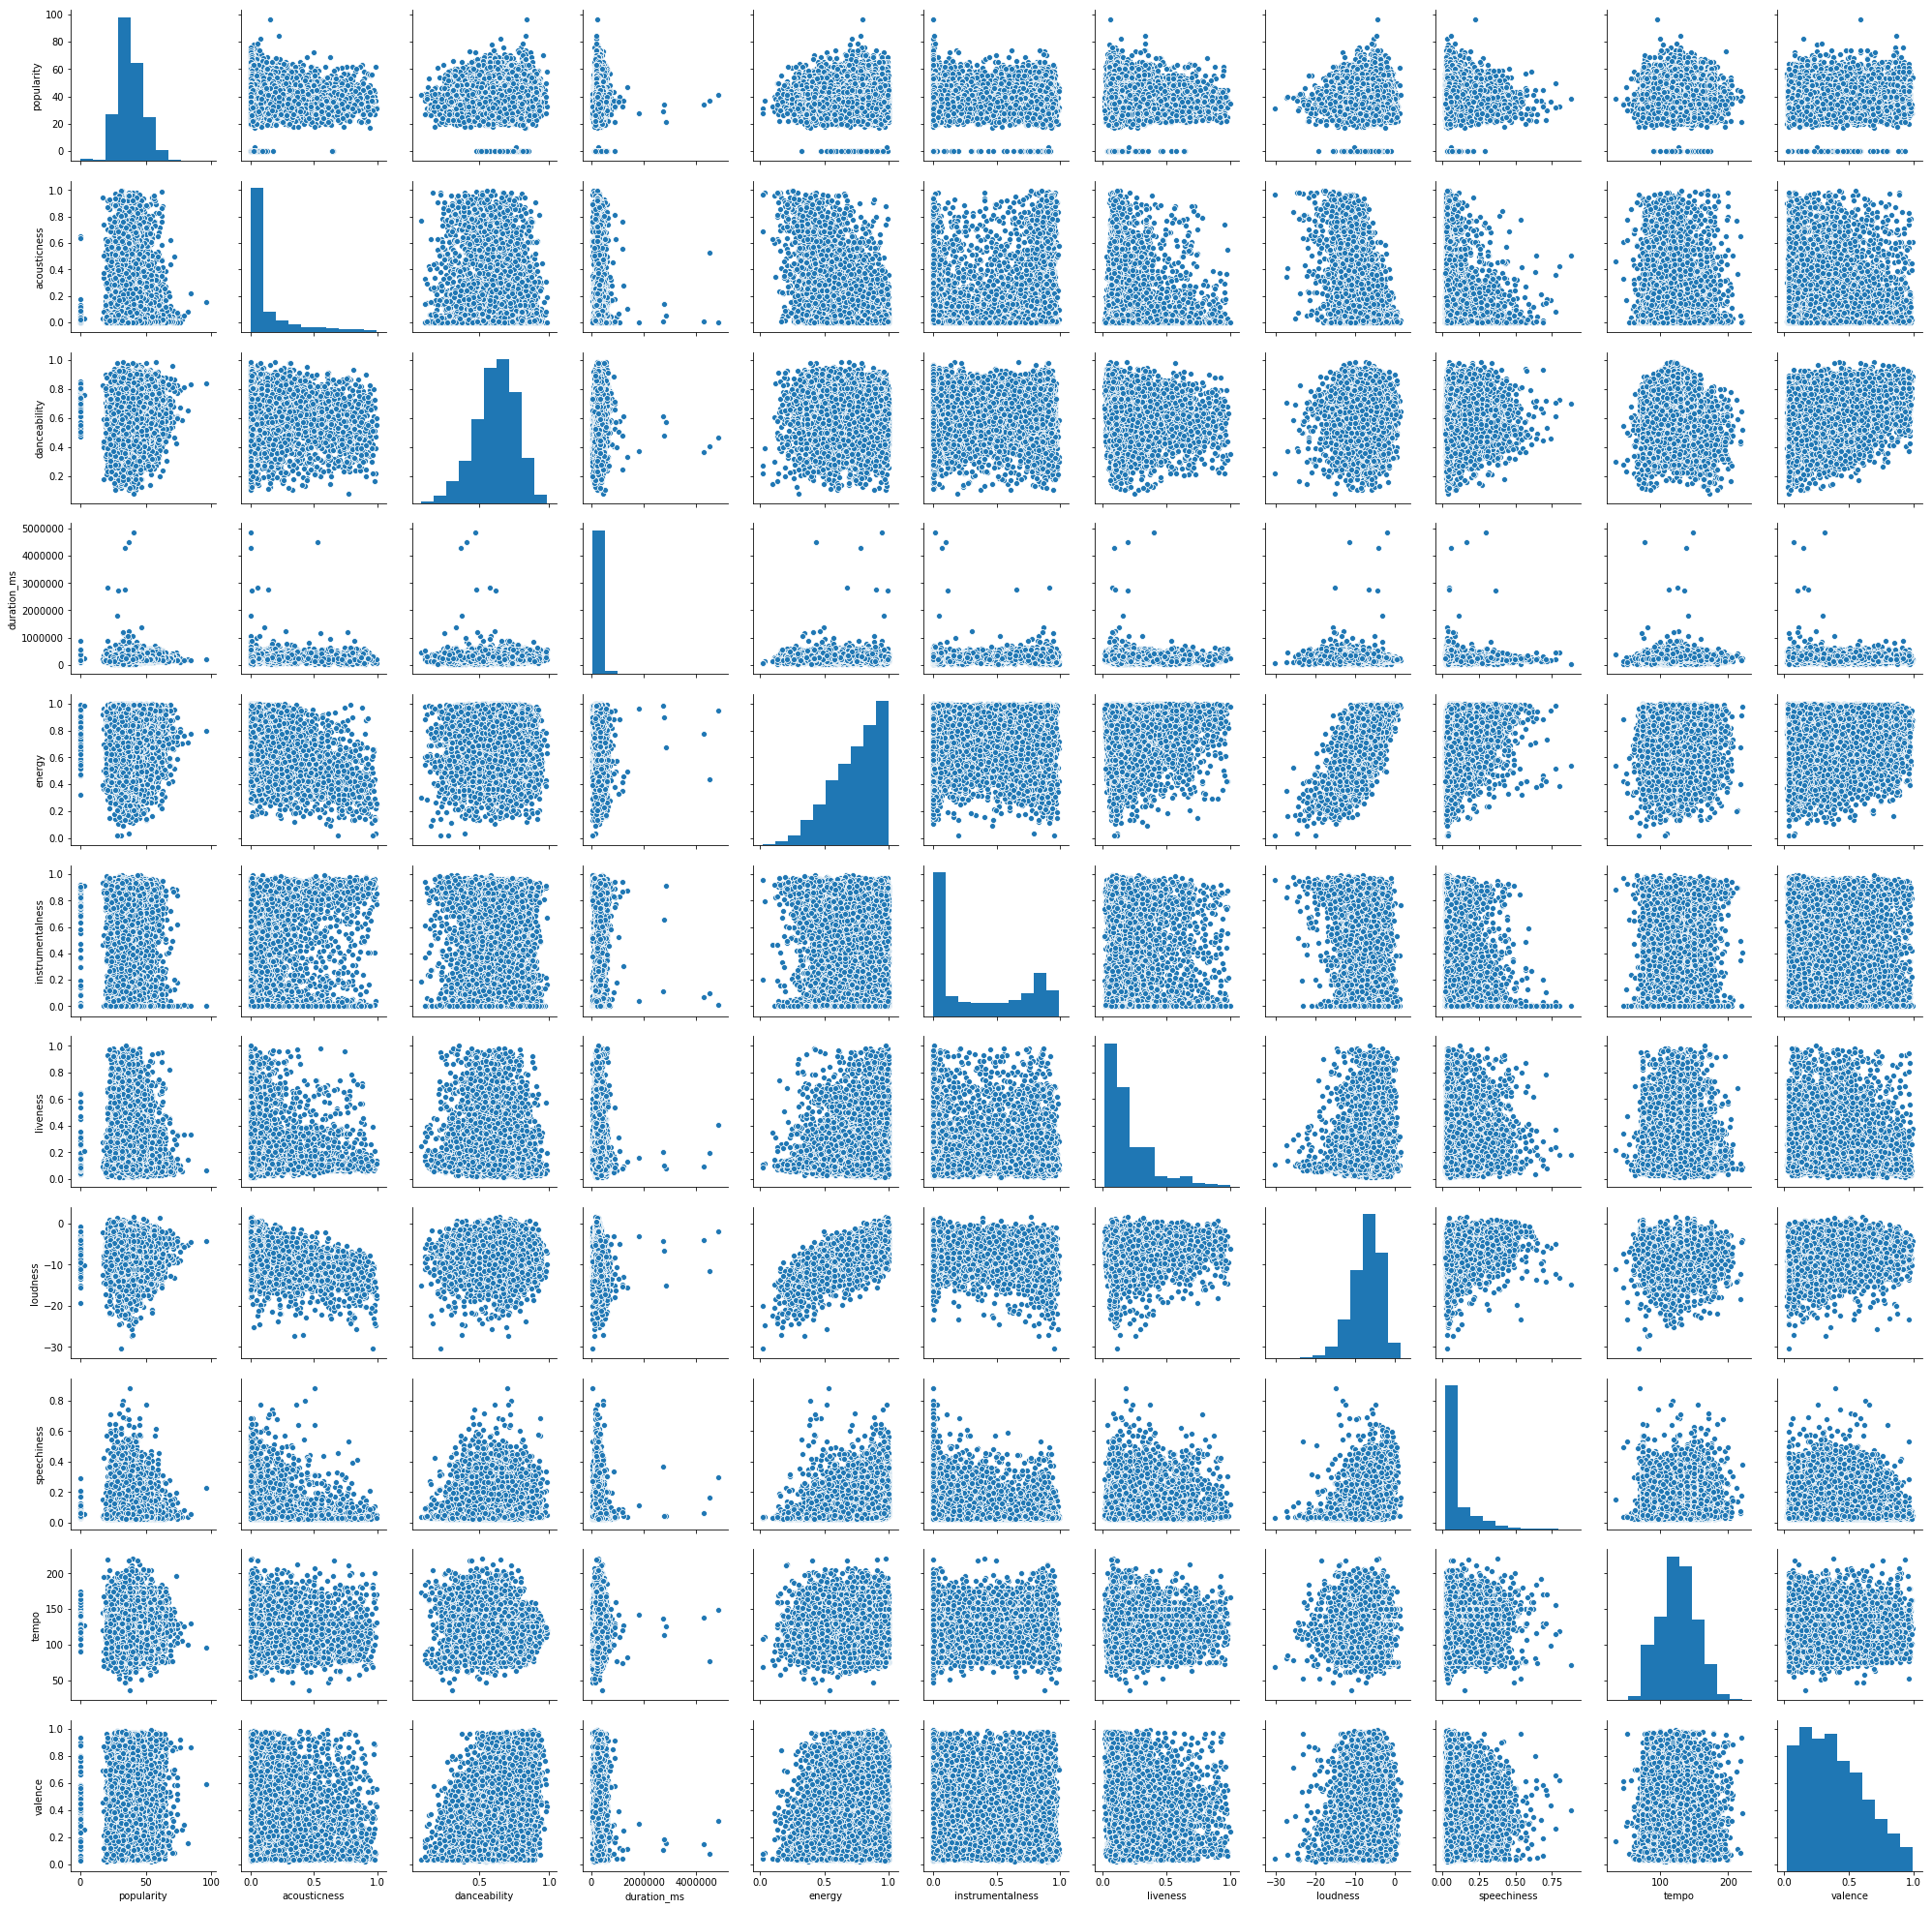

In [53]:
sns.pairplot(eltronic_df)

In [46]:
pd.isnull(df_dd).sum()
#no null values

artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Text(0.5, 1.0, 'Energy Distribution')

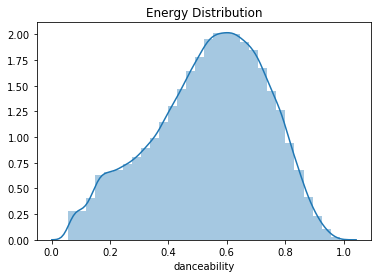

In [52]:
sns.distplot(df_dd['danceability'],bins=30,kde=True, hist=True, norm_hist=True).set_title('Energy Distribution')


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Energy Based on Key')

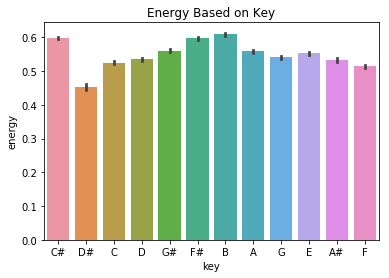

In [37]:
sns.barplot(x = 'key', y = 'energy', data = df_dd)
plt.title('Energy Based on Key')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Energy Based on Mode')

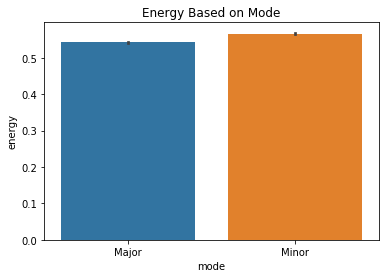

In [39]:
sns.barplot(x = 'mode', y = 'energy', data = df_dd)
plt.title('Energy Based on Mode')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Energy Based on Time Signature')

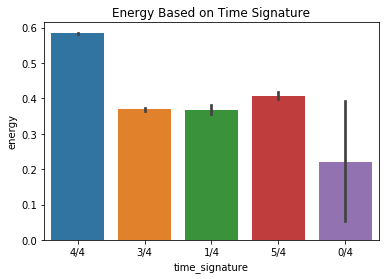

In [40]:
sns.barplot(x = 'time_signature', y = 'energy', data = df_dd)
plt.title('Energy Based on Time Signature')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


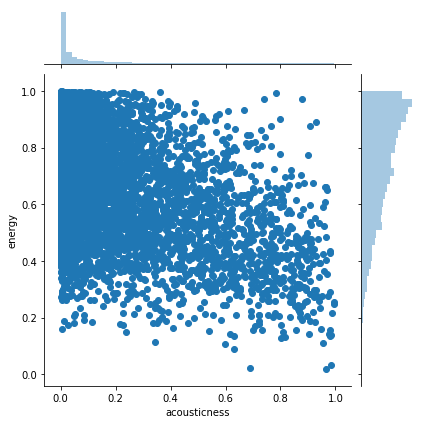

In [44]:
sns.jointplot(x = 'acousticness', y = 'energy', data = eltronic_df)


In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

In [ ]:
loudness_model = ols(formula='loudness~valence+energy+acousticness+instrumentalness+speechiness', data=eltronic_df).fit()
loudness_model.summary()

Energy:
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [13]:
energy_model = ols(formula='energy~valence+loudness+acousticness+instrumentalness+speechiness+liveness', data=df_dd).fit()
energy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:07:40   Log-Likelihood:             1.0494e+05
No. Observations:              153685   AIC:                        -2.099e+05
Df Residuals:                  153678   BIC:                        -2.098e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7702      0.001    715.945      0.000       0.768       0.772
valence              0.1219      0.001     91.569      0.000       0.119       0.125
loudness             0.0236   7.58e-05    311.131      0.000       0.023       0.024
acousticness        -0.2684      0.001   -216.981      0.000      -0.271      -0.266
instrumentalness     0.0760      0.001     65.016      0.000       0.074       0.078
speechiness          0.2328      0.002    125.946      0.000       0.229       0.236
liveness             0.1629      0.002     90.693      0.000       0.159       0.166
==============================================================================
Omnibus:                      208.176   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.204
Skew:                          -0.046   Prob(JB):                     1.39e-51
Kurtosis:                       3.167   Cond. No.                         90.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pre = energy_model.predict()
actual = df_dd.energy

In [22]:
len(actual)
len(pre)

153685

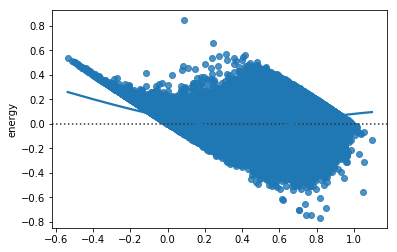

In [23]:
sns.residplot(pre, actual, lowess = True)

In [24]:
loudness = []
for i in range(0,10000):
    sample = np.random.choice(df_dd.loudness, 30)
    loudness.append(sample.mean())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


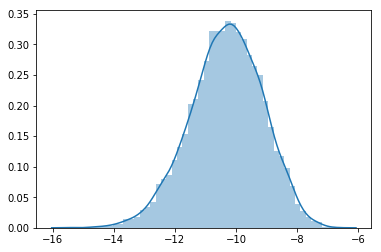

In [25]:
sns.distplot(loudness)

In [26]:
energy = []
for i in range(0,10000):
    sample = np.random.choice(df_dd.energy, 30)
    energy.append(sample.mean())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


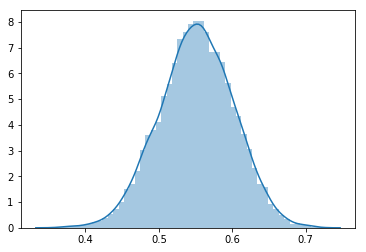

In [27]:
sns.distplot(energy)

In [ ]:
df_dd.corr()

In [28]:
df_dd['energy'].corr(df_dd['loudness'])

0.8275923066644136

In [29]:
df_dd['energy'].corr(df_dd['instrumentalness'])

-0.41285985384931373

Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [89]:
df_dd['energy'].corr(df_dd['acousticness'])

-0.7214549487538388

In [31]:
df_dd['energy'].corr(df_dd['liveness'])

0.2140777020676227

In [32]:
df_dd['energy'].corr(df_dd['valence'])

0.4839118127586563

In [36]:
df_dd['energy'].corr(df_dd['speechiness'])

0.183458336288214

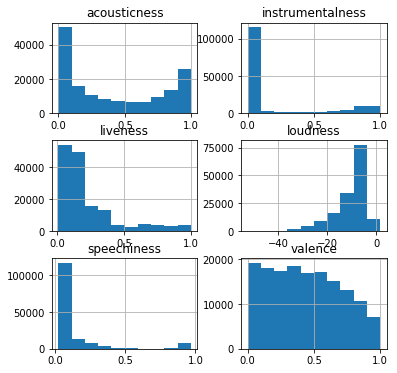

In [37]:
#check for skewness
df_dd[["loudness", "instrumentalness", "acousticness", "liveness","valence","speechiness"]].hist(figsize  = [6, 6]);

In [85]:
Y = df_dd[['energy']]
X = df_dd[["loudness", "instrumentalness", "acousticness", "liveness","valence","speechiness"]]

Loudness: The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.

Instrumentalness: The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

Liveness: Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Valence: 0.0 to 1.0 describing the musical positiveness conveyed by a track

Speechiness:Speechiness detects the presence of spoken words in a track. 0.0 to 1.0

In [ ]:
def feature_list(track_id):
    list_features=[]
    df1 = df_dd[(df_dd['track_id']==track_id)]
    df1 = df1[['artist_name','track_name','loudness','instrumentalness','acousticness','liveness','valence','speechiness','energy']]
    return df1

feature_list('000xQL6tZNLJzIrtIgxqSl')

In [ ]:
Y = df_dd[['energy']]
X = df_dd[["loudness", "instrumentalness", "acousticness", "liveness","valence","speechiness"]]

In [ ]:
loudness=-33.44
instrumentalness=0.0
acousticness=0.961
liveness=0.12
valence=0.038
speechiness=0.048


sklearnmodel = LinearRegression(fit_intercept=False).fit(X, Y)
r_squared = sklearnmodel.score(X, Y)


predict = sklearnmodel.predict(np.array([[loudness, instrumentalness, acousticness, liveness,valence,speechiness]])) 


print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)